# **Examen Final: Análisis de Datos y Procesamiento Usando Python**

**Nombres:** Katherin Juliana Moreno Carvajal, Juan David Cetina Gómez y Mariana Salas Gutiérrez

## **Sección 1: Definición del Problema y Dataset**

### **Base de Datos**

Se trabaja con la base de datos "[Gran Encuesta Integrada de Hogares - GEIH - 2024](https://microdatos.dane.gov.co/index.php/catalog/819/get-microdata)" de la plataforma del *DANE* o *Departamento Administrativo Nacional de Estadística*. En este caso, se tienen ocho archivos CSV por cada mes. Cada archivo cuenta con información distinta frente a diferentes temáticas, tales como: Características generales, seguridad social en salud y educación; Datos del hogar y la vivienda; Fuerza de trabajo; Migración; No ocupados; Ocupados; Otras formas de trabajo; Otros ingresos e impuestos.

### **Objetivo de Predicción**

El objetivo de predicción es obtener una regresión para lograr estimar el ingreso laboral mensual de una persona en Colombia, utilizando datos del GEIH de 2024. La variable a predecir corresponde a P6500 en la base de datos. 

### **Justificación de Variables**

Tras analizar la información de la base de datos, se seleccionaron las siguientes variables para el modelo: 'INGRESO', 'EDAD', 'SEXO_NACIMIENTO', 'GENERO', 'ATRACCION_POR', 'ETNIA', 'CAMPESINO', 'ESTRATO', 'TIPO_VIVIENDA', 'TENENCIA_VIVIENDA', 'URBANO_RURAL', 'ELECTRICIDAD', 'GAS_NATURAL', 'DPTO', 'ACUEDUCTO', 'ALCANTARILLADO', 'RECOLECCION_BASURA', 'AGUA_POTABLE', 'TOTAL_PERSONAS_HOGAR', 'MAXIMO_NIVEL_EDUCATIVO', 'SABE_LEER', 'ENTIDAD_SEGURIDAD_SOCIAL_SALUD', 'HORAS_TRABAJO', 'POSICION_OCUPACIONAL', "CONTRATO", 'TERMINO_CONTRATO', 'CONFORME_TIPO_CONTRATO', 'VACACIONES_SUELDO', 'PRIMA_NAVIDAD','CESANTIA', 'LICENCIA_ENFERMEDAD_PAGADA', 'TIEMPO_TRABAJANDO_EMPRESA_ACTUAL','PRIMA_SERVICIOS', 'SECTOR_AMPLIO', 'ACTUALMENTE_ESTUDIA', 'ACTIVIDAD_MAYOR_TIEMPO', 'GRUPO_INDIGENA', 'LIMPIEZA_EN_SU_HOGAR', 'CUIDADO_NINOS_SU_HOGAR', 'CUIDADO_MAYORES_SU_HOGAR', 'APOYO_TAREAS_SU_HOGAR', 'LIMPIEZA_EN_SU_HOGAR_DIAS', 'LIMPIEZA_EN_SU_HOGAR_HORAS_DIA', 'CUIDADO_MAYORES_SU_HOGAR_DIAS', 'CUIDADO_MAYORES_SU_HOGAR_HORAS_DIA', 'CUIDADO_NINOS_SU_HOGAR_DIAS' y 'CUIDADO_NINOS_SU_HOGAR_HORAS_DIA'. Es importante mencionar que las variables originalmente tenían nombres en código, como P6500, pero se cambiaron para mayor facilidad y comprensión.

La selección de variables para el análisis del ingreso laboral mensual considera múltiples dimensiones que reflejan las condiciones estructurales que afectan la desigualdad económica y social en Colombia. Aspectos demográficos como edad, género, etnia y pertenencia a grupos indígenas permiten visibilizar brechas históricas y sociales que impactan la inserción y calidad del empleo. Las características del hogar y contexto territorial, incluyendo estrato socioeconómico, tipo y tenencia de vivienda, acceso a servicios públicos y localización geográfica, permiten evaluar las condiciones materiales y la infraestructura que influyen en las oportunidades laborales. Además, variables relacionadas con la educación, como el nivel educativo alcanzado y la capacidad de lectura, son determinantes fundamentales del capital humano y la movilidad social. Finalmente, las condiciones laborales reflejadas en el tipo de contrato, estabilidad, sector económico y beneficios asociados al empleo evidencian la heterogeneidad en la calidad del trabajo y su efecto sobre el ingreso. Esta integración de factores permite abordar de manera integral el fenómeno de la desigualdad estructural y apoyar la formulación de políticas públicas orientadas a promover la inclusión y equidad laboral, tal como plantea el marco teórico del estudio.

### **Utilidad**

Este problema facilita el análisis de la desigualdad estructural al identificar y cuantificar las diferencias en los ingresos laborales mensuales entre diversos grupos poblacionales, considerando factores demográficos, sociales y económicos. Al entender qué variables influyen en los ingresos, se pueden detectar brechas y desigualdades persistentes en el mercado laboral. Esta información es fundamental para diseñar, implementar y evaluar políticas públicas orientadas a reducir dichas desigualdades, promover la equidad salarial y mejorar las condiciones laborales de grupos vulnerables.

### **Carga de Datos**

In [1]:
# Importar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import shap
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

c:\Users\marim\anaconda3\envs\shap_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


En este código se realiza la carga de datos mensuales organizados en carpetas por mes, dentro de un directorio base. Para cada mes, se leen múltiples archivos CSV correspondientes a diferentes aspectos de la encuesta (ocupados, otras formas de trabajo, ingresos, características, hogar y fuerza de trabajo), almacenándolos en un diccionario anidado que organiza los DataFrames por mes y tipo de archivo. Posteriormente, para cada mes, se ejecuta un proceso de integración de datos mediante varios merge utilizando una llave compuesta común (DIRECTORIO, SECUENCIA_P, ORDEN), combinando progresivamente la información de fuerza de trabajo, ingresos, otras formas de trabajo, ocupados, características y datos del hogar en un solo DataFrame mensual consolidado. Este proceso permite obtener un conjunto de datos unificado por mes que contiene toda la información relevante, facilitando así análisis posteriores con datos completos y estructurados para cada periodo temporal. Además, se maneja la ausencia de archivos y errores, asegurando robustez en la carga y combinación de los datos.

In [2]:
base_dir = "base"

carpetas_meses = [
    "Ene_2024", "Febrero_2024", "Marzo_2024", "Abril_2024", "Mayo_2024", "Junio_2024",
    "Julio_2024", "Agosto_2024", "Septiembre_2024", "Octubre_2024", "Noviembre_2024", "Diciembre_2024"
]

# Nombres de los archivos
archivos = {
    "ocupados": "Ocupados.CSV",
    "otras_formas_trabajo": "Otras formas de trabajo.CSV",
    "otros_ingresos": "Otros ingresos e impuestos.CSV",
    "caracteristicas": "Características generales, seguridad social en salud y educación.CSV",
    "hogar": "Datos del hogar y la vivienda.CSV",
    "fuerza": "Fuerza de trabajo.CSV",
}

# Diccionario para guardar los DataFrames por mes y tipo
dataframes_por_mes = {}

for carpeta in carpetas_meses:
    mes_key = carpeta.replace(" ", "_")
    ruta_csv = os.path.join(base_dir, carpeta, "CSV")
    dataframes_por_mes[mes_key] = {}

    for nombre_archivo, archivo in archivos.items():
        ruta_archivo = os.path.join(ruta_csv, archivo)

        try:
            df = pd.read_csv(ruta_archivo, sep=";", encoding="latin1", low_memory=False)
            dataframes_por_mes[mes_key][nombre_archivo] = df
            print(f"Cargado: {mes_key} -> {nombre_archivo} ({df.shape[0]} filas)")
        except FileNotFoundError:
            print(f"Archivo no encontrado: {mes_key} -> {nombre_archivo}")
        except Exception as e:
            print(f"Error en {mes_key} -> {nombre_archivo}: {e}")

Cargado: Ene_2024 -> ocupados (28815 filas)
Cargado: Ene_2024 -> otras_formas_trabajo (55738 filas)
Cargado: Ene_2024 -> otros_ingresos (55738 filas)
Cargado: Ene_2024 -> caracteristicas (70648 filas)
Cargado: Ene_2024 -> hogar (24247 filas)
Cargado: Ene_2024 -> fuerza (55738 filas)
Cargado: Febrero_2024 -> ocupados (29943 filas)
Cargado: Febrero_2024 -> otras_formas_trabajo (56856 filas)
Cargado: Febrero_2024 -> otros_ingresos (56856 filas)
Cargado: Febrero_2024 -> caracteristicas (72148 filas)
Cargado: Febrero_2024 -> hogar (24743 filas)
Cargado: Febrero_2024 -> fuerza (56856 filas)
Cargado: Marzo_2024 -> ocupados (29638 filas)
Cargado: Marzo_2024 -> otras_formas_trabajo (56063 filas)
Cargado: Marzo_2024 -> otros_ingresos (56063 filas)
Cargado: Marzo_2024 -> caracteristicas (70719 filas)
Cargado: Marzo_2024 -> hogar (24647 filas)
Cargado: Marzo_2024 -> fuerza (56063 filas)
Cargado: Abril_2024 -> ocupados (29741 filas)
Cargado: Abril_2024 -> otras_formas_trabajo (55696 filas)
Cargado:

In [3]:
llaves = ['DIRECTORIO', 'SECUENCIA_P', 'ORDEN']

# Crear un diccionario para guardar el df final de cada mes
df_por_mes = {}

for mes, data in dataframes_por_mes.items():
    try:
        print(f"\nProcesando merges para: {mes}")

        # Asignar cada dataframe del mes
        df_fuerza = data.get("fuerza")
        df_ingresos = data.get("otros_ingresos")
        df_otras = data.get("otras_formas_trabajo")
        df_ocup = data.get("ocupados")
        df_caract = data.get("caracteristicas")
        df_hogar = data.get("hogar")

        if df_fuerza is None or df_ingresos is None:
            print(f"No se puede procesar {mes} por falta de datos clave (fuerza o ingresos)")
            continue

        # 1. Merge fuerza + ingresos
        cols_fuerza = [col for col in df_fuerza.columns if col not in df_ingresos.columns or col in llaves]
        fuerza_ingresos = df_fuerza[cols_fuerza].merge(df_ingresos, on=llaves, how='outer')

        # 2. Otras formas
        if df_otras is not None:
            cols_otras = [col for col in df_otras.columns if col not in fuerza_ingresos.columns or col in llaves]
            df_unido = fuerza_ingresos.merge(df_otras[cols_otras], on=llaves, how='outer')
        else:
            df_unido = fuerza_ingresos

        # 3. Ocupados
        if df_ocup is not None:
            cols_ocup = [col for col in df_ocup.columns if col not in df_unido.columns or col in llaves]
            df_unido = df_unido.merge(df_ocup[cols_ocup], on=llaves, how='left')

        # 4. Características
        if df_caract is not None:
            cols_caract = [col for col in df_caract.columns if col not in df_unido.columns or col in llaves]
            df_unido = df_unido.merge(df_caract[cols_caract], on=llaves, how='left')

        # 5. Hogar
        if df_hogar is not None:
            cols_hogar = [col for col in df_hogar.columns if col not in df_unido.columns or col == 'DIRECTORIO']
            df_unido = df_unido.merge(df_hogar[cols_hogar], on='DIRECTORIO', how='left')

        # Guardar DataFrame final del mes
        df_por_mes[mes] = df_unido
        print(f"{mes} → {df_unido.shape[0]} personas, {df_unido.shape[1]} columnas")

    except Exception as e:
        print(f"Error en el procesamiento de {mes}: {e}")


Procesando merges para: Ene_2024
Ene_2024 → 56839 personas, 469 columnas

Procesando merges para: Febrero_2024
Febrero_2024 → 58127 personas, 469 columnas

Procesando merges para: Marzo_2024
Marzo_2024 → 57093 personas, 469 columnas

Procesando merges para: Abril_2024
Abril_2024 → 56532 personas, 469 columnas

Procesando merges para: Mayo_2024
Mayo_2024 → 56761 personas, 469 columnas

Procesando merges para: Junio_2024
Junio_2024 → 56469 personas, 469 columnas

Procesando merges para: Julio_2024
Julio_2024 → 55891 personas, 469 columnas

Procesando merges para: Agosto_2024
Agosto_2024 → 55649 personas, 469 columnas

Procesando merges para: Septiembre_2024
Septiembre_2024 → 55117 personas, 469 columnas

Procesando merges para: Octubre_2024
Octubre_2024 → 54311 personas, 469 columnas

Procesando merges para: Noviembre_2024
Noviembre_2024 → 53419 personas, 469 columnas

Procesando merges para: Diciembre_2024
Diciembre_2024 → 52319 personas, 469 columnas


Después, se agrega una columna que indica el mes correspondiente a cada DataFrame mensual para facilitar su identificación temporal. Posteriormente, se concatenan todos estos DataFrames en un solo conjunto de datos integral para todo el año 2024. A continuación, se crea un subconjunto de este DataFrame unificado seleccionando únicamente las columnas relevantes para el análisis, que incluyen variables demográficas, socioeconómicas, laborales, educativas y relacionadas con condiciones de vivienda. Esta selección se realizó con el fin de responder a las preguntas específicadas más adelante. Para mejorar la interpretación y claridad, se aplica un renombramiento de las columnas originales utilizando un diccionario que traduce los códigos de variables a nombres descriptivos y estandarizados, lo cual facilita el manejo y análisis de los datos en etapas posteriores del proyecto.

In [4]:
# Paso 1: Agregar columna MES a cada df del diccionario
for mes, df in df_por_mes.items():
    df["MES"] = mes  # puedes estandarizar si quieres solo el nombre del mes

# Paso 2: Concatenar todos los DataFrames en uno solo
df_2024 = pd.concat(df_por_mes.values(), ignore_index=True)

# Mostrar el tamaño del DataFrame
print("Tamaño DataFrame: ", df_2024.shape)

Tamaño DataFrame:  (668527, 469)


In [5]:
# Crear un subconjunto del DataFrame con las columnas especificadas
df_2024 = df_2024[[
    'DIRECTORIO', 'SECUENCIA_P', 'ORDEN', 'FT', 'FFT', 'PET', 'DPTO', 'AREA',
    "P6040", "P6030S1", "P6030S3", "P3271", "P3039", "P3038",
    "P6080", "P2057", "P6080S1", "P6070", "P6050", "P6083", "P6081", "P6071", "P6008",
    "P6160", "P6170", "P3041", "P6090", "P6100", "P6120",
    "P6500", "OFICIO_C8", "P6800", "P6430", "P6440", "P6450", "P6460",
    "P6422", "P6424S1", "P6424S2", "P6424S3", "P6424S5", "P6426", "P6630S1", "P6240",
    "RAMA2D_R4", "RAMA4D_R4",
    "P3077S1", "P3077S1A1", "P3077S1A2", "P3077S2", "P3077S2A1", "P3077S2A2",
    "P3077S3", "P3077S3A1", "P3077S3A2", "P3079S1", "P3079S1A1", "P3079S1A2",
    "P3079S2", "P3079S2A1", "P3079S2A2", "P3079S3", "P3079S3A1", "P3079S3A2",
    "P3081S1", "P3081S1A1", "P3081S1A2", "P3081S2", "P3081S2A1", "P3081S2A2",
    "P3081S3", "P3081S3A1", "P3081S3A2", "P3082S1", "P3082S1A1", "P3082S1A2",
    "P3082S2", "P3082S2A1", "P3082S2A2", "P3082S3", "P3082S3A1", "P3082S3A2",
    "P4000", "P4030S1A1", "P5090", "CLASE", "P5110", "P5140", "P4030S1", "P4030S2",
    "P4030S3", "P4030S4", "P4030S5", "P5050",
    "P3147S1", "P3147S2", "P3147S3", "P3147S4", "P3147S5", "P3147S6", "P3147S7",
    "P3147S8", "P3147S9", "P3147S11", "P7500S2", "P7500S3", "P7510S3", "P3042"
]]

# Mostrar el tamaño del DataFrame
print("Tamaño DataFrame: ", df_2024.shape)

Tamaño DataFrame:  (668527, 108)


In [6]:
# Diccionario original de variables a renombrar
nombres_variables = {

    # Demográficas
    "P6040": "EDAD",
    "P6030S1": "MES_NACIMIENTO",
    "P6030S3": "AÑO_NACIMIENTO",

    "P3271": "SEXO_NACIMIENTO",
    "P3039": "GENERO",
    "P3038": "ATRACCION_POR",

    # Etnia
    "P6080": "ETNIA",
    "P2057": "CAMPESINO",
    "P6080S1": "GRUPO_INDIGENA",

    # Relaciones
    "P6070": "ESTADO_CIVIL",
    "P6050": "PARENTESCO_CON_JEFE_HOGAR",
    "P6083": "MADRE_RESIDE_HOGAR",
    "P6081": "PADRE_RESIDE_HOGAR",
    "P6071": "CONYUGE_RESIDE_HOGAR",
    "P6008": "TOTAL_PERSONAS_HOGAR",

    # Educación
    "P6160": "SABE_LEER",
    "P6170": "ACTUALMENTE_ESTUDIA",
    "P3041": "ACTUALMENTE_INSTITUCION",
    "P3042": "MAXIMO_NIVEL_EDUCATIVO",

    # Salud
    "P6090": "ENTIDAD_SEGURIDAD_SOCIAL_SALUD",
    "P6100": "REGIMEN_SEGURIDAD_SOCIAL_SALUD",
    "P6120": "PAGO_SALUD",

    # Trabajo
    "P6500": "INGRESO",
    "P6800": "HORAS_TRABAJO",
    "P6430": "POSICION_OCUPACIONAL",
    "P6440": "EXISTENCIA_CONTRATO",
    "P6450": "CONTRATO",
    "P6460": "TERMINO_CONTRATO",
    "P6422": "CONFORME_TIPO_CONTRATO",
    "P6424S1": "VACACIONES_SUELDO",
    "P6424S2": "PRIMA_NAVIDAD",
    "P6424S3": "CESANTIA",
    "P6424S5": "LICENCIA_ENFERMEDAD_PAGADA",
    "P6426": "TIEMPO_TRABAJANDO_EMPRESA_ACTUAL",
    "P6630S1": "PRIMA_SERVICIOS",
    "P6240": "ACTIVIDAD_MAYOR_TIEMPO",
    "RAMA2D_R4": "SECTOR_AMPLIO",

    # Otras formas de trabajo:

    # LIMPIEZA DEL HOGAR
    "P3077S1": "LIMPIEZA_EN_SU_HOGAR",
    "P3077S1A1": "LIMPIEZA_EN_SU_HOGAR_DIAS",
    "P3077S1A2": "LIMPIEZA_EN_SU_HOGAR_HORAS_DIA",
    "P3077S2": "LIMPIEZA_HOGAR_FAMILIARES",
    "P3077S2A1": "LIMPIEZA_HOGAR_FAMILIARES_DIAS",
    "P3077S2A2": "LIMPIEZA_HOGAR_FAMILIARES_HORAS_DIA",
    "P3077S3": "LIMPIEZA_HOGAR_NO_FAMILIARES",
    "P3077S3A1": "LIMPIEZA_HOGAR_NO_FAMILIARES_DIAS",
    "P3077S3A2": "LIMPIEZA_HOGAR_NO_FAMILIARES_HORAS_DIA",

    # CUIDADO DE NIÑOS
    "P3079S1": "CUIDADO_NINOS_SU_HOGAR",
    "P3079S1A1": "CUIDADO_NINOS_SU_HOGAR_DIAS",
    "P3079S1A2": "CUIDADO_NINOS_SU_HOGAR_HORAS_DIA",
    "P3079S2": "CUIDADO_NINOS_HOGAR_FAMILIARES",
    "P3079S2A1": "CUIDADO_NINOS_HOGAR_FAMILIARES_DIAS",
    "P3079S2A2": "CUIDADO_NINOS_HOGAR_FAMILIARES_HORAS_DIA",
    "P3079S3": "CUIDADO_NINOS_HOGAR_NO_FAMILIARES",
    "P3079S3A1": "CUIDADO_NINOS_HOGAR_NO_FAMILIARES_DIAS",
    "P3079S3A2": "CUIDADO_NINOS_HOGAR_NO_FAMILIARES_HORAS_DIA",

    # CUIDADO DE MAYORES
    "P3081S1": "CUIDADO_MAYORES_SU_HOGAR",
    "P3081S1A1": "CUIDADO_MAYORES_SU_HOGAR_DIAS",
    "P3081S1A2": "CUIDADO_MAYORES_SU_HOGAR_HORAS_DIA",
    "P3081S2": "CUIDADO_MAYORES_HOGAR_FAMILIARES",
    "P3081S2A1": "CUIDADO_MAYORES_HOGAR_FAMILIARES_DIAS",
    "P3081S2A2": "CUIDADO_MAYORES_HOGAR_FAMILIARES_HORAS_DIA",
    "P3081S3": "CUIDADO_MAYORES_HOGAR_NO_FAMILIARES",
    "P3081S3A1": "CUIDADO_MAYORES_HOGAR_NO_FAMILIARES_DIAS",
    "P3081S3A2": "CUIDADO_MAYORES_HOGAR_NO_FAMILIARES_HORAS_DIA",

    # APOYO ESCOLAR
    "P3082S1": "APOYO_TAREAS_SU_HOGAR",
    "P3082S1A1": "APOYO_TAREAS_SU_HOGAR_DIAS",
    "P3082S1A2": "APOYO_TAREAS_SU_HOGAR_HORAS_DIA",
    "P3082S2": "APOYO_TAREAS_HOGAR_FAMILIARES",
    "P3082S2A1": "APOYO_TAREAS_HOGAR_FAMILIARES_DIAS",
    "P3082S2A2": "APOYO_TAREAS_HOGAR_FAMILIARES_HORAS_DIA",
    "P3082S3": "APOYO_TAREAS_HOGAR_NO_FAMILIARES",
    "P3082S3A1": "APOYO_TAREAS_HOGAR_NO_FAMILIARES_DIAS",
    "P3082S3A2": "APOYO_TAREAS_HOGAR_NO_FAMILIARES_HORAS_DIA",

    # Vivienda y ubicación
    "P4000": "TIPO_VIVIENDA",
    "P4030S1A1": "ESTRATO",
    "P5090": "TENENCIA_VIVIENDA",
    "CLASE": "URBANO_RURAL",
    "P5110": "VALOR_VIVIENDA",
    "P5140": "VALOR_ARRIENDO",
    "P4030S1": "ELECTRICIDAD",
    "P4030S2": "GAS_NATURAL",
    "P4030S3": "ALCANTARILLADO",
    "P4030S4": "RECOLECCION_BASURA",
    "P4030S5": "ACUEDUCTO",
    "P5050": "AGUA_POTABLE",


    # Problemas debido a la pandemia
    "P3147S1": "TUVO_COVID",
    "P3147S2": "DIFICULTAD_ALIMENTOS_PRODUCTOS_LIMPIEZA",
    "P3147S3": "NO_PAGOS",
    "P3147S4": "REDUCCION_INGRESOS",
    "P3147S5": "NO_TRABAJO",
    "P3147S6": "SUSPENSION_SIN_REMUNERACION",
    "P3147S7": "DESPIDO",
    "P3147S8": "SUSPENSION_CLASES_PRESENCIALES",
    "P3147S9": "SENTIMIENTOS_NEGATIVOS",
    "P3147S11": "SIN_DIFICULTADES",

    # No ocupados
    "P7250": "SEMANAS_BUSCANDO_TRABAJO",

    # Otros ingresos
    "P7500S2": "PENSION",
    "P7500S3": "PENSION_SEPARACION",
    "P7510S3": "AYUDA_DINERO_INSTITUCION"

}

# Renombrar las columnas del subconjunto
df_2024 = df_2024.rename(columns=nombres_variables)

In [7]:
df_2024.head(20)

DIRECTORIO  SECUENCIA_P  ORDEN   FT  FFT  PET  DPTO  AREA  EDAD  \
0      7655976            1      1  NaN  1.0    1     5   5.0    39   
1      7655976            1      2  1.0  NaN    1     5   5.0    32   
2      7655977            1      1  1.0  NaN    1     5   5.0    39   
3      7655977            1      2  1.0  NaN    1     5   5.0    22   
4      7655979            1      1  NaN  1.0    1     5   5.0    67   
5      7655979            1      2  1.0  NaN    1     5   5.0    37   
6      7655980            1      1  1.0  NaN    1     5   5.0    41   
7      7655980            1      2  1.0  NaN    1     5   5.0    31   
8      7655980            1      3  NaN  1.0    1     5   5.0    15   
9      7655981            1      1  1.0  NaN    1     5   5.0    48   
10     7655981            1      2  1.0  NaN    1     5   5.0    24   
11     7655981            1      4  1.0  NaN    1     5   5.0    50   
12     7655982            1      1  1.0  NaN    1     5   5.0    45   
13     7655982            1      2  1.0  NaN    1     5   5.0    26   
14     7655983            1      1  NaN  1.0    1     5   5.0    51   
15     7655983            1      2  NaN  1.0    1     5   5.0    18   
16     7655983            1      3  NaN  1.0    1     5   5.0    17   
17     7655983            1      5  NaN  1.0    1     5   5.0    32   
18     7655983            1      7  1.0  NaN    1     5   5.0    25   
19     7655983            1      8  NaN  1.0    1     5   5.0    78   

    MES_NACIMIENTO  ...  NO_TRABAJO  SUSPENSION_SIN_REMUNERACION  DESPIDO  \
0              5.0  ...         NaN                          NaN      NaN   
1              2.0  ...         NaN                          NaN      NaN   
2              9.0  ...         NaN                          NaN      NaN   
3              5.0  ...         NaN                          NaN      NaN   
4              5.0  ...         NaN                          NaN      NaN   
5              4.0  ...         NaN                          NaN      NaN   
6              8.0  ...         NaN                          NaN      1.0   
7             10.0  ...         NaN                          NaN      NaN   
8             12.0  ...         NaN                          NaN      NaN   
9              4.0  ...         NaN                          NaN      NaN   
10             9.0  ...         NaN                          NaN      NaN   
11             7.0  ...         NaN                          NaN      NaN   
12            10.0  ...         NaN                          NaN      NaN   
13             4.0  ...         NaN                          NaN      NaN   
14             8.0  ...         NaN                          NaN      NaN   
15             3.0  ...         NaN                          NaN      NaN   
16             7.0  ...         NaN                          NaN      NaN   
17            12.0  ...         NaN                          NaN      NaN   
18             8.0  ...         NaN                          NaN      NaN   
19             9.0  ...         NaN                          NaN      NaN   

    SUSPENSION_CLASES_PRESENCIALES  SENTIMIENTOS_NEGATIVOS  SIN_DIFICULTADES  \
0                              NaN                     NaN               1.0   
1                              NaN                     NaN               1.0   
2                              NaN                     NaN               1.0   
3                              NaN                     NaN               1.0   
4                              NaN                     NaN               1.0   
5                              NaN                     NaN               1.0   
6                              NaN                     NaN               NaN   
7                              NaN                     NaN               1.0   
8                              1.0                     NaN               NaN   
9                              NaN                     NaN               NaN   
10            

In [8]:
# Crear un subconjunto del DataFrame con las columnas especificadas
df_ingreso = df_2024[[
    'INGRESO', 'EDAD', 'SEXO_NACIMIENTO', 'GENERO', 'ATRACCION_POR', 'ETNIA', 'CAMPESINO',
    'ESTRATO', 'TIPO_VIVIENDA', 'TENENCIA_VIVIENDA', 'URBANO_RURAL', 'ELECTRICIDAD', 'GAS_NATURAL', 'DPTO', 'ACUEDUCTO', 'ALCANTARILLADO', 'RECOLECCION_BASURA',
    'AGUA_POTABLE', 'TOTAL_PERSONAS_HOGAR', 'MAXIMO_NIVEL_EDUCATIVO', 'SABE_LEER', 'ENTIDAD_SEGURIDAD_SOCIAL_SALUD',
    'HORAS_TRABAJO', 'POSICION_OCUPACIONAL', "CONTRATO", 'TERMINO_CONTRATO', 'CONFORME_TIPO_CONTRATO', 'VACACIONES_SUELDO',
    'PRIMA_NAVIDAD','CESANTIA', 'LICENCIA_ENFERMEDAD_PAGADA', 'TIEMPO_TRABAJANDO_EMPRESA_ACTUAL','PRIMA_SERVICIOS', 'SECTOR_AMPLIO', 'ACTUALMENTE_ESTUDIA',
    'ACTIVIDAD_MAYOR_TIEMPO', 'GRUPO_INDIGENA', 'LIMPIEZA_EN_SU_HOGAR', 'CUIDADO_NINOS_SU_HOGAR', 'CUIDADO_MAYORES_SU_HOGAR', 'APOYO_TAREAS_SU_HOGAR', 'LIMPIEZA_EN_SU_HOGAR_DIAS',
    'LIMPIEZA_EN_SU_HOGAR_HORAS_DIA', 'CUIDADO_MAYORES_SU_HOGAR_DIAS', 'CUIDADO_MAYORES_SU_HOGAR_HORAS_DIA', 'CUIDADO_NINOS_SU_HOGAR_DIAS','CUIDADO_NINOS_SU_HOGAR_HORAS_DIA'
]]

# Mostrar el tamaño del DataFrame
print("Tamaño DataFrame: ", df_ingreso.shape)

Tamaño DataFrame:  (668527, 47)


In [9]:
df_ingreso = df_ingreso[df_ingreso['INGRESO'].notnull()]

print("Tamaño DataFrame con ingresos no nulos:", df_ingreso.shape)

Tamaño DataFrame con ingresos no nulos: (186771, 47)


In [10]:
df_ingreso.head()

INGRESO  EDAD  SEXO_NACIMIENTO  GENERO  ATRACCION_POR  ETNIA  CAMPESINO  \
1  1160000.0    32                2     2.0            1.0      6          2   
2  1600000.0    39                1     1.0            2.0      6          2   
3  1500000.0    22                1     1.0            2.0      6          2   
6  1300000.0    41                1     1.0            2.0      6          2   
7  1300000.0    31                2     2.0            1.0      6          2   

   ESTRATO  TIPO_VIVIENDA  TENENCIA_VIVIENDA  ...  LIMPIEZA_EN_SU_HOGAR  \
1      1.0              2                  3  ...                     1   
2      2.0              2                  3  ...                     1   
3      2.0              2                  3  ...                     1   
6      1.0              2                  3  ...                     1   
7      1.0              2                  3  ...                     1   

   CUIDADO_NINOS_SU_HOGAR  CUIDADO_MAYORES_SU_HOGAR  APOYO_TAREAS_SU_HOGAR  \
1                       1                         2                      2   
2                       2                         2                      2   
3                       2                         2                      2   
6                       2                         2                      2   
7                       2                         2                      2   

   LIMPIEZA_EN_SU_HOGAR_DIAS  LIMPIEZA_EN_SU_HOGAR_HORAS_DIA  \
1                        1.0                             2.0   
2                        2.0                             2.0   
3                        2.0                             1.0   
6                        1.0                             1.0   
7                        2.0                             2.0   

   CUIDADO_MAYORES_SU_HOGAR_DIAS  CUIDADO_MAYORES_SU_HOGAR_HORAS_DIA  \
1                            NaN                                 NaN   
2                            NaN                                 NaN   
3                            NaN                                 NaN   
6                            NaN                                 NaN   
7                            NaN                                 NaN   

   CUIDADO_NINOS_SU_HOGAR_DIAS  CUIDADO_NINOS_SU_HOGAR_HORAS_DIA  
1                          7.0                               6.0  
2                          NaN                               NaN  
3                          NaN                               NaN  
6                          NaN                               NaN  
7                          NaN                               NaN  

[5 rows x 47 columns]

## **Sección 2: Análisis Exploratorio de Datos (EDA)**

### **Ajuste de Tipos de Variables**

Originalmente, las variables solo eran float64 o int64, variables categóricas no son tomadas en cuenta. Por eso, tras el cambio de tipos de variables, la variable objetivo INGRESO es de tipo numérico continuo (float64). Variables numéricas adicionales incluyen EDAD (int64) y varias relacionadas con cantidades de días y horas dedicados a actividades del hogar, como LIMPIEZA_EN_SU_HOGAR_DIAS, LIMPIEZA_EN_SU_HOGAR_HORAS_DIA, CUIDADO_MAYORES_SU_HOGAR_DIAS, CUIDADO_MAYORES_SU_HOGAR_HORAS_DIA, CUIDADO_NINOS_SU_HOGAR_DIAS y CUIDADO_NINOS_SU_HOGAR_HORAS_DIA, las cuales son de tipo float64, aunque presentan valores faltantes en proporciones variables. La mayoría de las demás columnas son variables categóricas, almacenadas con tipo category, que representan atributos cualitativos como SEXO_NACIMIENTO, GENERO, ATRACCION_POR, ETNIA, CAMPESINO, ESTRATO, TIPO_VIVIENDA, TENENCIA_VIVIENDA, URBANO_RURAL, servicios básicos (ELECTRICIDAD, GAS_NATURAL, ACUEDUCTO, etc.), aspectos laborales (CONTRATO, TERMINO_CONTRATO, VACACIONES_SUELDO, entre otros), y roles en el hogar (actividades de cuidado y limpieza). Algunas variables categóricas presentan valores faltantes, destacando TERMINO_CONTRATO y GRUPO_INDIGENA, esta última con un número significativamente bajo de observaciones no nulas. Finalmente, la variable TOTAL_PERSONAS_HOGAR es numérica entera (int64) y está completamente poblada, representando el número de integrantes en el hogar. En resumen, el dataset combina variables numéricas y categóricas, con predominancia de variables categóricas para representar características sociales, demográficas y laborales, complementadas por variables numéricas para cantidades y medidas temporales relacionadas con el trabajo y las actividades en el hogar.

In [11]:
# Mostrar los tipos de datos de las columnas
df_ingreso.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 186771 entries, 1 to 668525
Data columns (total 47 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   INGRESO                             186771 non-null  float64
 1   EDAD                                186771 non-null  int64  
 2   SEXO_NACIMIENTO                     186771 non-null  int64  
 3   GENERO                              185675 non-null  float64
 4   ATRACCION_POR                       185675 non-null  float64
 5   ETNIA                               186771 non-null  int64  
 6   CAMPESINO                           186771 non-null  int64  
 7   ESTRATO                             186282 non-null  float64
 8   TIPO_VIVIENDA                       186771 non-null  int64  
 9   TENENCIA_VIVIENDA                   186771 non-null  int64  
 10  URBANO_RURAL                        186771 non-null  int64  
 11  ELECTRICIDAD                   

In [12]:
columnas_categoricas = [
    'SEXO_NACIMIENTO', 'GENERO', 'ATRACCION_POR', 'ETNIA', 'GRUPO_INDIGENA', 'CAMPESINO',
    'ESTRATO', 'TIPO_VIVIENDA', 'TENENCIA_VIVIENDA', 'URBANO_RURAL', 'ELECTRICIDAD',
    'GAS_NATURAL', 'DPTO', 'ACUEDUCTO', 'ALCANTARILLADO', 'RECOLECCION_BASURA',
    'AGUA_POTABLE', 'MAXIMO_NIVEL_EDUCATIVO', 'SABE_LEER', 'ENTIDAD_SEGURIDAD_SOCIAL_SALUD',
    'POSICION_OCUPACIONAL', 'CONTRATO',
    'TERMINO_CONTRATO', 'CONFORME_TIPO_CONTRATO', 'VACACIONES_SUELDO', 'PRIMA_NAVIDAD',
    'CESANTIA', 'LICENCIA_ENFERMEDAD_PAGADA', 'PRIMA_SERVICIOS', 'SECTOR_AMPLIO','ACTUALMENTE_ESTUDIA',
    'ACTIVIDAD_MAYOR_TIEMPO', 'LIMPIEZA_EN_SU_HOGAR', 'CUIDADO_NINOS_SU_HOGAR', 'CUIDADO_MAYORES_SU_HOGAR', 'APOYO_TAREAS_SU_HOGAR'
]

for col in columnas_categoricas:
    df_ingreso[col] = df_ingreso[col].astype('category')

In [13]:
# Mostrar los tipos de datos de las columnas
df_ingreso.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 186771 entries, 1 to 668525
Data columns (total 47 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   INGRESO                             186771 non-null  float64 
 1   EDAD                                186771 non-null  int64   
 2   SEXO_NACIMIENTO                     186771 non-null  category
 3   GENERO                              185675 non-null  category
 4   ATRACCION_POR                       185675 non-null  category
 5   ETNIA                               186771 non-null  category
 6   CAMPESINO                           186771 non-null  category
 7   ESTRATO                             186282 non-null  category
 8   TIPO_VIVIENDA                       186771 non-null  category
 9   TENENCIA_VIVIENDA                   186771 non-null  category
 10  URBANO_RURAL                        186771 non-null  category
 11  ELECTRICIDAD      

### **Detección y Tratamiento de Datos Ausentes**

Algunas variables presentan proporciones de datos faltantes que varían significativamente. Por ejemplo, las variables CUIDADO_MAYORES_SU_HOGAR_HORAS_DIA y CUIDADO_MAYORES_SU_HOGAR_DIAS tienen un 1.88% de datos faltantes, lo que corresponde a un nivel de completitud del 98.12%. La variable GRUPO_INDIGENA presenta un 2.51% de datos faltantes (97.49% de completitud). Las variables relacionadas con el cuidado de niños, CUIDADO_NINOS_SU_HOGAR_HORAS_DIA y CUIDADO_NINOS_SU_HOGAR_DIAS, tienen un 9.20% de datos faltantes, con un 90.80% de nivel de completitud. En contraste, las variables de limpieza en el hogar, LIMPIEZA_EN_SU_HOGAR_DIAS y LIMPIEZA_EN_SU_HOGAR_HORAS_DIA, presentan un 59.84% de datos faltantes, con solo un 40.16% de completitud. Además, la variable TERMINO_CONTRATO muestra un 33.88% de datos faltantes (66.12% de completitud), mientras que variables como GENERO y ATRACCION_POR tienen datos faltantes mínimos, aproximadamente 0.59%, alcanzando un 99.41% de completitud. Finalmente, la variable ESTRATO cuenta con apenas un 0.26% de datos faltantes, reflejando un nivel de completitud del 99.74%.

Para el tratamiento de estos datos ausentes, se abordaron los valores faltantes en varias columnas clave del DataFrame. Primero, se imputaron los valores faltantes de las variables categóricas 'TERMINO_CONTRATO' y 'ESTRATO' con un valor específico (9), para mantener la integridad de estas variables. Posteriormente, se eliminaron los registros con datos faltantes en las variables 'GENERO' y 'ATRACCION_POR', debido a la importancia de contar con información completa en estas categorías para el análisis y representar menos del 5% de la información. En la variable 'GRUPO_INDIGENA', se incorporó una nueva categoría (0) para representar explícitamente la ausencia de información, reemplazando los valores nulos. Finalmente, se corrigieron las variables relacionadas con el tiempo dedicado a actividades de limpieza y cuidado en el hogar, asignando ceros a los casos en que dichas actividades no se realizan y presentaban datos faltantes, asegurando así una representación adecuada y coherente de estos datos en el conjunto final para su análisis.

In [14]:
# Calcular el porcentaje de valores faltantes en cada columna
missing_percent = (df_ingreso.isnull().sum()/df_ingreso.shape[0]*100).sort_values(ascending=False)
print(missing_percent)

CUIDADO_MAYORES_SU_HOGAR_HORAS_DIA    98.115339
CUIDADO_MAYORES_SU_HOGAR_DIAS         98.115339
GRUPO_INDIGENA                        97.493187
CUIDADO_NINOS_SU_HOGAR_HORAS_DIA      90.802105
CUIDADO_NINOS_SU_HOGAR_DIAS           90.802105
LIMPIEZA_EN_SU_HOGAR_DIAS             40.159875
LIMPIEZA_EN_SU_HOGAR_HORAS_DIA        40.159875
TERMINO_CONTRATO                      33.877850
GENERO                                 0.586815
ATRACCION_POR                          0.586815
ESTRATO                                0.261818
SEXO_NACIMIENTO                        0.000000
EDAD                                   0.000000
ETNIA                                  0.000000
INGRESO                                0.000000
ACUEDUCTO                              0.000000
DPTO                                   0.000000
GAS_NATURAL                            0.000000
ELECTRICIDAD                           0.000000
URBANO_RURAL                           0.000000
TENENCIA_VIVIENDA                      0

In [15]:
# Calcular el porcentaje de valores NO nulos en cada columna
no_nulos = (df_ingreso.notnull().sum()/df_ingreso.shape[0]*100).sort_values(ascending=False)
print(no_nulos)

INGRESO                               100.000000
EDAD                                  100.000000
SEXO_NACIMIENTO                       100.000000
CAMPESINO                             100.000000
ETNIA                                 100.000000
TENENCIA_VIVIENDA                     100.000000
TIPO_VIVIENDA                         100.000000
DPTO                                  100.000000
GAS_NATURAL                           100.000000
URBANO_RURAL                          100.000000
ELECTRICIDAD                          100.000000
ACUEDUCTO                             100.000000
AGUA_POTABLE                          100.000000
RECOLECCION_BASURA                    100.000000
ALCANTARILLADO                        100.000000
APOYO_TAREAS_SU_HOGAR                 100.000000
PRIMA_SERVICIOS                       100.000000
SECTOR_AMPLIO                         100.000000
TOTAL_PERSONAS_HOGAR                  100.000000
MAXIMO_NIVEL_EDUCATIVO                100.000000
SABE_LEER           

In [16]:
df_ingreso[['TERMINO_CONTRATO', 'ESTRATO']] = df_ingreso[['TERMINO_CONTRATO', 'ESTRATO']].fillna(9)
df_ingreso = df_ingreso.dropna(subset=['GENERO', 'ATRACCION_POR'])

# Agregar la categoría 0 a la columna categórica
df_ingreso['GRUPO_INDIGENA'] = df_ingreso['GRUPO_INDIGENA'].cat.add_categories([0])
df_ingreso['GRUPO_INDIGENA'] = df_ingreso['GRUPO_INDIGENA'].fillna(0)

condicion = (df_ingreso['LIMPIEZA_EN_SU_HOGAR'] == 2) & (df_ingreso['LIMPIEZA_EN_SU_HOGAR_DIAS'].isna())
df_ingreso.loc[condicion, 'LIMPIEZA_EN_SU_HOGAR_DIAS'] = 0

condicion = (df_ingreso['LIMPIEZA_EN_SU_HOGAR'] == 2) & (df_ingreso['LIMPIEZA_EN_SU_HOGAR_HORAS_DIA'].isna())
df_ingreso.loc[condicion, 'LIMPIEZA_EN_SU_HOGAR_HORAS_DIA'] = 0

condicion = (df_ingreso['CUIDADO_MAYORES_SU_HOGAR'] == 2) & (df_ingreso['CUIDADO_MAYORES_SU_HOGAR_DIAS'].isna())
df_ingreso.loc[condicion, 'CUIDADO_MAYORES_SU_HOGAR_DIAS'] = 0

condicion = (df_ingreso['CUIDADO_MAYORES_SU_HOGAR'] == 2) & (df_ingreso['CUIDADO_MAYORES_SU_HOGAR_HORAS_DIA'].isna())
df_ingreso.loc[condicion, 'CUIDADO_MAYORES_SU_HOGAR_HORAS_DIA'] = 0

condicion = (df_ingreso['CUIDADO_NINOS_SU_HOGAR'] == 2) & (df_ingreso['CUIDADO_NINOS_SU_HOGAR_DIAS'].isna())
df_ingreso.loc[condicion, 'CUIDADO_NINOS_SU_HOGAR_DIAS'] = 0

condicion = (df_ingreso['CUIDADO_NINOS_SU_HOGAR'] == 2) & (df_ingreso['CUIDADO_NINOS_SU_HOGAR_HORAS_DIA'].isna())
df_ingreso.loc[condicion, 'CUIDADO_NINOS_SU_HOGAR_HORAS_DIA'] = 0


In [17]:
# Calcular el porcentaje de valores faltantes en cada columna
missing_percent = (df_ingreso.isnull().sum()/df_ingreso.shape[0]*100).sort_values(ascending=False)
print(missing_percent)

INGRESO                               0.0
EDAD                                  0.0
SEXO_NACIMIENTO                       0.0
GENERO                                0.0
ATRACCION_POR                         0.0
ETNIA                                 0.0
CAMPESINO                             0.0
ESTRATO                               0.0
TIPO_VIVIENDA                         0.0
TENENCIA_VIVIENDA                     0.0
URBANO_RURAL                          0.0
ELECTRICIDAD                          0.0
GAS_NATURAL                           0.0
DPTO                                  0.0
ACUEDUCTO                             0.0
ALCANTARILLADO                        0.0
RECOLECCION_BASURA                    0.0
AGUA_POTABLE                          0.0
TOTAL_PERSONAS_HOGAR                  0.0
MAXIMO_NIVEL_EDUCATIVO                0.0
SABE_LEER                             0.0
ENTIDAD_SEGURIDAD_SOCIAL_SALUD        0.0
HORAS_TRABAJO                         0.0
POSICION_OCUPACIONAL              

### **Análisis Descriptivo**

En el siguiente bloque de código se realizó un proceso de mapeo para traducir los códigos numéricos presentes en diversas variables del conjunto de datos a sus correspondientes etiquetas categóricas descriptivas. Esto incluye variables demográficas como sexo y género, características socioeconómicas como estrato y tipo de vivienda, así como aspectos laborales como tipo y término de contrato. Asimismo, se asignaron nombres significativos a sectores económicos, grupos indígenas y niveles educativos, entre otros. Este mapeo facilita la interpretación y análisis de los datos al convertir valores codificados en categorías legibles, mejorando la comprensión y comunicación de los resultados.

In [18]:
diccionario_sector_amplio = {
    0.0: "NO APLICA",
    1.0: "AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y PESCA",
    2.0: "EXPLOTACIÓN DE MINAS Y CANTERAS",
    3.0: "INDUSTRIAS MANUFACTURERAS",
    4.0: "SUMINISTRO DE ELECTRICIDAD, GAS, VAPOR Y AIRE ACONDICIONADO",
    5.0: "SUMINISTRO DE AGUA; EVACUACIÓN DE AGUAS RESIDUALES, GESTIÓN DE DESECHOS Y ACTIVIDADES DE SANEAMIENTO AMBIENTAL",
    6.0: "CONSTRUCCIÓN",
    7.0: "COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS",
    8.0: "TRANSPORTE Y ALMACENAMIENTO",
    9.0: "ALOJAMIENTO Y SERVICIOS DE COMIDA",
    10.0: "INFORMACIÓN Y COMUNICACIONES",
    11.0: "ACTIVIDADES FINANCIERAS Y DE SEGUROS",
    12.0: "ACTIVIDADES INMOBILIARIAS",
    13.0: "ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS",
    14.0: "ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE APOYO",
    15.0: "ADMINISTRACIÓN PÚBLICA Y DEFENSA; PLANES DE SEGURIDAD SOCIAL DE AFILIACIÓN OBLIGATORIA",
    16.0: "EDUCACIÓN",
    17.0: "ACTIVIDADES DE ATENCIÓN DE LA SALUD HUMANA Y DE ASISTENCIA SOCIAL",
    18.0: "ACTIVIDADES ARTÍSTICAS, DE ENTRETENIMIENTO Y RECREACIÓN",
    19.0: "OTRAS ACTIVIDADES DE SERVICIOS",
    20.0: "ACTIVIDADES DE LOS HOGARES COMO EMPLEADORES; ACTIVIDADES NO DIFERENCIADAS DE LOS HOGARES COMO PRODUCTORES DE BIENES Y SERVICIOS PARA USO PROPIO",
    21.0: "ACTIVIDADES DE ORGANIZACIONES Y ÓRGANOS EXTRATERRITORIALES",
    97.0: "ACTIVIDADES NO ESPECIFICADAS",
    98.0: "ACTIVIDADES NO CLASIFICADAS",
    99.0: "NO INFORMADO"
}

df_ingreso['SECTOR_AMPLIO'] = df_ingreso['SECTOR_AMPLIO'].map(diccionario_sector_amplio).fillna("OTRO")

# Diccionario de equivalencias de códigos a nombres de grupos indígenas
diccionario_etnias = {
    0: "NINGUNO",
    '999_01': "OTRO",
    '720_01': "WAYUU",
    '800_02': "ZENU",
    '560_01': "EMBERA",
    '630_01': "NASA",
    '260_04': "AWA",
    '390_01': "KICHWA",
    '283_06': "INGA",
    '600_06': "MISAK",
}

# Aplicar el mapeo y usar 'OTRO' si el código no está en el diccionario
df_ingreso['GRUPO_INDIGENA'] = df_ingreso['GRUPO_INDIGENA'].map(diccionario_etnias).fillna("OTRO")

columnas_categoricas2 = [
    'GRUPO_INDIGENA', 'SECTOR_AMPLIO'
]

for col in columnas_categoricas2:
    df_ingreso[col] = df_ingreso[col].astype('category')

df_ingreso['ACTIVIDAD_MAYOR_TIEMPO'] = df_ingreso['ACTIVIDAD_MAYOR_TIEMPO'].map({1: "TRABAJANDO", 2: "BUSCANDO_TRABAJO", 3:"ESTUDIANDO", 4:"OFICIOS_DEL_HOGAR", 6:"OTRO"})
df_ingreso['POSICION_OCUPACIONAL'] = df_ingreso['POSICION_OCUPACIONAL'].map({1: "EMPLEADO_EMPRESA_PARTICULAR", 2: "EMPLEADO_DEL_GOBIERNO", 3:"EMPLEADO_DOMESTICO", 7:"TRABAJADOR_SIN_REMUNERACION"})
df_ingreso['SEXO_NACIMIENTO'] = df_ingreso['SEXO_NACIMIENTO'].map({1: "HOMBRE", 2: "MUJER"})
df_ingreso['GENERO'] = df_ingreso['GENERO'].map({1: "HOMBRE", 2: "MUJER", 3:"HOMBRE_TRANS", 4:"MUJER_TRANS"})
df_ingreso['ATRACCION_POR'] = df_ingreso['ATRACCION_POR'].map({1: "HOMBRES", 2: "MUJERES", 3:"AMBOS", 4:"OTRO"})
df_ingreso['ETNIA'] = df_ingreso['ETNIA'].map({1: "INDIGENA", 2: "ROM", 3:"RAIZAL", 4:"PALENQUERO", 5:"AFRODESCENDIENTE", 6:"NINGUNO"})
df_ingreso['CAMPESINO'] = df_ingreso['CAMPESINO'].map({1: "SI", 2: "NO", 9:"NO_SABE"})
df_ingreso['TIPO_VIVIENDA'] = df_ingreso['TIPO_VIVIENDA'].map({1: "CASA", 2: "APARTAMENTO", 3:"CUARTO_INQUILINATO", 4:"CUARTO_OTRA_ESTRUCTURA", 5:"VIVIENDA_INDIGENA", 6:"OTRO"})
df_ingreso['TENENCIA_VIVIENDA'] = df_ingreso['TENENCIA_VIVIENDA'].map({1: "PROPIA_PAGA", 2: "PROPIA_PAGANDO", 3:"ARRIENDO", 4:"USUFRUCTO", 5:"POSESION_SIN_TITULO", 6:"OTRO", 7:"NO_SABE"})
df_ingreso['URBANO_RURAL'] = df_ingreso['URBANO_RURAL'].map({1: "URBANO", 2: "RURAL"})
df_ingreso['ELECTRICIDAD'] = df_ingreso['ELECTRICIDAD'].map({1: "SI", 2: "NO"})
df_ingreso['GAS_NATURAL'] = df_ingreso['GAS_NATURAL'].map({1: "SI", 2: "NO"})
df_ingreso['ACUEDUCTO'] = df_ingreso['ACUEDUCTO'].map({1: "SI", 2: "NO"})
df_ingreso['ALCANTARILLADO'] = df_ingreso['ALCANTARILLADO'].map({1: "SI", 2: "NO"})
df_ingreso['RECOLECCION_BASURA'] = df_ingreso['RECOLECCION_BASURA'].map({1: "SI", 2: "NO"})
df_ingreso['AGUA_POTABLE'] = df_ingreso['AGUA_POTABLE'].map({1: "ACUEDUCTO_TUBERIA", 2: "OTRA_FUENTE_TUBERIA", 3:"POZO_BOMBA", 4:"POZO_SIN_BOMBA", 5:"AGUAS_LLUVIAS", 6:"RIO_SIMILARES", 7:"PILA_PUBLICA", 8:"CARRO_TANQUE", 9:"AGUATERO", 10:"AGUA_EMBOTELLADA"})
df_ingreso['DPTO'] = df_ingreso['DPTO'].map({
    5:  "ANTIOQUIA",
    8:  "ATLANTICO",
    11: "BOGOTA",
    13: "BOLIVAR",
    15: "BOYACA",
    17: "CALDAS",
    18: "CAQUETA",
    19: "CAUCA",
    20: "CESAR",
    23: "CORDOBA",
    25: "CUNDINAMARCA",
    27: "CHOCO",
    41: "HUILA",
    44: "GUAJIRA",
    47: "MAGDALENA",
    50: "META",
    52: "NARIÑO",
    54: "NORTE_DE_SANTANDER",
    63: "QUINDIO",
    66: "RISARALDA",
    68: "SANTANDER",
    70: "SUCRE",
    73: "TOLIMA",
    76: "VALLE_DEL_CAUCA",
    81: "ARAUCA",
    85: "CASANARE",
    86: "PUTUMAYO",
    88: "SAN_ANDRES",
    91: "AMAZONAS",
    94: "GUAINIA",
    95: "GUAVIARE",
    97: "VAUPES",
    99: "VICHADA"
})
df_ingreso['MAXIMO_NIVEL_EDUCATIVO'] = df_ingreso['MAXIMO_NIVEL_EDUCATIVO'].map({1: "NINGUNO", 2: "PREESCOLAR", 3:"BASICA_PRIMARIA",
    4:"BASICA_SECUNDARIA", 5:"BACHILLERATO_CLASICO", 6:"BACHILLERATO_TECNICO", 7:"NORMALISTA", 8:"TECNICA_PROFESIONAL", 9:"TECNOLOGICA",
    10:"UNIVERSITARIA", 11:"ESPECIALIZACION", 12:"MAESTRIA", 13:"DOCTORADO", 99:"NO_SABE"})
df_ingreso['SABE_LEER'] = df_ingreso['SABE_LEER'].map({1: "SI", 2: "NO"})
df_ingreso['CONFORME_TIPO_CONTRATO'] = df_ingreso['CONFORME_TIPO_CONTRATO'].map({1: "SI", 2: "NO"})
df_ingreso['VACACIONES_SUELDO'] = df_ingreso['VACACIONES_SUELDO'].map({1: "SI", 2: "NO"})
df_ingreso['CESANTIA'] = df_ingreso['CESANTIA'].map({1: "SI", 2: "NO"})
df_ingreso['PRIMA_NAVIDAD'] = df_ingreso['PRIMA_NAVIDAD'].map({1: "SI", 2: "NO"})
df_ingreso['LICENCIA_ENFERMEDAD_PAGADA'] = df_ingreso['LICENCIA_ENFERMEDAD_PAGADA'].map({1: "SI", 2: "NO"})
df_ingreso['PRIMA_SERVICIOS'] = df_ingreso['PRIMA_SERVICIOS'].map({1: "SI", 2: "NO"})
df_ingreso['ACTUALMENTE_ESTUDIA'] = df_ingreso['ACTUALMENTE_ESTUDIA'].map({1: "SI", 2: "NO"})
df_ingreso['LIMPIEZA_EN_SU_HOGAR'] = df_ingreso['LIMPIEZA_EN_SU_HOGAR'].map({1: "SI", 2: "NO"})
df_ingreso['CUIDADO_NINOS_SU_HOGAR'] = df_ingreso['CUIDADO_NINOS_SU_HOGAR'].map({1: "SI", 2: "NO"})
df_ingreso['CUIDADO_MAYORES_SU_HOGAR'] = df_ingreso['CUIDADO_MAYORES_SU_HOGAR'].map({1: "SI", 2: "NO"})
df_ingreso['APOYO_TAREAS_SU_HOGAR'] = df_ingreso['APOYO_TAREAS_SU_HOGAR'].map({1: "SI", 2: "NO"})
df_ingreso['ENTIDAD_SEGURIDAD_SOCIAL_SALUD'] = df_ingreso['ENTIDAD_SEGURIDAD_SOCIAL_SALUD'].map({1: "SI", 2: "NO", 9:"NO_SABE"})
df_ingreso['CONTRATO'] = df_ingreso['CONTRATO'].map({1: "VERBAL", 2: "ESCRITO", 9:"NO_SABE"})
df_ingreso['TERMINO_CONTRATO'] = df_ingreso['TERMINO_CONTRATO'].map({1: "INDEFINIDO", 2: "FIJO", 9:"NO_SABE"})

### **Histogramas para variables numéricas**

Los gráficos muestran los histogramas para las variables numéricas del conjunto de datos. A continuación, se muestra la descripción de cada uno de estos:

- **INGRESO:** En esta gráfica se muestra la distribución de los ingresos registrados, representados por barras moradas. Se observa que la mayoría de los valores están concentrados en los rangos más bajos de ingreso, generando un pico muy estrecho al inicio del eje horizontal. A medida que los ingresos aumentan, la frecuencia disminuye drásticamente, lo que indica la presencia de algunos valores extremos o atípicos. La distribución está fuertemente sesgada hacia la derecha, lo cual sugiere que hay pocas personas con ingresos muy altos y muchas con ingresos bajos o moderados.

- **EDAD:** En esta gráfica se muestra la distribución de las edades registradas, representada por barras moradas. Se observa un mayor número de personas entre los 25 y 40 años, donde se concentra la mayor frecuencia. A partir de los 40 años, la cantidad de registros disminuye progresivamente, con una caída notable después de los 60 años. La forma de la distribución es asimétrica hacia la derecha, lo cual indica que hay más personas en edades jóvenes y adultas, y menos en edades avanzadas.

- **TOTAL_PERSONAS_HOGAR:** En esta gráfica se muestra la cantidad total de personas por hogar, representada por barras moradas. Se observa que la mayoría de los hogares están compuestos por 2 a 5 personas, con picos de frecuencia especialmente en los valores 3 y 4. A partir de 6 personas por hogar, la frecuencia disminuye de manera significativa, aunque existen casos con hasta 25 integrantes. La distribución es asimétrica hacia la derecha, lo que indica que los hogares numerosos son poco comunes en comparación con los hogares pequeños o medianos.

- **HORAS_TRABAJO:** En esta gráfica se presenta la cantidad de horas trabajadas por semana, representadas por barras moradas. Se observa un pico muy pronunciado alrededor de las 48 horas, lo cual sugiere que la mayoría de las personas trabaja jornadas completas estándar. También hay frecuencias significativas en múltiplos de 24 y 40 horas. Sin embargo, la gráfica muestra una gran dispersión con valores que superan incluso las 100 horas, lo que indica la presencia de casos atípicos. La distribución es sesgada a la derecha, con una alta concentración en jornadas laborales comunes y pocos casos de jornadas extremadamente largas.



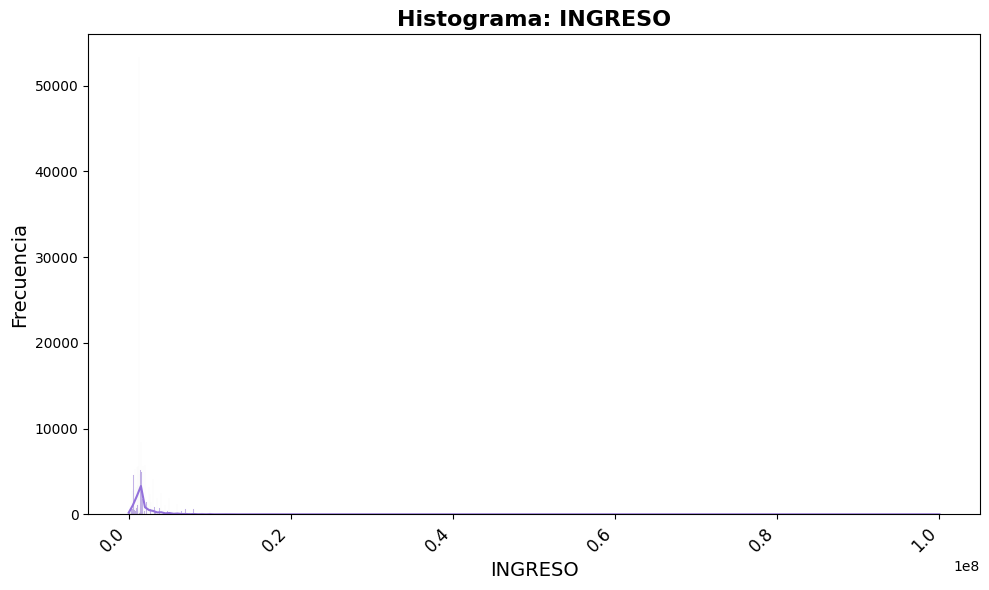

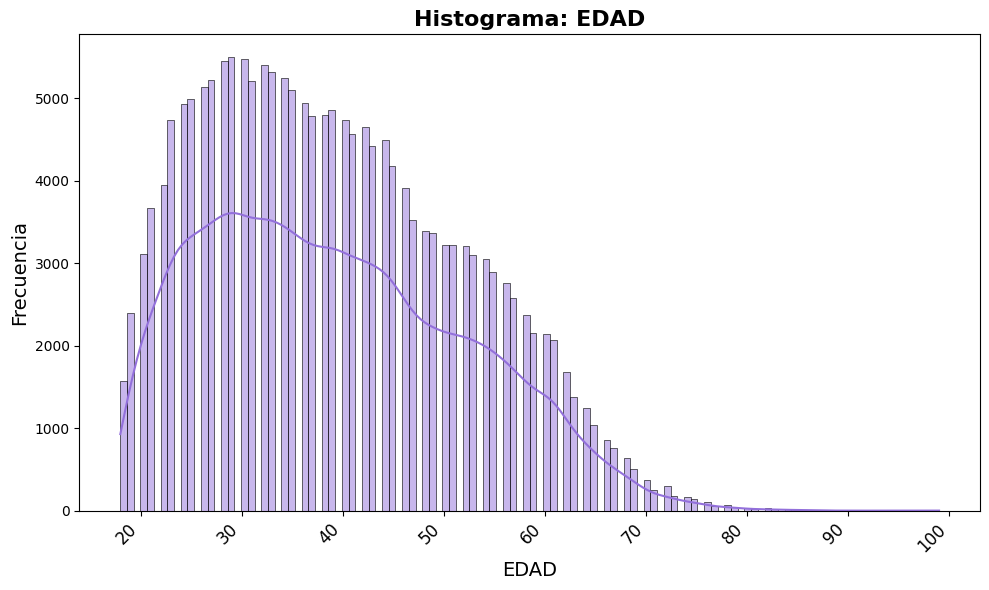

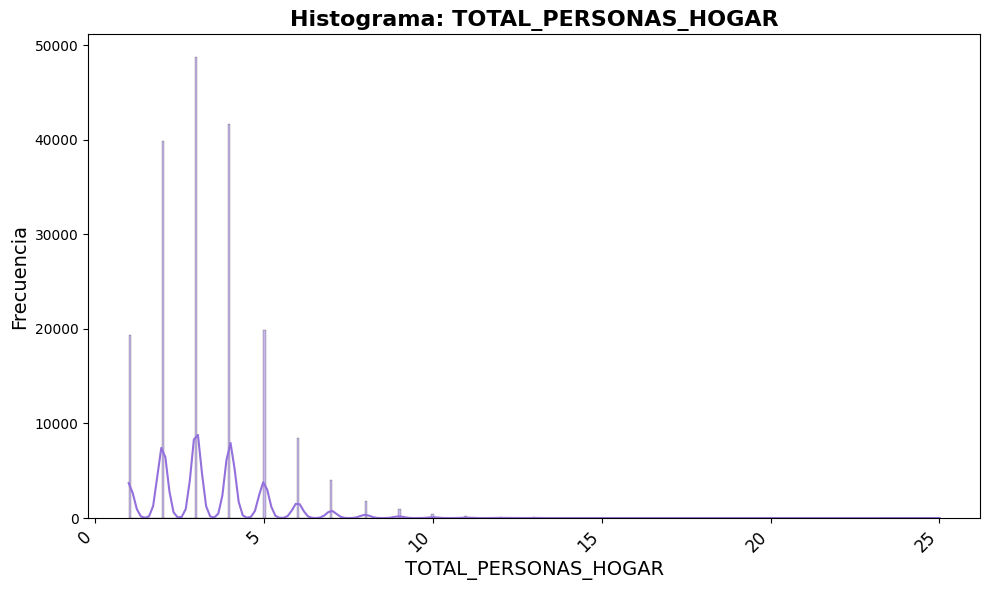

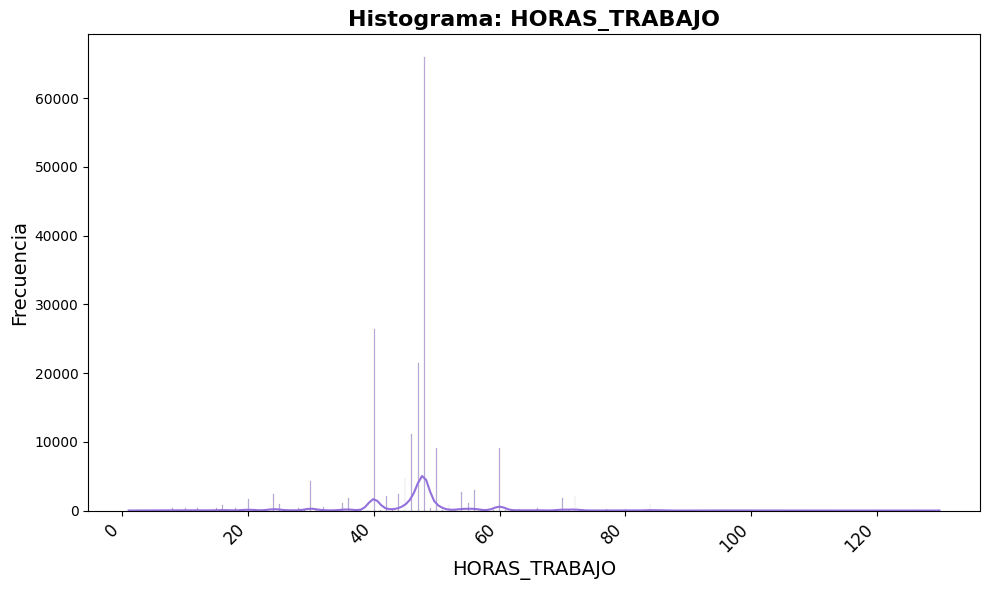

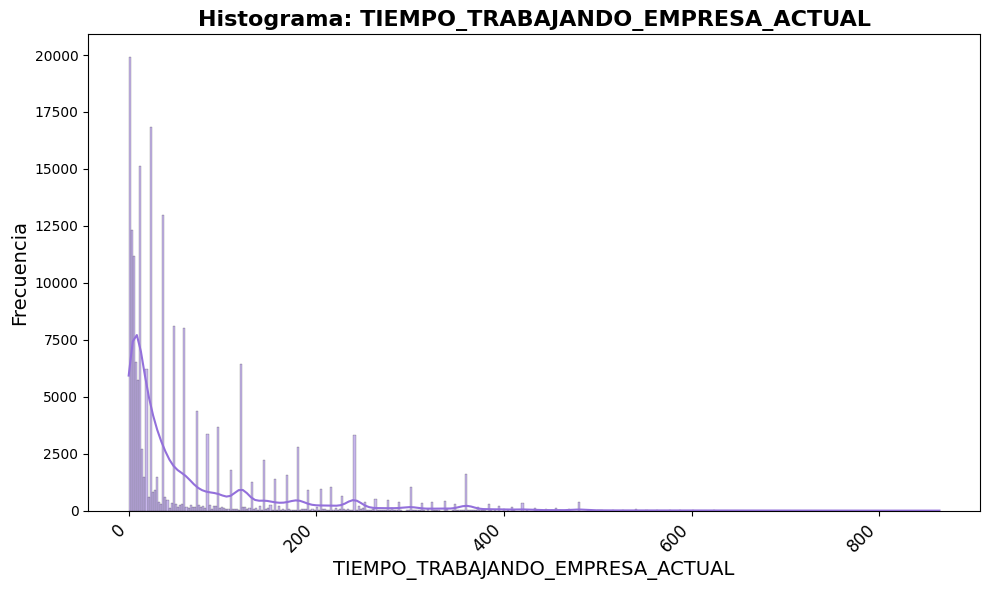

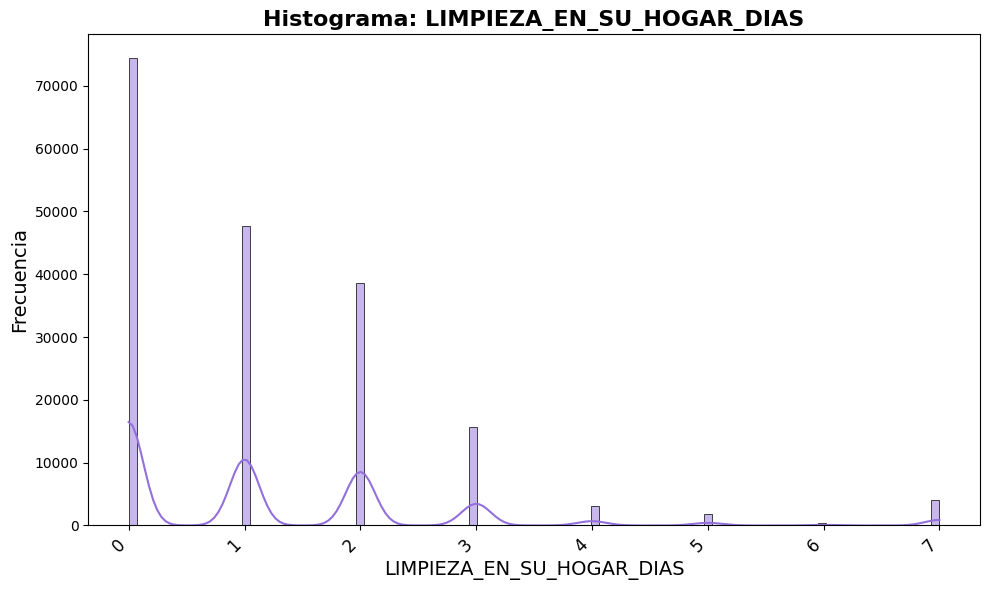

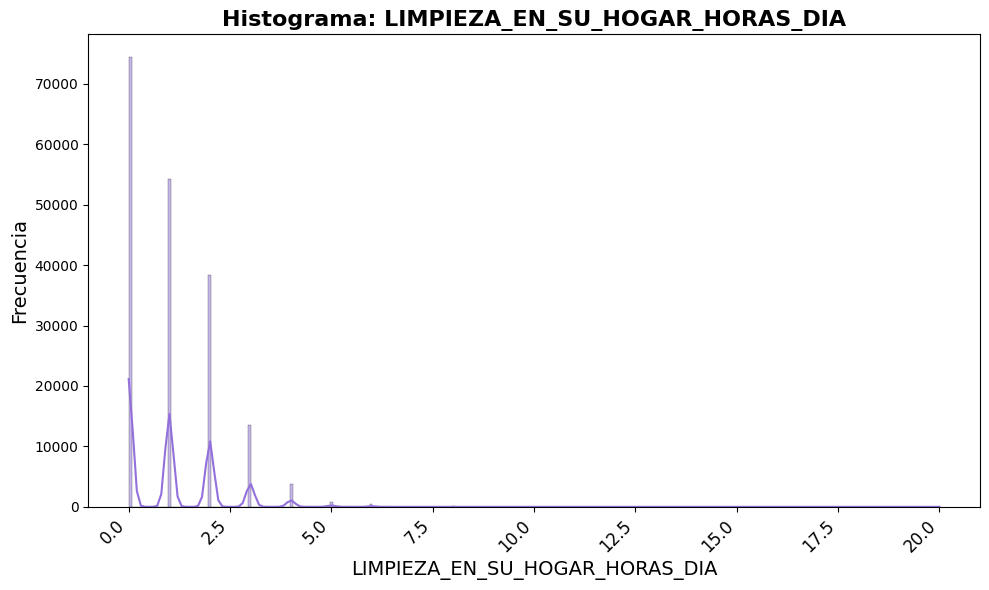

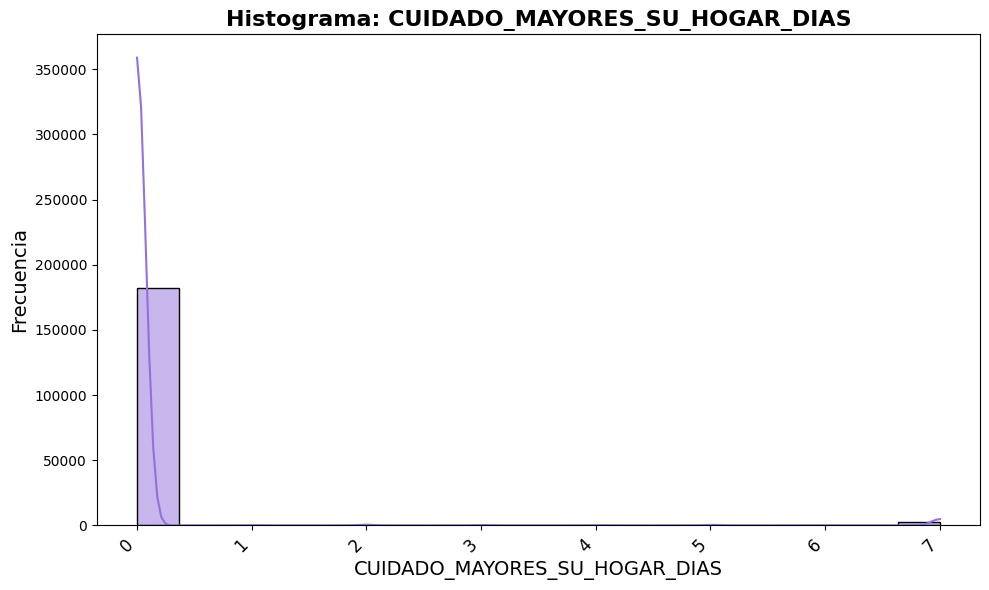

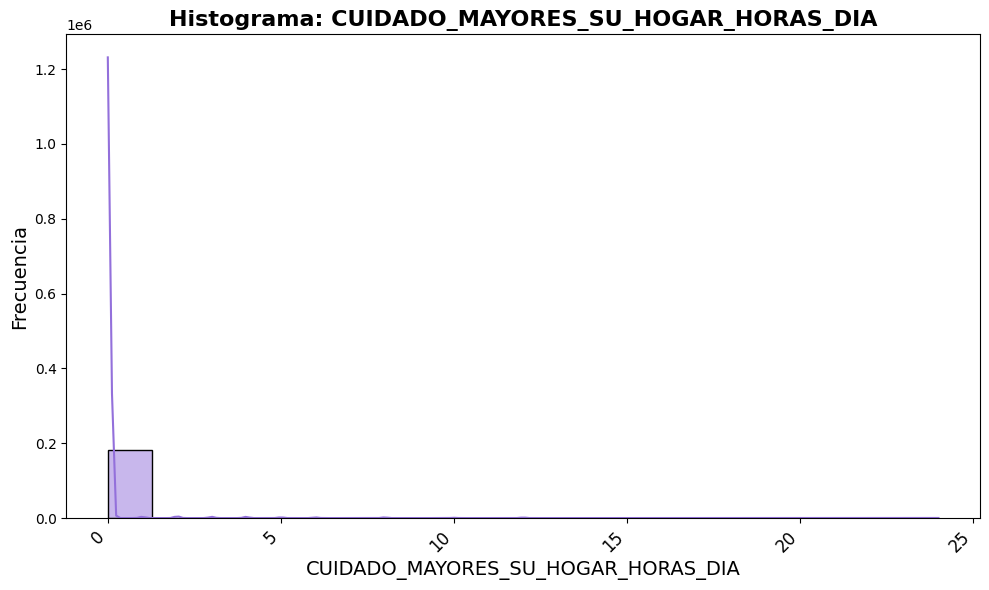

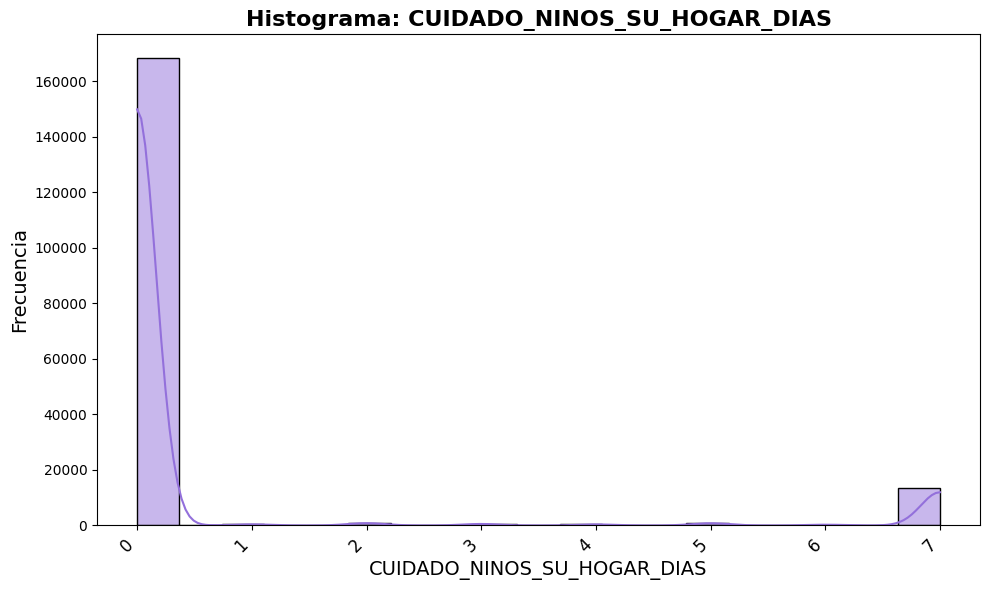

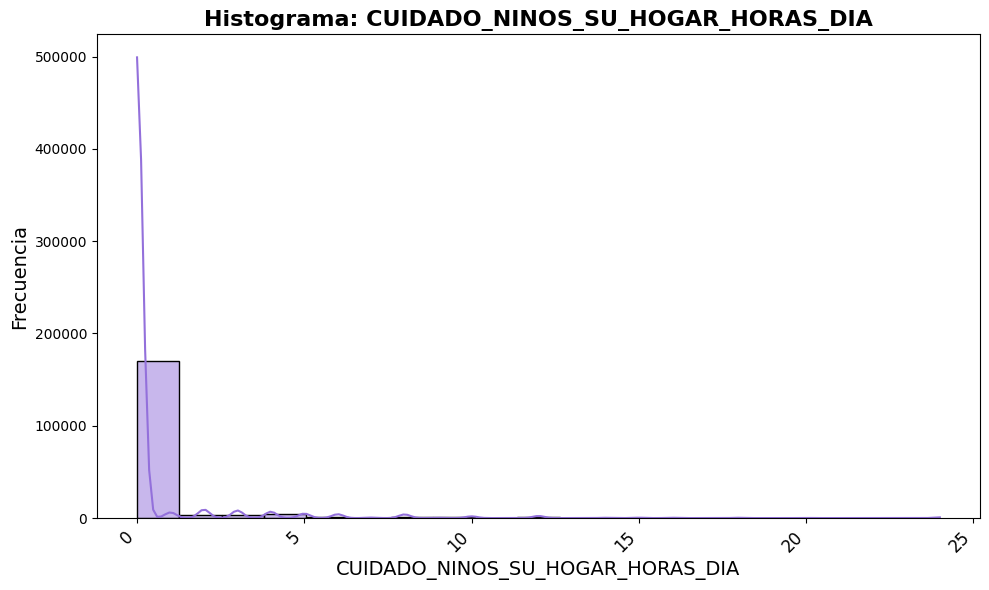

In [19]:
columns_numeric = df_ingreso.select_dtypes(include=["int64", "float64"]).columns

# Crear un histograma para cada columna numérica
for column in columns_numeric:
    plt.figure(figsize=(10,6))
    # Crear el histograma
    sns.histplot(data=df_ingreso, x=column, kde=True, color="mediumpurple")
    plt.title(f'Histograma: {column}', fontsize=16, fontweight="bold")
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.xlabel(f"{column}", fontsize=14)
    plt.tight_layout()
    plt.show()

### **Diagrama de barras para variables categóricas**

Estos gráficos proporcionan una visión clara de cómo se distribuyen las mediciones en función de las diferentes variables categóricas. Las descripciones de cada gráfico son las siguientes:

- **GÉNERO:** En esta gráfica se muestra la distribución por género. Se observa una leve mayoría de hombres frente a mujeres en la muestra. Ambas categorías tienen una alta representación, mientras que otros géneros o valores atípicos son casi inexistentes, lo que indica una clasificación binaria predominante.

- **ETNIA:** La mayoría de las personas se identifican como “ninguna” en términos de pertenencia étnica. Otras categorías como indígena, afrodescendiente o raizal tienen frecuencias considerablemente menores. Esto sugiere una baja proporción de población que se autorreconoce como perteneciente a grupos étnicos.

- **ESTRATO:** La mayor parte de la población se concentra en los estratos 1, 2 y 3, siendo el estrato 2 el más frecuente. Los estratos 4, 5 y 6 tienen una representación mucho menor, lo que evidencia una predominancia de hogares en condiciones socioeconómicas bajas o medias.

- **DPTO:** Se muestra la frecuencia por departamento. Departamentos como Antioquia, Valle del Cauca y Cundinamarca presentan las frecuencias más altas, mientras que otros como Vaupés, Guainía y Amazonas tienen una participación mínima. Esto refleja una distribución poblacional desigual entre regiones.

- **CONTRATO:** 
Predominan los trabajadores con contrato formal frente a aquellos con vinculación verbal. La diferencia de altura entre ambas barras indica una mayor presencia de empleo formal en la muestra analizada.

- **LIMPIEZA_EN_SU_HOGAR:** La mayoría de los hogares indicaron contar con servicios de limpieza, aunque una proporción significativa respondió que no. Esto sugiere diferencias en acceso o necesidad de servicios domésticos entre los hogares.

- **CUIDADO_NIÑOS_SU_HOGAR:** Se observa una mayor frecuencia de hogares donde sí se realiza cuidado de niños frente a los que no. Esto refleja la presencia de menores como una constante importante en los hogares encuestados.

- **CUIDADO_MAYORES_SU_HOGAR:** La gran mayoría de hogares no realiza cuidado a personas mayores, lo cual podría estar relacionado con la estructura etaria de las familias o con la institucionalización de este cuidado en otros espacios.

- **TERMINO_CONTRATO:** El tipo de contrato más común es el de término indefinido, seguido del contrato por obra o labor. El contrato a término fijo tiene una representación intermedia. Esto indica una diversidad de modalidades de vinculación laboral, pero con una tendencia hacia mayor estabilidad.

- **URBANO_RURAL:** En esta gráfica se muestra la distribución de la población según su ubicación geográfica. La mayoría de las personas reside en zonas urbanas, mientras que una proporción significativamente menor vive en áreas rurales. Esto refleja una clara concentración poblacional en centros urbanos.

- **MÁXIMO_NIVEL_EDUCATIVO:** El nivel educativo más frecuente es el de bachillerato clásico, seguido por la educación universitaria y la básica primaria. Niveles como posgrados, doctorados y educación mínima presentan frecuencias considerablemente menores. Esta distribución indica que la mayoría de la población ha completado al menos la educación media, aunque no todos acceden a estudios superiores.

- **CAMPESINO:** En esta gráfica se muestra si las personas se reconocen o no como campesinas. La mayoría de los encuestados respondieron afirmativamente, lo cual indica una fuerte identidad campesina dentro de la muestra. Una proporción menor no se identifica con esta categoría y hay una cantidad muy reducida de personas que no respondieron o indicaron “no sabe”. Esta distribución resalta la importancia del sector rural productivo en el contexto de la encuesta.

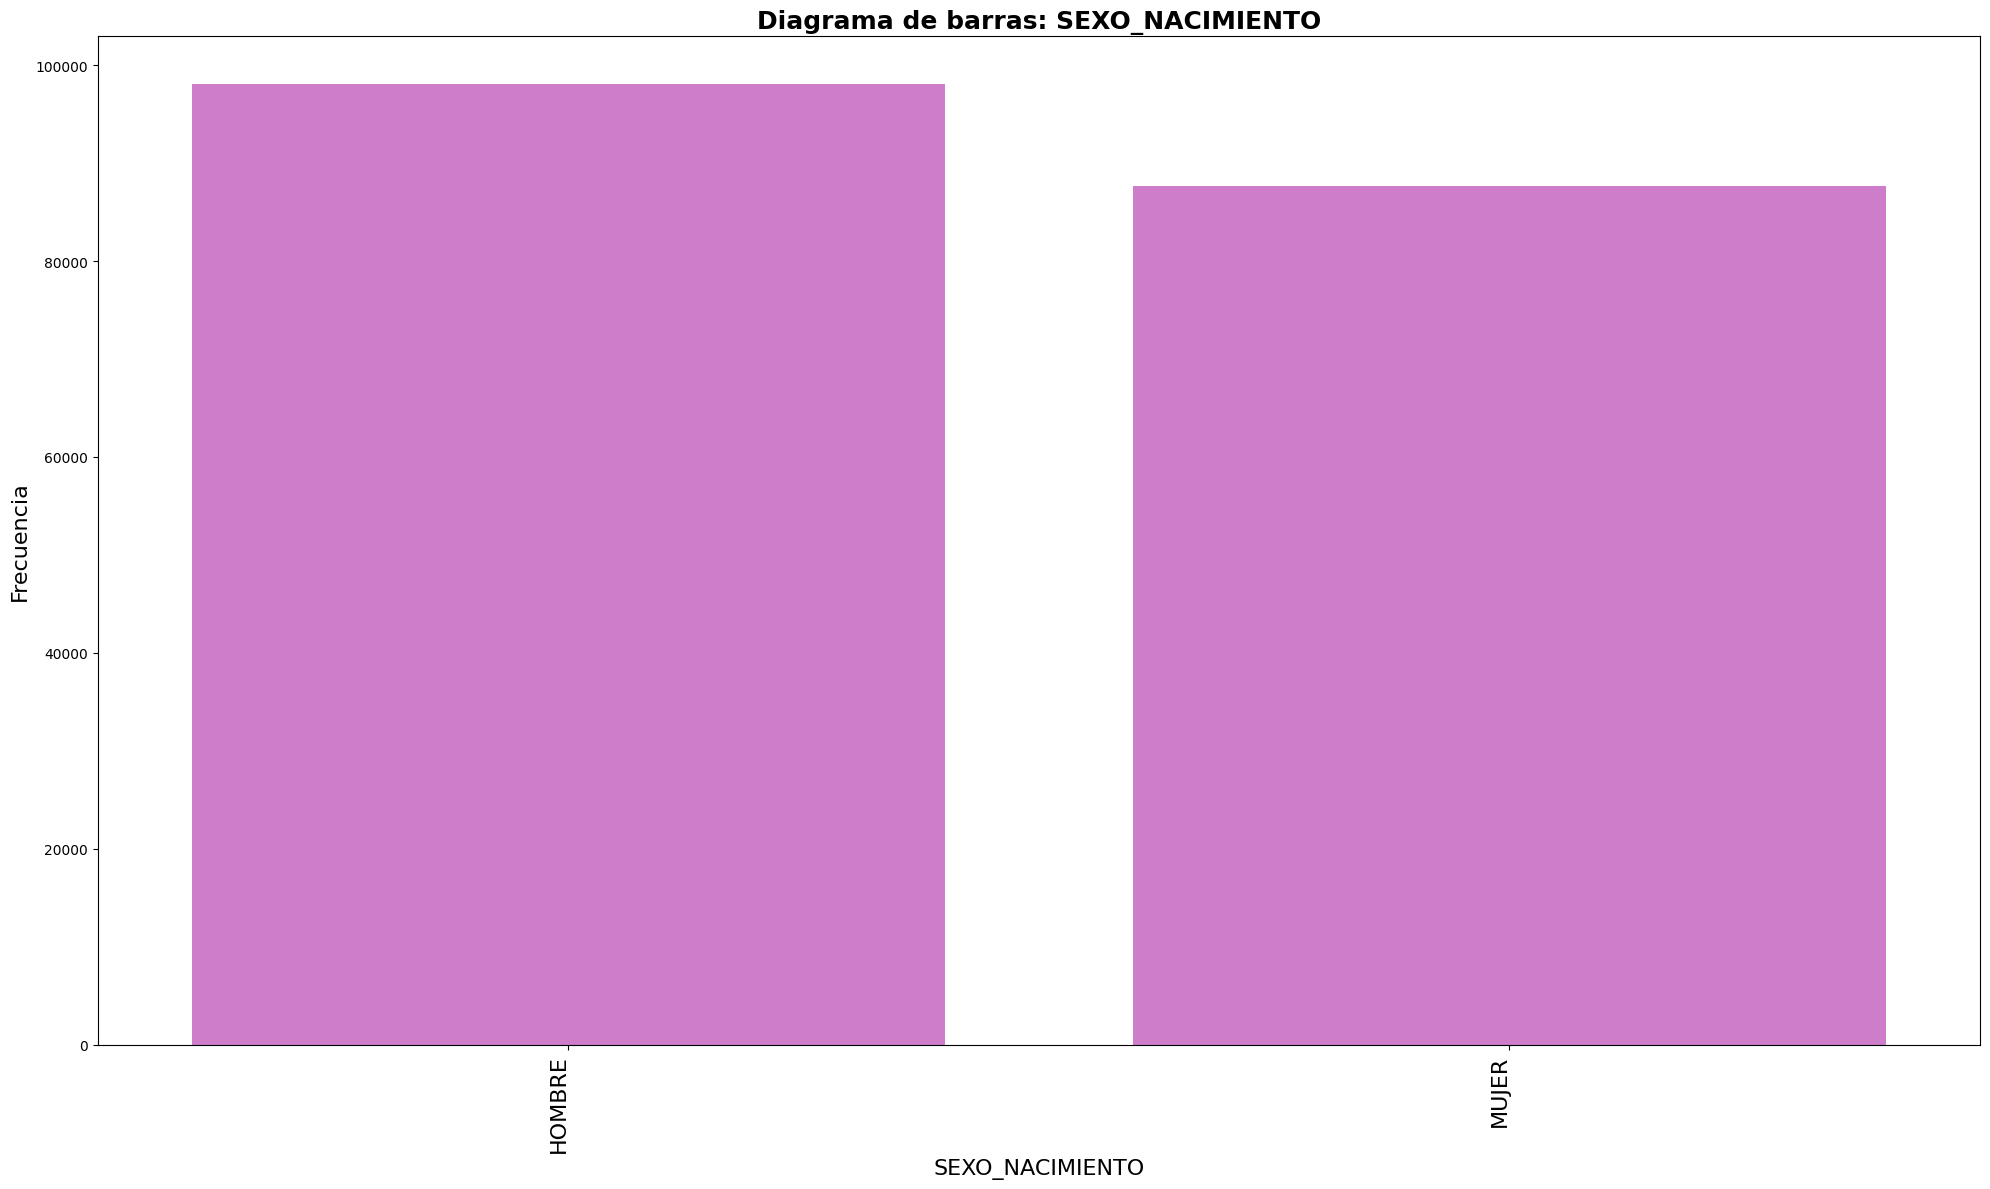

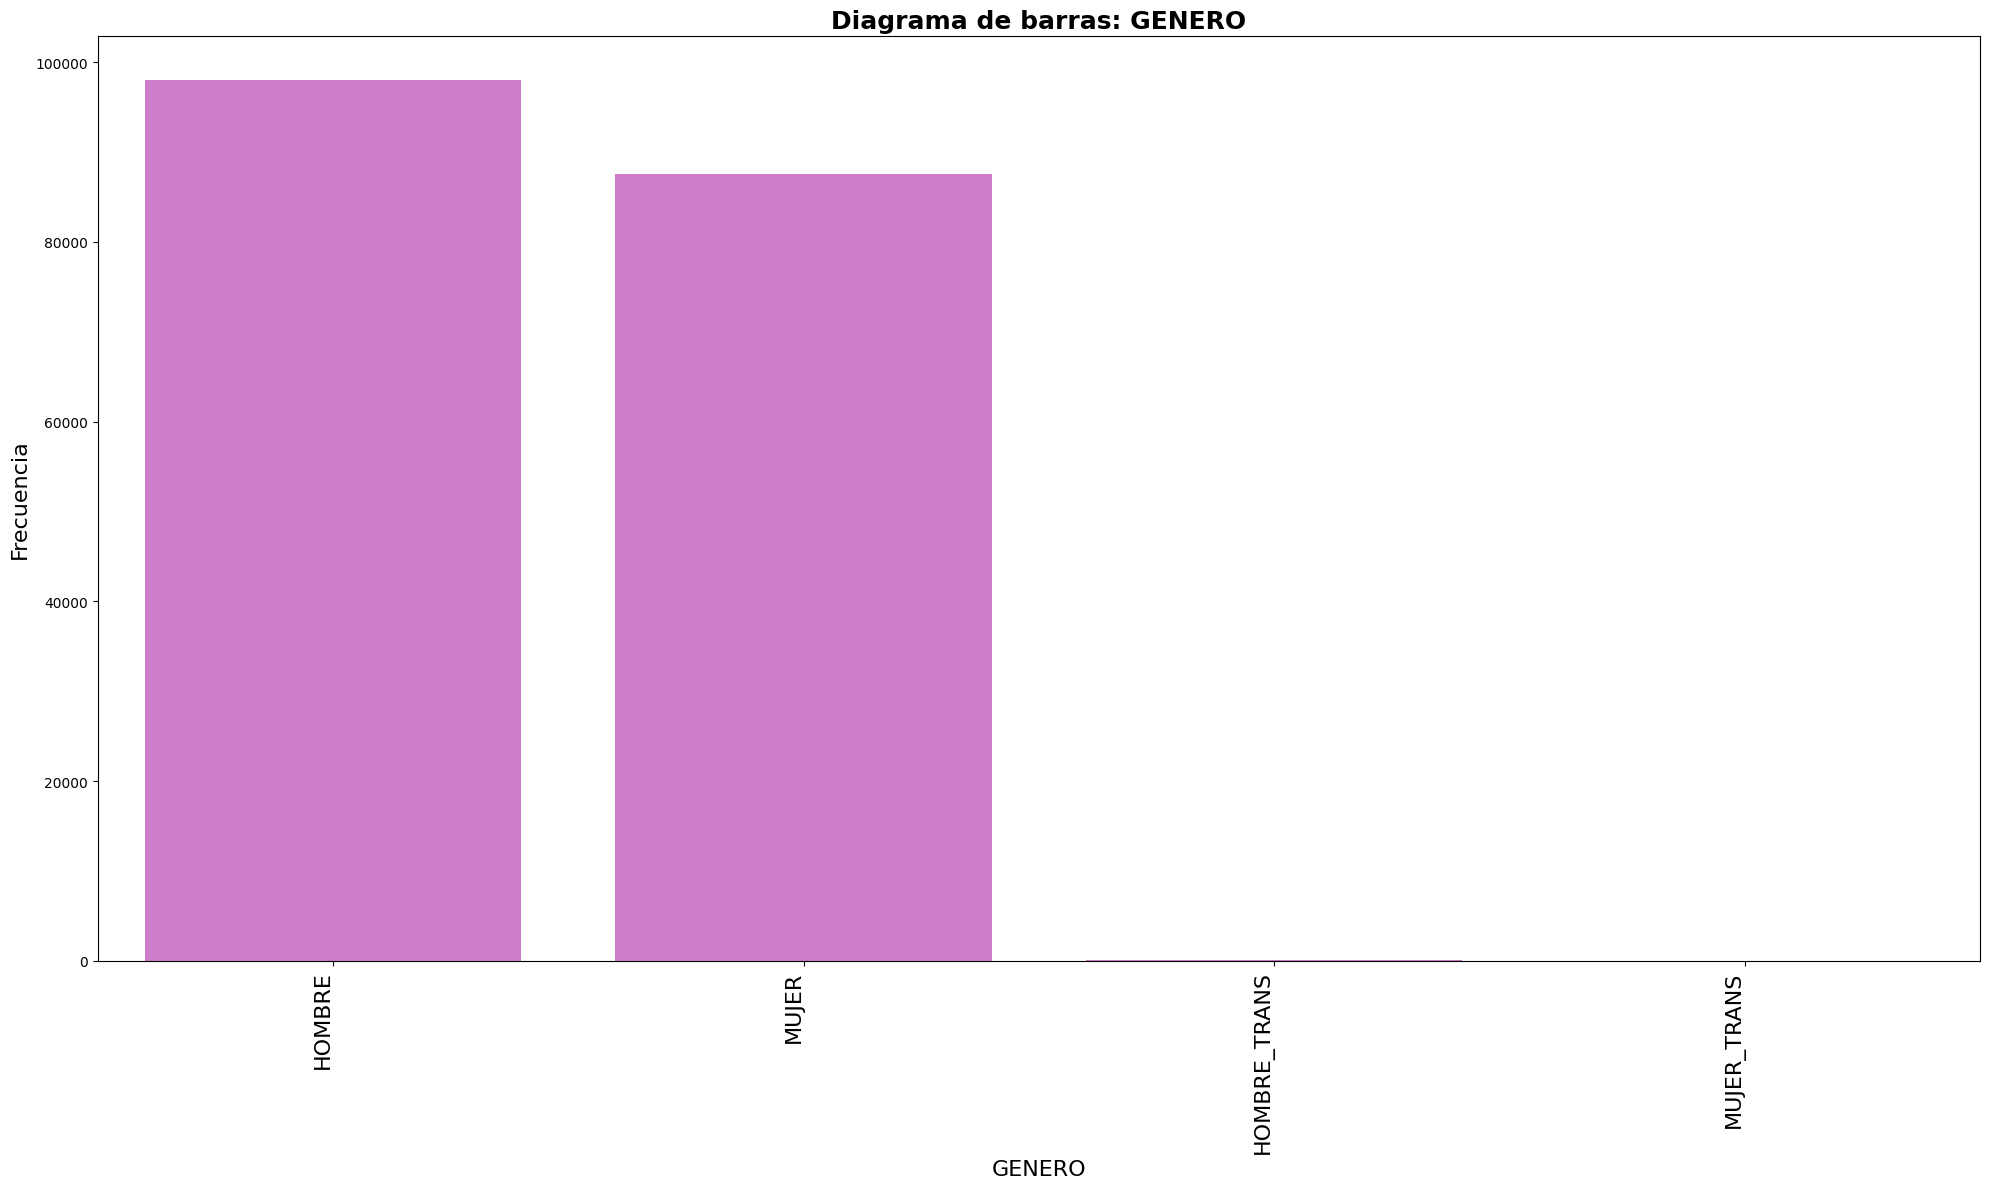

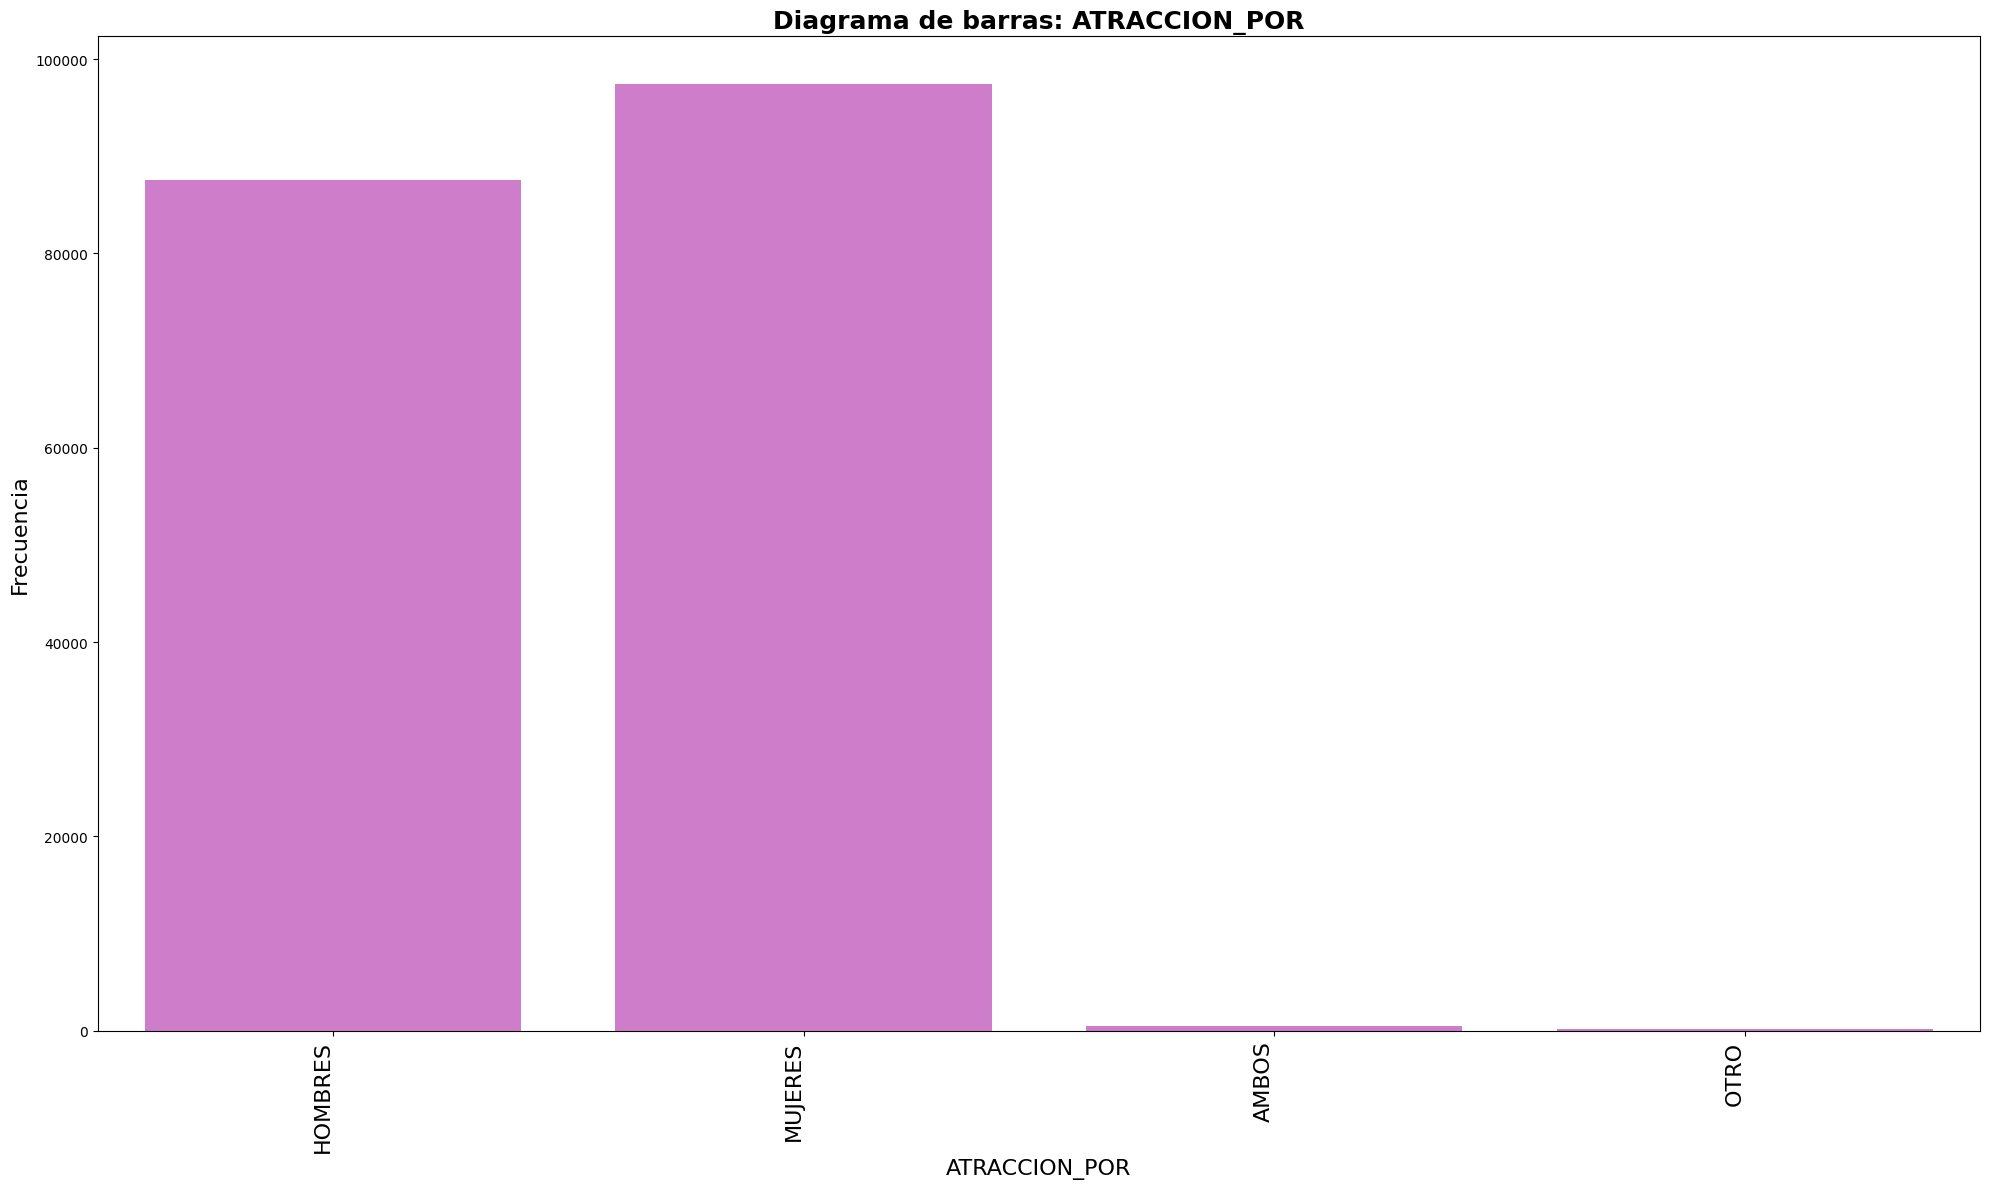

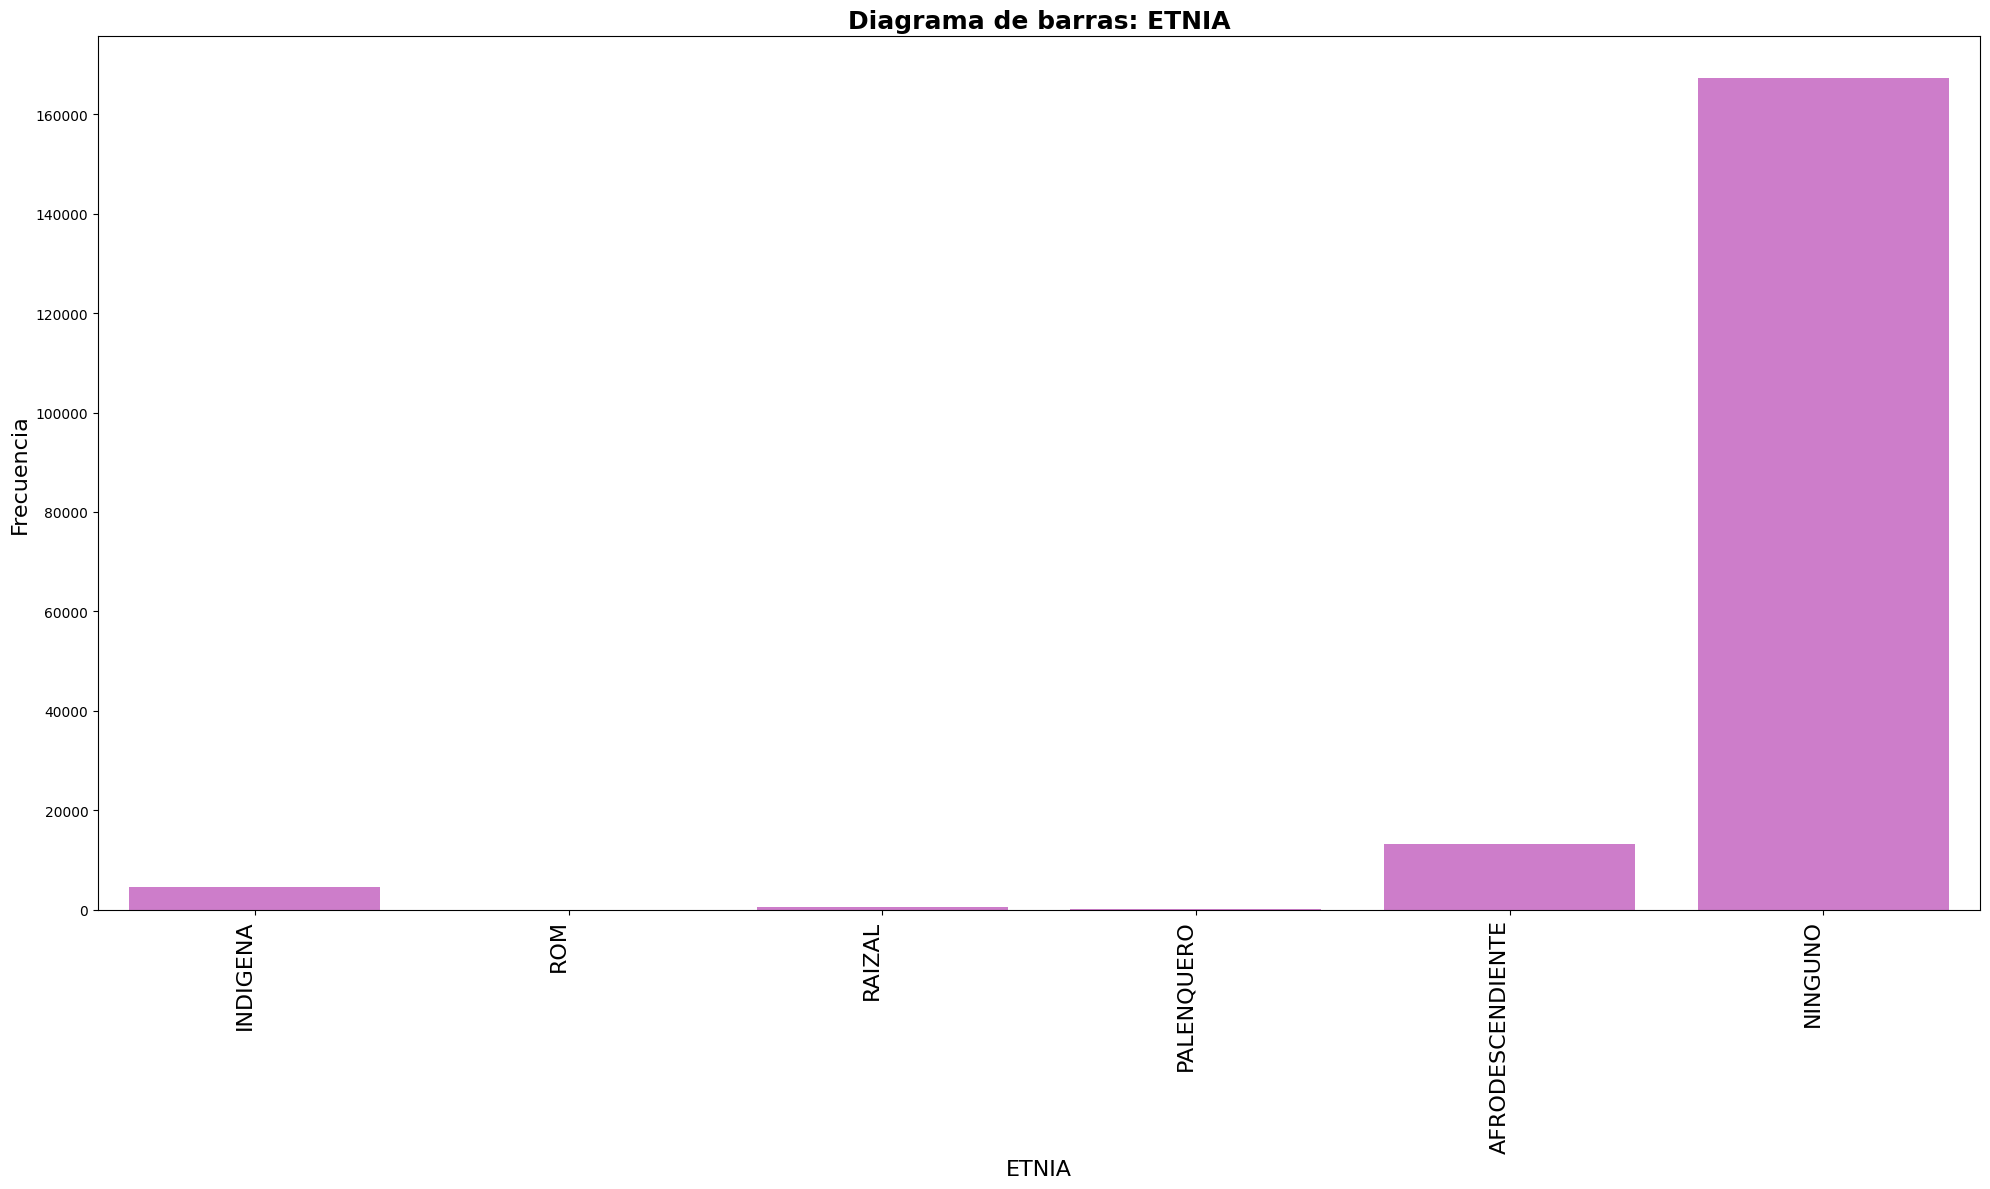

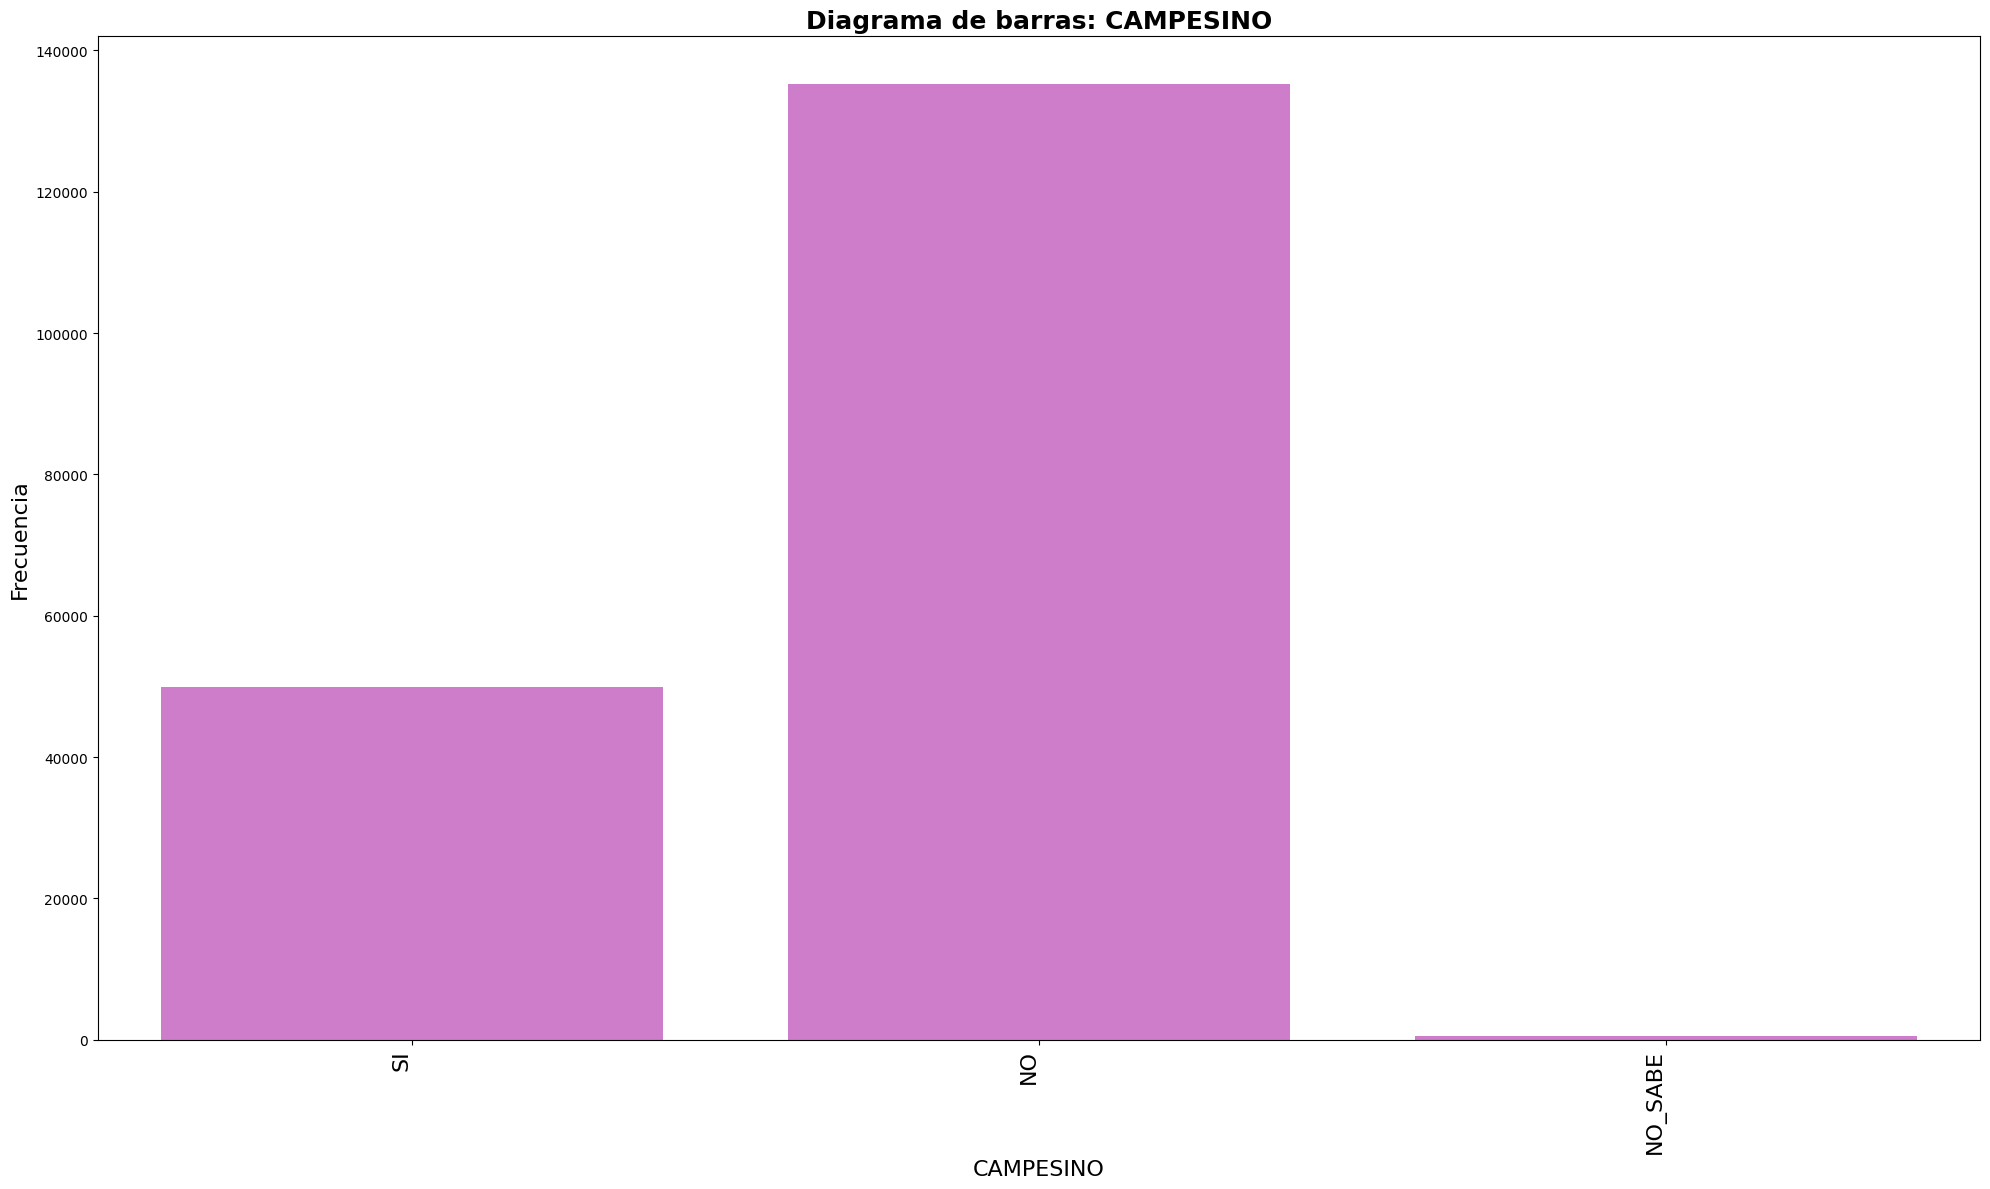

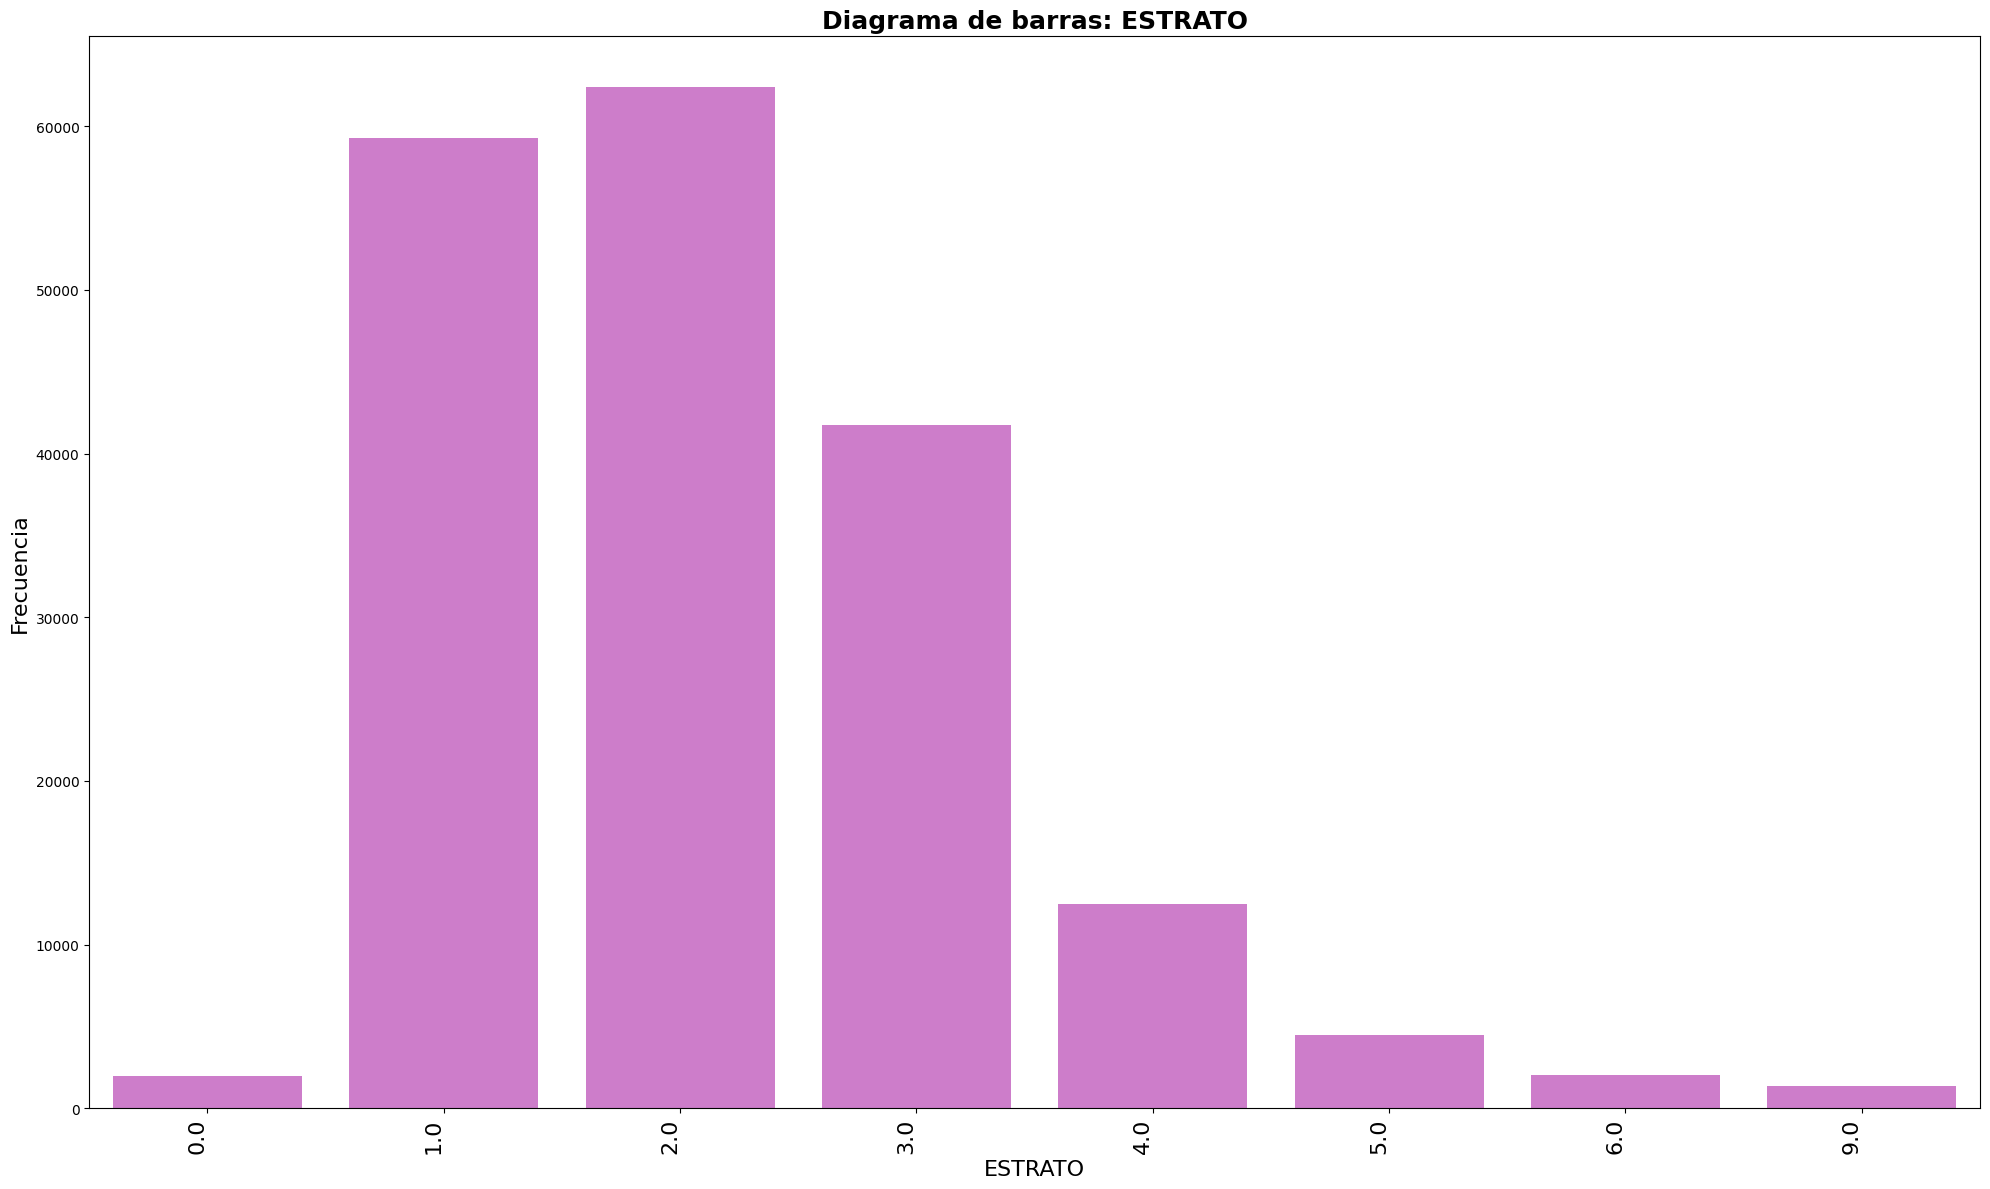

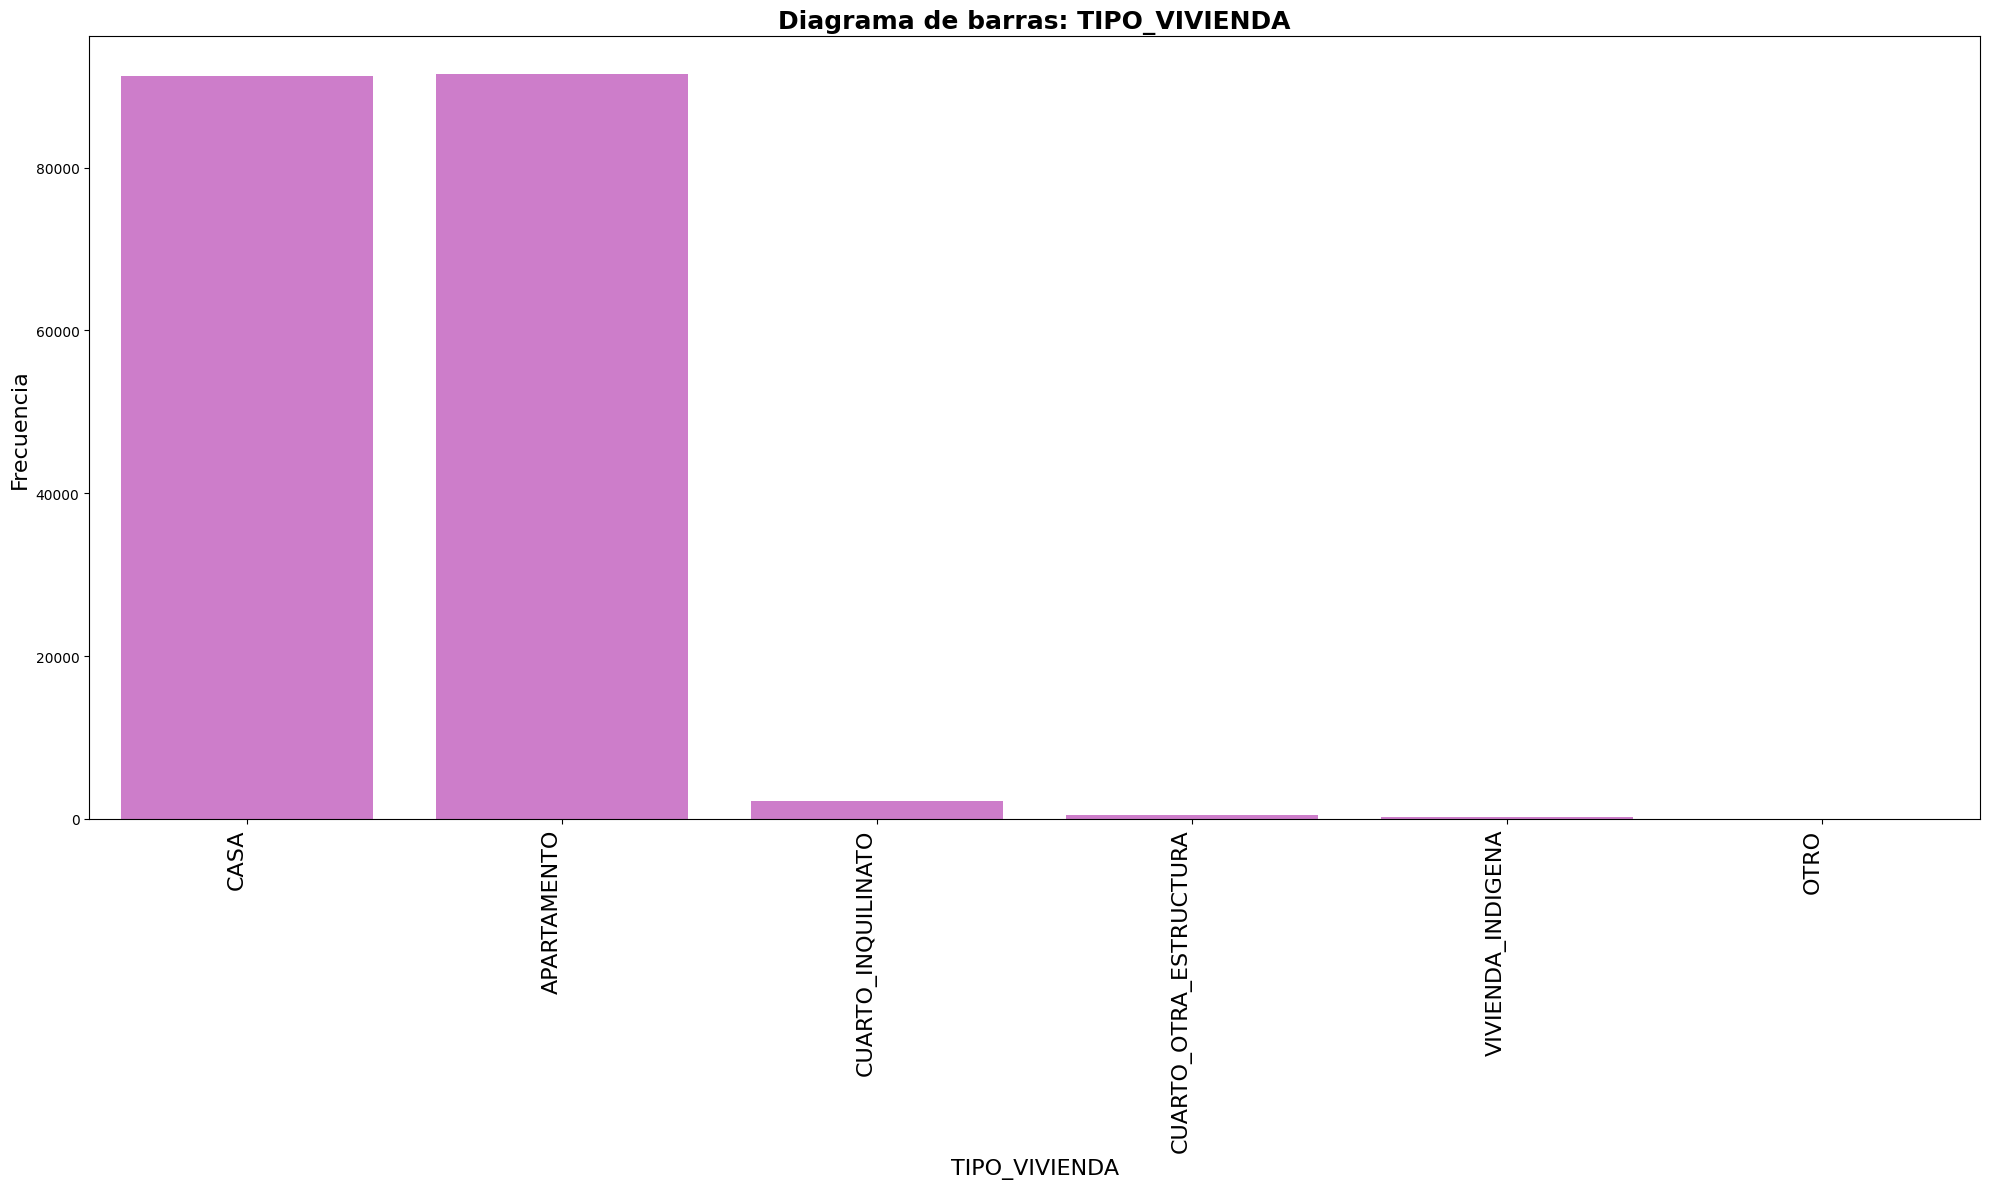

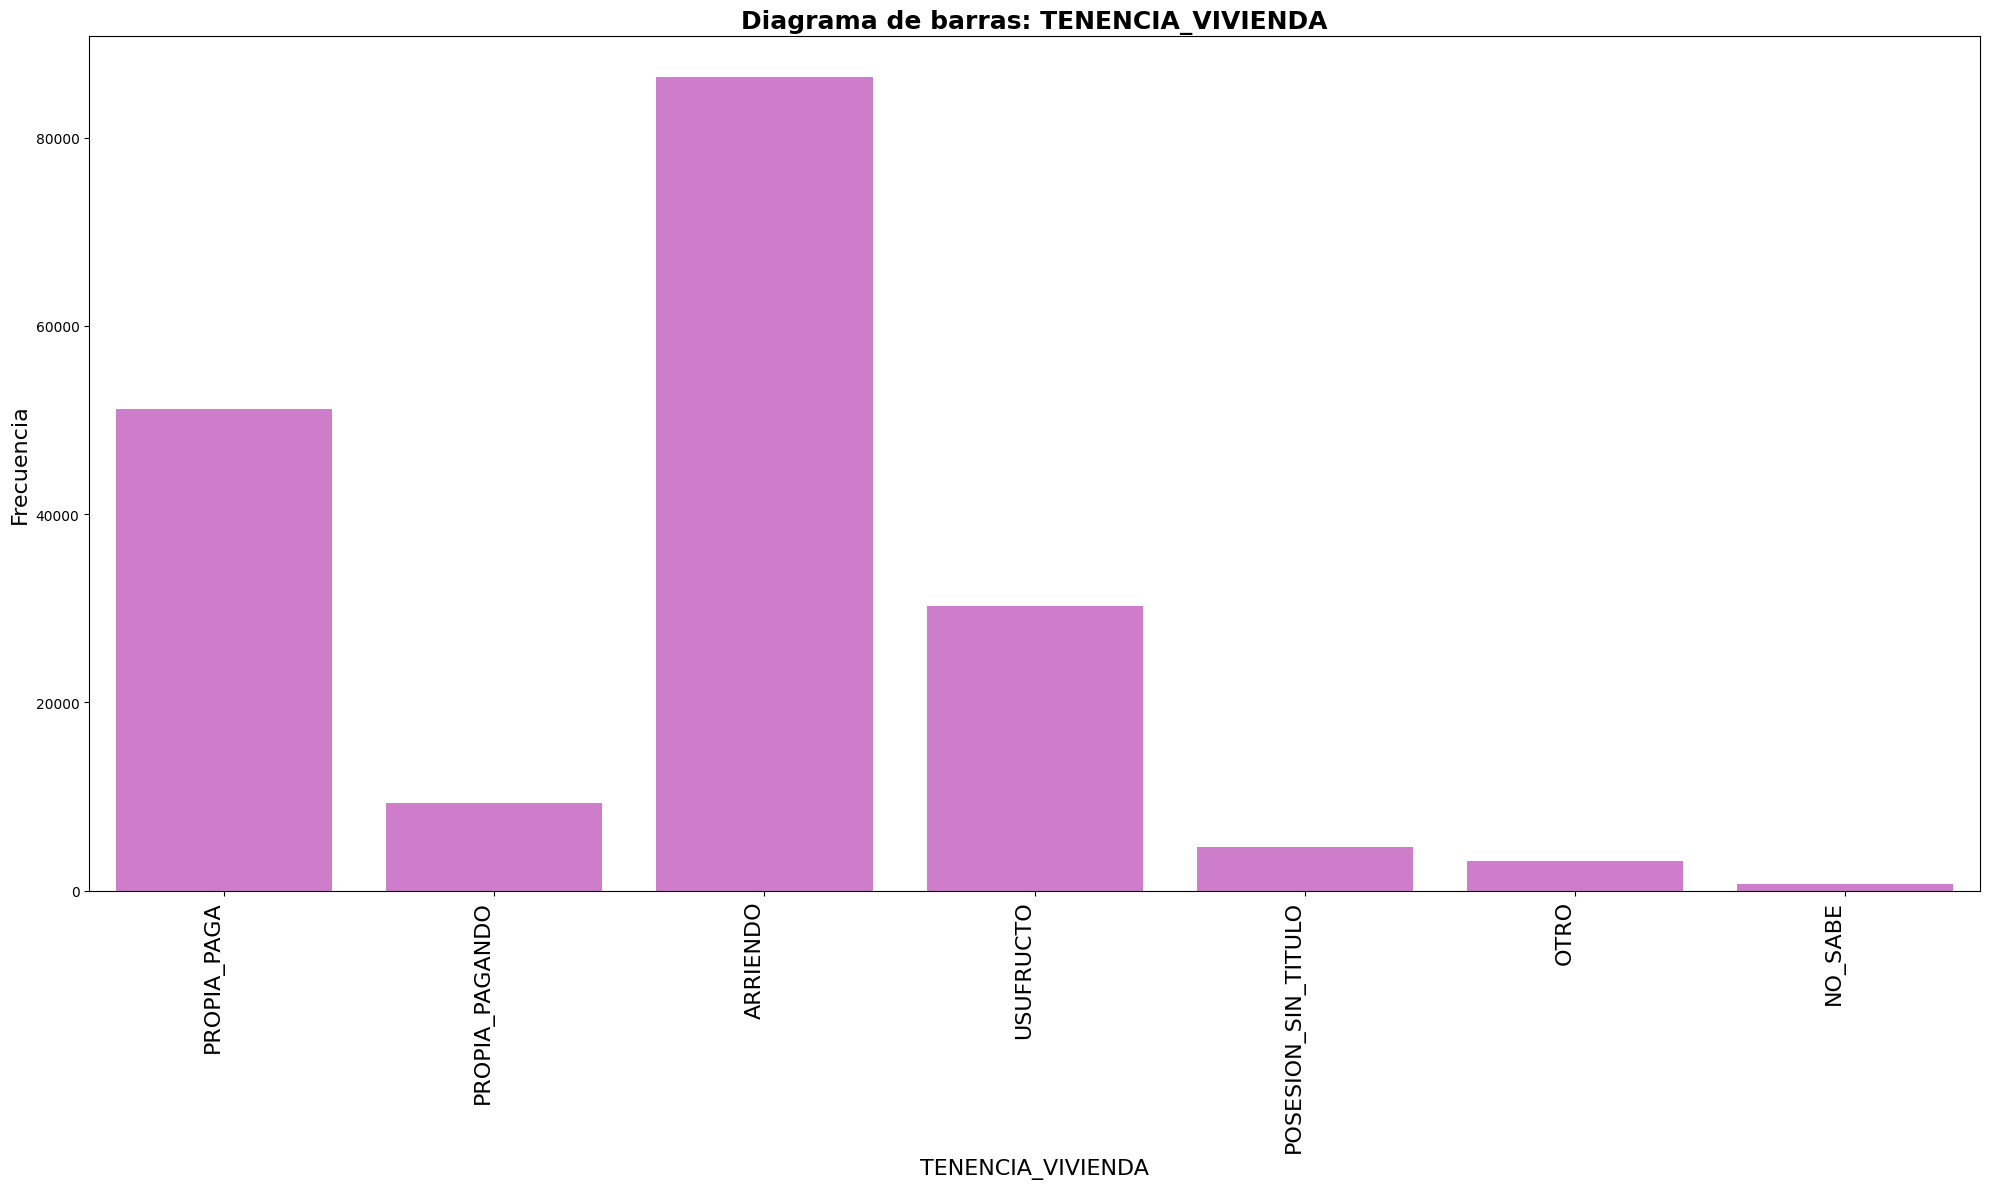

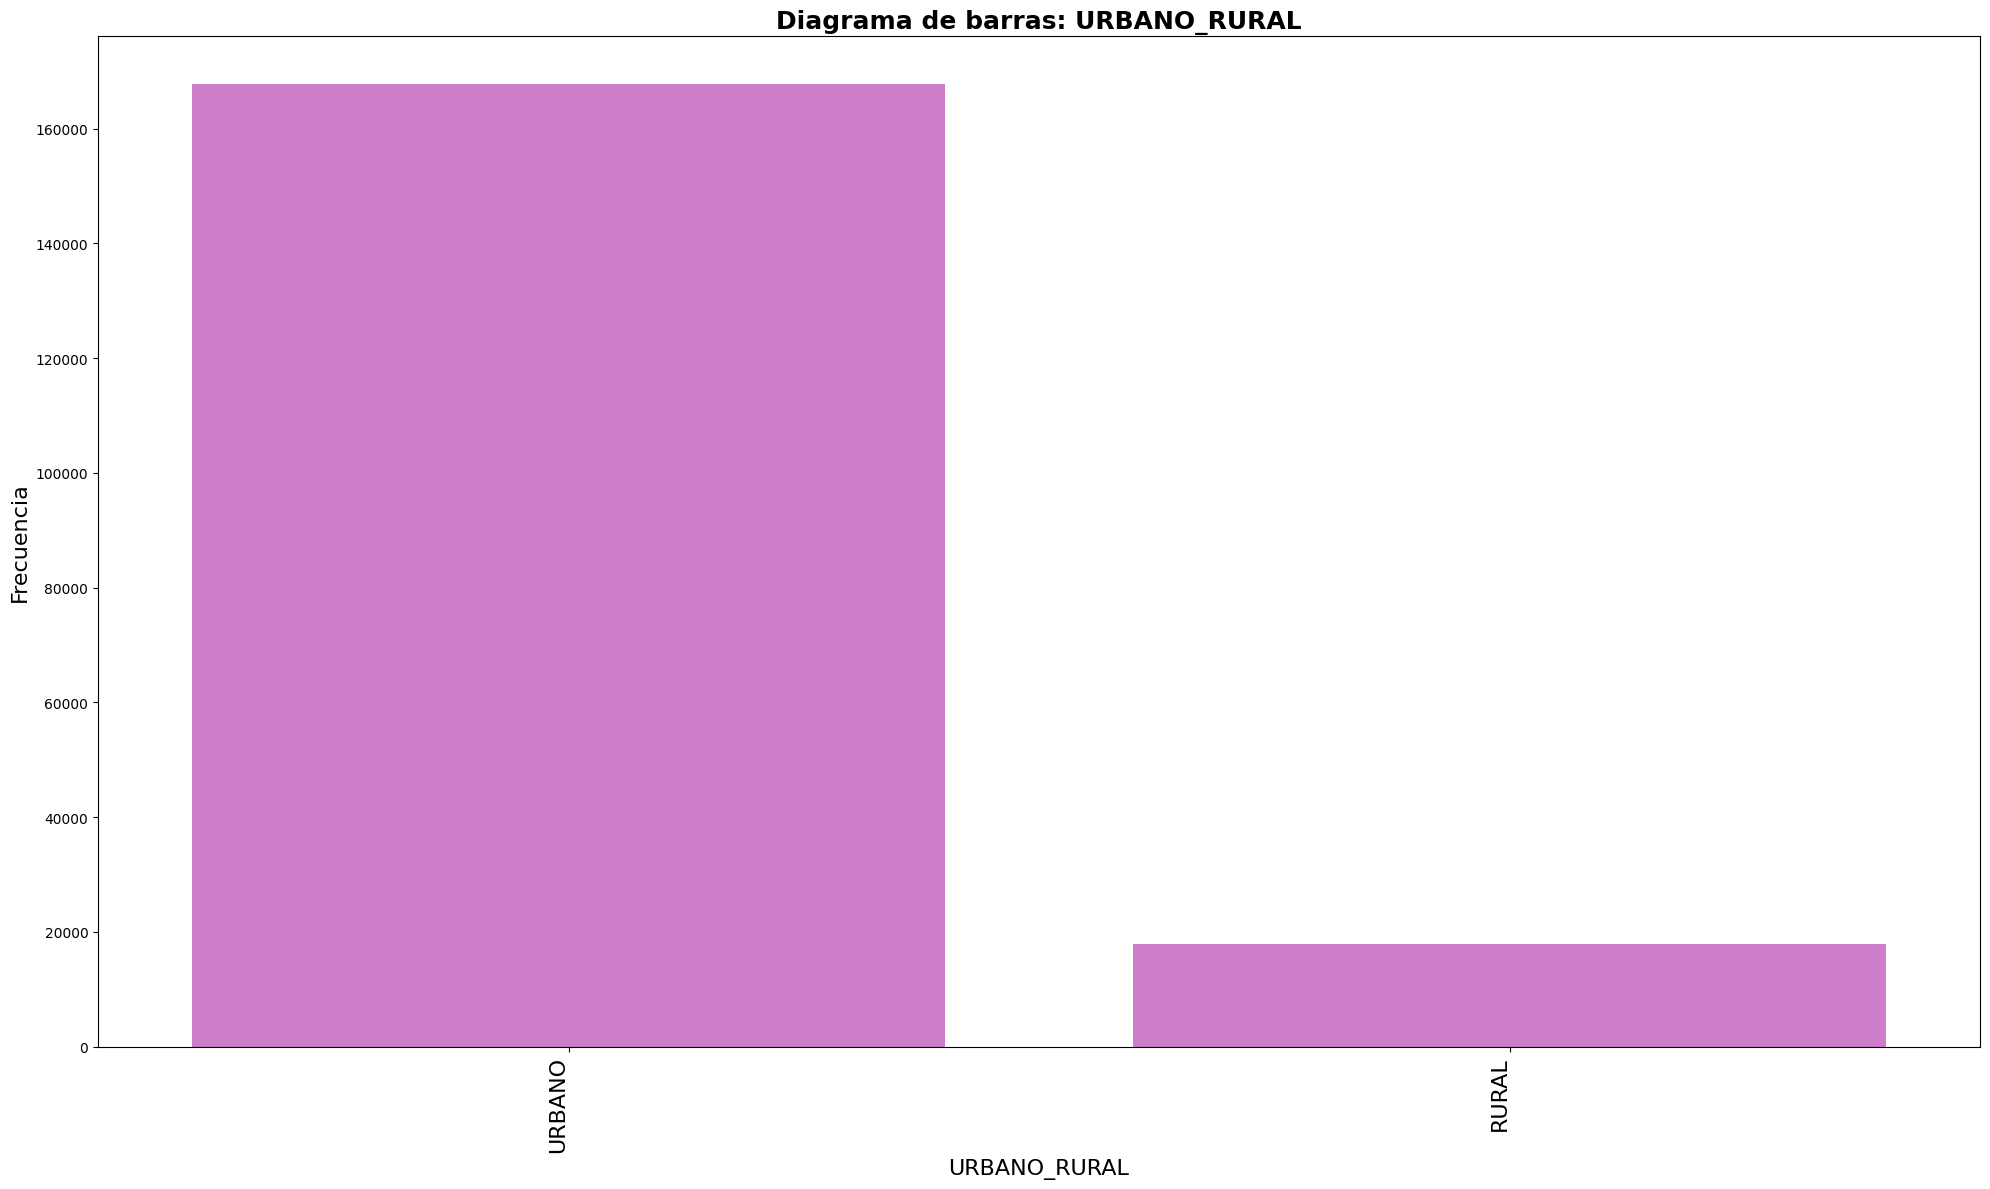

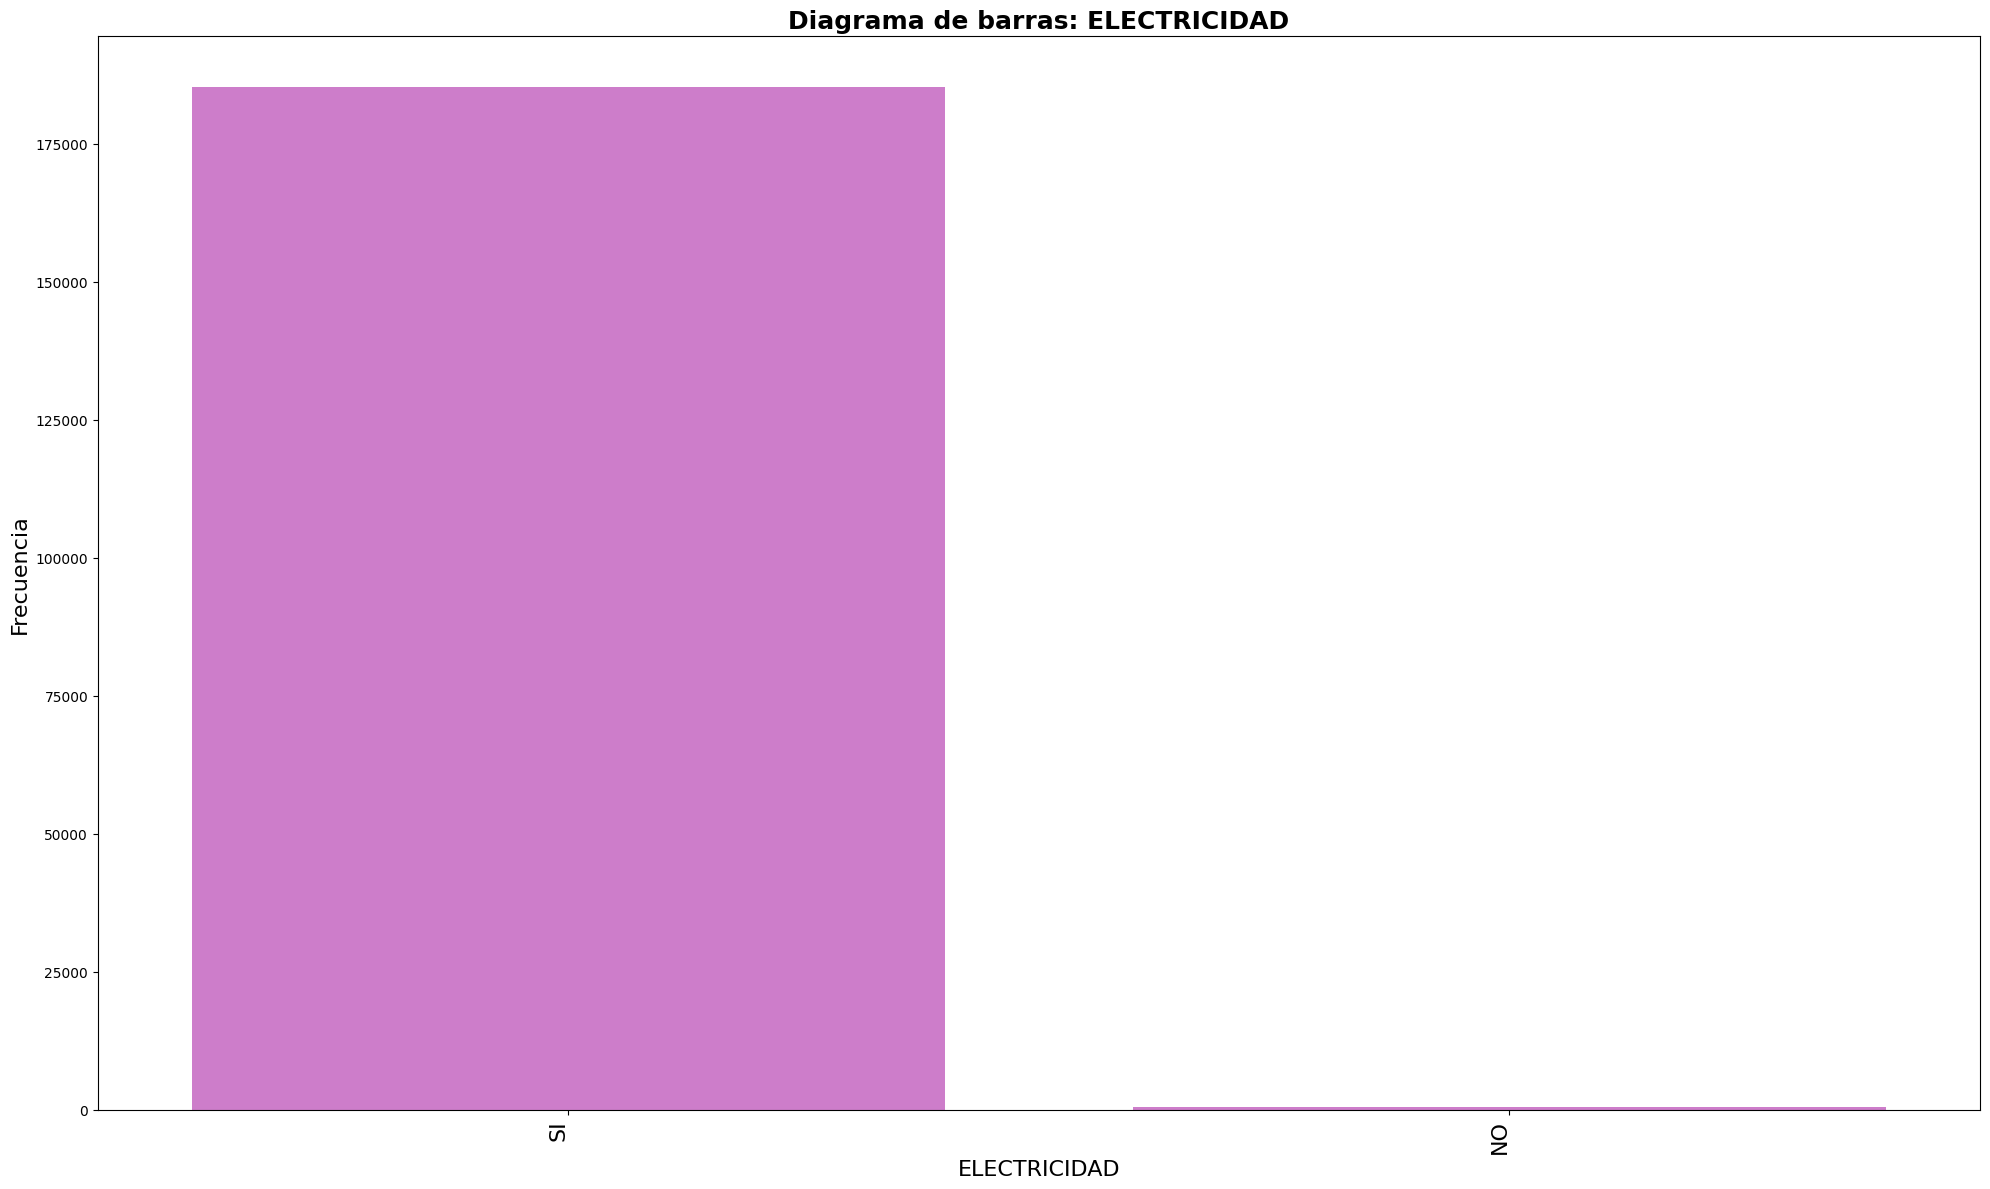

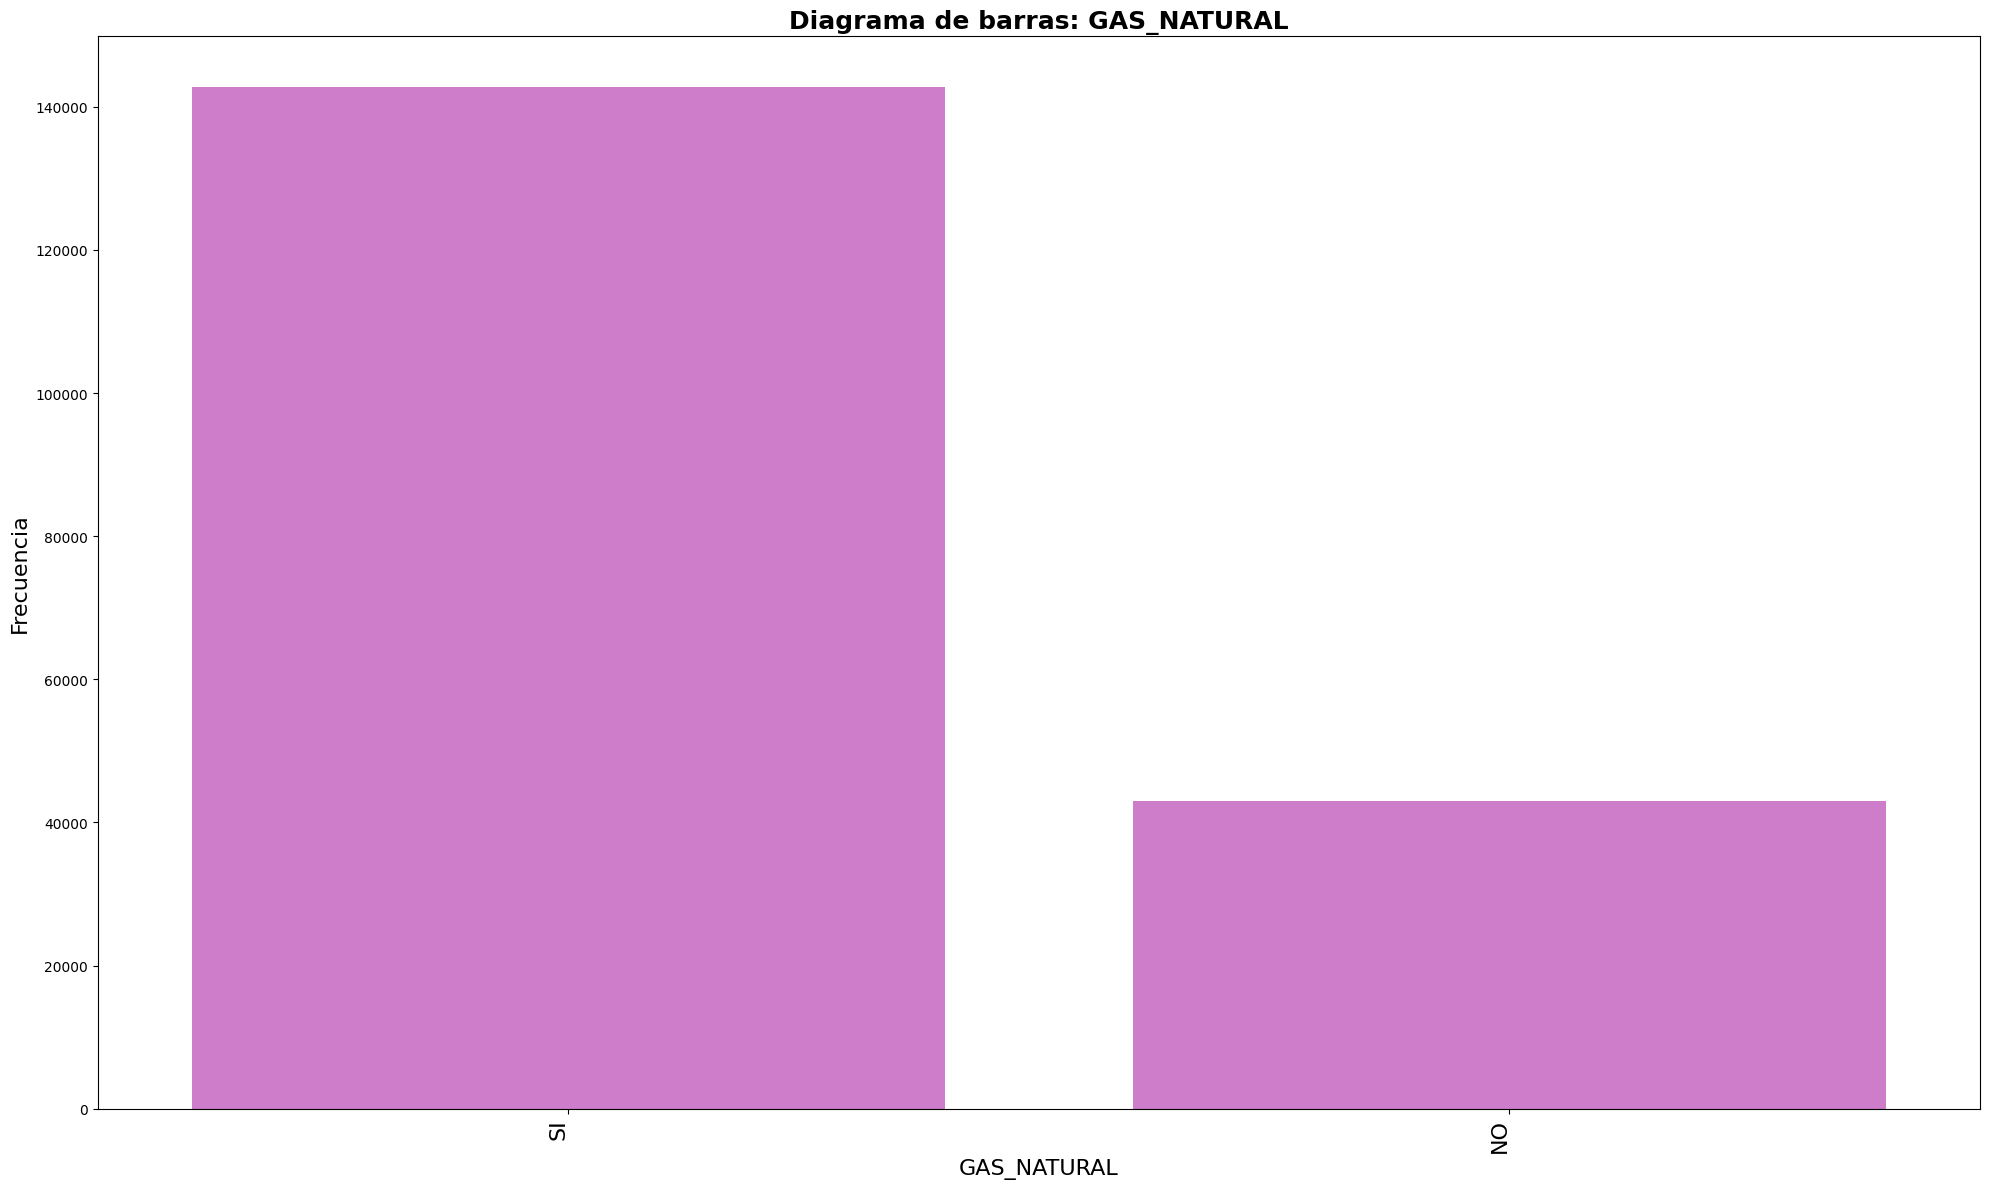

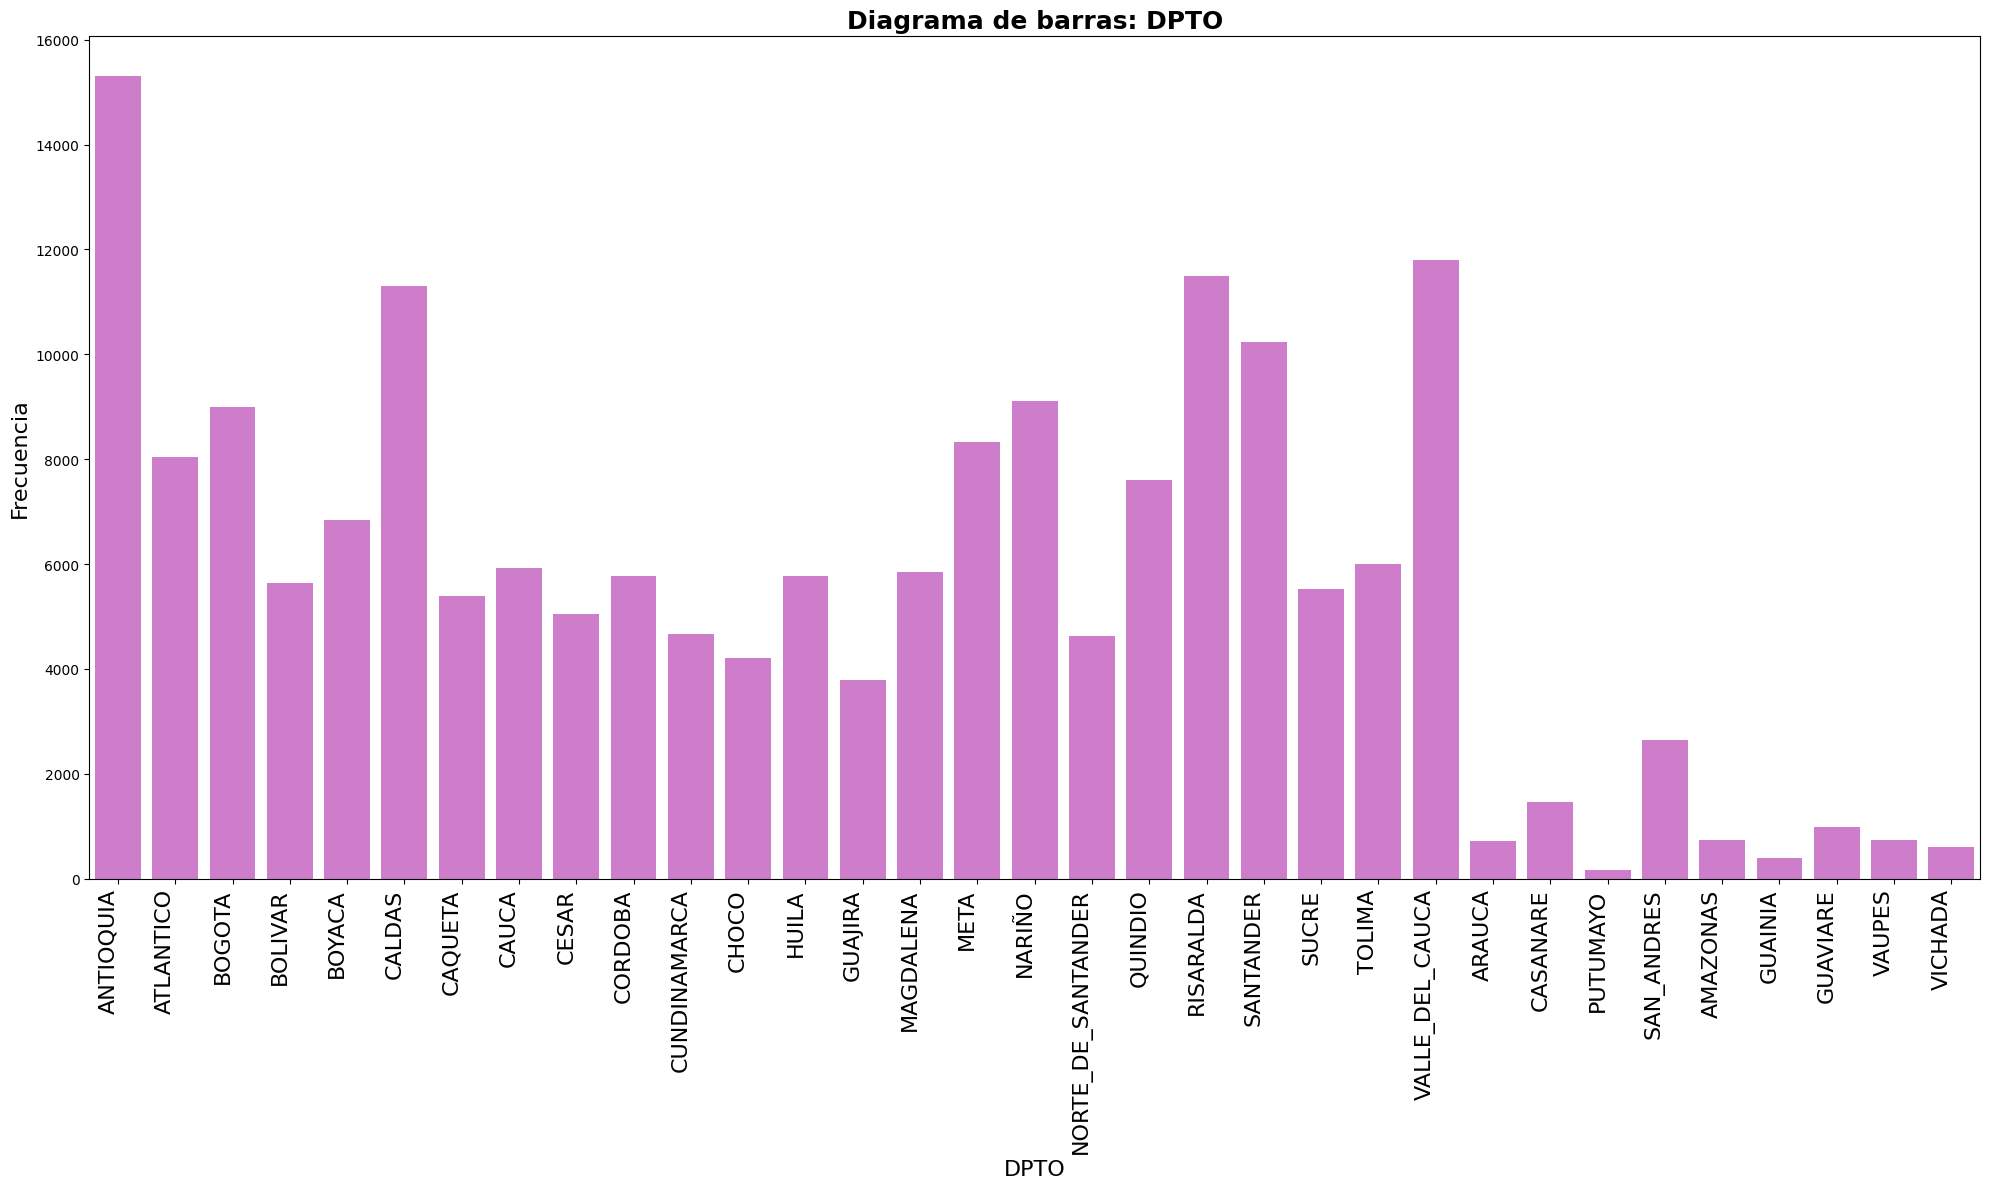

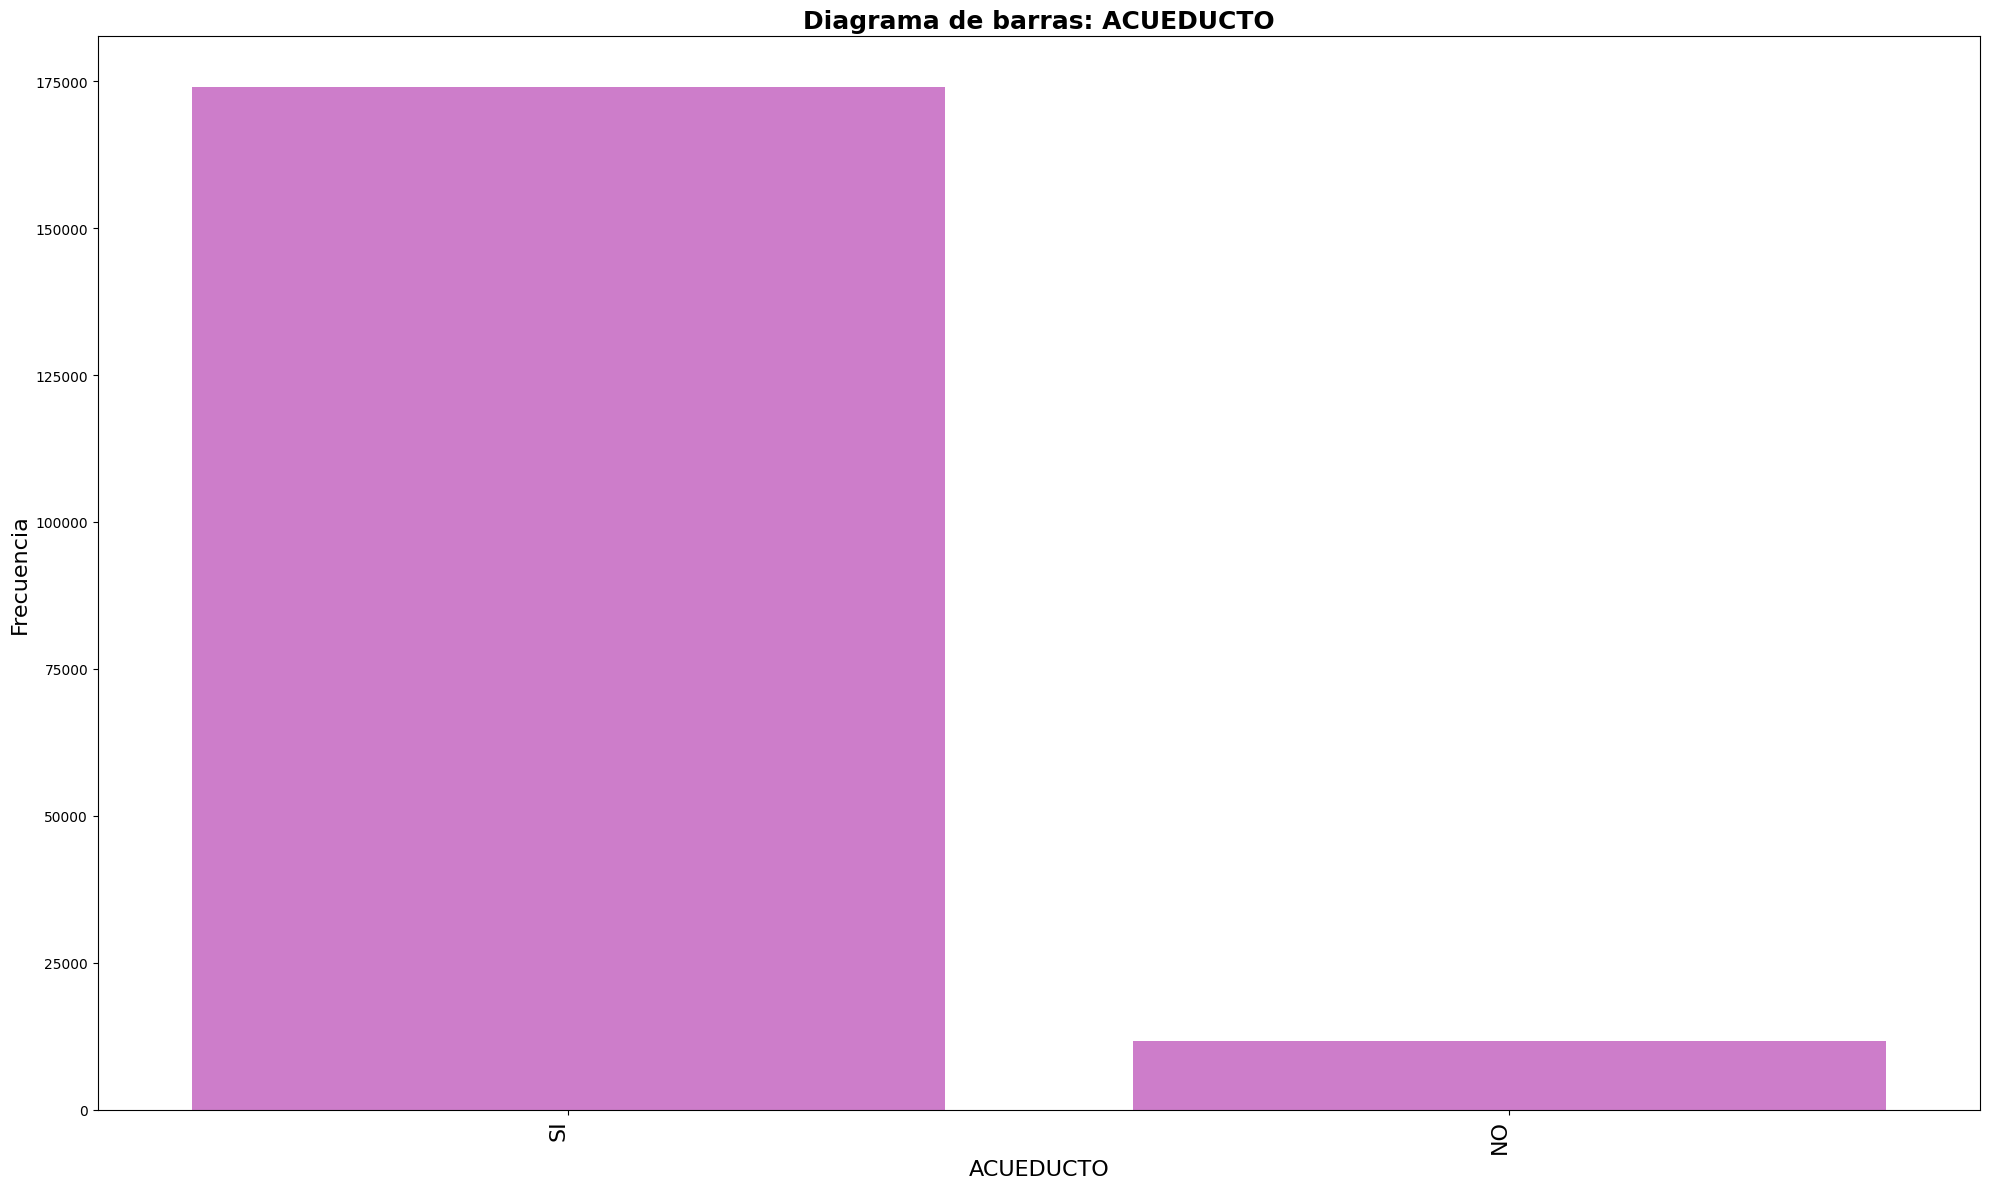

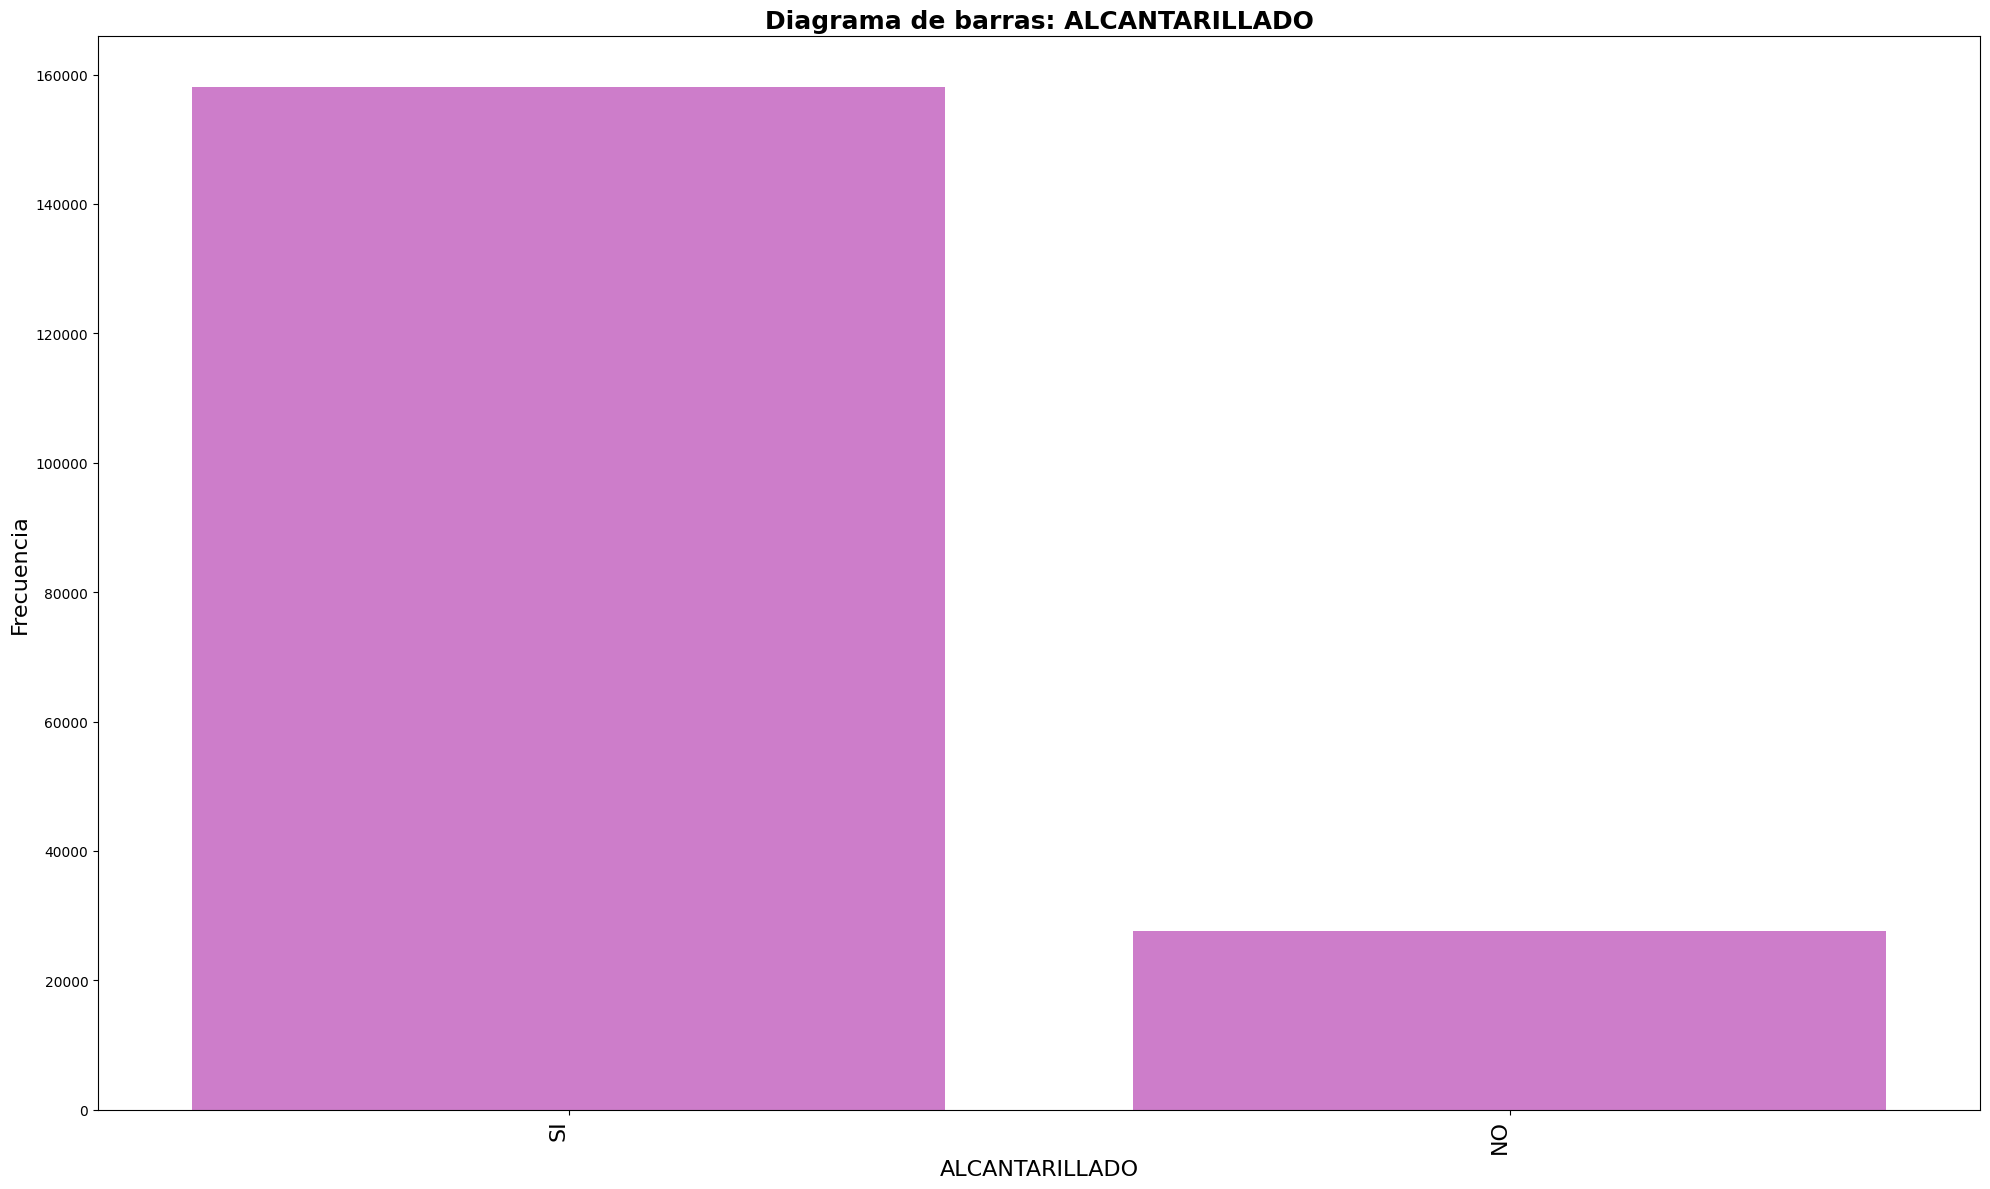

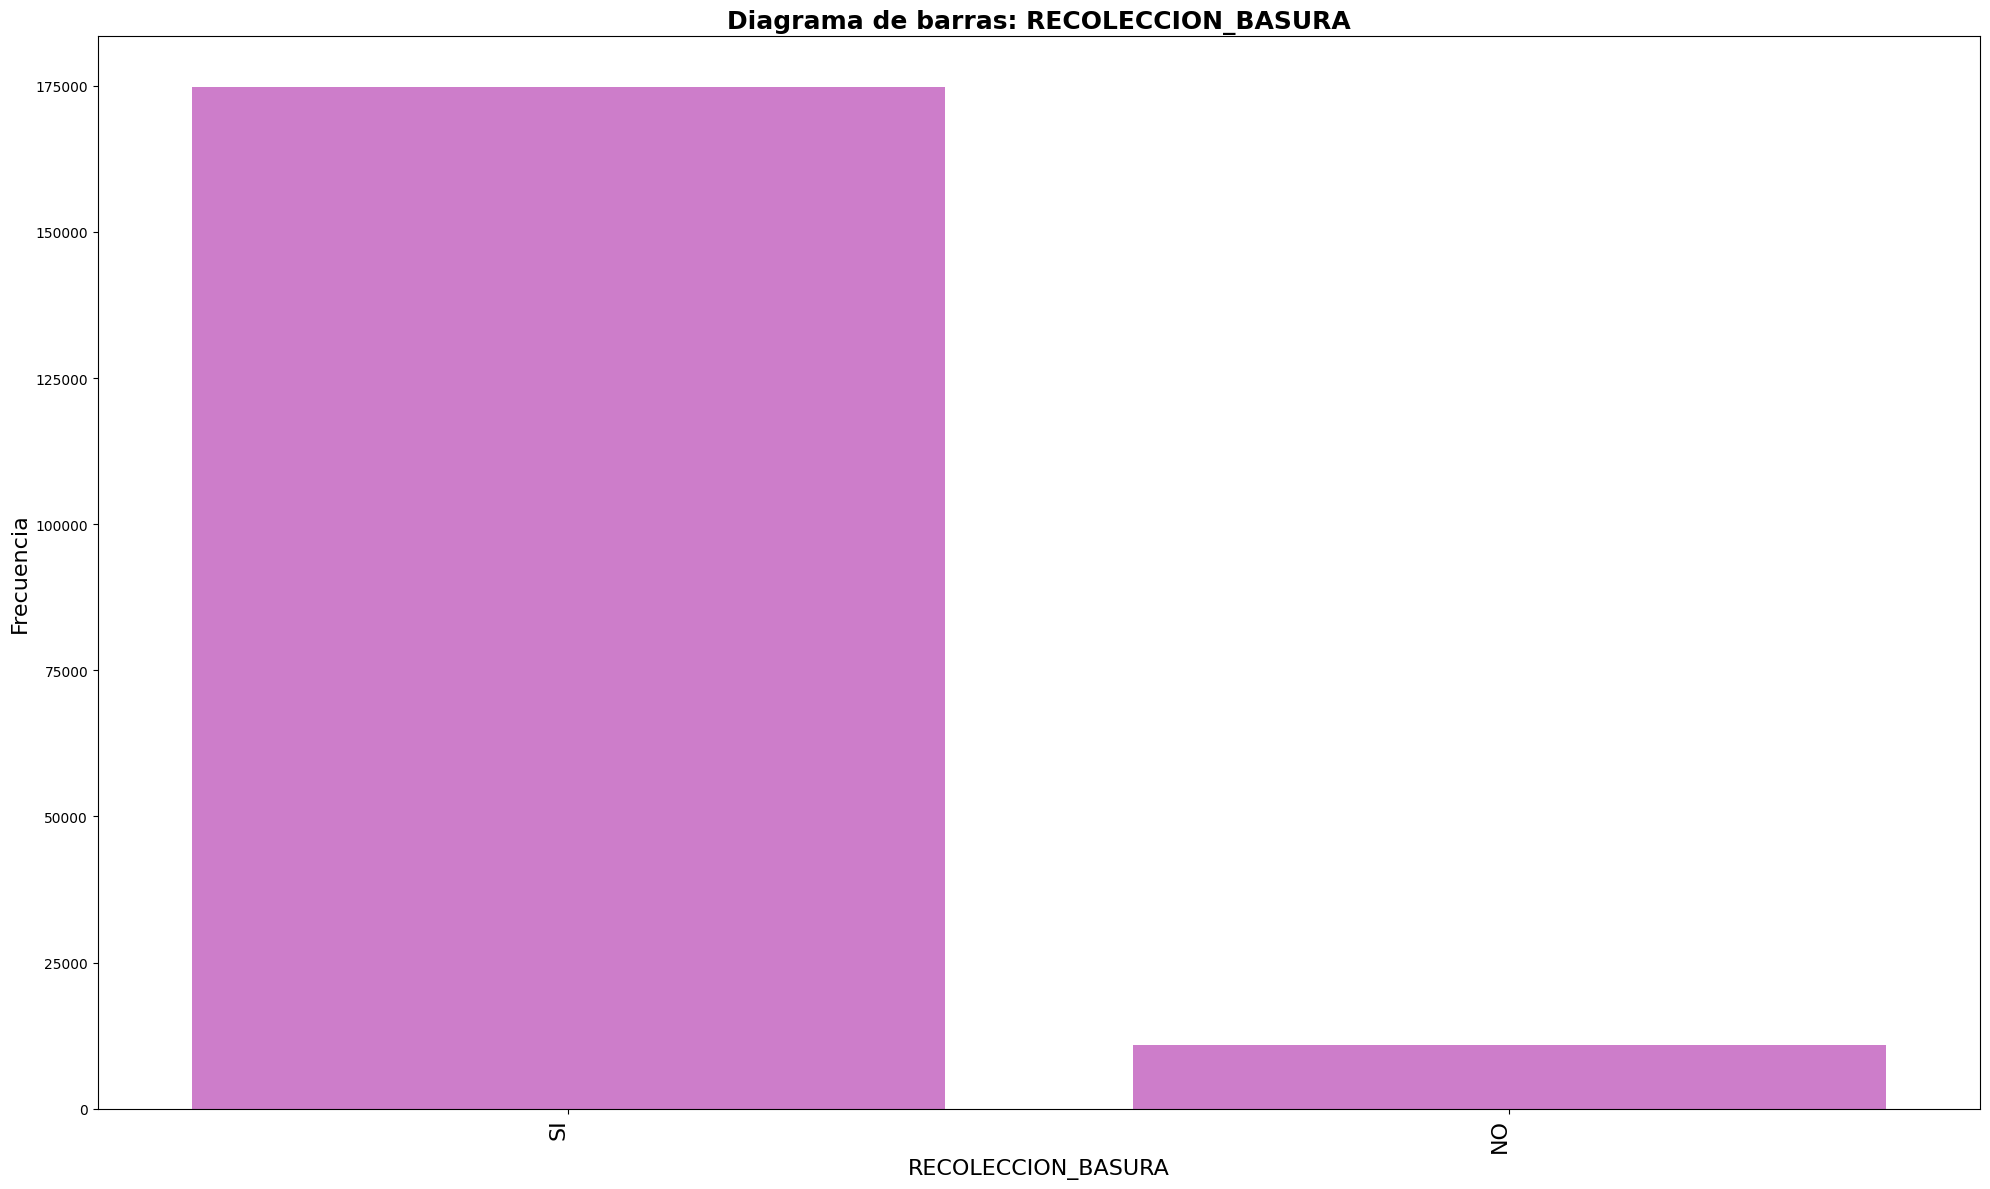

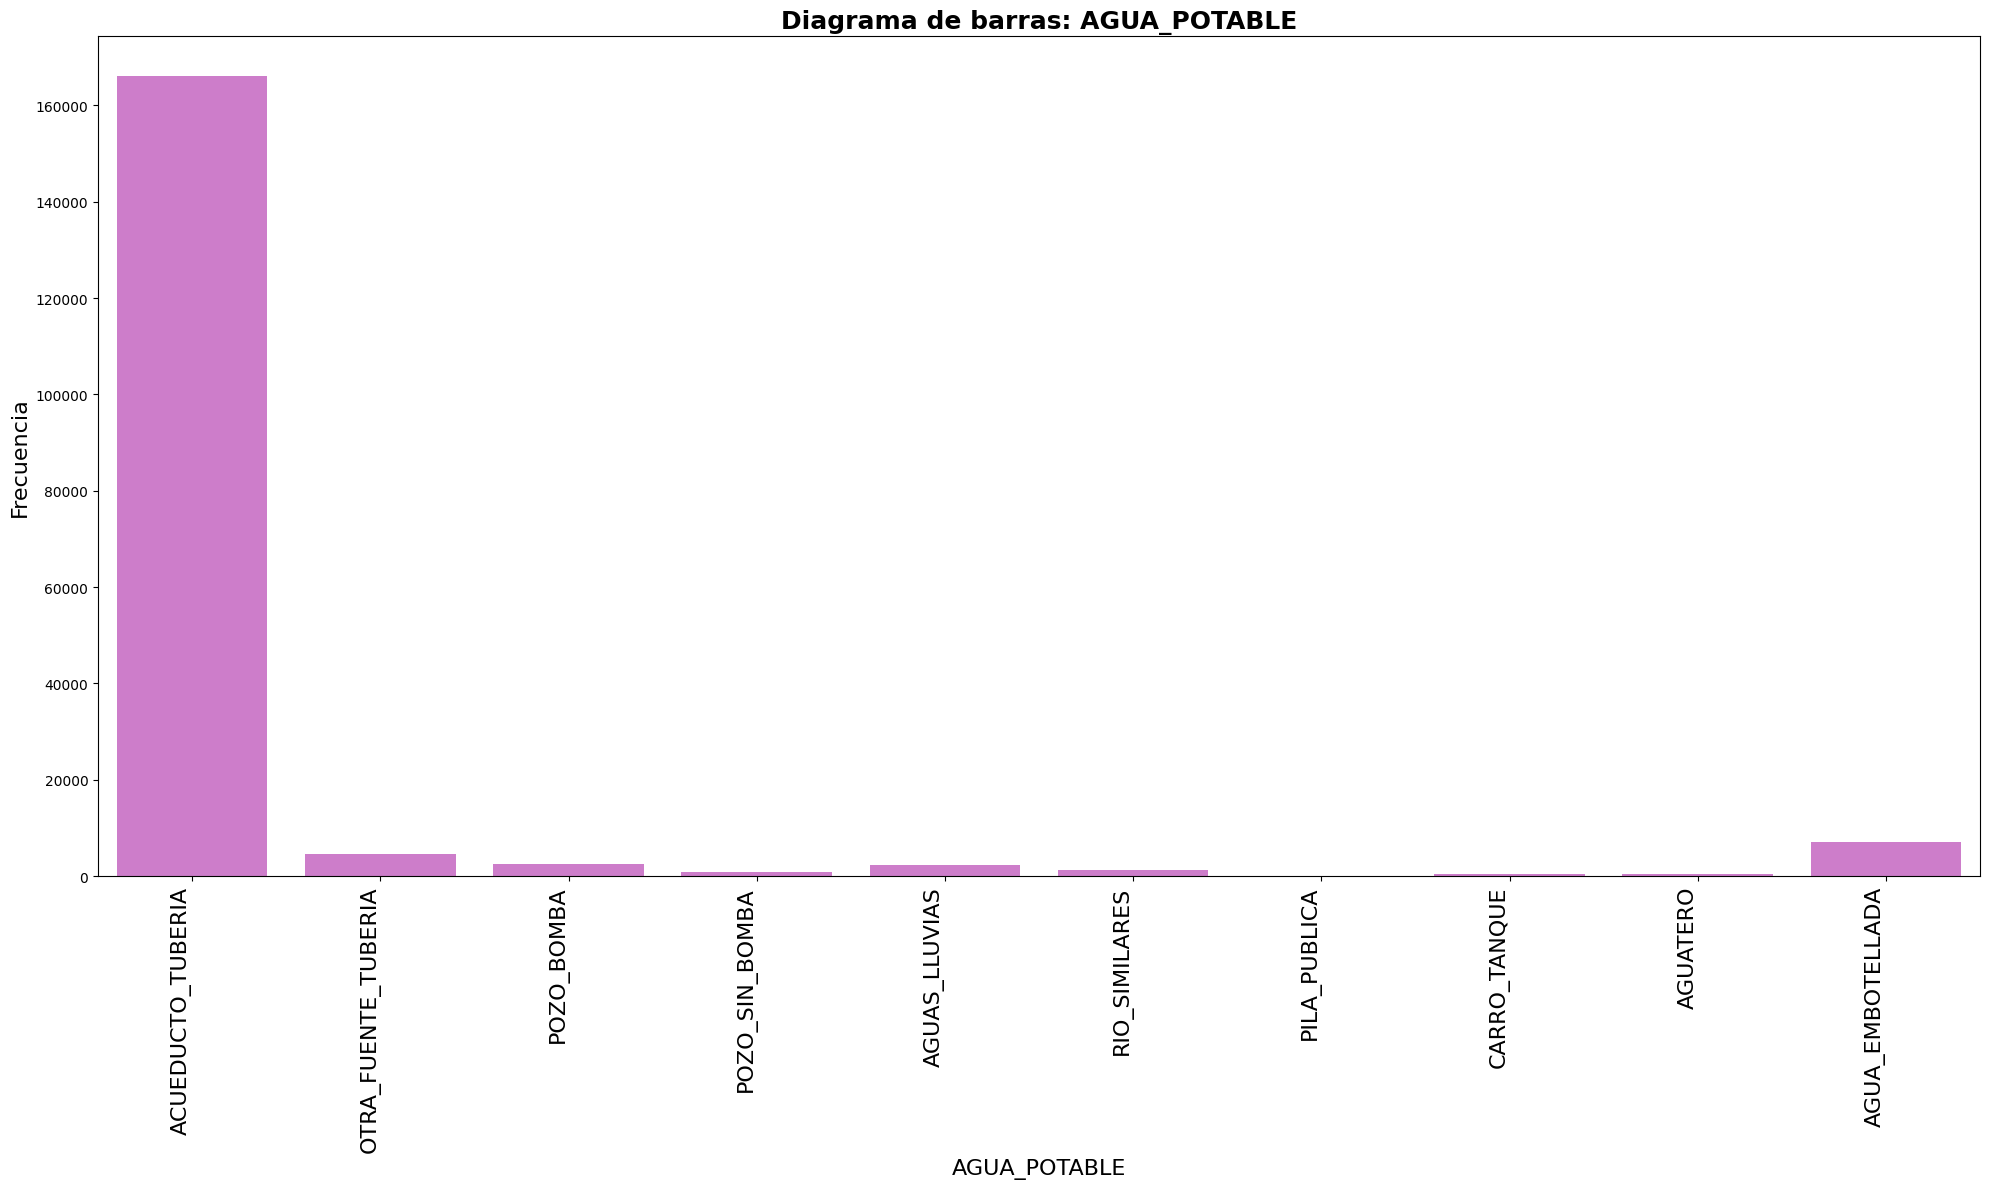

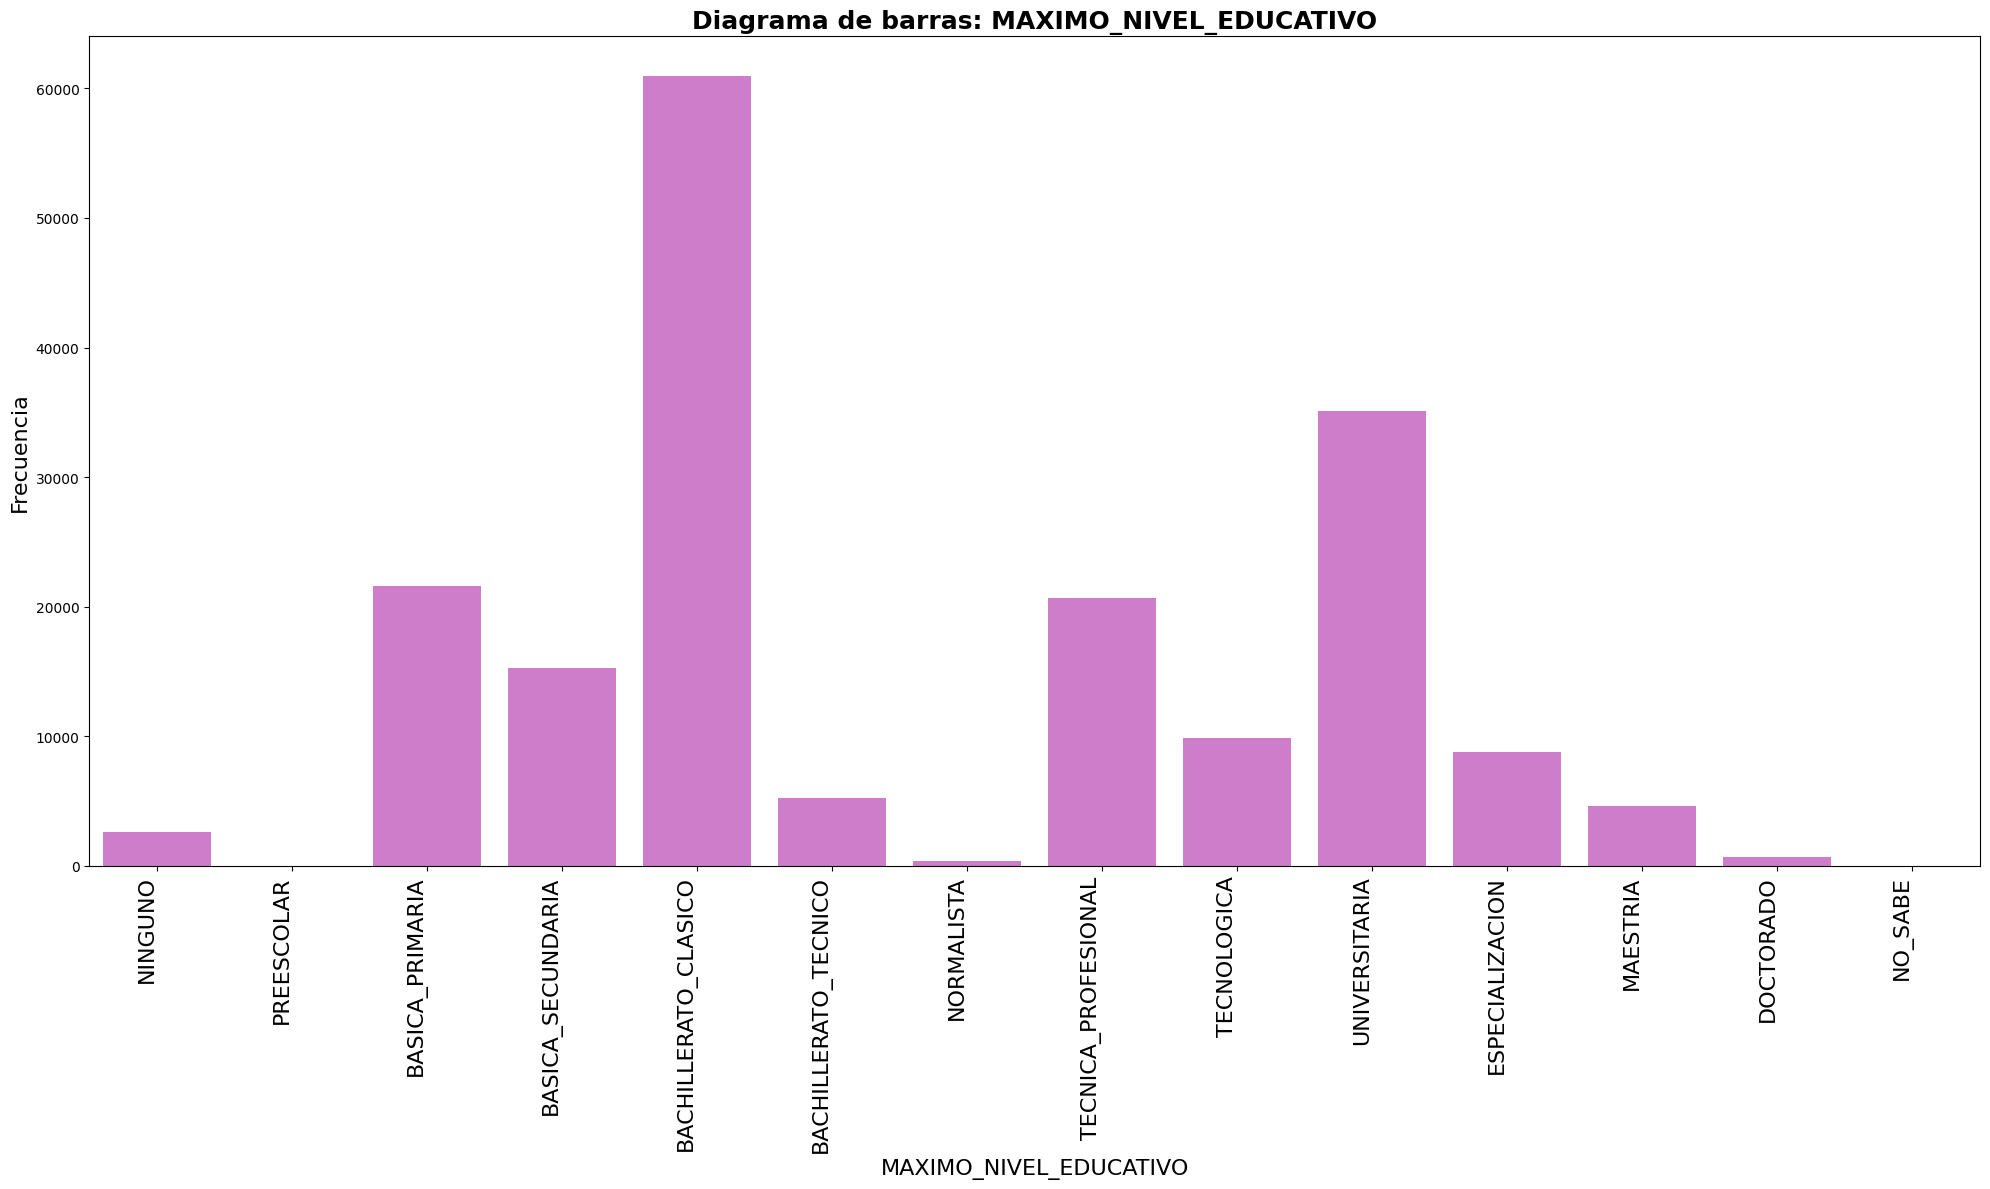

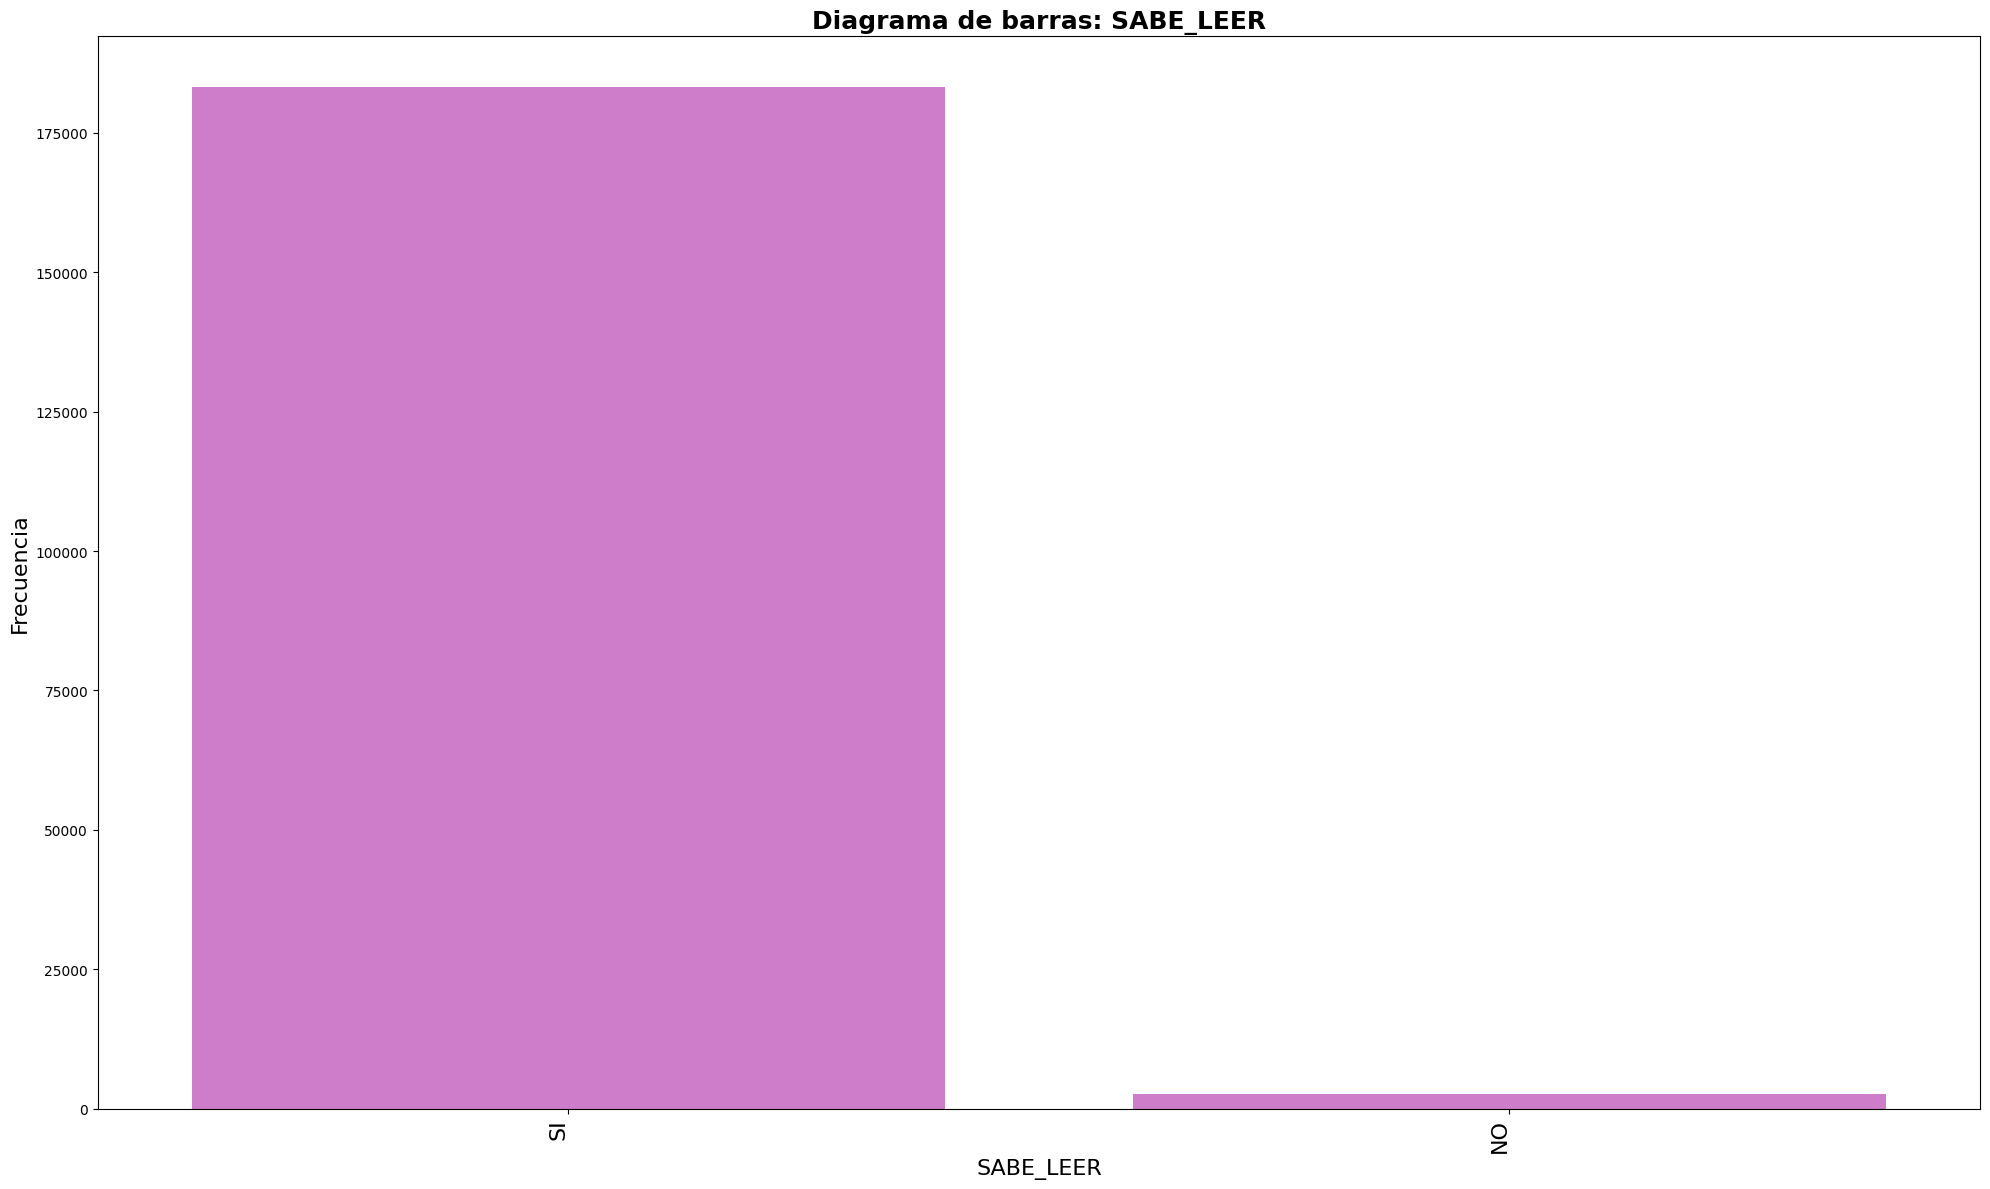

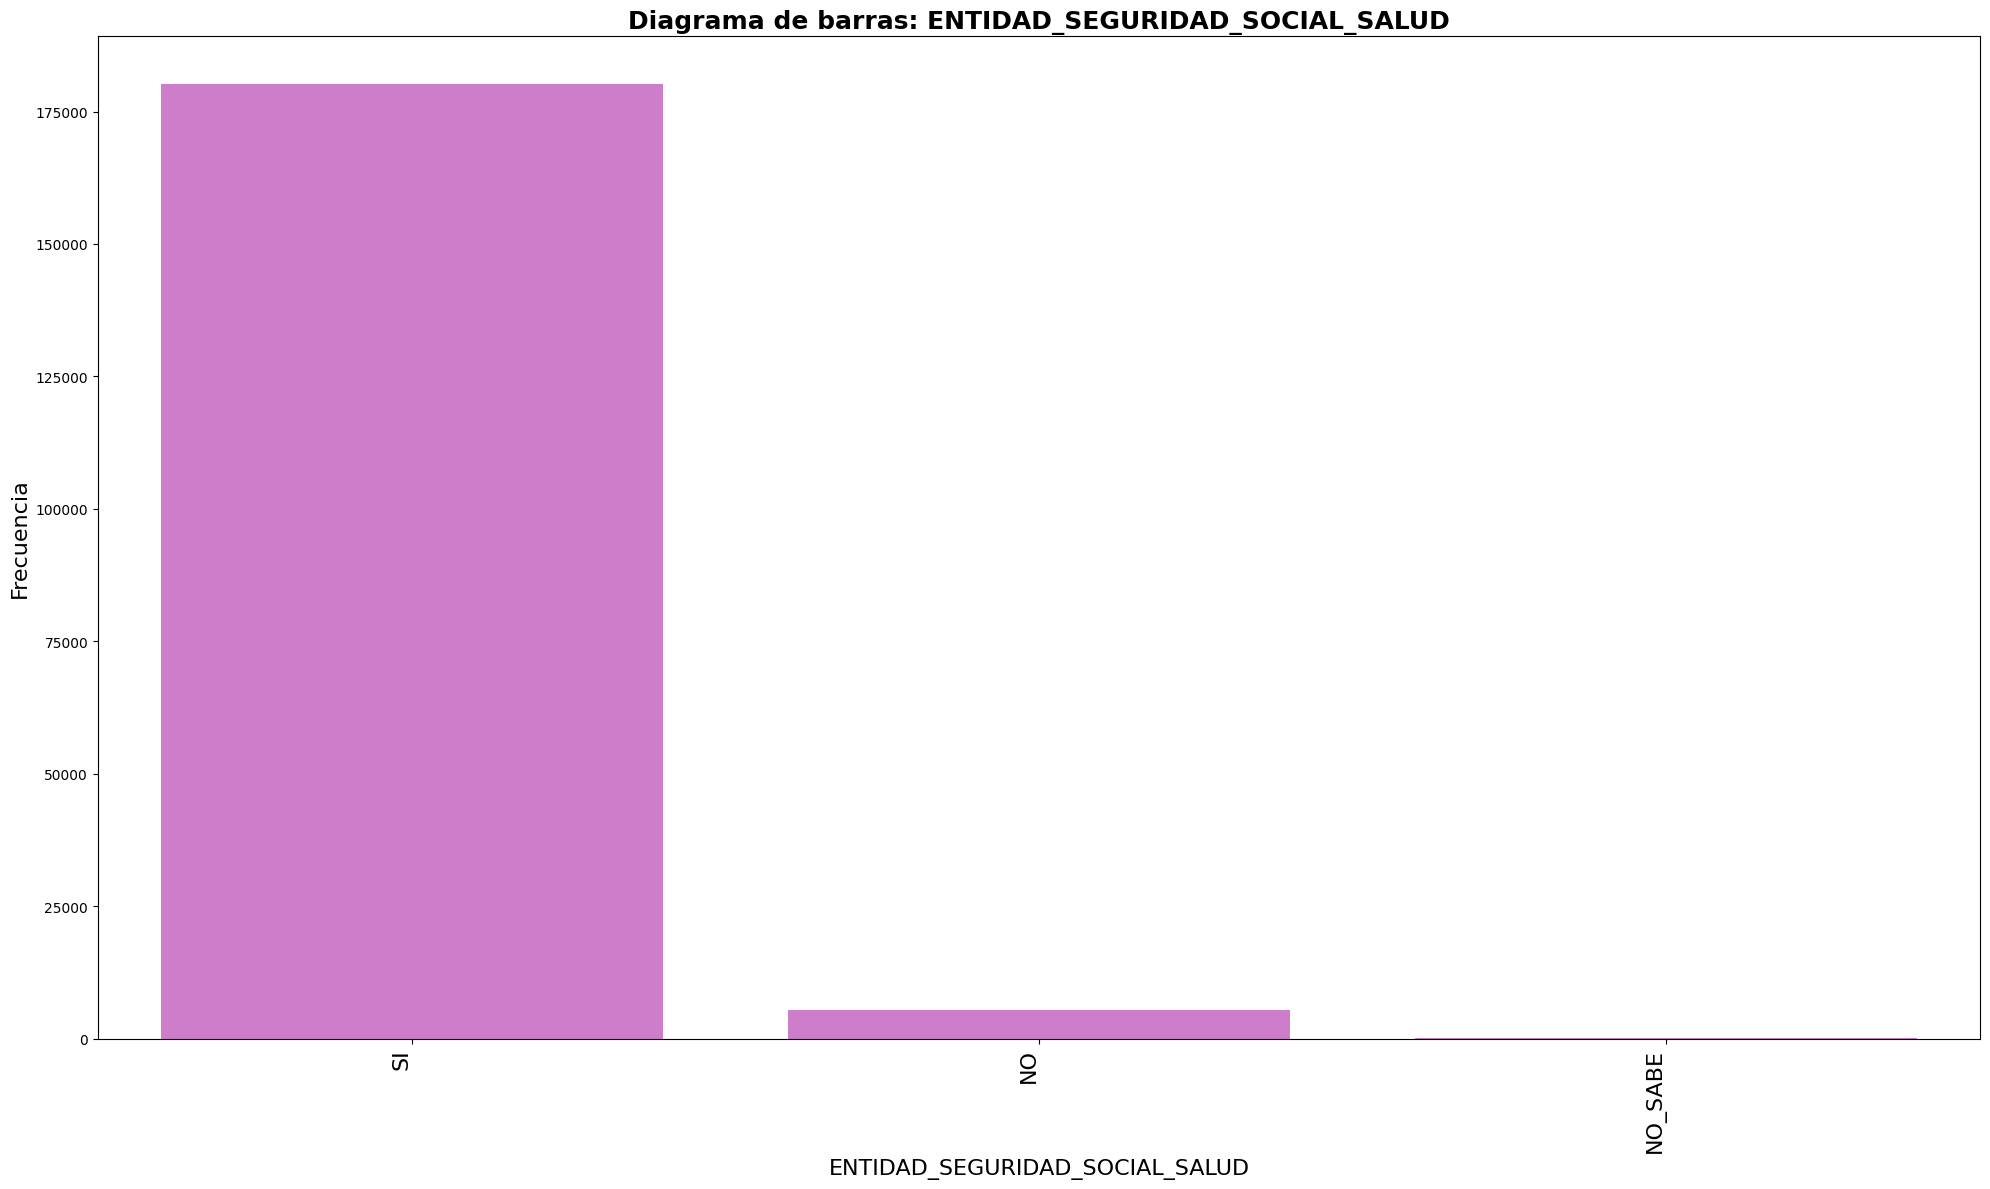

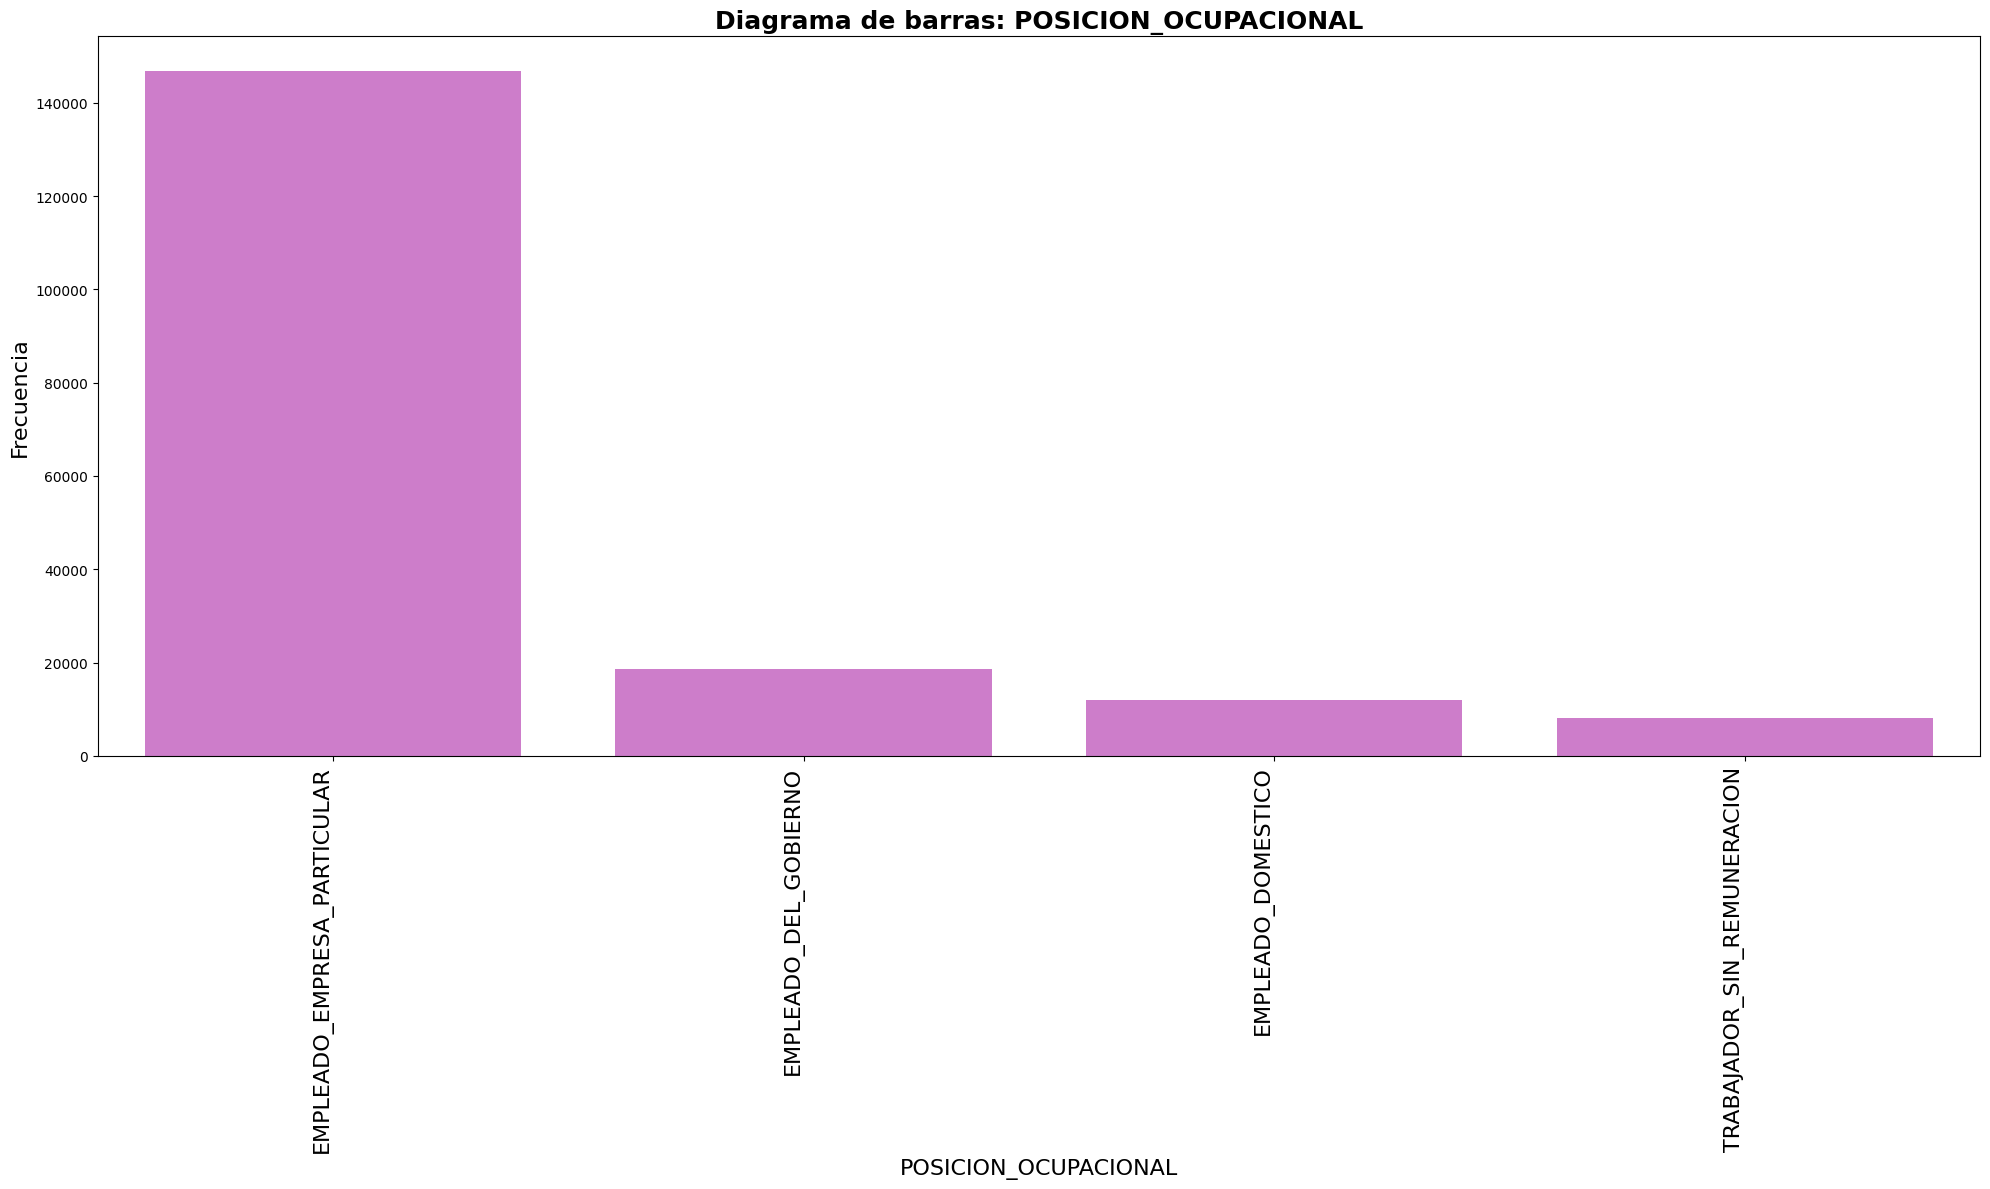

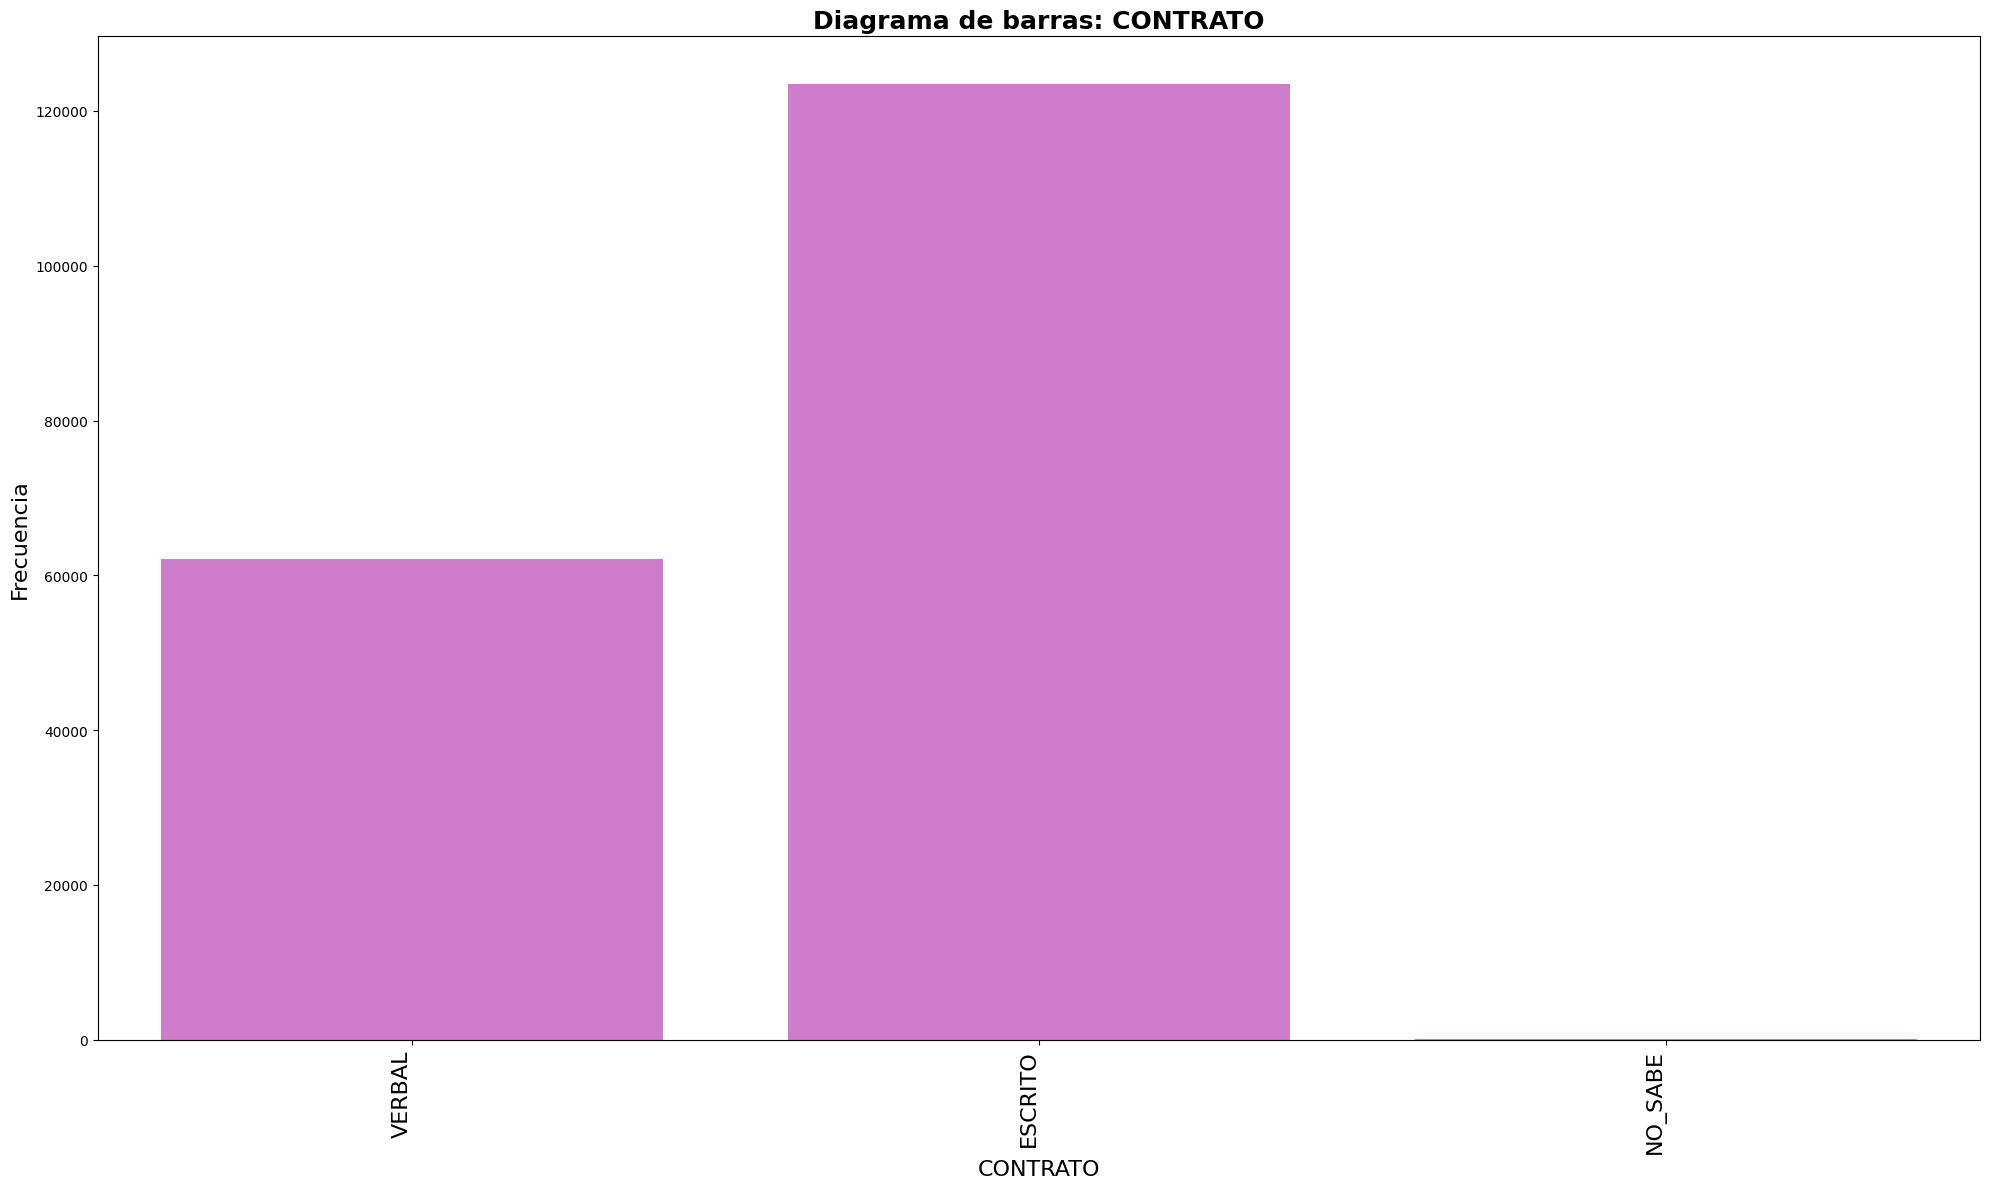

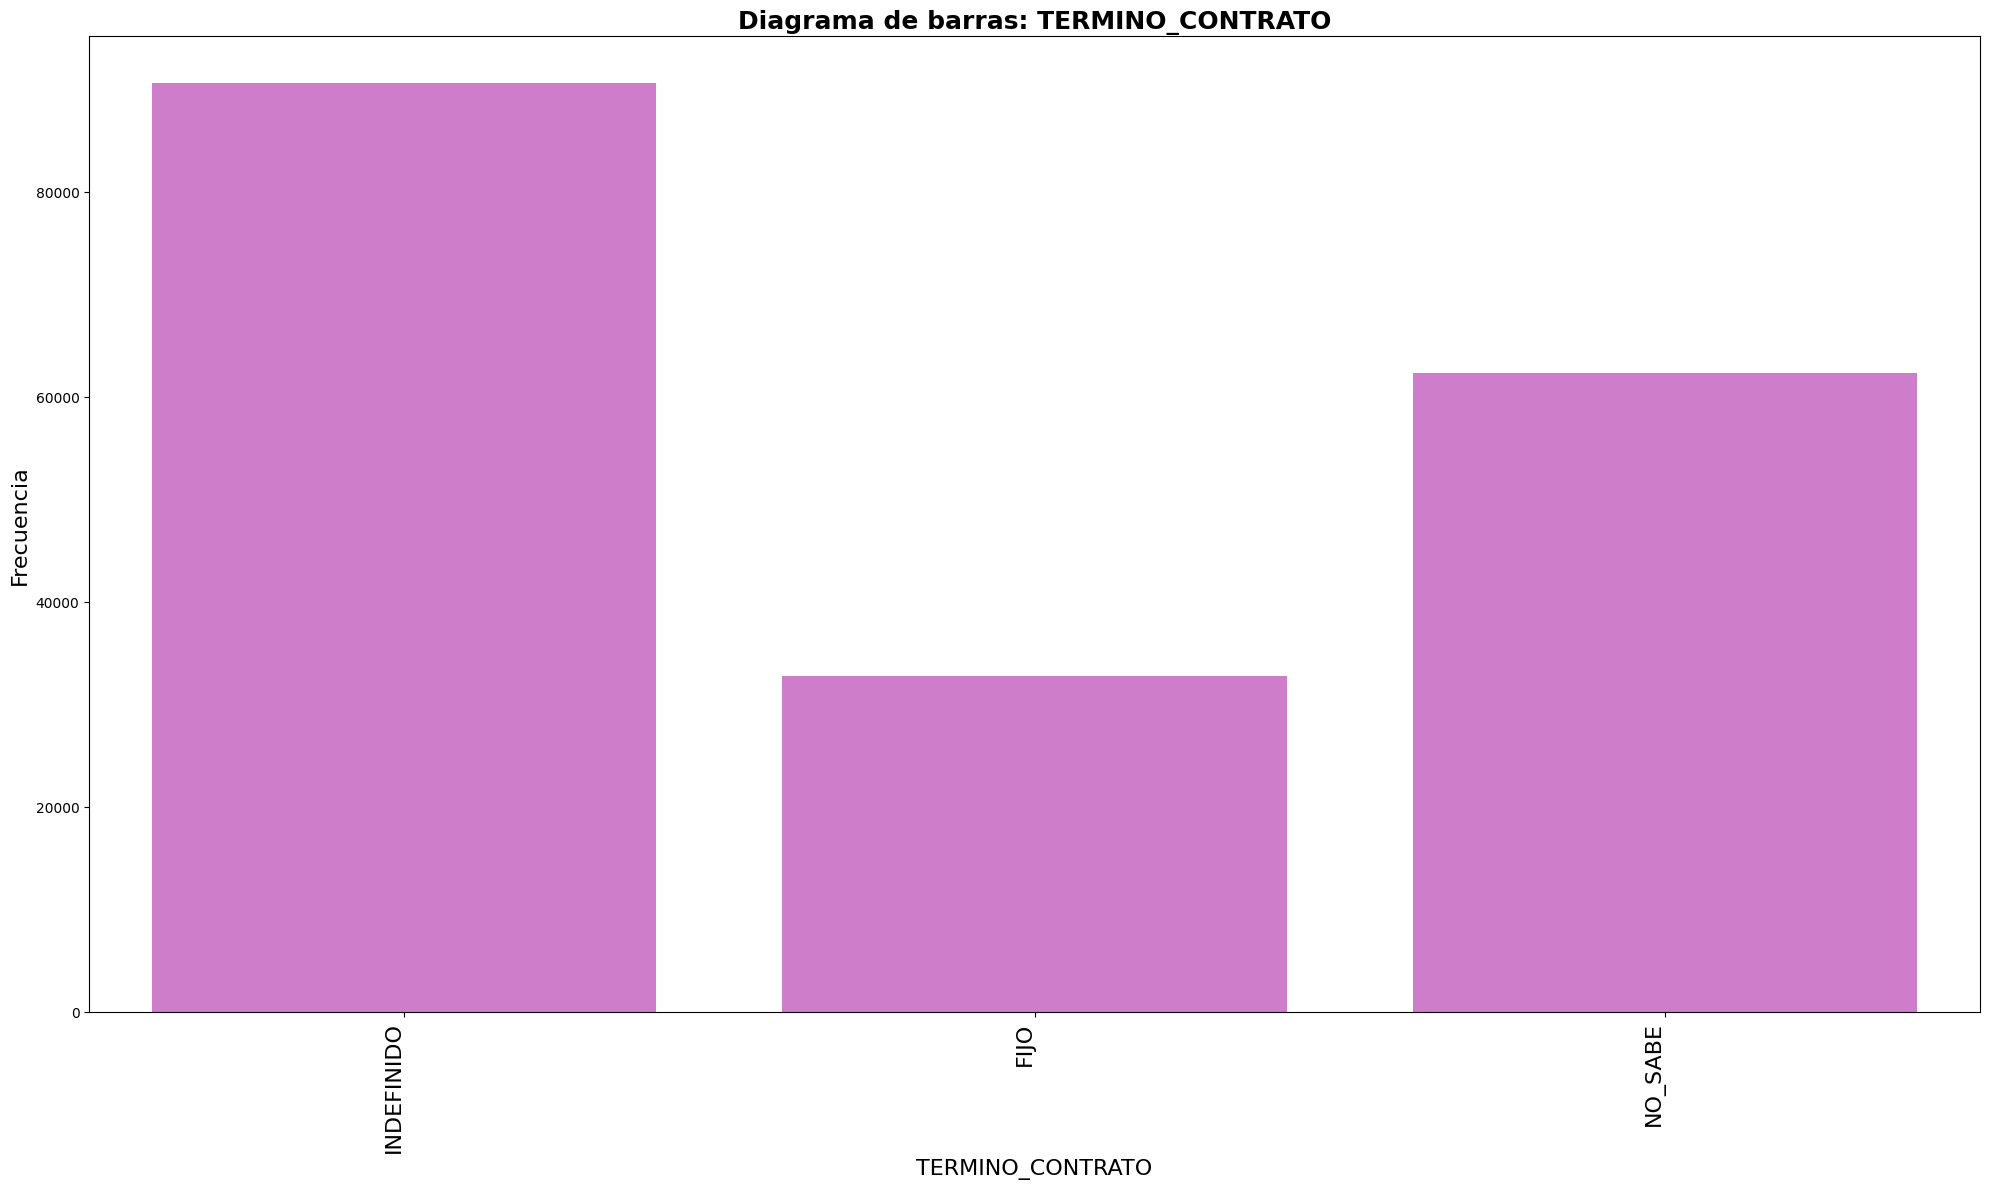

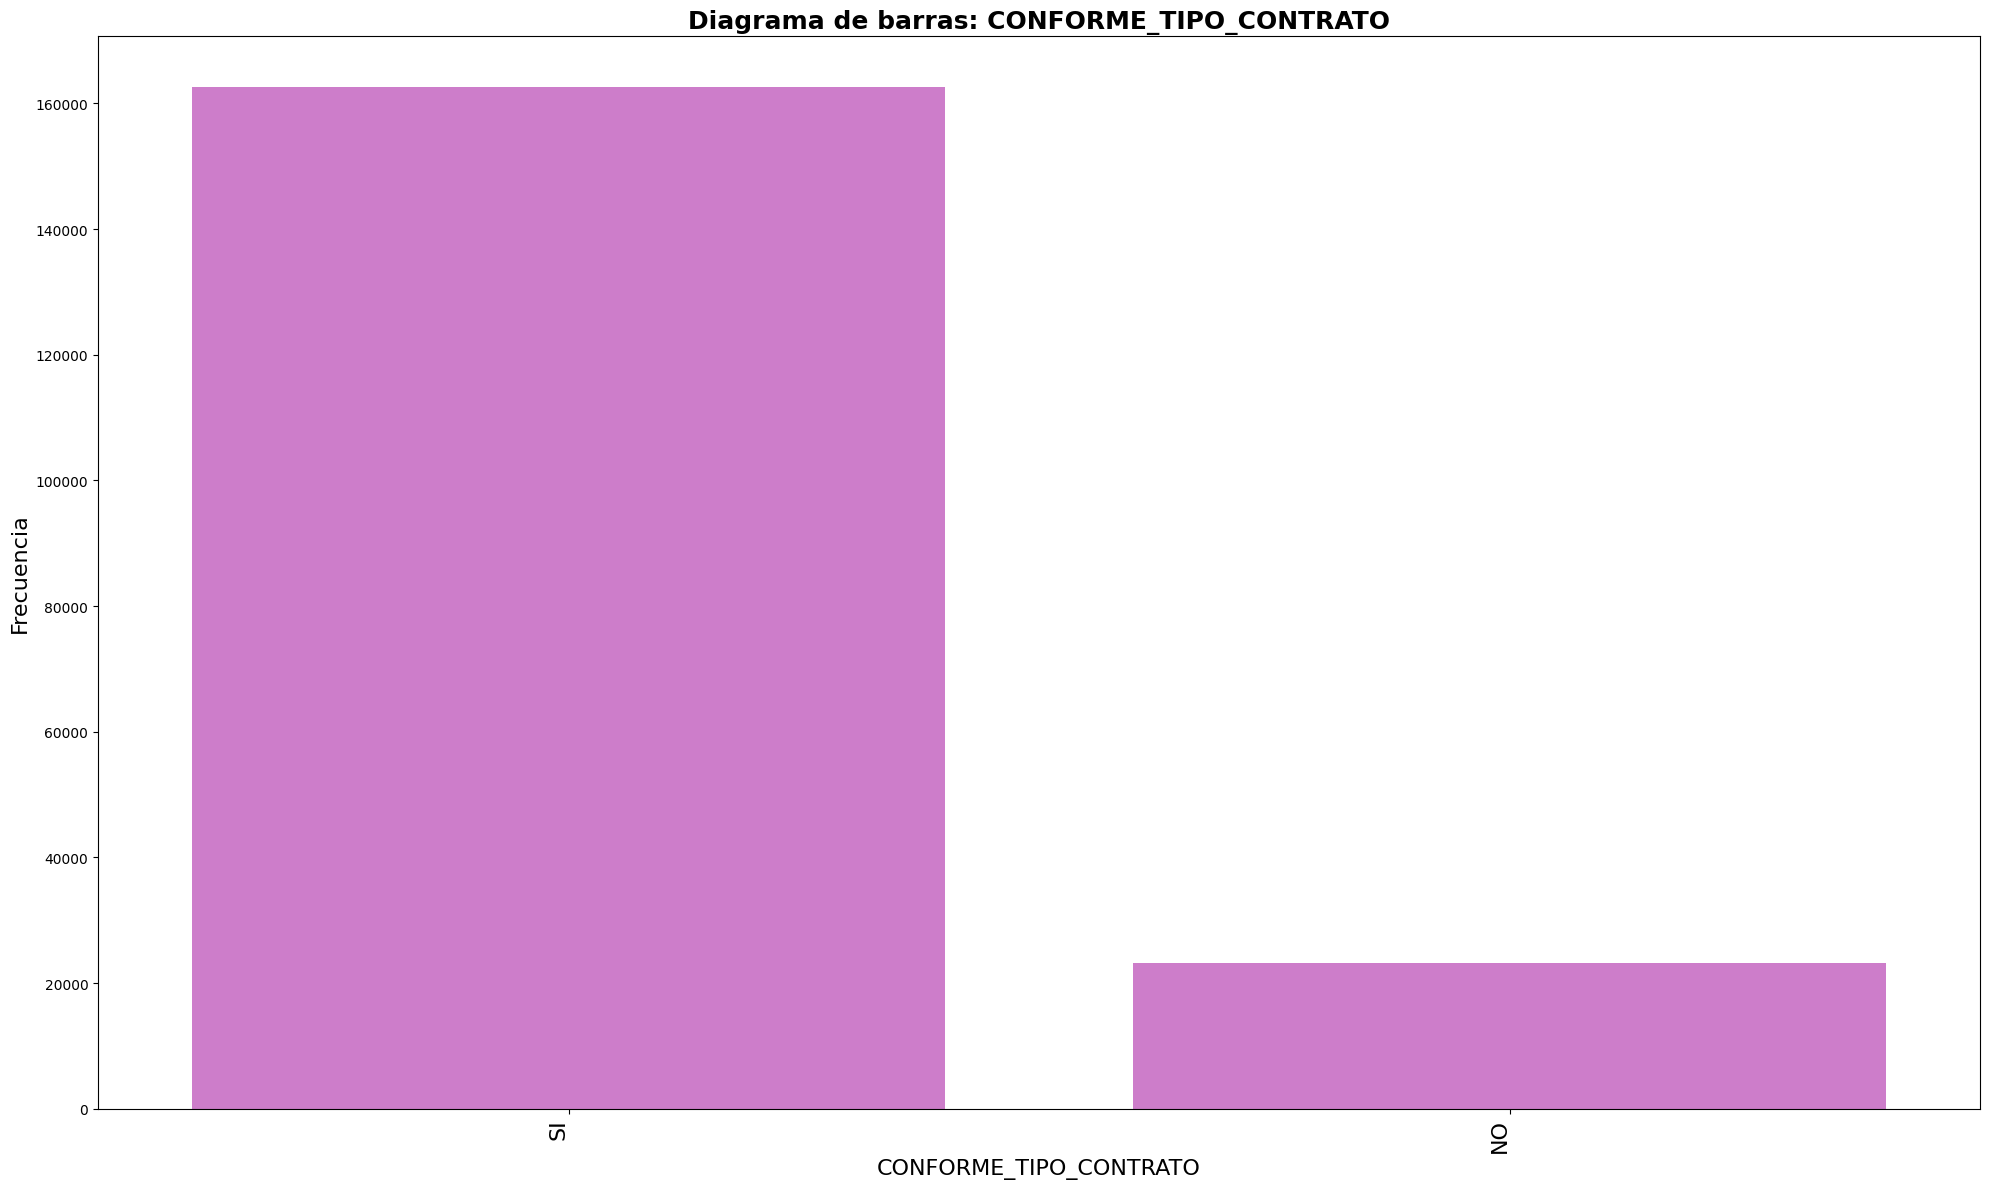

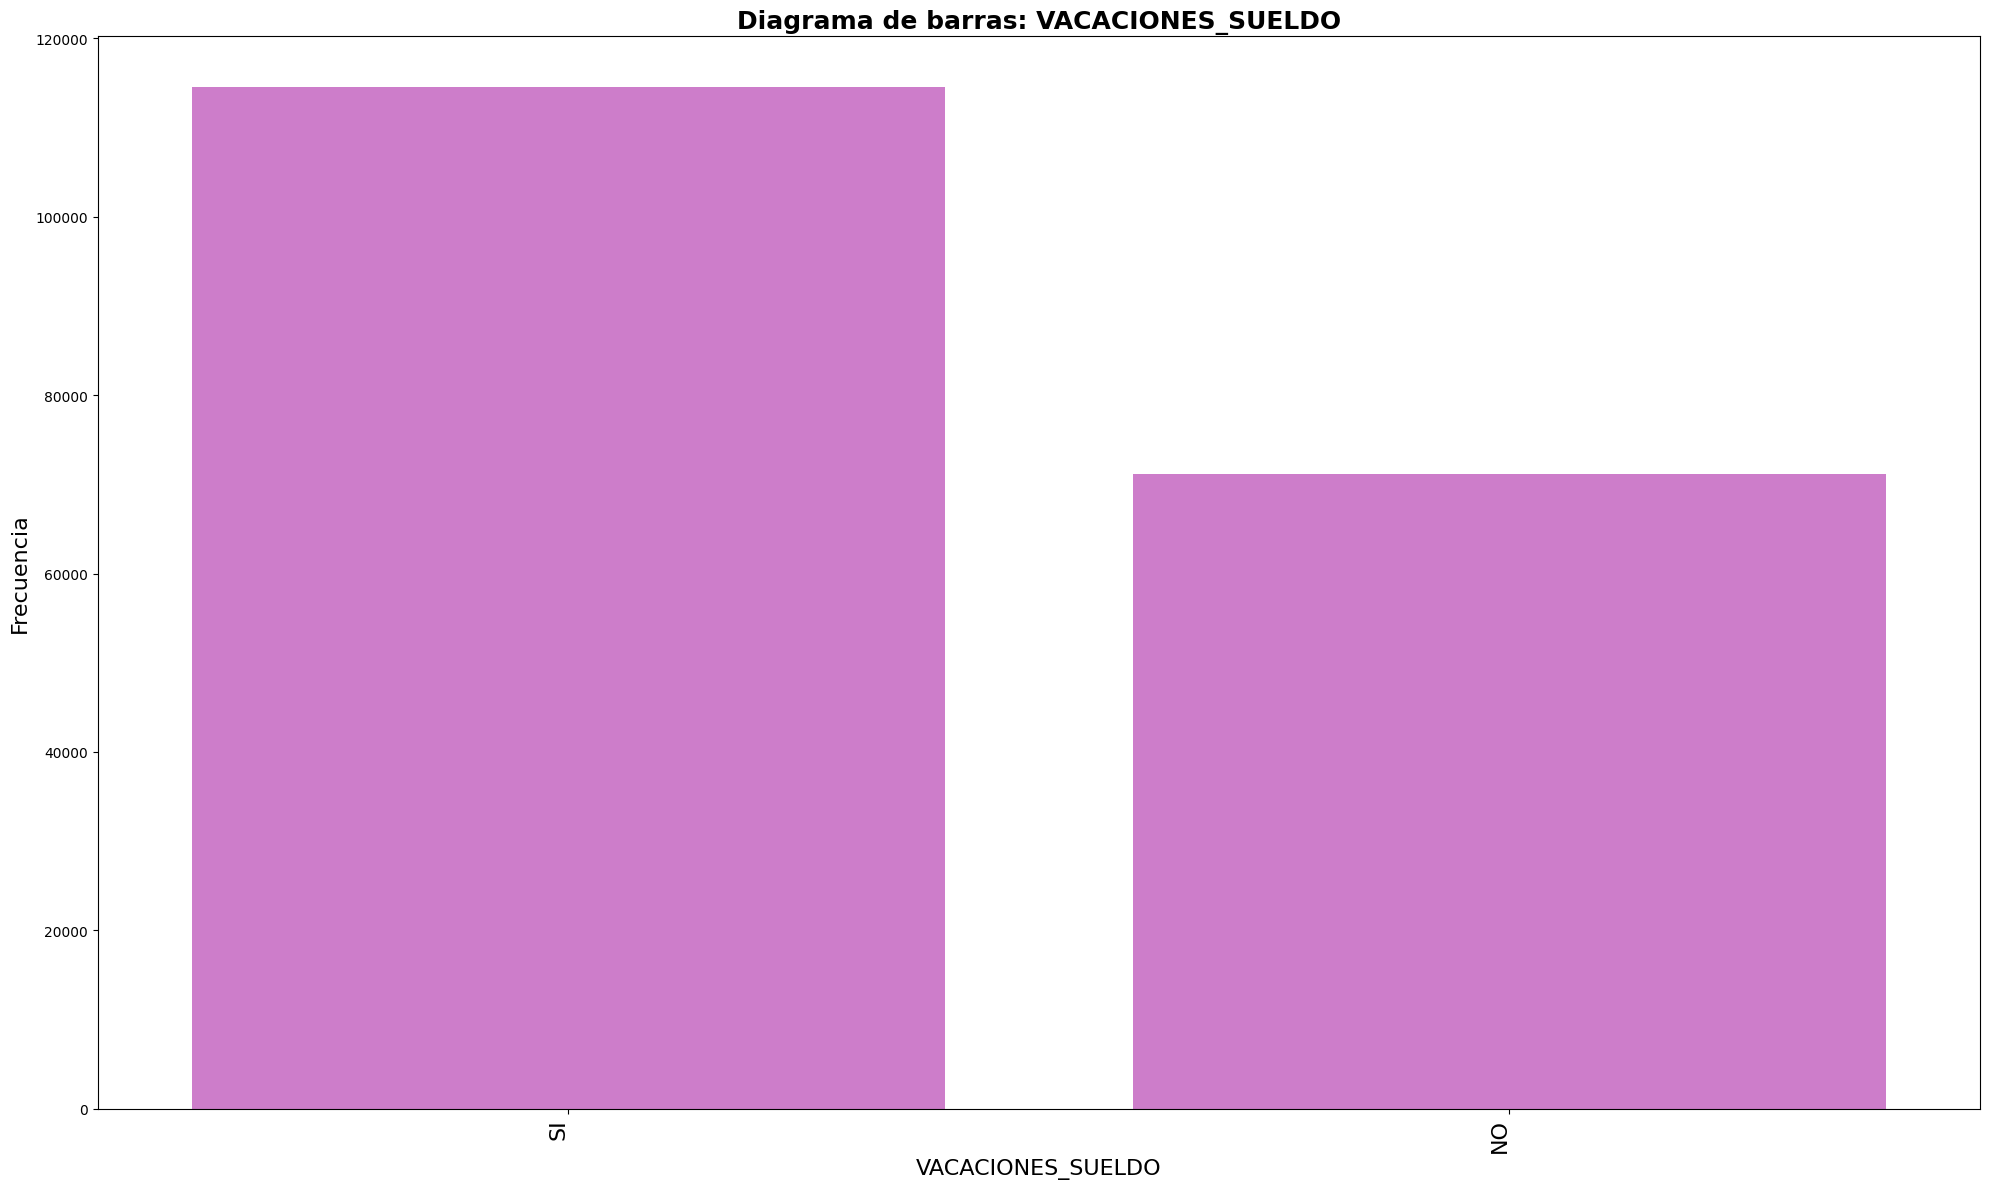

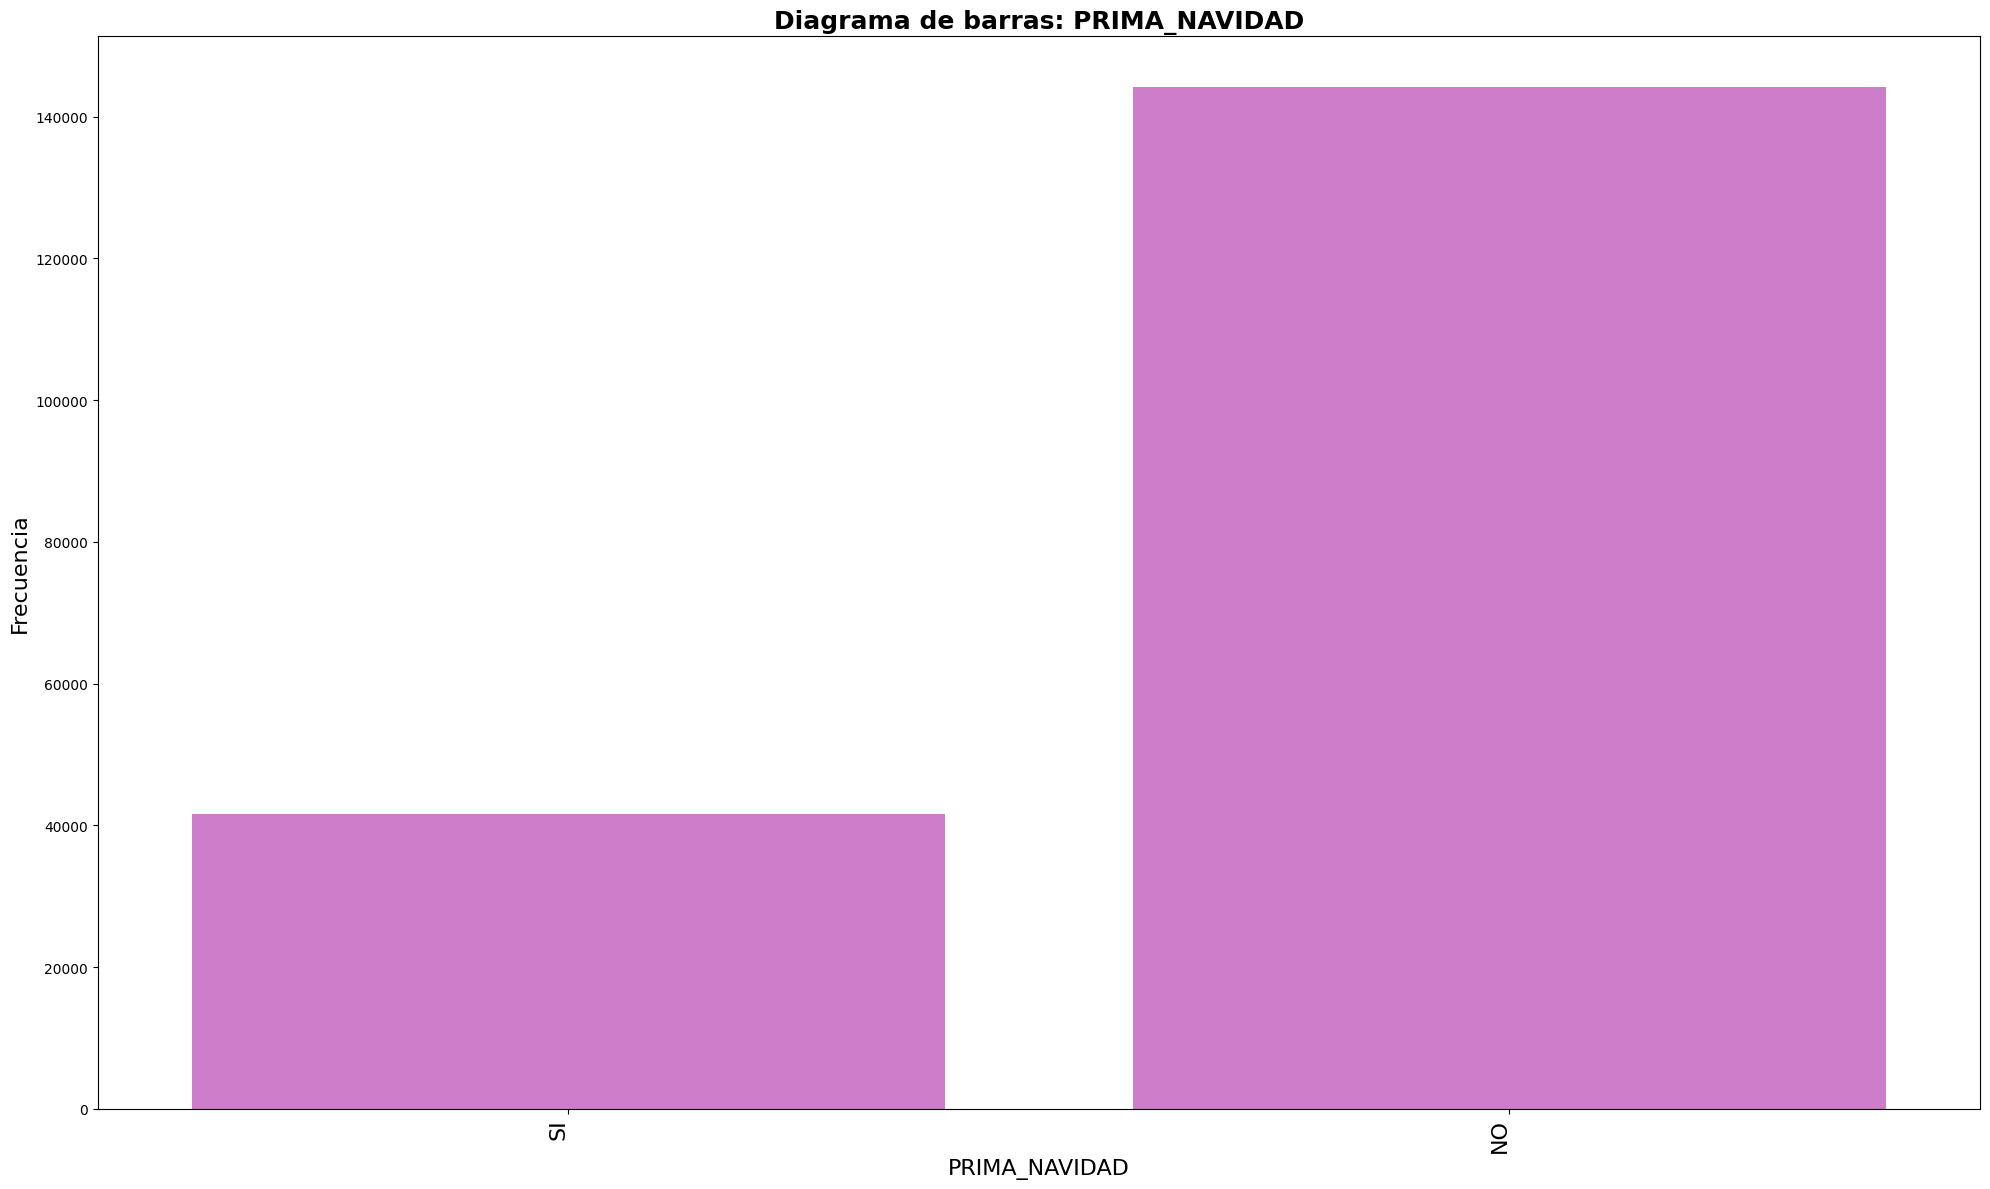

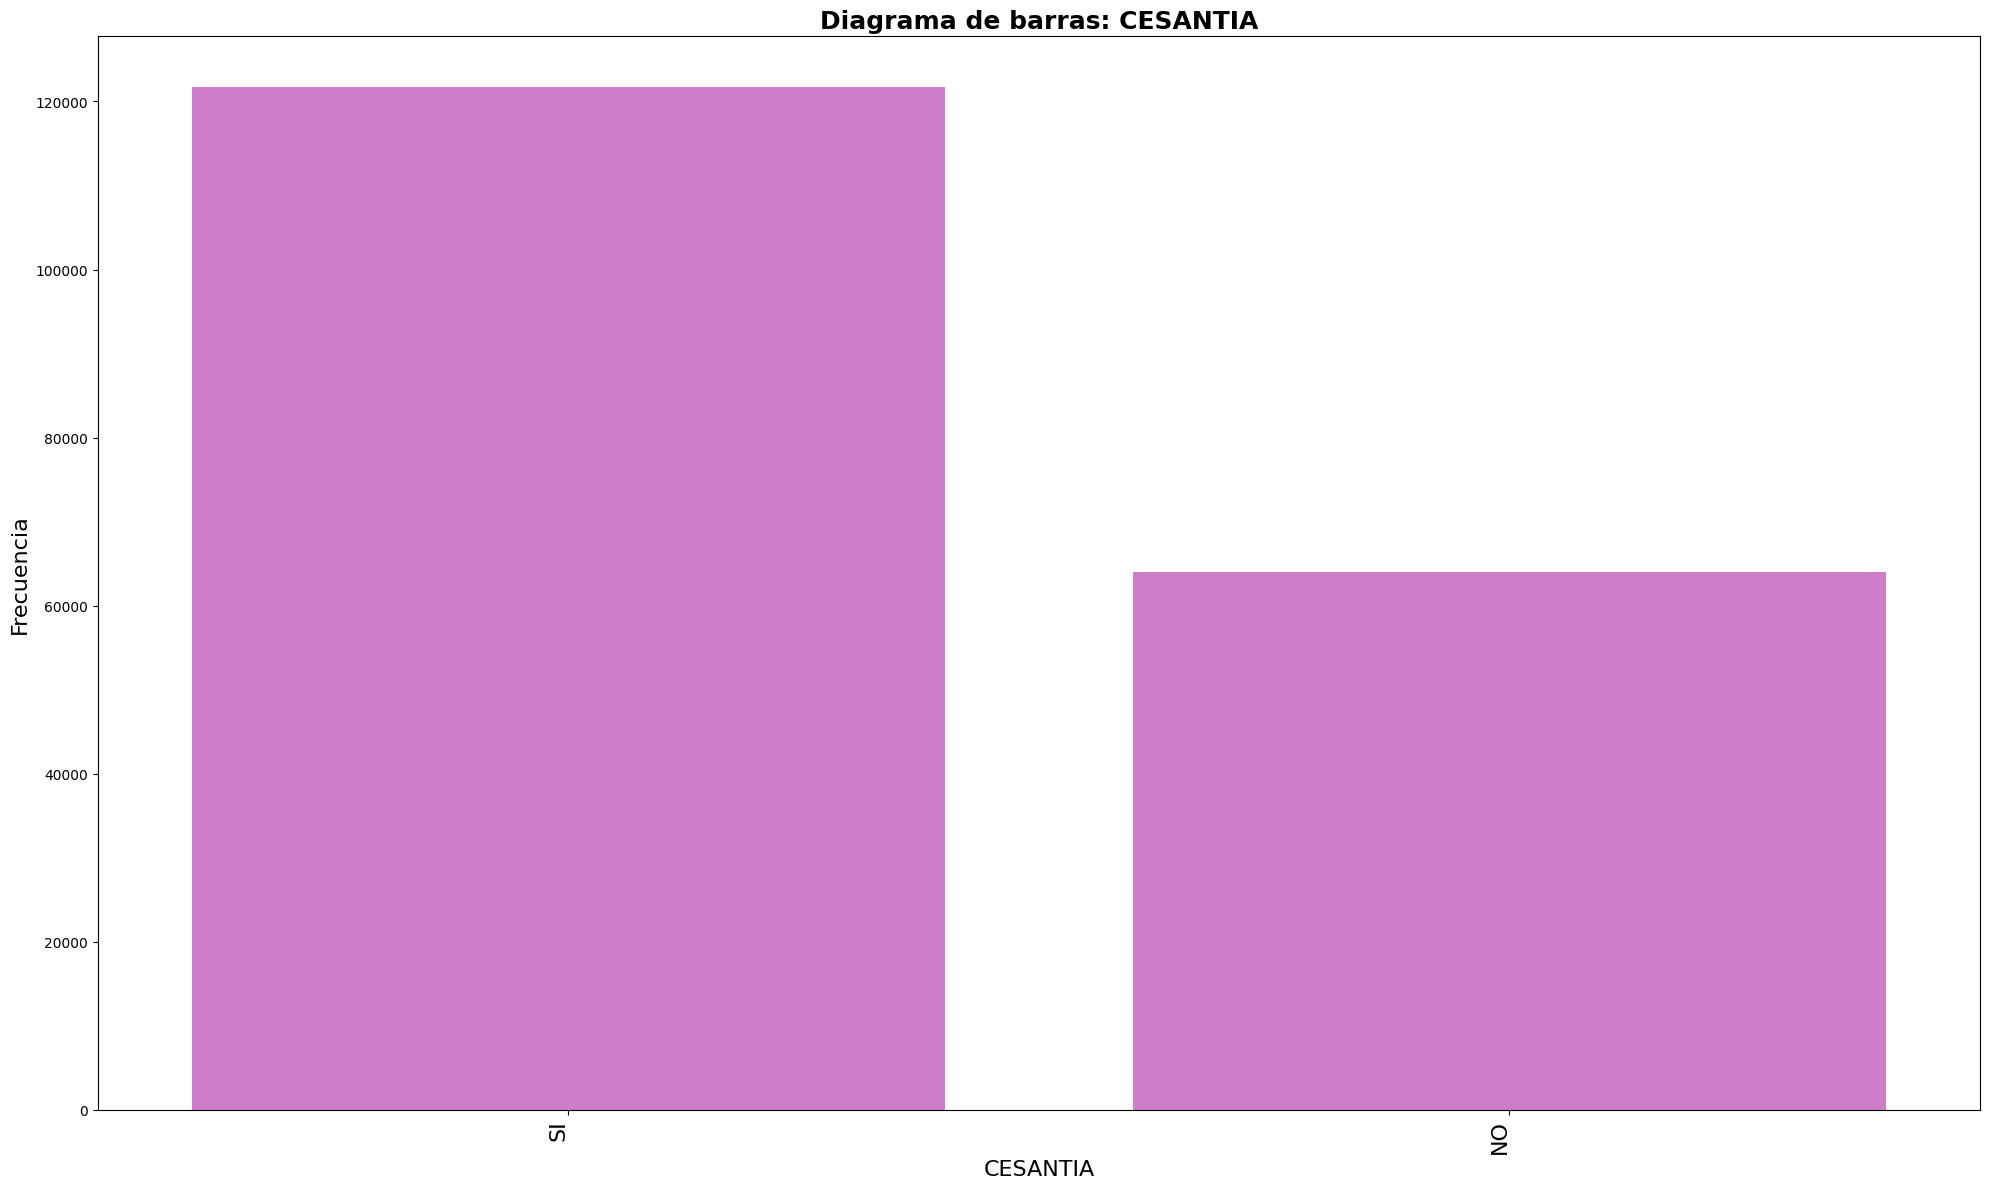

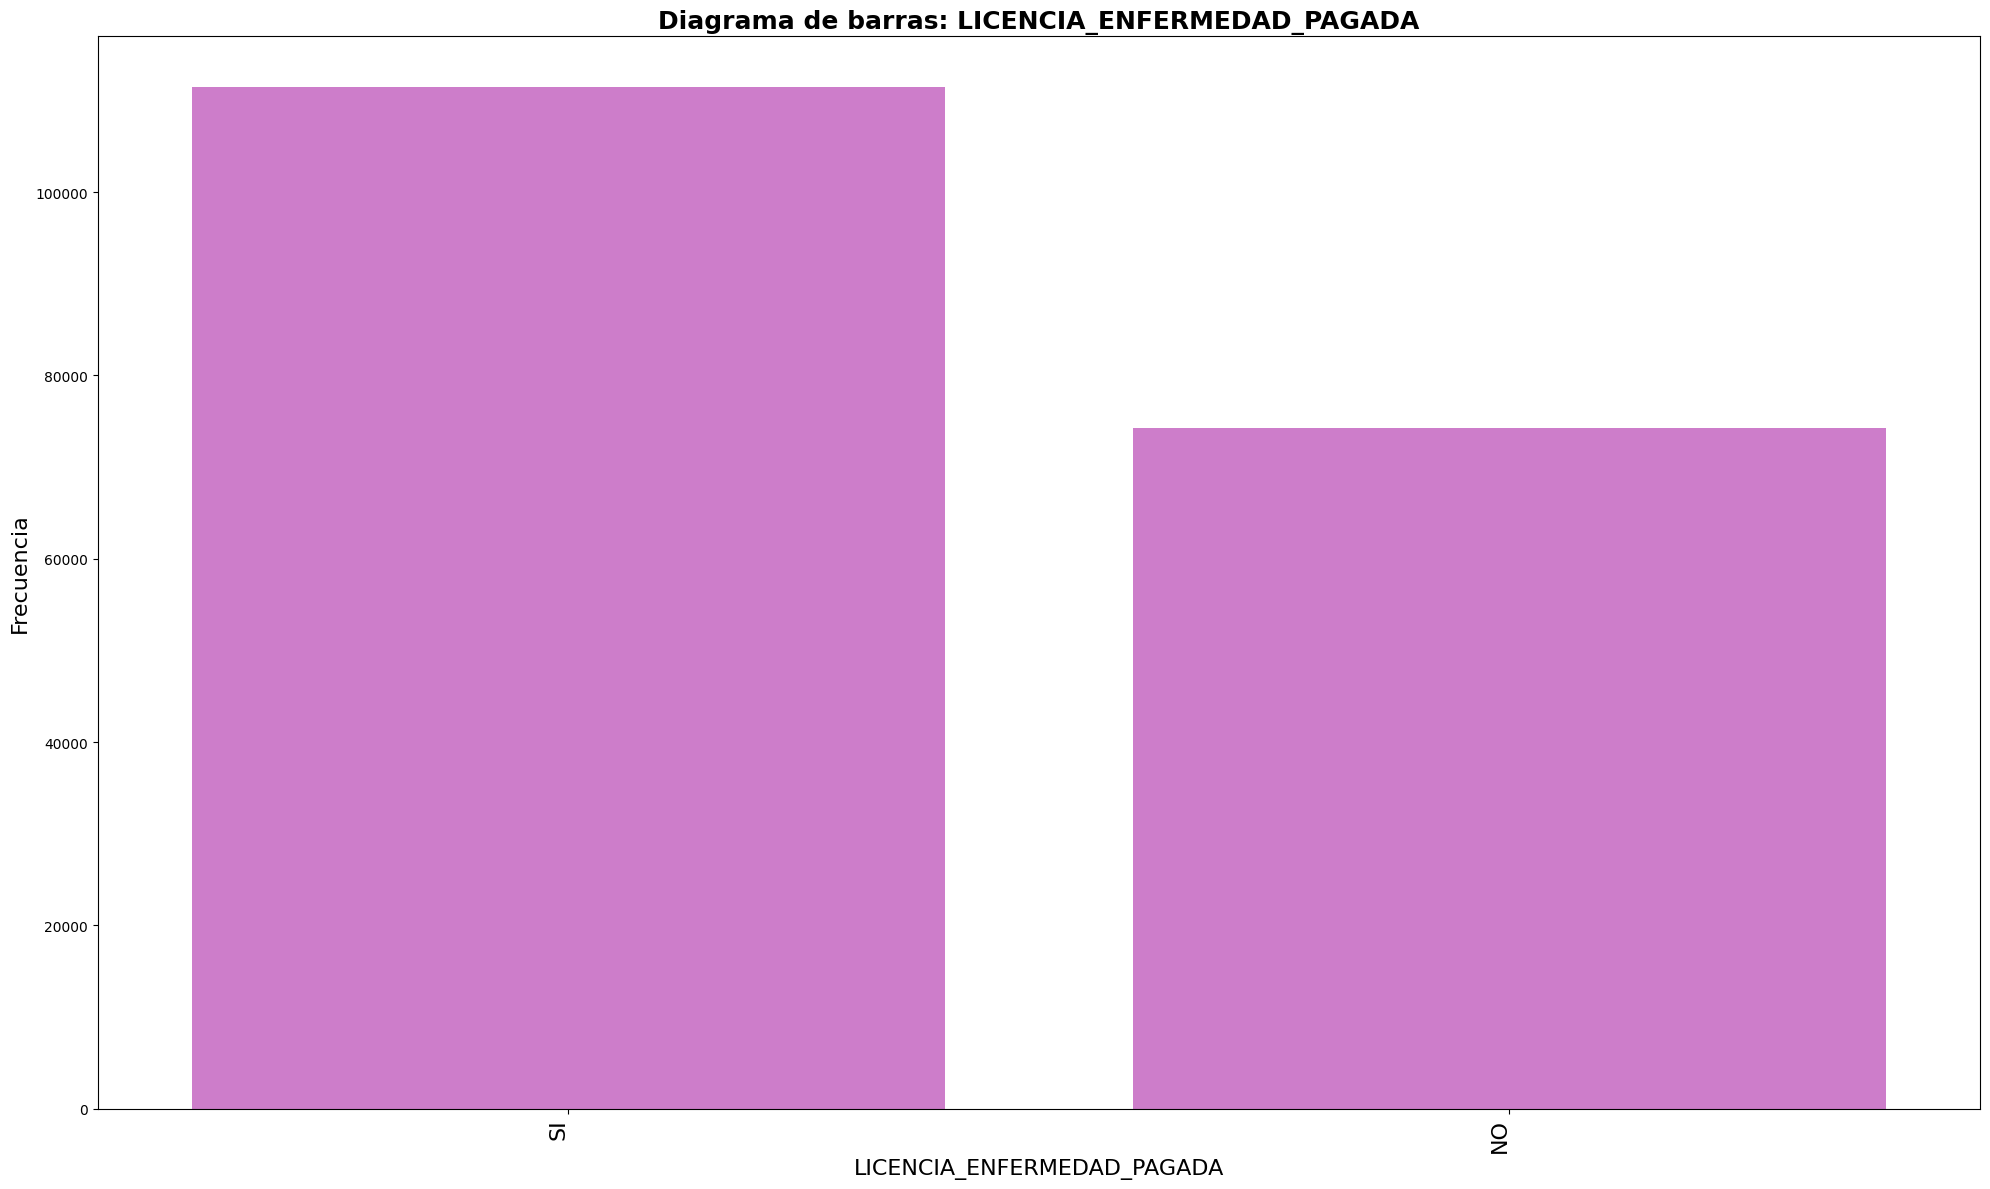

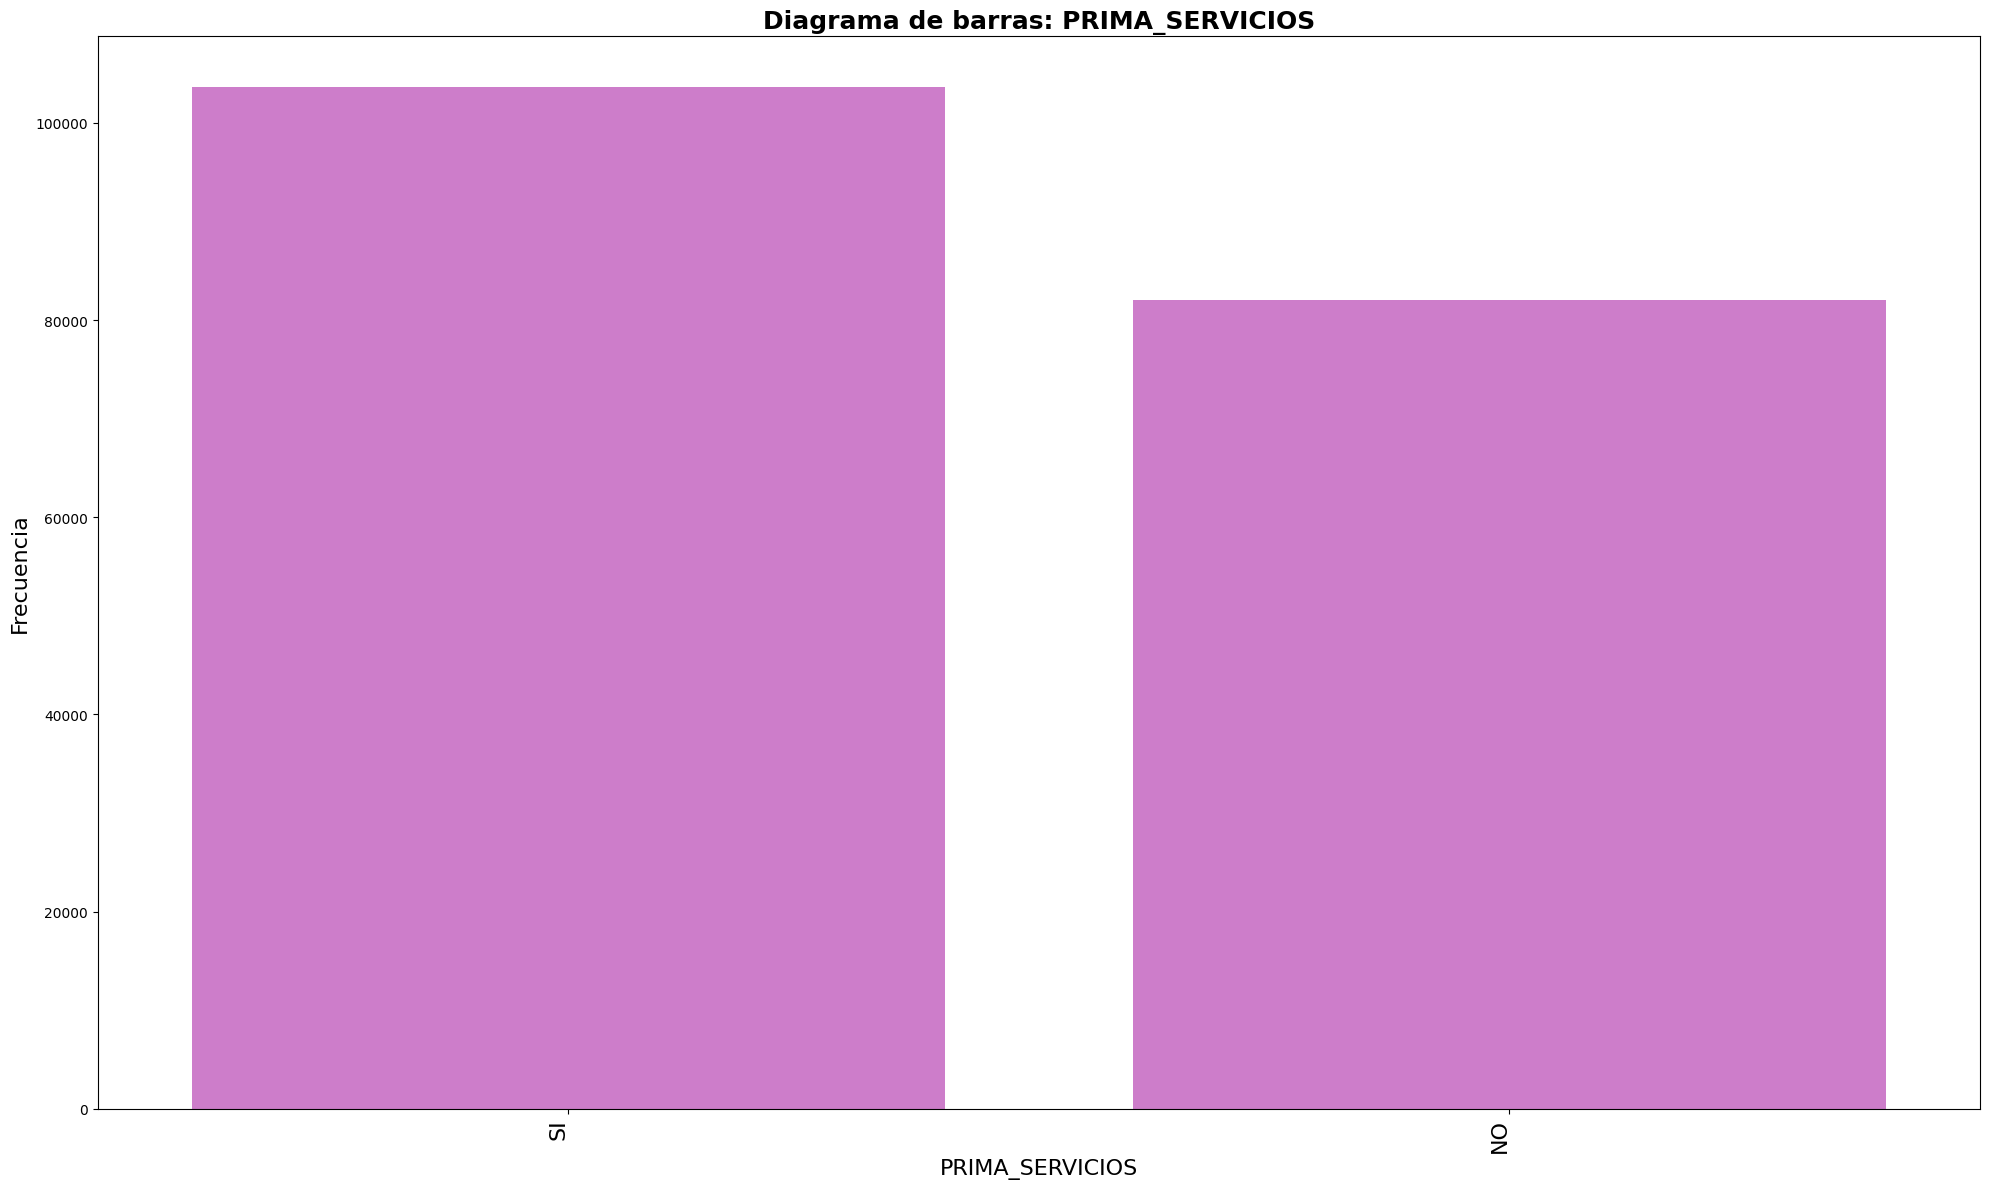

C:\Users\marim\AppData\Local\Temp\ipykernel_6584\3499303414.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


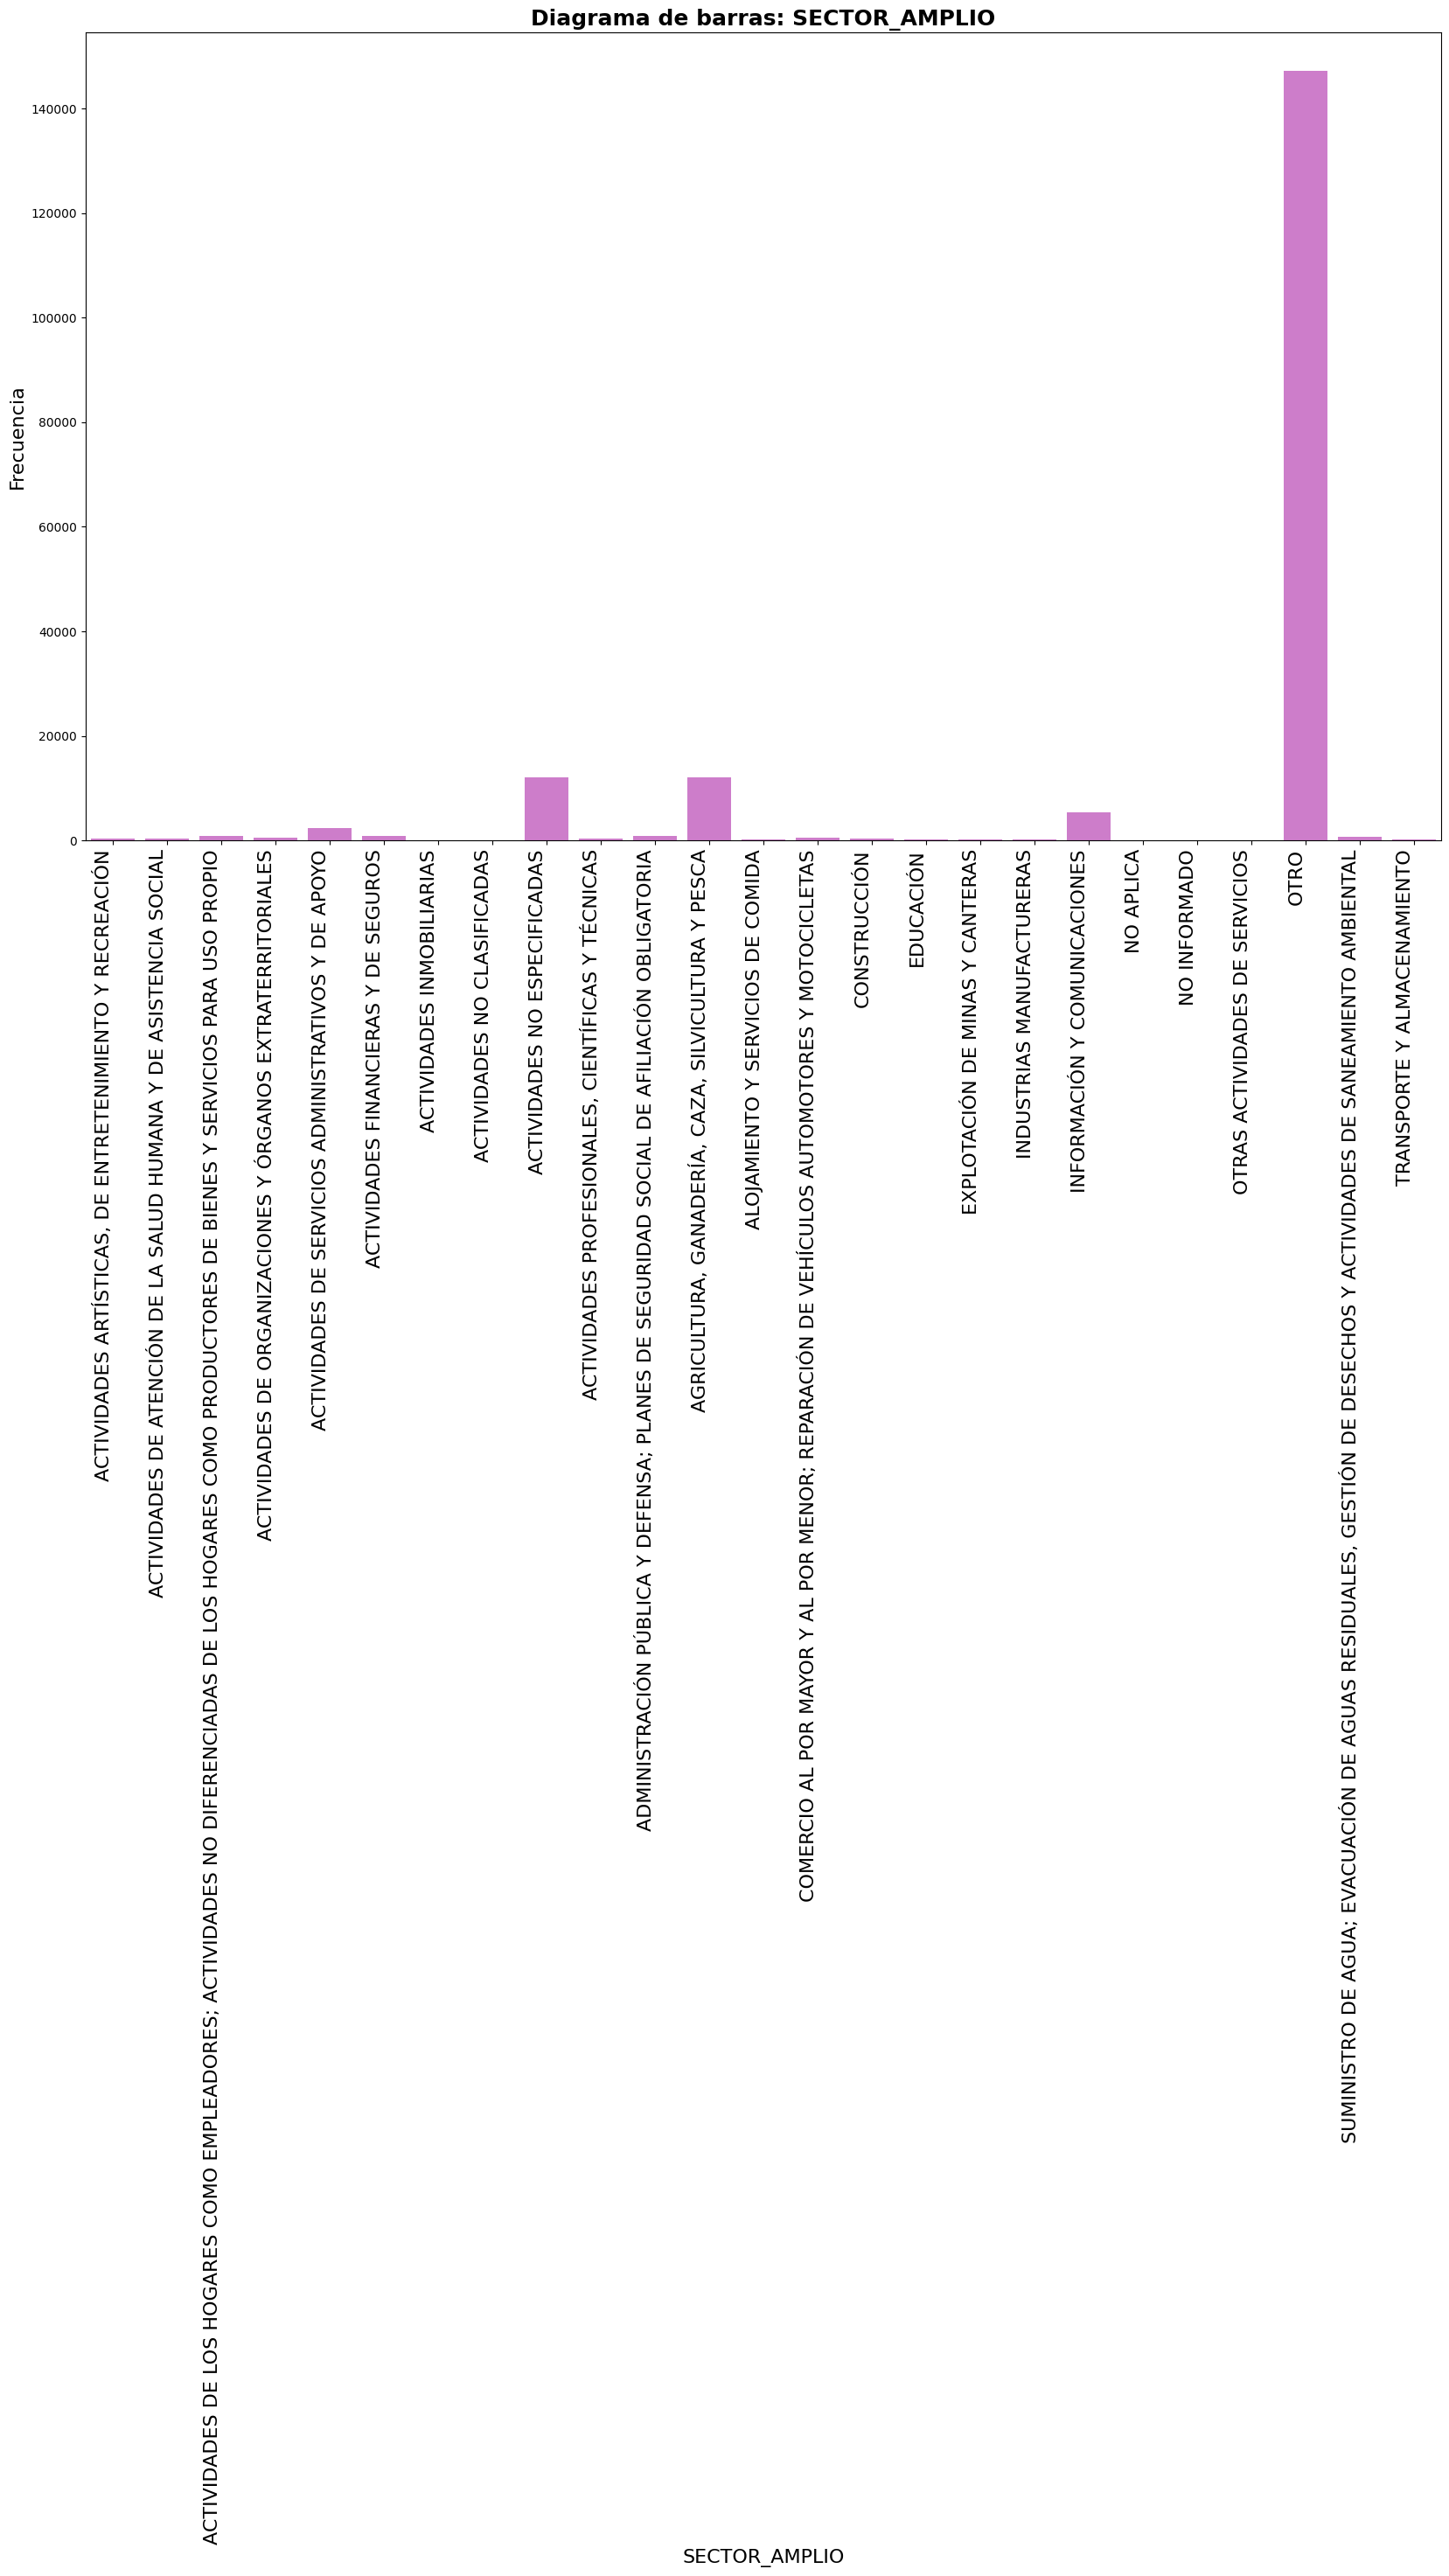

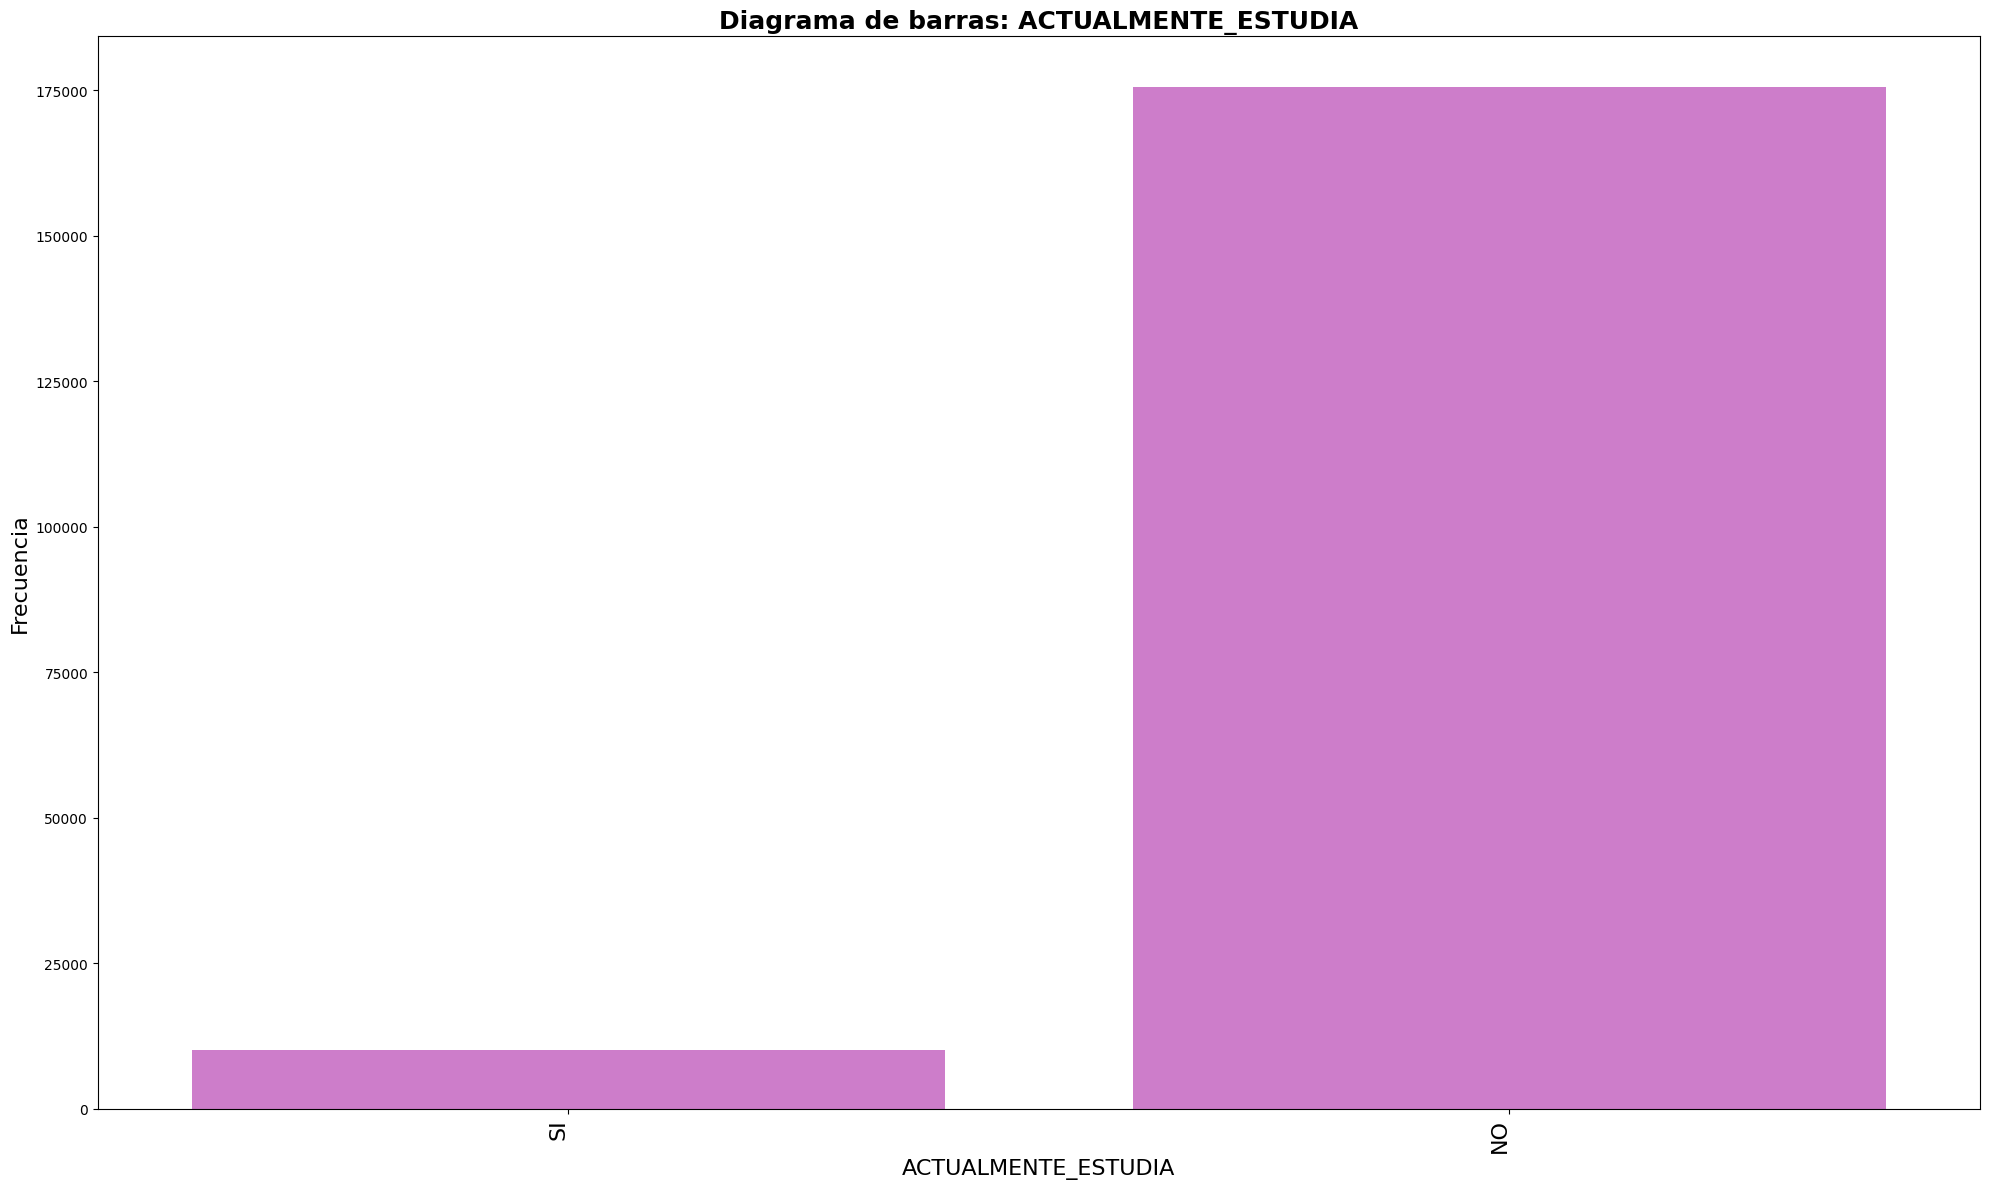

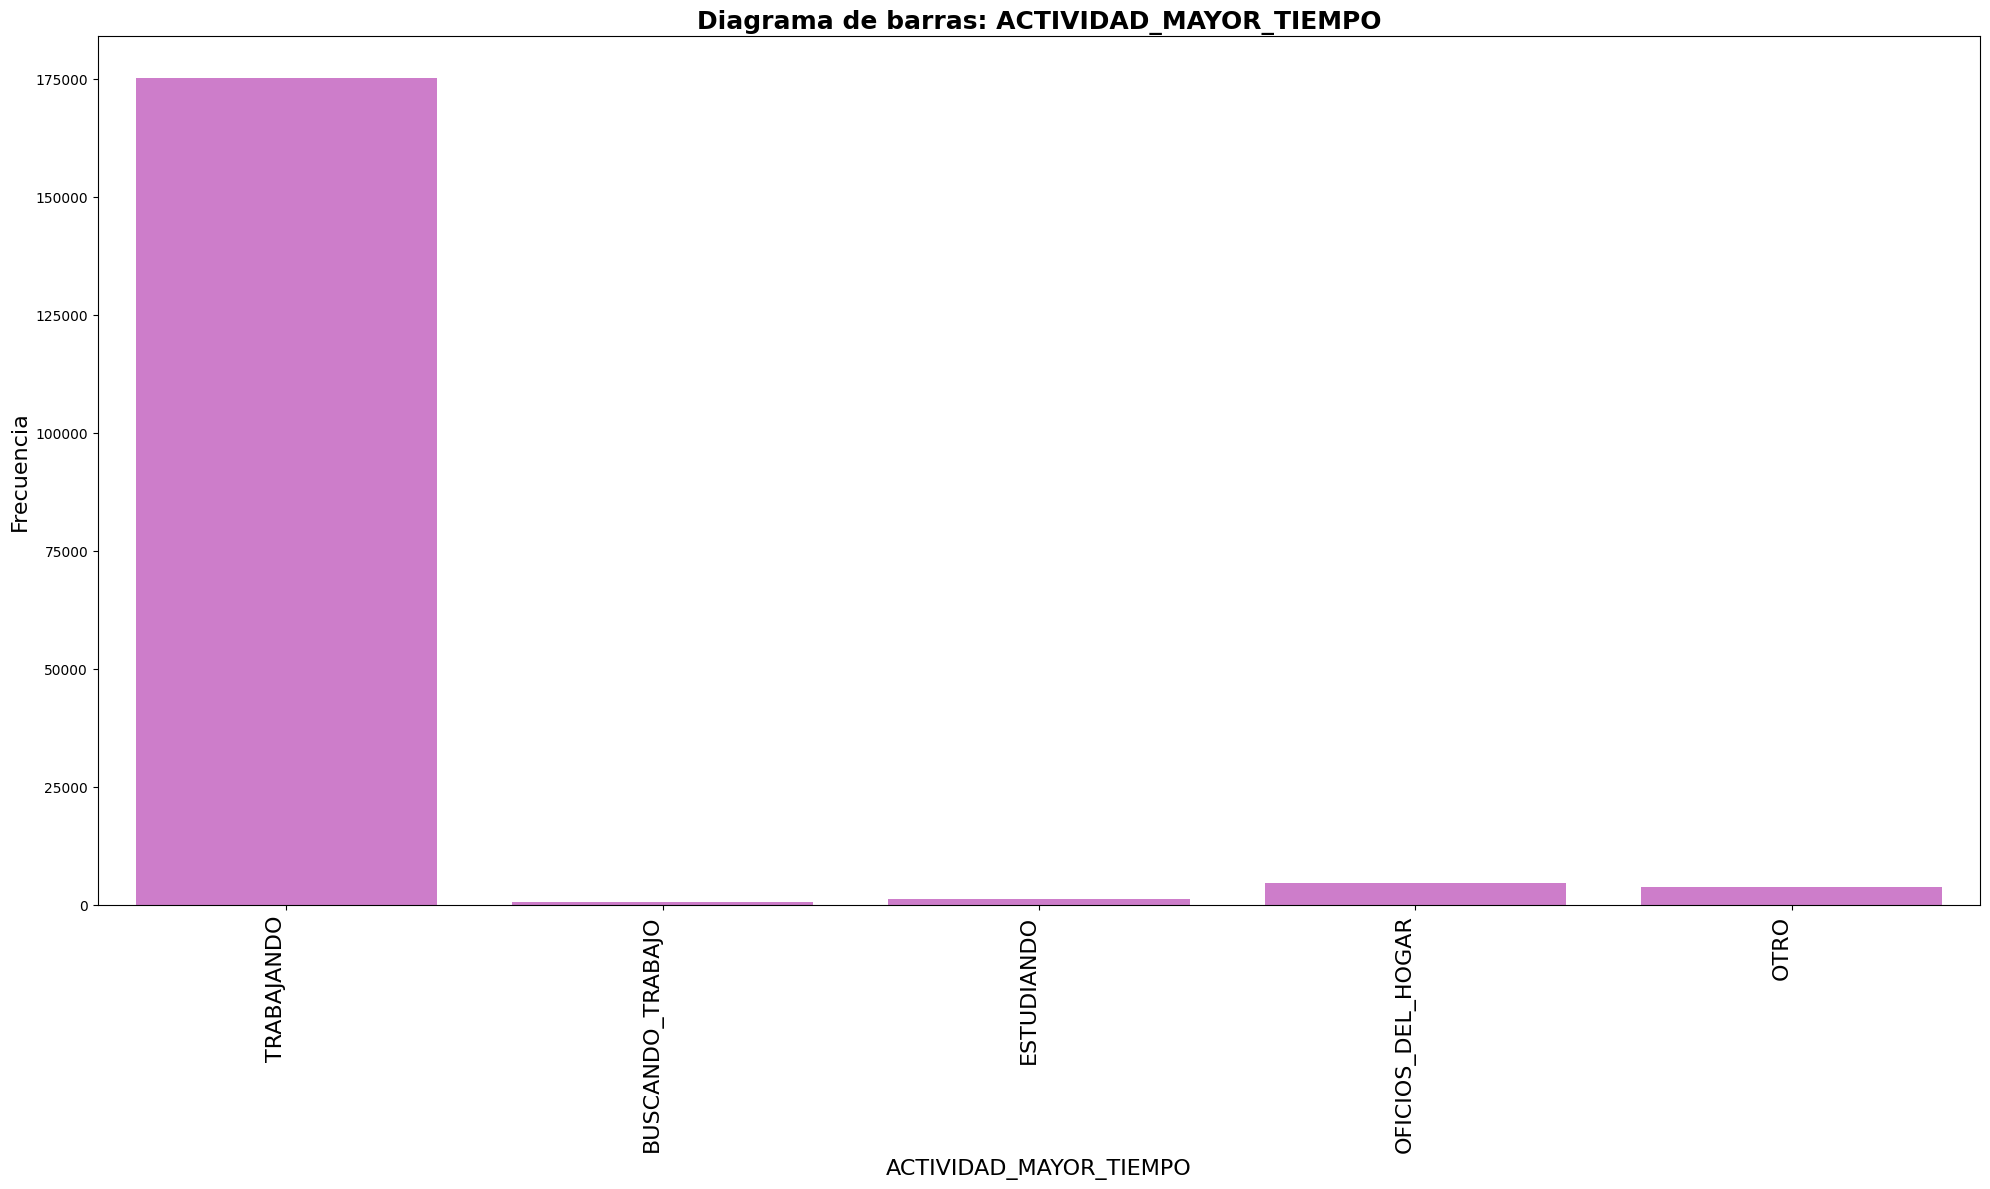

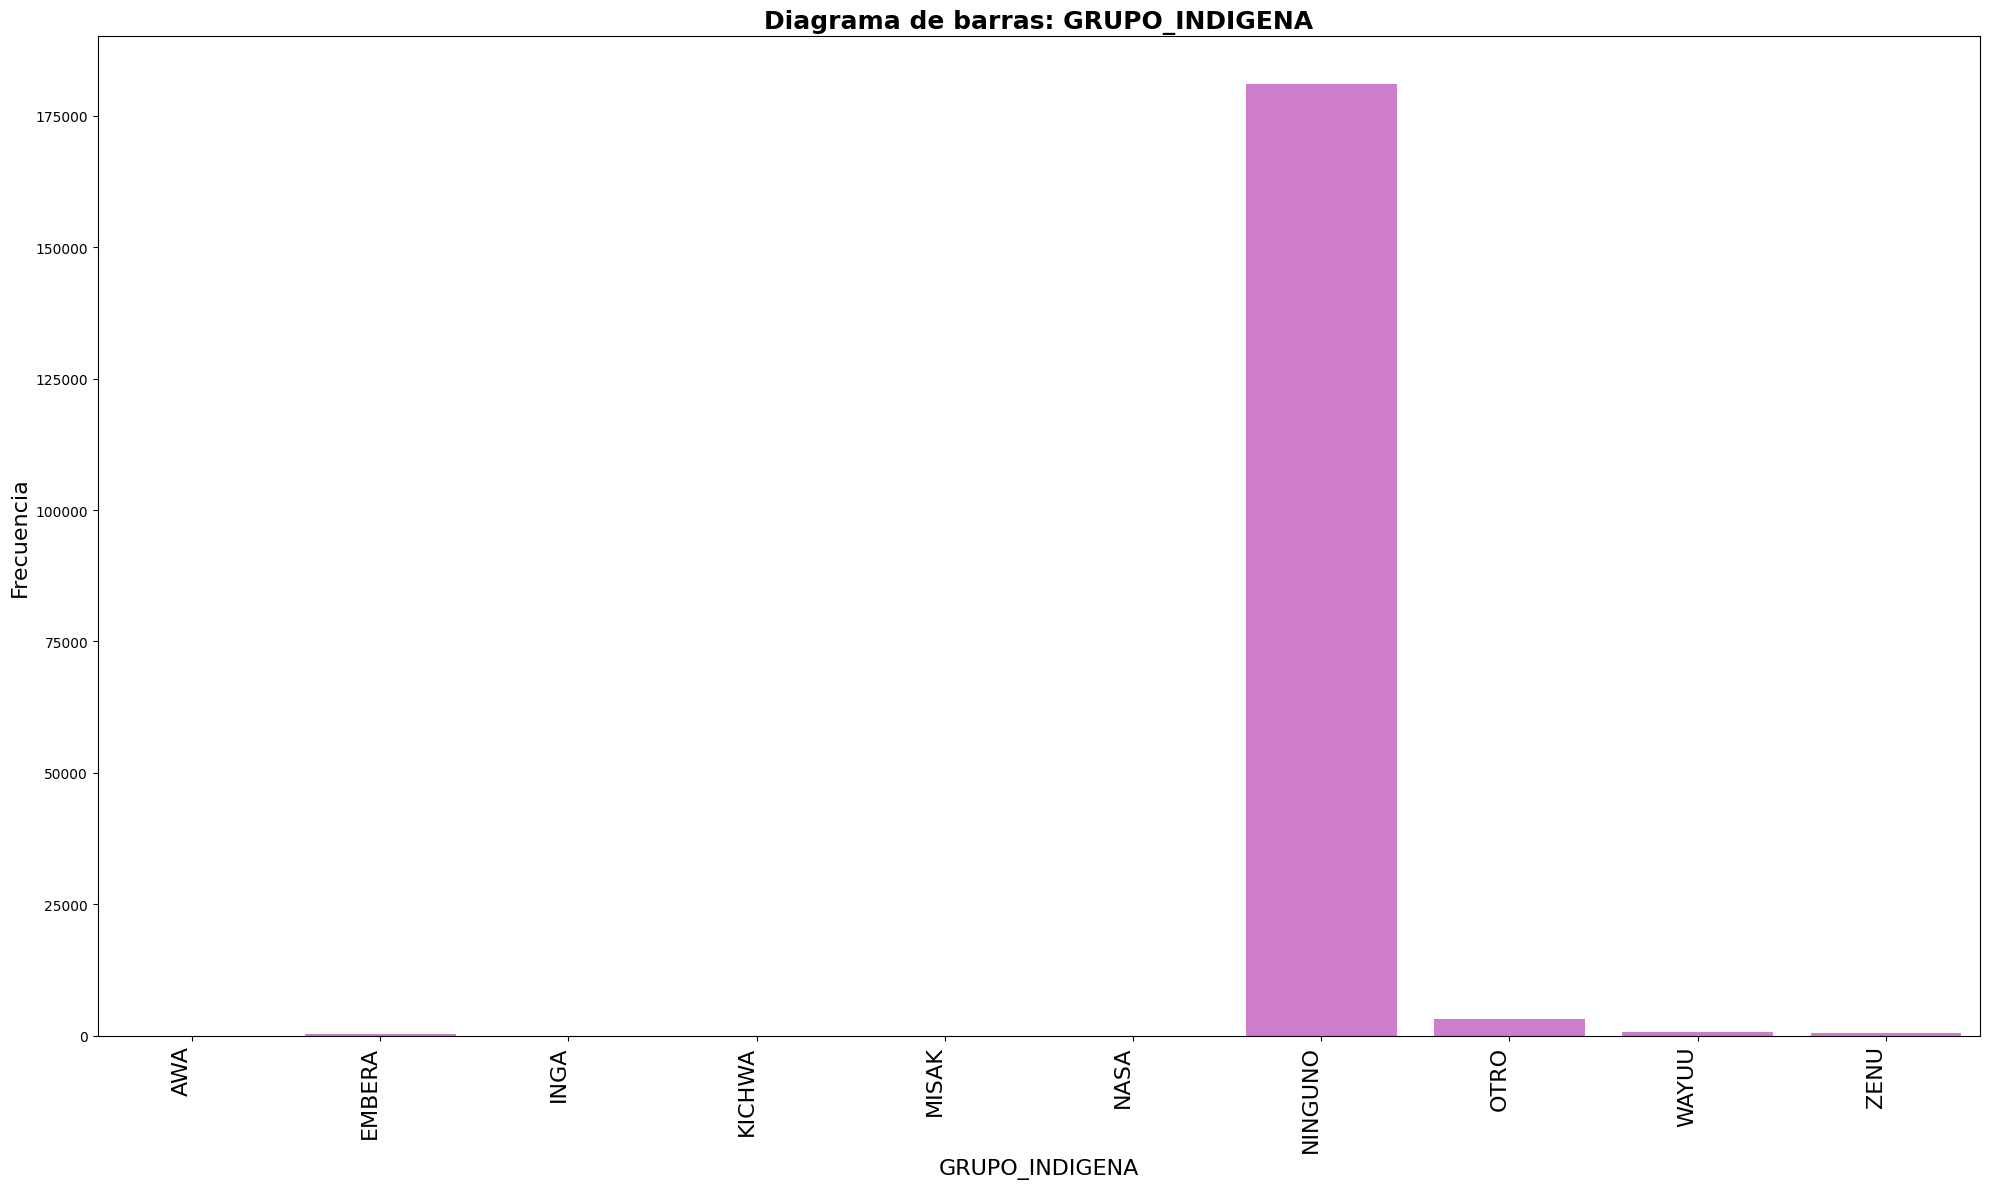

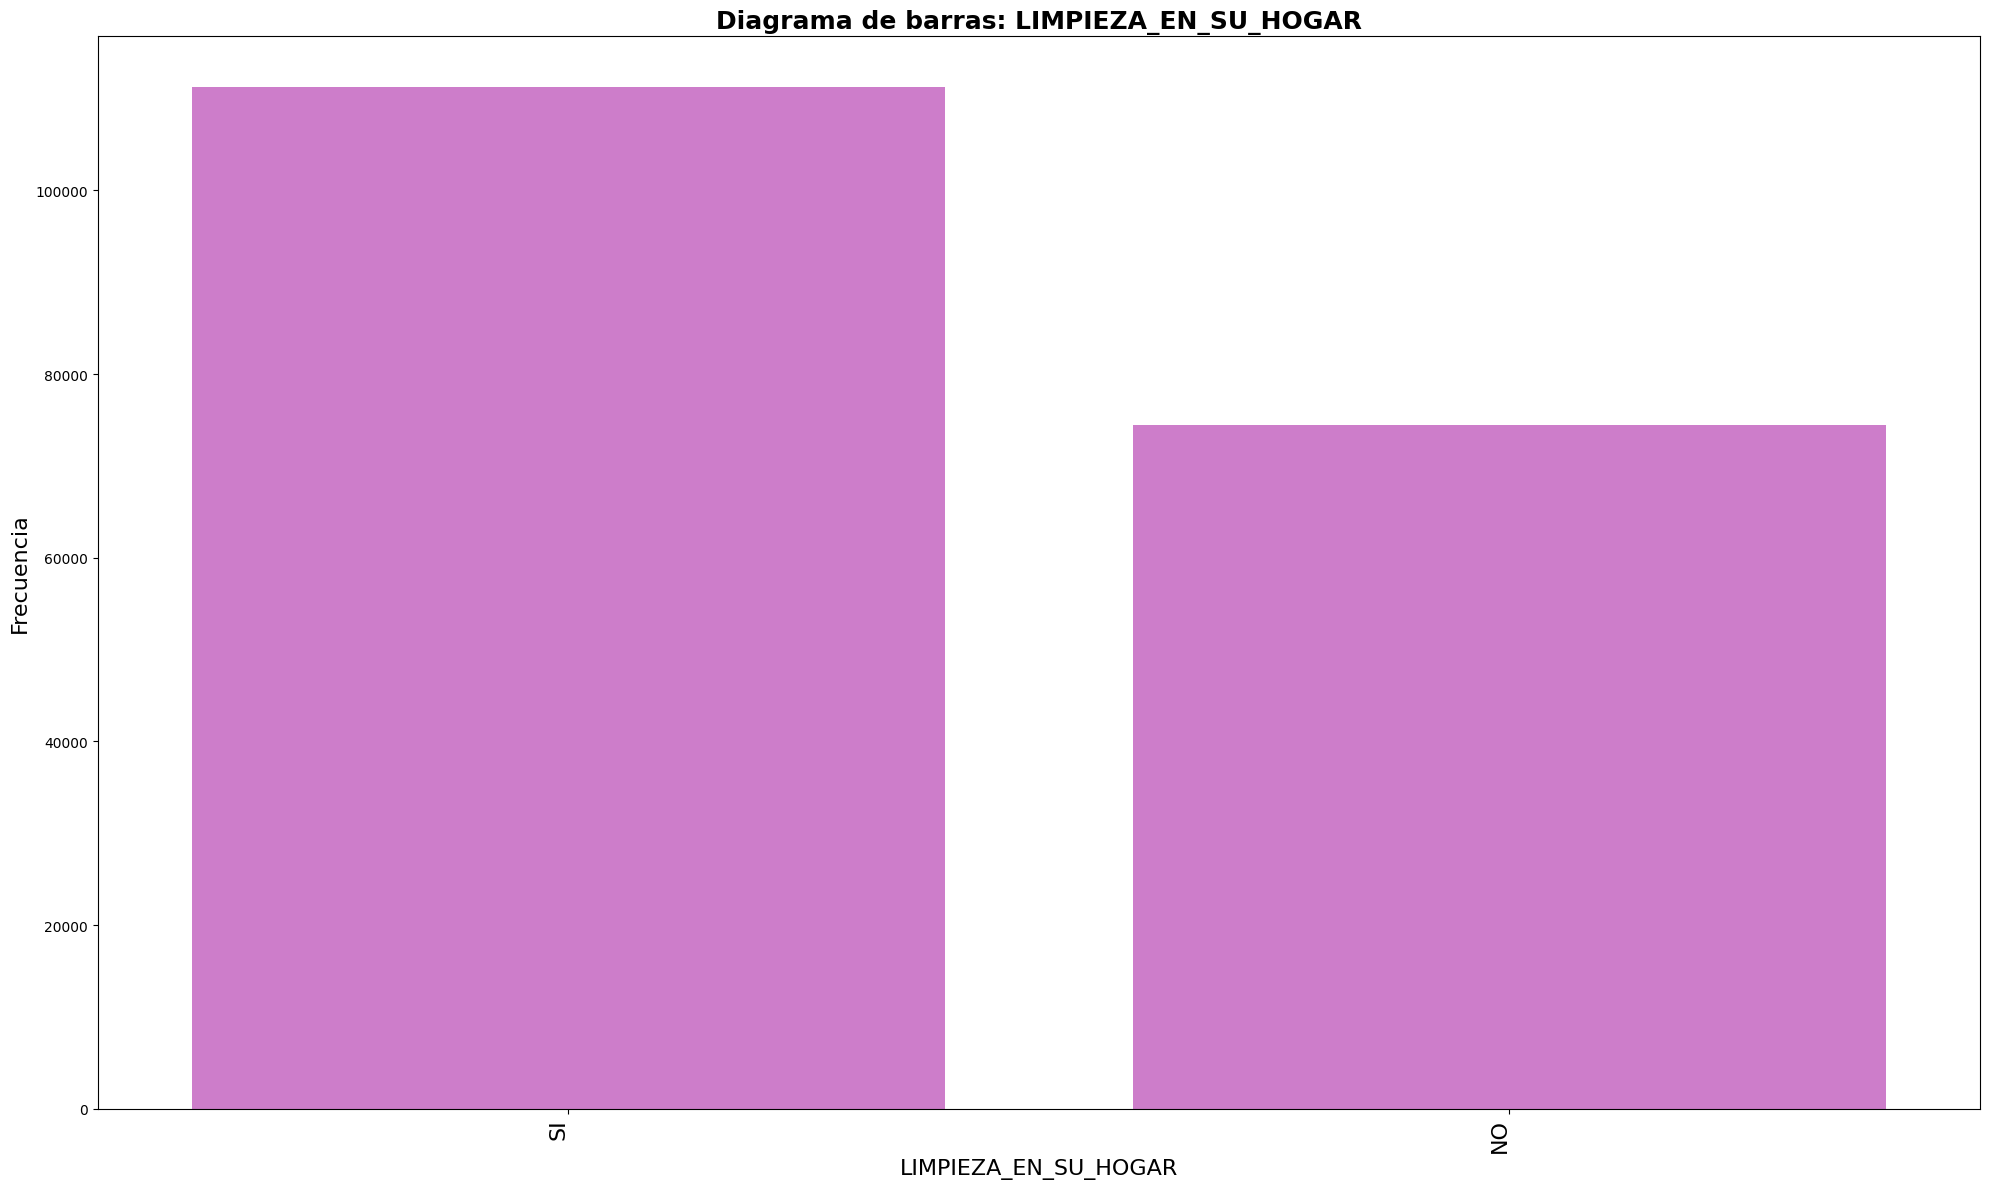

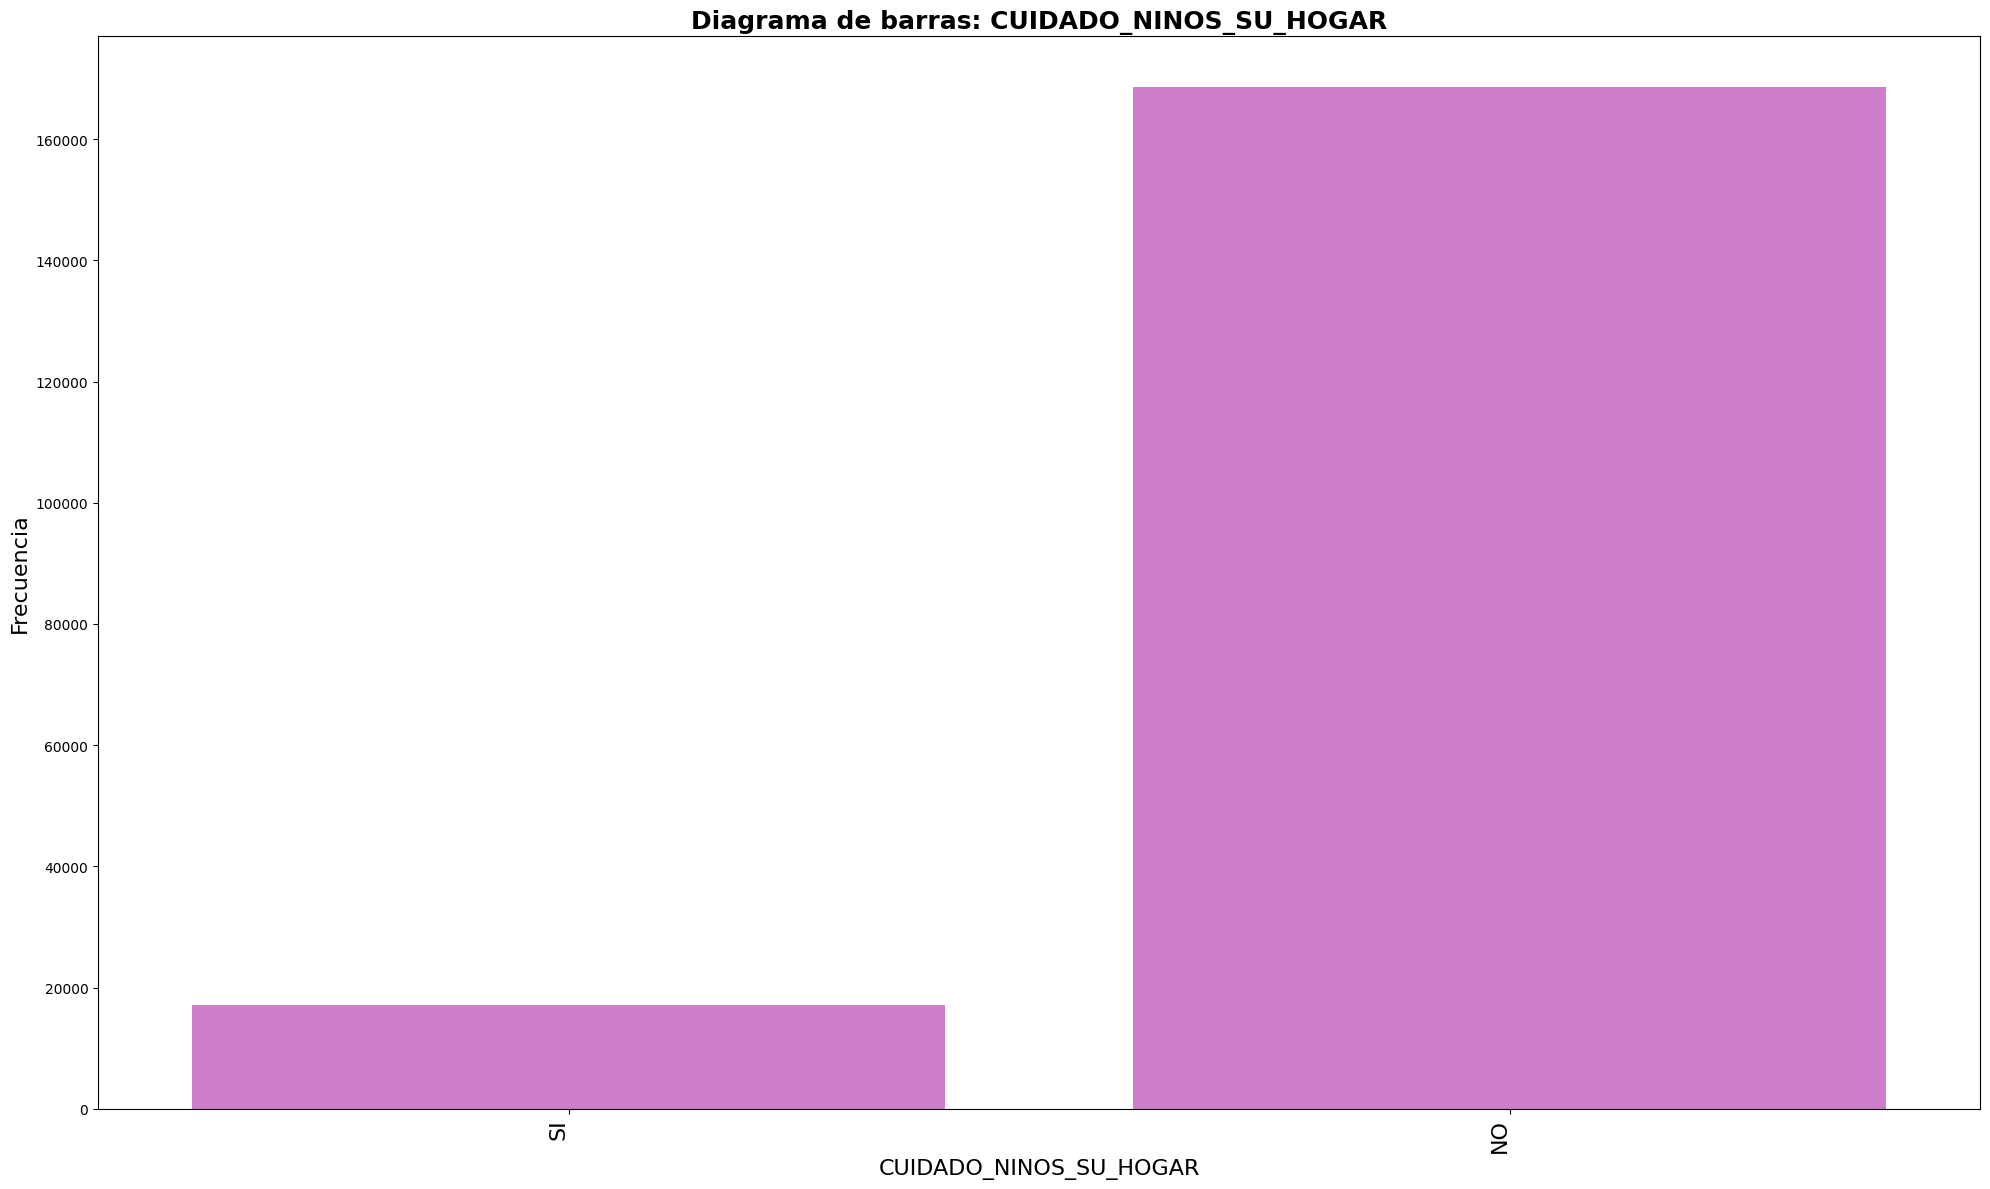

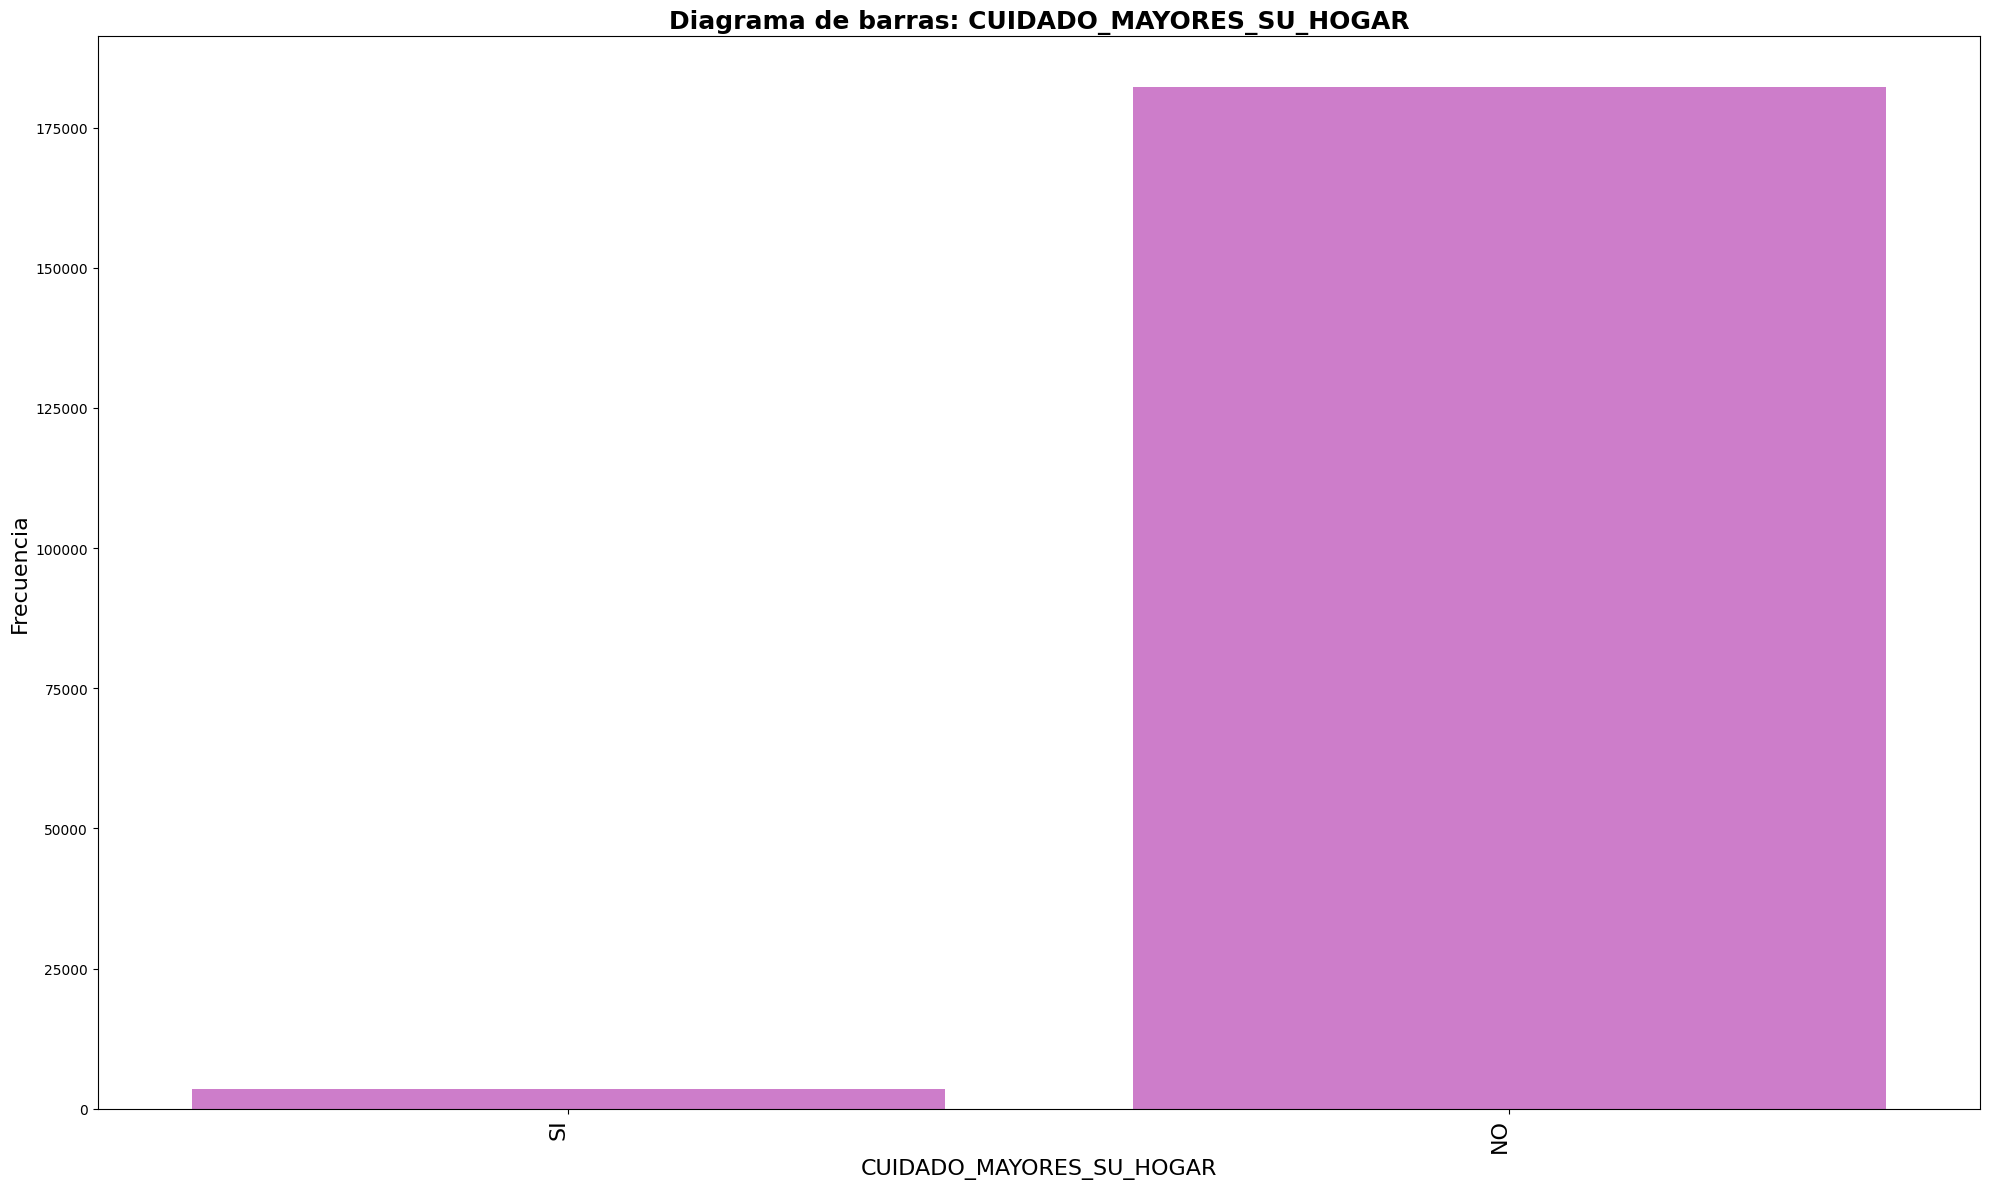

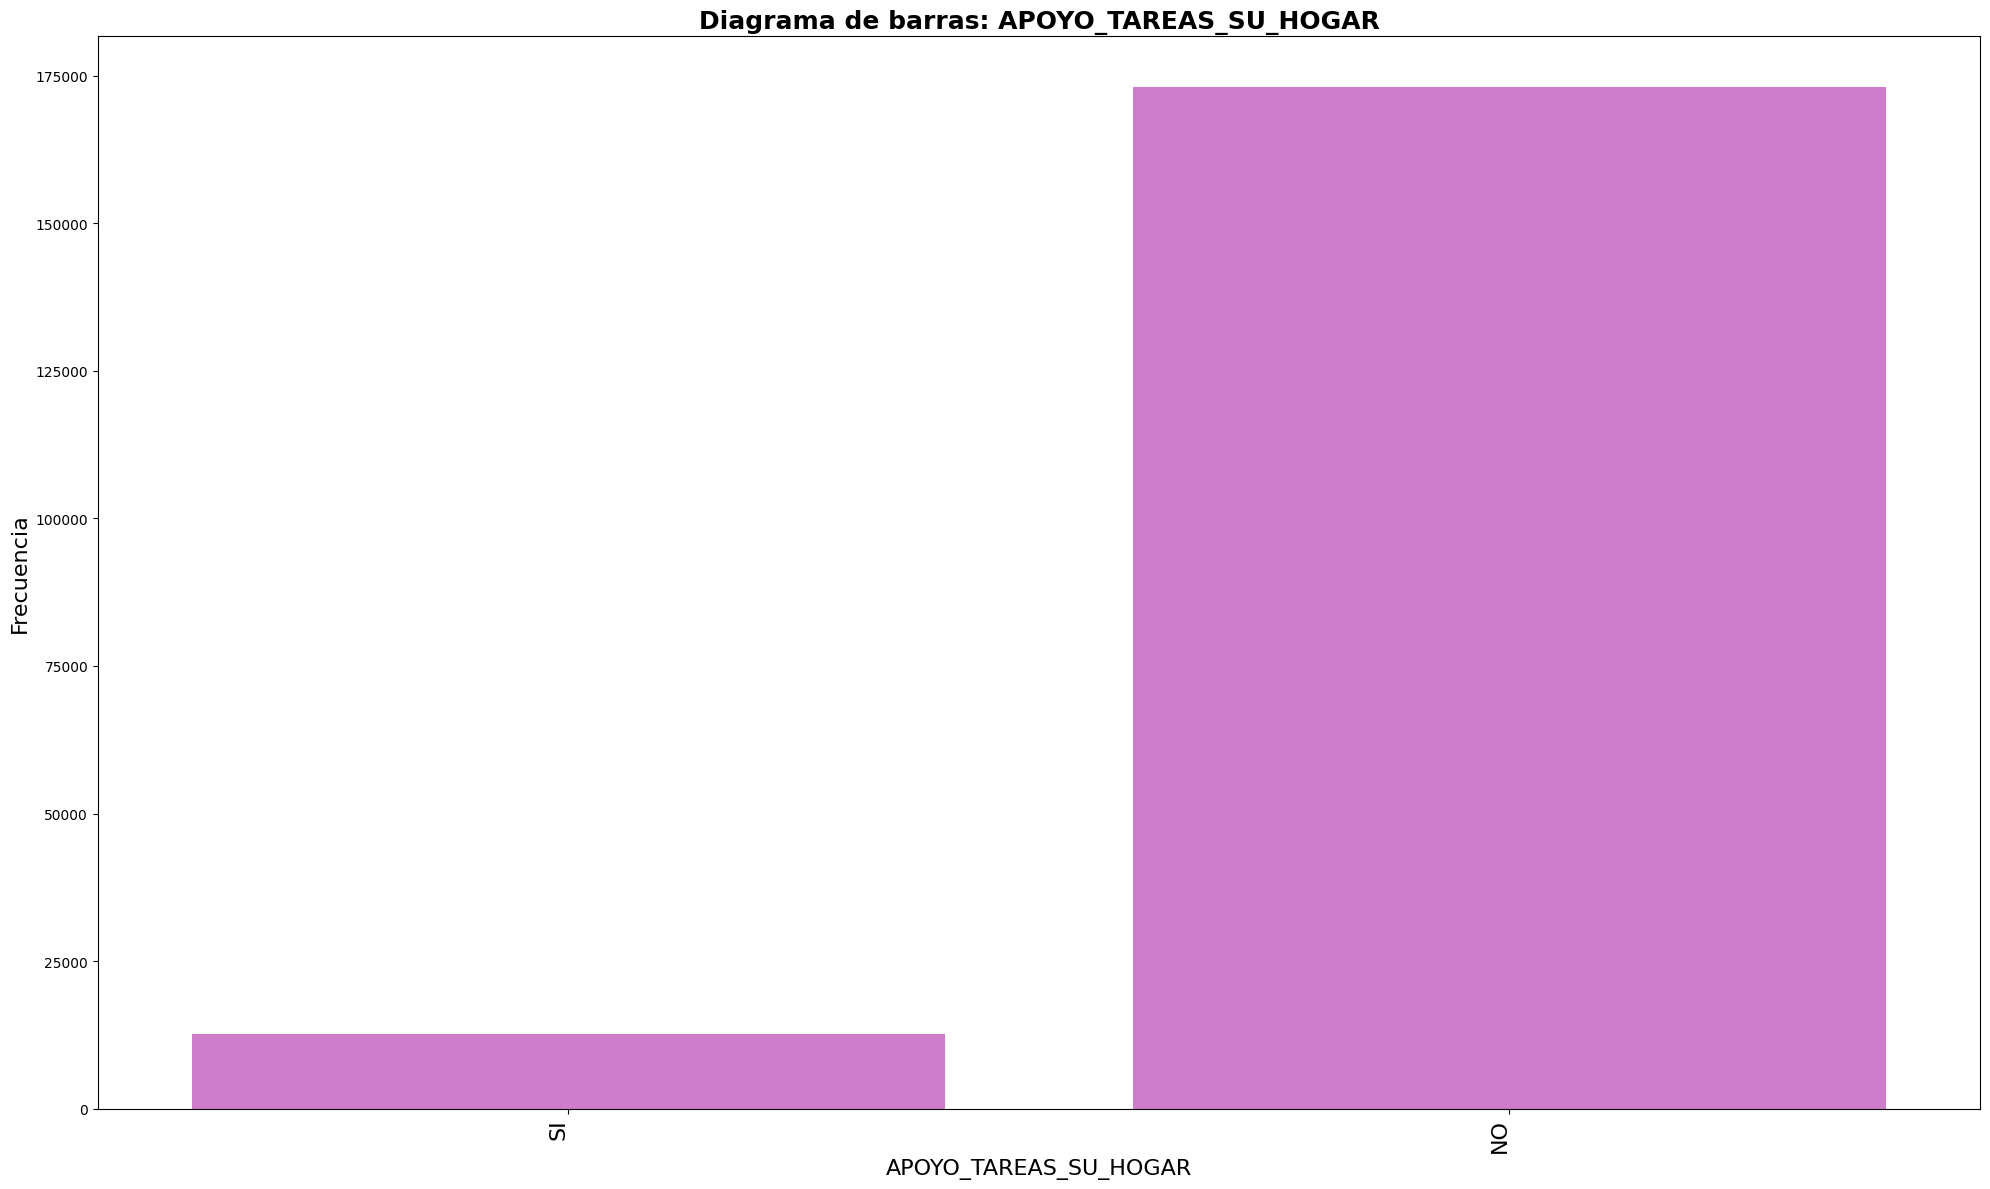

In [ ]:
# Seleccionar columnas categóricas
category_columns = df_ingreso.select_dtypes(include=["category"]).columns

# Crear un diagrama de barras para cada columna categórica
for column in category_columns:
    plt.figure(figsize=(16,12))
    # Obtener frecuencias para el orden de las barras
    frequencies = df_ingreso[column].value_counts()

    # Crear el gráfico de barras
    sns.countplot(data=df_ingreso, x=column, color="orchid")
    plt.title(f'Diagrama de barras: {column}', fontsize=18, fontweight="bold")
    plt.xticks(rotation=90, ha='right', fontsize=16)
    plt.ylabel('Frecuencia', fontsize=16)
    plt.xlabel(f"{column}", fontsize=16)
    plt.tight_layout()
    plt.show()

### **Identificación de Datos Atípicos**

### **Boxplots**

Los gráficos muestran los diagramas de caja (boxplots) para las variables numéricas del conjunto de datos. A continuación, se da la descripción de algunos de estos:

- **Boxplot de INGRESO:** Se observa una gran cantidad de valores atípicos hacia la derecha, lo que indica una alta dispersión y presencia de ingresos extremos. La caja (IQR) es muy estrecha y está concentrada en valores bajos, lo que confirma que la mayoría de las personas tiene ingresos modestos y solo unos pocos ganan sumas muy elevadas.

- **Boxplot de EDAD:** La distribución de edades es ligeramente asimétrica hacia la derecha, con la mayoría de los valores entre los 25 y 60 años. Existen algunos valores atípicos por encima de los 80 años, pero en general la dispersión es moderada y esperable.

- **Boxplot de TOTAL_PERSONAS_HOGAR:** La mayoría de los hogares tiene entre 2 y 6 personas. Hay valores atípicos por encima de ese rango, incluyendo casos de hasta 25 personas por hogar. Esto sugiere hogares extensos, aunque poco frecuentes.

- **Boxplot de HORAS_TRABAJO:** El boxplot muestra una gran cantidad de valores atípicos, tanto por debajo como por encima del rango intercuartílico. La mediana está cerca de 48 horas semanales, lo que coincide con una jornada laboral típica. Sin embargo, hay personas que reportan trabajar muchas más horas, incluso más de 100.

- **Boxplot de TIEMPO_TRABAJANDO_EMPRESA_ACTUAL:** La mayoría de las personas lleva menos de 200 meses (alrededor de 16 años) en su empleo actual. Hay muchos valores atípicos a la derecha que indican permanencias muy prolongadas, incluso cercanas a los 900 meses (75 años), lo cual puede ser un error o casos muy excepcionales.

- **Boxplot de LIMPIEZA_EN_SU_HOGAR_DIAS:** La mayoría de los hogares realiza actividades de limpieza entre 0 y 5 días por semana, siendo la mediana 1 día. Hay algunos valores atípicos que indican limpieza diaria o casi diaria (6-7 días).

- **Boxplot de CUIDADO_MAYORES_SU_HOGAR_DIAS:** Este boxplot presenta solo valores atípicos dispersos, indicando que la mayoría no realiza cuidado a personas mayores, y que los pocos que lo hacen lo hacen con variabilidad en la cantidad de días.

- **Boxplot de CUIDADO_NIÑOS_SU_HOGAR_DIAS:** Al igual que el anterior, muestra una concentración en el valor cero con puntos aislados a lo largo de la semana. Esto sugiere que la mayoría de hogares no cuida niños, pero hay algunos donde se realiza dicho cuidado hasta 7 días por semana.



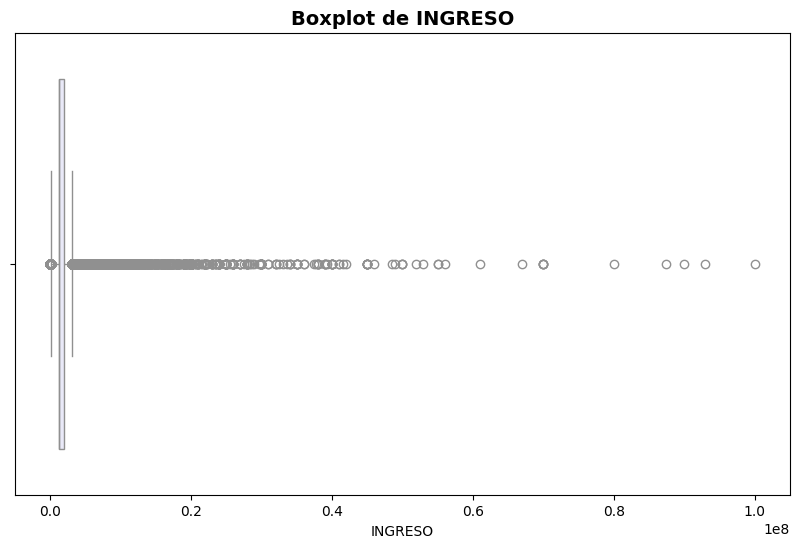

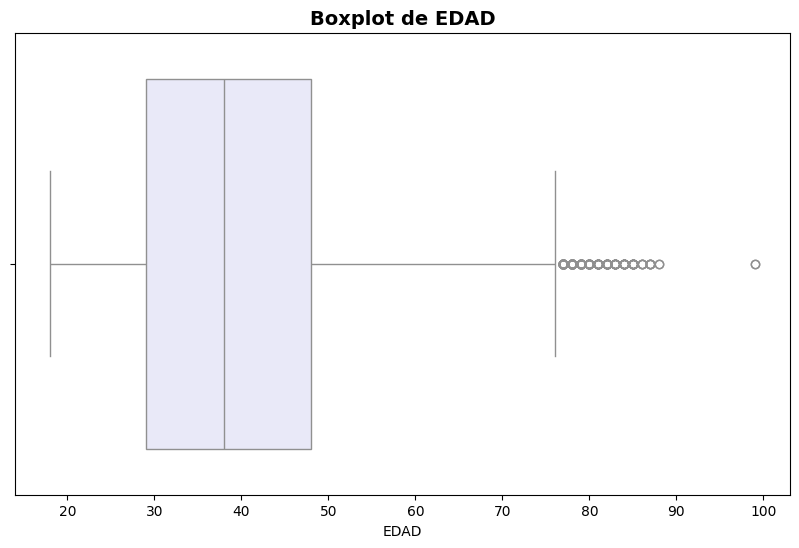

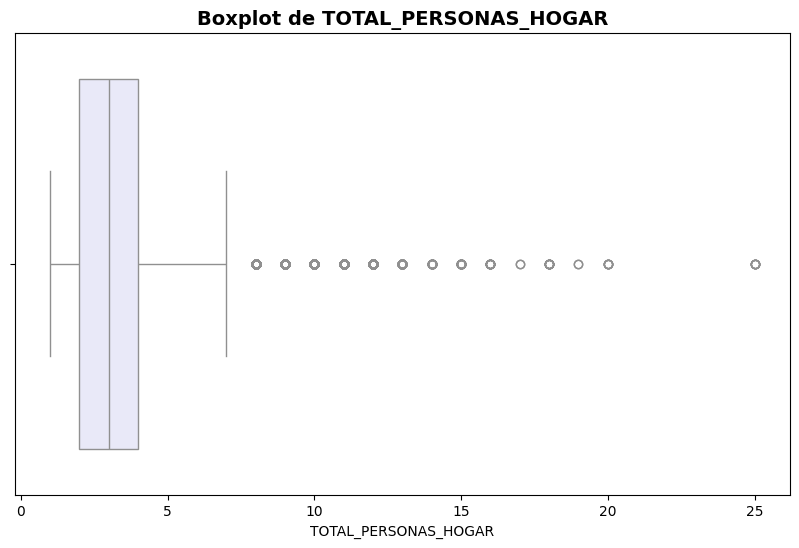

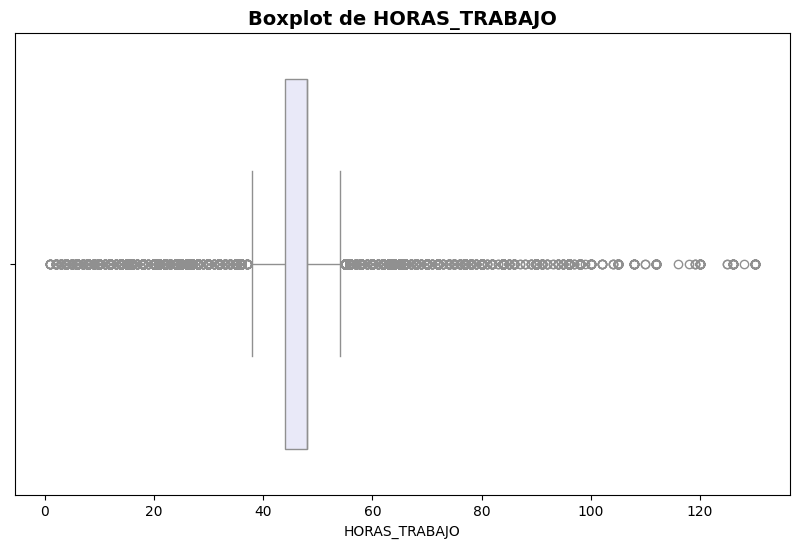

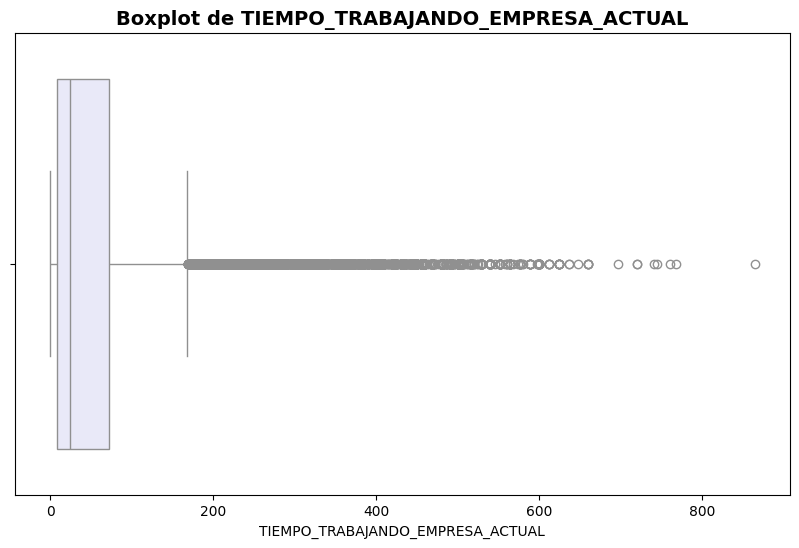

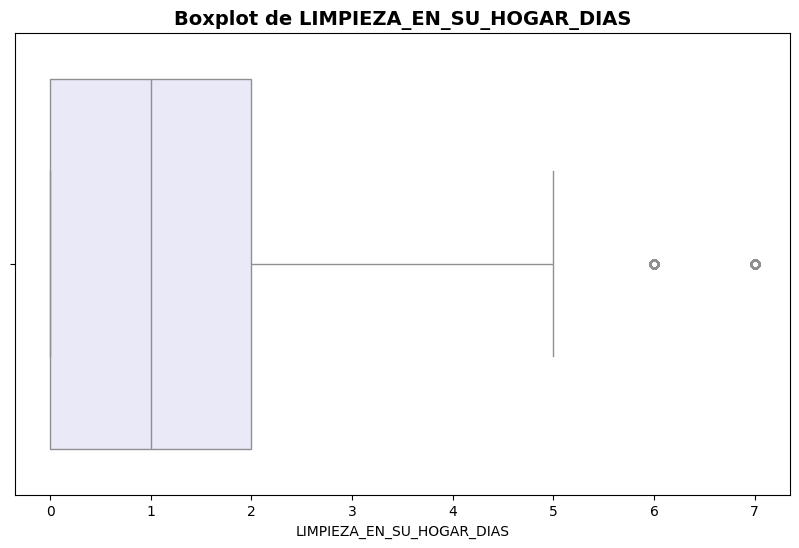

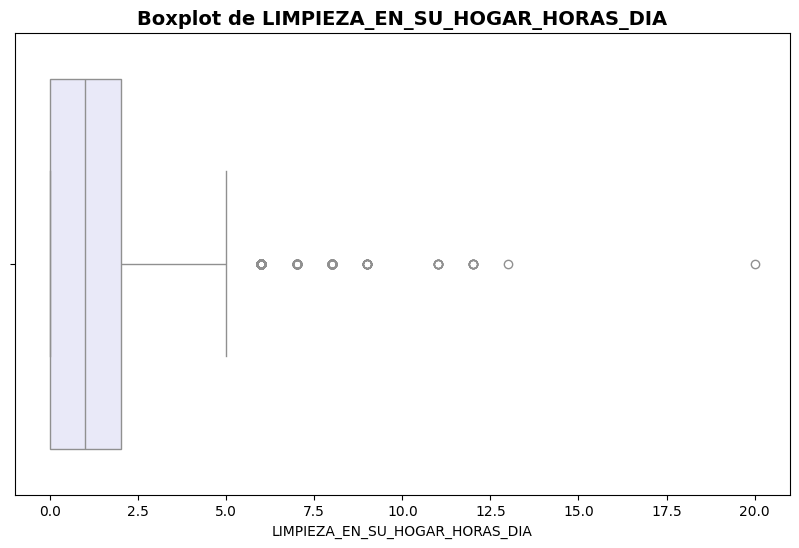

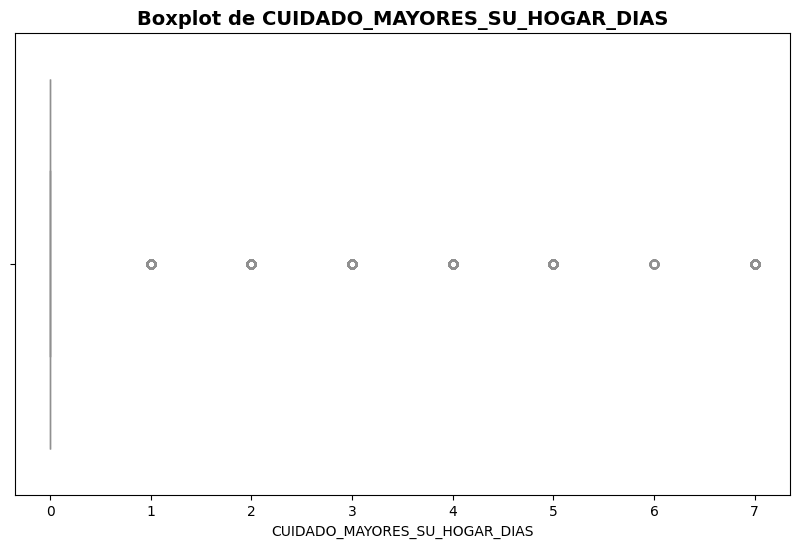

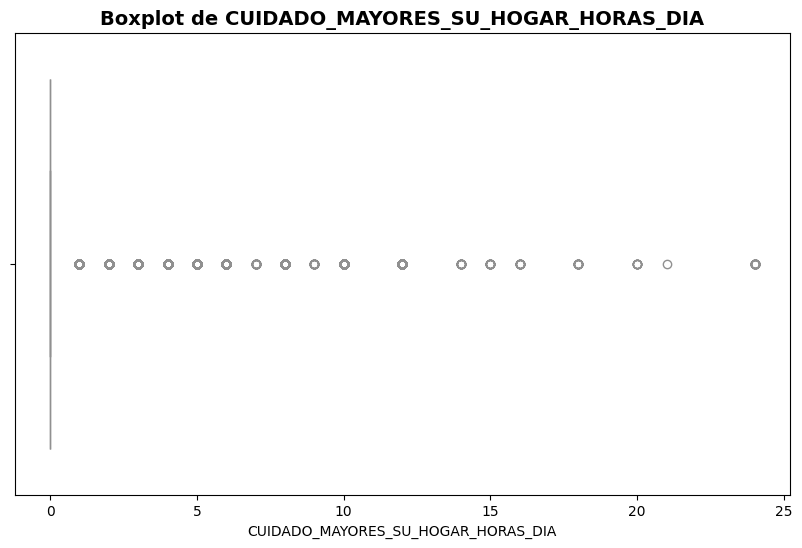

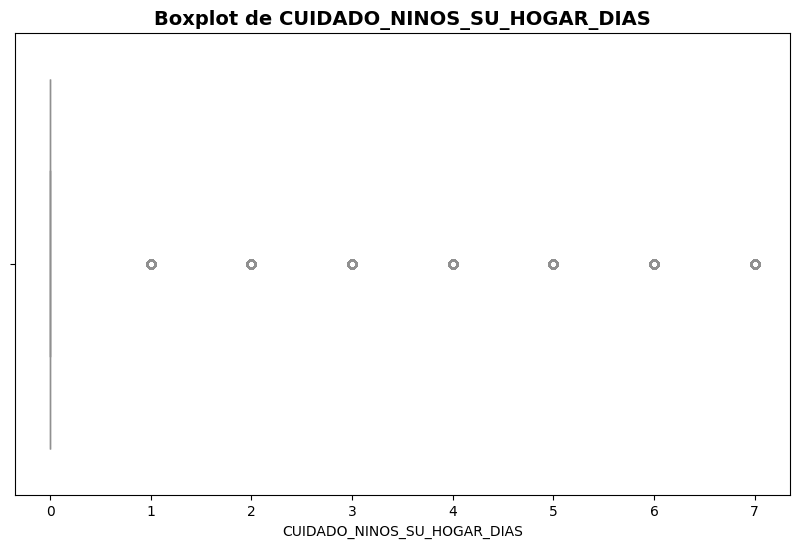

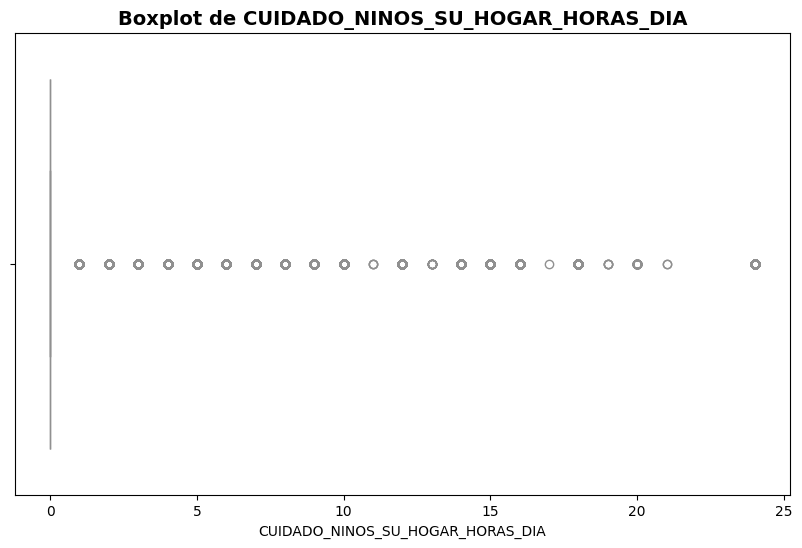

In [21]:
columns_numeric = df_ingreso.select_dtypes(include=["int64", "float64"]).columns

# Crear un diagrama de cajas para cada columna numérica
for column in columns_numeric:
      plt.figure(figsize=(10, 6))
      sns.boxplot(x=df_ingreso[column], color="lavender")
      plt.title(f"Boxplot de {column}", fontsize=14, fontweight="bold")
      plt.show()

### **Identificación** 

Para detectar valores atípicos en las variables cuantitativas del conjunto de datos, se utilizaron boxplots como herramienta principal de visualización. Estos permitieron observar la presencia de valores extremos en variables como INGRESO, EDAD, TOTAL_PERSONAS_HOGAR, HORAS_TRABAJO y TIEMPO_TRABAJANDO_EMPRESA_ACTUAL, entre otras. La identificación se complementó aplicando el método del rango intercuartil (IQR), el cual clasificó como atípicos aquellos datos que se encontraban fuera de los límites definidos por 1.5 veces el IQR. Como resultado, se identificaron 22.750 outliers en la variable INGRESO, reflejando una alta concentración de ingresos inusualmente altos. También se detectaron 319 outliers en EDAD, así como 3.689 en TOTAL_PERSONAS_HOGAR, principalmente por hogares con un número elevado de integrantes. La variable HORAS_TRABAJO presentó 37.867 valores atípicos, lo que evidencia una fuerte dispersión en la cantidad de horas laborales semanales. Por su parte, 20.652 outliers fueron hallados en el tiempo trabajado en la empresa actual, lo que sugiere permanencias laborales atípicamente extensas. Finalmente, se evidenciaron valores extremos en variables relacionadas con tareas del hogar y cuidado, como 4.401 en días de limpieza, 525 en horas diarias de limpieza, 3.514 en días y horas de cuidado a mayores, y más de 17.000 outliers en las variables de cuidado infantil, indicando una fuerte variabilidad en estas actividades entre los hogares analizados.

In [22]:
# Seleccionar columnas numéricas
columns_numeric = df_ingreso.select_dtypes(include=["int64", "float"]).columns

# Definir el rango IQR
Q1 = df_ingreso[columns_numeric].quantile(0.25)
Q3 = df_ingreso[columns_numeric].quantile(0.75)
IQR = Q3 - Q1

# Definir outliers como valores fuera del rango [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
outliers_iqr = ((df_ingreso[columns_numeric] < (Q1 - 1.5 * IQR)) |
                (df_ingreso[columns_numeric] > (Q3 + 1.5 * IQR)))

# Contar la cantidad de outliers por variable
outliers_iqr.sum()

INGRESO                               22750
EDAD                                    319
TOTAL_PERSONAS_HOGAR                   3689
HORAS_TRABAJO                         37867
TIEMPO_TRABAJANDO_EMPRESA_ACTUAL      20652
LIMPIEZA_EN_SU_HOGAR_DIAS              4401
LIMPIEZA_EN_SU_HOGAR_HORAS_DIA          525
CUIDADO_MAYORES_SU_HOGAR_DIAS          3514
CUIDADO_MAYORES_SU_HOGAR_HORAS_DIA     3514
CUIDADO_NINOS_SU_HOGAR_DIAS           17130
CUIDADO_NINOS_SU_HOGAR_HORAS_DIA      17130
dtype: int64

### **Identificación mediante Z-score**

Para detectar valores atípicos extremos se aplicó el método del Z-score, el cual identifica observaciones que se alejan más de tres desviaciones estándar respecto a la media. Este análisis permitió detectar 34.332 filas con al menos un valor atípico, distribuidas principalmente en variables como CUIDADO_NINOS_SU_HOGAR_DIAS (13.461 casos), TIEMPO_TRABAJANDO_EMPRESA_ACTUAL (5.215), HORAS_TRABAJO (4.993) e INGRESO (2.488). Estos valores representan desviaciones significativas del comportamiento general de la muestra, por lo que deben ser tratados cuidadosamente en análisis posteriores.

Las observaciones con outliers en ingreso, por ejemplo, corresponden a personas con montos elevados de remuneración, superando con frecuencia el millón de pesos. Al caracterizar estas filas, se observa que la mayoría de los individuos asociados a estos extremos son mujeres y hombres jóvenes (principalmente entre 21 y 56 años), con niveles de educación media o superior, pertenecientes en su mayoría a estratos 1, 2 y 3, y con tenencia de vivienda por arriendo o propiedad pagada. En cuanto a la ubicación, predominan las viviendas tipo apartamento en zonas urbanas.

Este procedimiento es clave para garantizar la calidad del análisis estadístico y evitar distorsiones en los modelos predictivos, ya que los outliers pueden influir de manera desproporcionada en los resultados.



In [23]:
# Calcular Z-score para cada variable numérica
z_scores = np.abs(df_ingreso[columns_numeric].apply(zscore))

# Definir outliers con un umbral de 3 desviaciones estándar
outliers_z = (z_scores > 3)

outliers_z_rows = df_ingreso[outliers_z.any(axis=1)]
print("Filas con outliers según Z-score:")
print(outliers_z_rows)

# Contar la cantidad de outliers por variable
outliers_z.sum()

Filas con outliers según Z-score:
           INGRESO  EDAD SEXO_NACIMIENTO  GENERO ATRACCION_POR     ETNIA  \
1        1160000.0    32           MUJER   MUJER       HOMBRES   NINGUNO   
42       5400000.0    54           MUJER   MUJER       HOMBRES   NINGUNO   
47       1000000.0    21          HOMBRE  HOMBRE       MUJERES   NINGUNO   
51       1300000.0    28           MUJER   MUJER       HOMBRES   NINGUNO   
73        160000.0    63           MUJER   MUJER       HOMBRES   NINGUNO   
...            ...   ...             ...     ...           ...       ...   
668443   1300000.0    29           MUJER   MUJER       HOMBRES   NINGUNO   
668495   4000000.0    56          HOMBRE  HOMBRE       MUJERES  INDIGENA   
668505   2500000.0    59          HOMBRE  HOMBRE       MUJERES   NINGUNO   
668509   1600000.0    35           MUJER   MUJER       HOMBRES   NINGUNO   
668512  10000000.0    69          HOMBRE  HOMBRE       MUJERES   NINGUNO   

       CAMPESINO ESTRATO TIPO_VIVIENDA TENENCIA_VIVIE

INGRESO                                2488
EDAD                                    257
TOTAL_PERSONAS_HOGAR                   1894
HORAS_TRABAJO                          4993
TIEMPO_TRABAJANDO_EMPRESA_ACTUAL       5215
LIMPIEZA_EN_SU_HOGAR_DIAS              4401
LIMPIEZA_EN_SU_HOGAR_HORAS_DIA         1288
CUIDADO_MAYORES_SU_HOGAR_DIAS          3105
CUIDADO_MAYORES_SU_HOGAR_HORAS_DIA     2272
CUIDADO_NINOS_SU_HOGAR_DIAS           13461
CUIDADO_NINOS_SU_HOGAR_HORAS_DIA       3776
dtype: int64

### **Correlación de Variables**

El mapa de calor presenta las correlaciones entre variables numéricas del conjunto de datos, utilizando la paleta de colores BuPu para resaltar la intensidad de las relaciones. Las correlaciones más altas se observan entre las variables relacionadas con el cuidado y la limpieza en el hogar. Por ejemplo, el número de días dedicados al cuidado de personas mayores y el número de horas diarias destinadas a esta actividad tienen una correlación fuerte (r = 0.76), al igual que ocurre con el cuidado de niños (r = 0.76). También se observa una relación moderada entre los días y las horas dedicadas a la limpieza (r = 0.45).

Por otro lado, la edad muestra una correlación moderada con el tiempo trabajando en la empresa actual (r = 0.47), lo que sugiere que a mayor edad, mayor estabilidad laboral. Asimismo, el ingreso presenta una correlación leve con el tiempo trabajado (r = 0.27), indicando una posible tendencia de aumento de ingreso con la antigüedad laboral.

En contraste, el ingreso no tiene correlaciones significativas con las tareas del hogar, ni con el número de personas en el hogar, lo que sugiere que estas variables son independientes del nivel de ingreso. En general, el mapa permite identificar que las relaciones más relevantes se dan entre variables de actividades domésticas y entre factores laborales como edad y antigüedad.

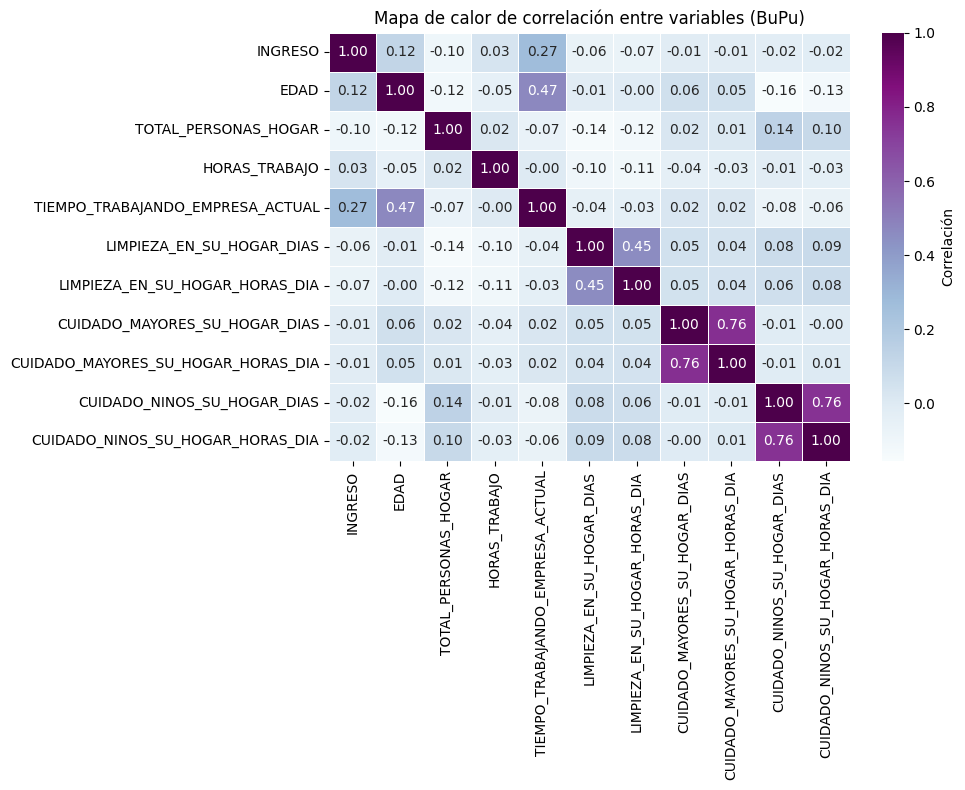

In [24]:
# Calcular la matriz de correlación
correlacion = df_ingreso.corr(numeric_only=True)

# Crear el heatmap con paleta BuPu
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlacion,
    annot=True,
    cmap='BuPu',
    fmt=".2f",
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Correlación'}
)
plt.title("Mapa de calor de correlación entre variables (BuPu)")
plt.tight_layout()
plt.show()

### **Diagramas de dispersión**

Con el fin de explorar visualmente las relaciones entre variables clave del entorno doméstico, laboral y económico, se construyeron varios diagramas de dispersión acompañados de líneas de regresión lineal. Estas gráficas permiten identificar patrones de comportamiento, tendencias y posibles asociaciones entre factores como el número de días y horas dedicados al cuidado en el hogar, la edad y el tiempo trabajado, así como el ingreso y las labores domésticas. A continuación, se describe cada una de estas relaciones, destacando las correlaciones más relevantes observadas en los datos.

**1. CUIDADO_MAYORES_SU_HOGAR_DIAS vs HORAS_DIA**

Se observa una correlación positiva fuerte, o sea, a mayor número de días dedicados al cuidado de personas mayores, más horas diarias se invierten en esta tarea. La nube de puntos se agrupa verticalmente en valores enteros (de 0 a 7 días), y aunque hay dispersión en las horas, la tendencia lineal creciente es clara.

**2. CUIDADO_NINOS_SU_HOGAR_DIAS vs HORAS_DIA**

Este gráfico muestra una relación positiva muy similar a la del cuidado de mayores, lo que significa que, a medida que aumenta el número de días de cuidado de niños, también lo hacen las horas dedicadas. La línea de regresión sugiere un patrón consistente, con algunos valores atípicos en horas altas.

**3. LIMPIEZA_EN_SU_HOGAR_DIAS vs HORAS_DIA**

Se evidencia una correlación positiva moderada, por lo que, a mayor número de días en los que se realiza limpieza, se asocian más horas diarias en promedio a esta tarea realizada. Sin embargo, la dispersión es algo más amplia que en los dos casos anteriores, lo que indica mayor variabilidad en la dedicación por día.

**4. EDAD vs TIEMPO_TRABAJANDO_EMPRESA_ACTUAL**

Aquí se presenta una correlación positiva clara, ya que, las personas mayores tienden a haber trabajado más tiempo en su empresa actual. La nube de puntos se distribuye de forma triangular, con mayor concentración en edades medias. De igual manera, se observa que la relación es creciente con mayor dispersión en edades altas.

**5. INGRESO vs TIEMPO_TRABAJANDO_EMPRESA_ACTUAL**

La relación es positiva pero débil, la línea de regresión es ascendente y la dispersión es alta. Muchas personas con ingresos bajos tienen desde poca hasta mucha antigüedad, y los ingresos altos son casos puntuales. Esto sugiere que el tiempo en la empresa no es un predictor fuerte del ingreso.



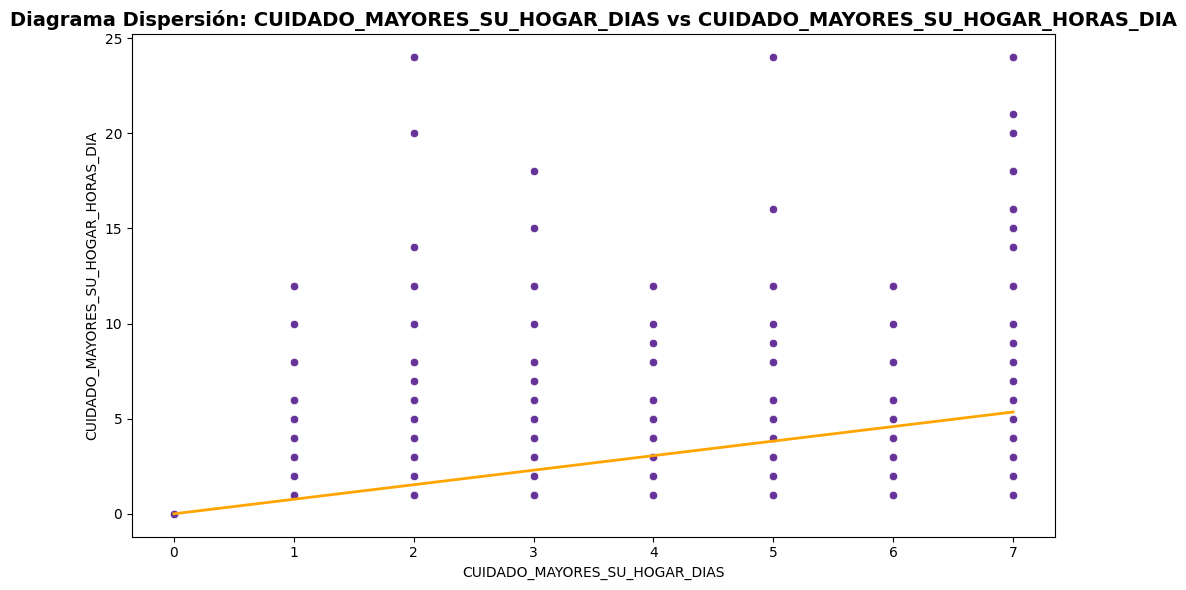

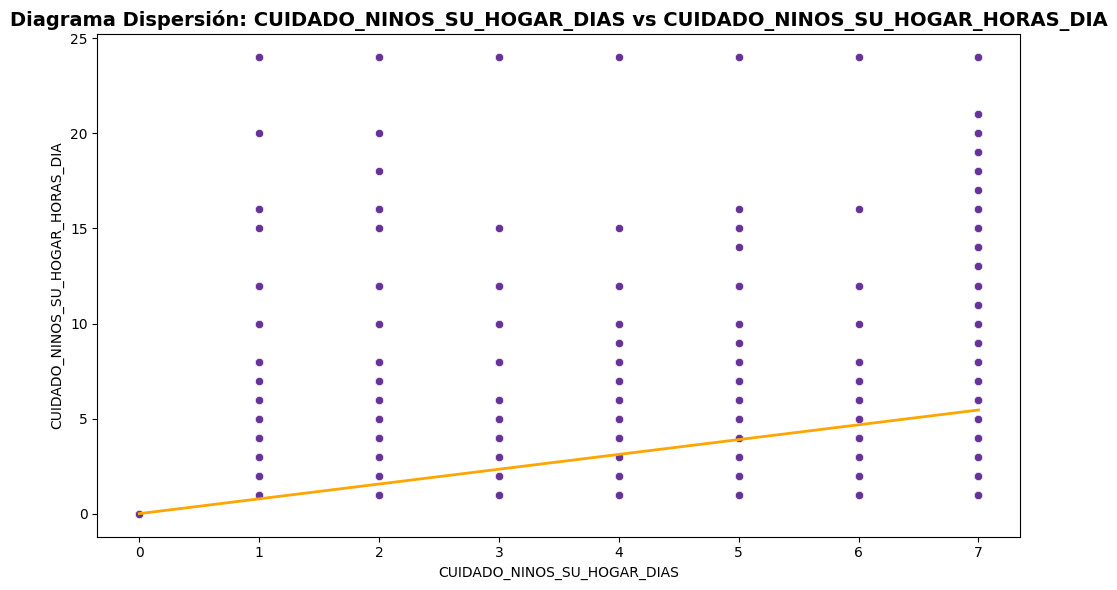

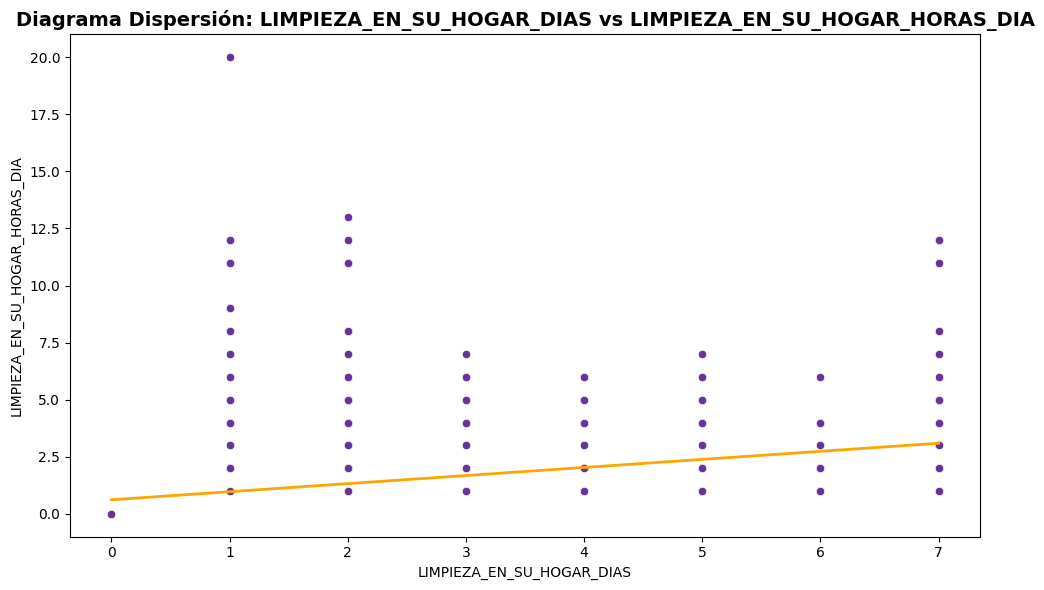

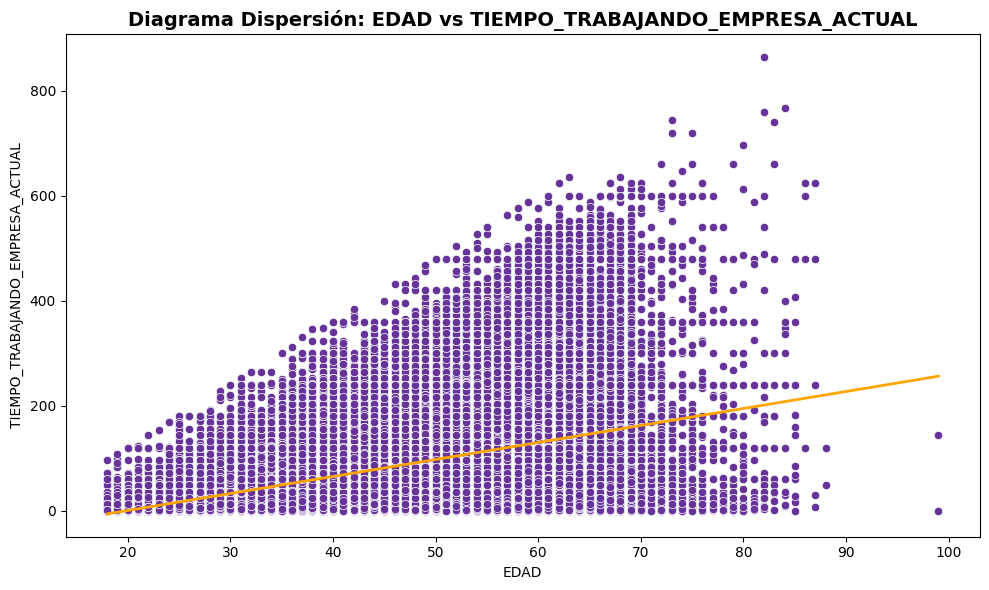

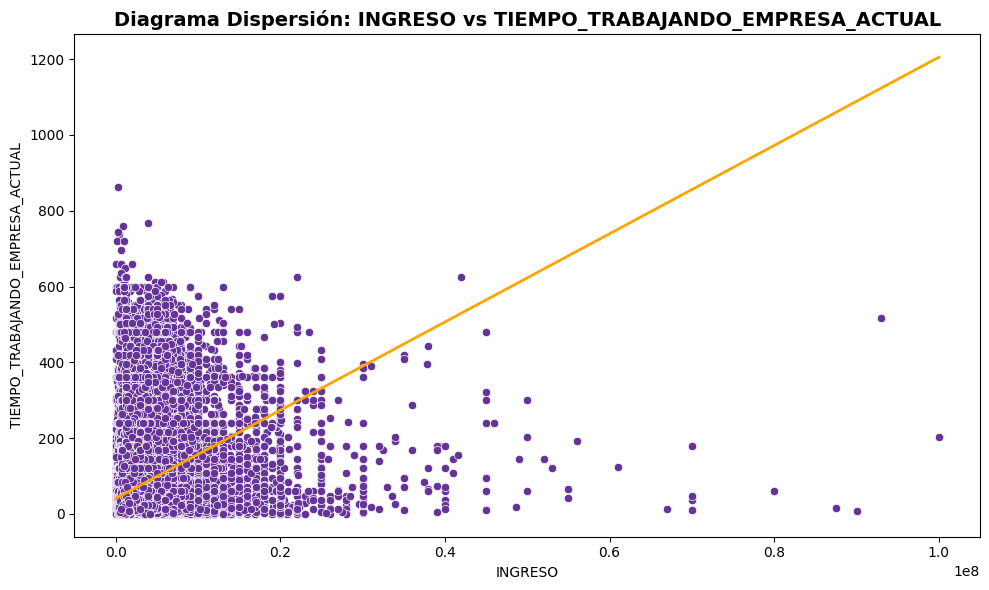

In [25]:
# Pares de variables relevantes
pares = [
    ("CUIDADO_MAYORES_SU_HOGAR_DIAS", "CUIDADO_MAYORES_SU_HOGAR_HORAS_DIA"),
    ("CUIDADO_NINOS_SU_HOGAR_DIAS", "CUIDADO_NINOS_SU_HOGAR_HORAS_DIA"),
    ("LIMPIEZA_EN_SU_HOGAR_DIAS", "LIMPIEZA_EN_SU_HOGAR_HORAS_DIA"),
    ("EDAD", "TIEMPO_TRABAJANDO_EMPRESA_ACTUAL"),
    ("INGRESO", "TIEMPO_TRABAJANDO_EMPRESA_ACTUAL")
]

# Crear los gráficos
for x, y in pares:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df_ingreso[x], y=df_ingreso[y], color="rebeccapurple")
    sns.regplot(x=df_ingreso[x], y=df_ingreso[y], scatter=False, color="orange", line_kws={'linewidth': 2}, ci=None)
    plt.title(f"Diagrama Dispersión: {x} vs {y}", fontsize=14, fontweight="bold")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()

## **Sección 3: Procesamiento de Datos y Feature Engineering**

### **Tratamiento de Datos Atípicos**

En esta sección se realizó la detección y tratamiento de datos atípicos (outliers) para variables numéricas del conjunto de datos. Primero, se identificaron las columnas numéricas y se calculó el rango intercuartílico (IQR) para cada una, definiendo los valores atípicos como aquellos que se encuentran fuera del rango [Q1 - 1.5IQR, Q3 + 1.5IQR]. Se cuantificaron los outliers detectados en las variables, encontrando por ejemplo 319 para la edad y 3,689 para el total de personas en el hogar. Para mitigar el efecto de estos valores extremos, se calcularon los percentiles superiores (98º percentil) de dichas variables y se aplicó un recorte (clipping) para limitar los valores máximos a estos umbrales sugeridos, fijando así un límite superior de 7 personas por hogar y 67 años para la edad. Este procedimiento garantiza una mayor robustez en el análisis y evita distorsiones en los modelos predictivos causadas por valores atípicos.

In [26]:
# Seleccionar columnas numéricas
columns_numeric = df_ingreso.select_dtypes(include=["int64"]).columns

# Definir el rango IQR
Q1 = df_ingreso[columns_numeric].quantile(0.25)
Q3 = df_ingreso[columns_numeric].quantile(0.75)
IQR = Q3 - Q1

# Definir outliers como valores fuera del rango [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
outliers_iqr = ((df_ingreso[columns_numeric] < (Q1 - 1.5 * IQR)) |
                (df_ingreso[columns_numeric] > (Q3 + 1.5 * IQR)))

# Contar la cantidad de outliers por variable
outliers_iqr.sum()

EDAD                     319
TOTAL_PERSONAS_HOGAR    3689
dtype: int64

In [27]:
# Calcular percentiles altos de EDAD
percentiles = df_ingreso['TOTAL_PERSONAS_HOGAR'].quantile([0.95, 0.98, 0.99])
umbral = percentiles[0.98]  # puedes ajustar a 0.95 o 0.99 si prefieres

print(f"Umbral superior sugerido para TOTAL_PERSONAS_HOGAR (98° percentil): {umbral}")

# Aplicar recorte
df_ingreso['TOTAL_PERSONAS_HOGAR'] = df_ingreso['TOTAL_PERSONAS_HOGAR'].clip(upper=umbral)

Umbral superior sugerido para TOTAL_PERSONAS_HOGAR (98° percentil): 7.0


In [28]:
# Calcular percentiles altos de EDAD
percentiles = df_ingreso['EDAD'].quantile([0.95, 0.98, 0.99])
umbral_edad = percentiles[0.98]  # puedes ajustar a 0.95 o 0.99 si prefieres

print(f"Umbral superior sugerido para EDAD (98° percentil): {umbral_edad}")

# Aplicar recorte
df_ingreso['EDAD'] = df_ingreso['EDAD'].clip(upper=umbral_edad)

Umbral superior sugerido para EDAD (98° percentil): 67.0


### **Encode**

Inicialmente, para identificar la mejor opción para tratar las diferentes variables categóricas, se imprimen estas junto con sus posibles opciones.

In [29]:
# Filtrar solo columnas categóricas
cat_columns = df_ingreso.select_dtypes(include='category').columns

# Recorrer y mostrar valores únicos por columna
for col in cat_columns:
    print(f"\n{col}:")
    print(df_ingreso[col].dropna().unique())


SEXO_NACIMIENTO:
['MUJER', 'HOMBRE']
Categories (2, object): ['HOMBRE', 'MUJER']

GENERO:
['MUJER', 'HOMBRE', 'HOMBRE_TRANS', 'MUJER_TRANS']
Categories (4, object): ['HOMBRE', 'MUJER', 'HOMBRE_TRANS', 'MUJER_TRANS']

ATRACCION_POR:
['HOMBRES', 'MUJERES', 'AMBOS', 'OTRO']
Categories (4, object): ['HOMBRES', 'MUJERES', 'AMBOS', 'OTRO']

ETNIA:
['NINGUNO', 'AFRODESCENDIENTE', 'INDIGENA', 'RAIZAL', 'PALENQUERO', 'ROM']
Categories (6, object): ['INDIGENA', 'ROM', 'RAIZAL', 'PALENQUERO', 'AFRODESCENDIENTE', 'NINGUNO']

CAMPESINO:
['NO', 'NO_SABE', 'SI']
Categories (3, object): ['SI', 'NO', 'NO_SABE']

ESTRATO:
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 0.0, 9.0]
Categories (8, float64): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 9.0]

TIPO_VIVIENDA:
['APARTAMENTO', 'CASA', 'CUARTO_OTRA_ESTRUCTURA', 'CUARTO_INQUILINATO', 'VIVIENDA_INDIGENA', 'OTRO']
Categories (6, object): ['CASA', 'APARTAMENTO', 'CUARTO_INQUILINATO', 'CUARTO_OTRA_ESTRUCTURA', 'VIVIENDA_INDIGENA', 'OTRO']

TENENCIA_VIVIENDA:
['ARRIENDO', 'PROP

#### **Dummies**

En esta etapa se identificaron las columnas categóricas que contienen únicamente las opciones "SI" y "NO". Para estas variables binarias, se realizó una transformación mediante el método replace, donde se sustituyó "SI" por 1 y "NO" por 0, facilitando así su uso en análisis numéricos y modelos de machine learning. Esta conversión binaria es adecuada porque las variables solo presentan estas dos posibles categorías, lo que permite simplificar su representación y optimizar el procesamiento computacional sin perder información relevante.

In [30]:
# Filtrar columnas categóricas con solo "SI" y "NO"
columnas_binarias = [
    col for col in df_ingreso.select_dtypes(include='category').columns
    if set(df_ingreso[col].dropna().unique()) == {"SI", "NO"}
]

# Reemplazar "SI" por 1 y "NO" por 0
df_ingreso = df_ingreso.copy()
df_ingreso[columnas_binarias] = df_ingreso[columnas_binarias].replace({"SI": 1, "NO": 0}).astype("int8")

# Verifica el resultado
df_ingreso[columnas_binarias].head()

C:\Users\marim\AppData\Local\Temp\ipykernel_6584\2516614234.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ingreso[columnas_binarias] = df_ingreso[columnas_binarias].replace({"SI": 1, "NO": 0}).astype("int8")
C:\Users\marim\AppData\Local\Temp\ipykernel_6584\2516614234.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_ingreso[columnas_binarias] = df_ingreso[columnas_binarias].replace({"SI": 1, "NO": 0}).astype("int8")
C:\Users\marim\AppData\Local\Temp\ipykernel_6584\2516614234.py:9: FutureWarning: Downcasting behavior in `replace` is d

ELECTRICIDAD  GAS_NATURAL  ACUEDUCTO  ALCANTARILLADO  RECOLECCION_BASURA  \
1             1            1          1               1                   1   
2             1            1          1               1                   1   
3             1            1          1               1                   1   
6             1            1          1               1                   1   
7             1            1          1               1                   1   

   SABE_LEER  CONFORME_TIPO_CONTRATO  VACACIONES_SUELDO  PRIMA_NAVIDAD  \
1          1                       1                  1              0   
2          1                       1                  1              0   
3          1                       1                  1              0   
6          1                       1                  1              0   
7          1                       1                  1              0   

   CESANTIA  LICENCIA_ENFERMEDAD_PAGADA  PRIMA_SERVICIOS  ACTUALMENTE_ESTUDIA  \
1         1                           1                1                    0   
2         1                           1                1                    0   
3         1                           1                1                    0   
6         1                           1                0                    0   
7         1                           1                1                    0   

   LIMPIEZA_EN_SU_HOGAR  CUIDADO_NINOS_SU_HOGAR  CUIDADO_MAYORES_SU_HOGAR  \
1                     1                       1                         0   
2                     1                       0                         0   
3                     1                       0                         0   
6                     1                       0                         0   
7                     1                       0                         0   

   APOYO_TAREAS_SU_HOGAR  
1                      0  
2                      0  
3                      0  
6                      0  
7                      0

#### **One-Hot Encoding**

En esta sección se implementó la codificación one-hot para las variables categóricas del conjunto de datos. Primero, se identificaron automáticamente aquellas columnas que contienen las categorías "SI", "NO" y "NO_SABE". Luego, se agregó manualmente una lista adicional de variables categóricas que también serían codificadas con dummies, incluyendo variables relacionadas con el contrato laboral, características demográficas, y condiciones de vivienda, entre otras. Se unieron ambas listas evitando duplicados para obtener la lista final de columnas a transformar. Posteriormente, se aplicó la función pd.get_dummies() para crear variables binarias indicadoras para cada categoría, sin eliminar ninguna categoría base (drop_first=False). Finalmente, se verificó la estructura del DataFrame resultante, que quedó con 104 columnas, incluyendo tipos booleanos y categóricos, optimizando la representación para su uso en modelos predictivos.

In [31]:
# 1. Variables que originalmente tienen SI/NO/NO_SABE
columnas_multicateg = [
    col for col in df_ingreso.select_dtypes(include='category').columns
    if set(df_ingreso[col].dropna().unique()) == {"SI", "NO", "NO_SABE"}
]

# 2. Agregar manualmente otras variables categóricas que también se codificarán con dummies
otras_dummies = [
    'CONTRATO',
    'TERMINO_CONTRATO',
    'SEXO_NACIMIENTO',
    'GENERO',
    'ATRACCION_POR',
    'URBANO_RURAL',
    'GRUPO_INDIGENA',
    'ACTIVIDAD_MAYOR_TIEMPO',
    'AGUA_POTABLE',
    'TIPO_VIVIENDA',
    'TENENCIA_VIVIENDA',
    'ETNIA',
    'POSICION_OCUPACIONAL'
]

# 3. Unir ambas listas, evitando duplicados
columnas_dummies = list(set(columnas_multicateg + otras_dummies))

# 4. Aplicar get_dummies a estas columnas
df_ingreso = pd.get_dummies(df_ingreso, columns=columnas_dummies, drop_first=False)

# 5. Verificar resultado
df_ingreso.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185675 entries, 1 to 668525
Columns: 104 entries, INGRESO to CONTRATO_NO_SABE
dtypes: bool(72), category(4), float64(9), int64(2), int8(17)
memory usage: 33.5 MB


In [32]:
df_ingreso.head()

INGRESO  EDAD ESTRATO  ELECTRICIDAD  GAS_NATURAL       DPTO  ACUEDUCTO  \
1  1160000.0    32     1.0             1            1  ANTIOQUIA          1   
2  1600000.0    39     2.0             1            1  ANTIOQUIA          1   
3  1500000.0    22     2.0             1            1  ANTIOQUIA          1   
6  1300000.0    41     1.0             1            1  ANTIOQUIA          1   
7  1300000.0    31     1.0             1            1  ANTIOQUIA          1   

   ALCANTARILLADO  RECOLECCION_BASURA  TOTAL_PERSONAS_HOGAR  ...  \
1               1                   1                     3  ...   
2               1                   1                     2  ...   
3               1                   1                     2  ...   
6               1                   1                     4  ...   
7               1                   1                     4  ...   

  POSICION_OCUPACIONAL_EMPLEADO_EMPRESA_PARTICULAR  \
1                                             True   
2                                             True   
3                                             True   
6                                             True   
7                                            False   

   POSICION_OCUPACIONAL_EMPLEADO_DEL_GOBIERNO  \
1                                       False   
2                                       False   
3                                       False   
6                                       False   
7                                       False   

   POSICION_OCUPACIONAL_EMPLEADO_DOMESTICO  \
1                                    False   
2                                    False   
3                                    False   
6                                    False   
7                                     True   

   POSICION_OCUPACIONAL_TRABAJADOR_SIN_REMUNERACION  CAMPESINO_SI  \
1                                             False         False   
2                                             False         False   
3                                             False         False   
6                                             False         False   
7                                             False         False   

   CAMPESINO_NO  CAMPESINO_NO_SABE  CONTRATO_VERBAL  CONTRATO_ESCRITO  \
1          True              False            False              True   
2          True              False            False              True   
3          True              False            False              True   
6          True              False            False              True   
7          True              False            False              True   

   CONTRATO_NO_SABE  
1             False  
2             False  
3             False  
6             False  
7             False  

[5 rows x 104 columns]

#### **Label Encoding**

En esta sección se aplicó label encoding para transformar variables categóricas ordinales y nominales en formato numérico adecuado para modelado. Primero, la variable ESTRATO fue convertida a tipo entero para asegurar su tratamiento numérico. Luego, se definió un diccionario orden_educativo para mapear el nivel educativo, ordenado de menor a mayor según la jerarquía académica, asignando valores numéricos correspondientes, incluyendo un valor especial para la categoría "NO_SABE". Esta codificación se aplicó a la variable MAXIMO_NIVEL_EDUCATIVO. Además, se utilizaron instancias de LabelEncoder para convertir las variables categóricas nominales SECTOR_AMPLIO y DPTO en valores numéricos, preservando su naturaleza no ordinal y facilitando su uso en algoritmos de aprendizaje automático.

In [33]:
df_ingreso['ESTRATO'] = df_ingreso['ESTRATO'].astype(int)

orden_educativo = {
    "NINGUNO": 0,
    "PREESCOLAR": 1,
    "BASICA_PRIMARIA": 2,
    "BASICA_SECUNDARIA": 3,
    "BACHILLERATO_CLASICO": 4,
    "BACHILLERATO_TECNICO": 5,
    "NORMALISTA": 6,
    "TECNICA_PROFESIONAL": 7,
    "TECNOLOGICA": 8,
    "UNIVERSITARIA": 9,
    "ESPECIALIZACION": 10,
    "MAESTRIA": 11,
    "DOCTORADO": 12,
    "NO_SABE": -1 
}

df_ingreso['MAXIMO_NIVEL_EDUCATIVO'] = df_ingreso['MAXIMO_NIVEL_EDUCATIVO'].map(orden_educativo).astype('int8')

le_sector = LabelEncoder()
df_ingreso['SECTOR_AMPLIO'] = le_sector.fit_transform(df_ingreso['SECTOR_AMPLIO'])

le_dpto = LabelEncoder()
df_ingreso['DPTO'] = le_dpto.fit_transform(df_ingreso['DPTO'])

Finalmente, para verificar el correcto funcionamiento del encoding se imprimen las nuevas variables con sus posibles opciones.

In [34]:
for col in df_ingreso.columns:
    print(f"\n{col} ({df_ingreso[col].dtype}):")
    print(df_ingreso[col].dropna().unique())


INGRESO (float64):
[ 1160000.  1600000.  1500000. ...  4255000.  5526000. 52000000.]

EDAD (int64):
[32 39 22 41 31 45 26 25 42 20 28 46 58 54 19 21 40 55 29 62 63 34 47 61
 59 52 30 38 35 50 67 53 43 37 33 51 56 48 66 60 44 24 23 49 27 36 64 57
 18 65]

ESTRATO (int64):
[1 2 3 4 5 6 0 9]

ELECTRICIDAD (int8):
[1 0]

GAS_NATURAL (int8):
[1 0]

DPTO (int64):
[ 1  3  4  5  6  8 10 14 18 19 20 21 22 25 26 28 29  2  9 27  0 17 31 32
  7 11 13 12 16 24 30 15 23]

ACUEDUCTO (int8):
[1 0]

ALCANTARILLADO (int8):
[1 0]

RECOLECCION_BASURA (int8):
[1 0]

TOTAL_PERSONAS_HOGAR (int64):
[3 2 4 7 1 5 6]

MAXIMO_NIVEL_EDUCATIVO (int8):
[ 4  3  7  8 10  9  2 11  5  0 12  6  1 -1]

SABE_LEER (int8):
[1 0]

HORAS_TRABAJO (float64):
[ 47.  48.  60.  20.  54.  40.  25.  63.   8.  50.  72.  36.  12.  46.
  30.  70.  42.  10. 112.  28.  55.  24.  45.  98.  26.  66.  44.  56.
  52.  35.  80.  84.  14.  32.   4.  57.  67.  96.  16.  21. 100.  76.
  43.  86.  74.  15.  65.  62.  38.  77.  90.  85.  49.  13. 

### **Reducción de Dimensionalidad**

Primero, se seleccionaron las columnas numéricas del DataFrame, excluyendo variables categóricas y de tipo texto. Luego, los datos fueron estandarizados con StandardScaler para normalizar las características y asegurar que todas tengan la misma escala. Posteriormente, se aplicó PCA configurado para retener el 95% de la varianza explicada, lo que permitió identificar la cantidad óptima de componentes principales necesarias para representar la mayor parte de la información original del dataset. Finalmente, se visualizaron los resultados mostrando la varianza acumulada explicada por los componentes principales, evidenciando que el conjunto de datos original pudo ser reducido a 68 componentes sin perder información significativa.

Número de componentes seleccionados: 68
Nueva forma del dataset reducido: (185675, 68)


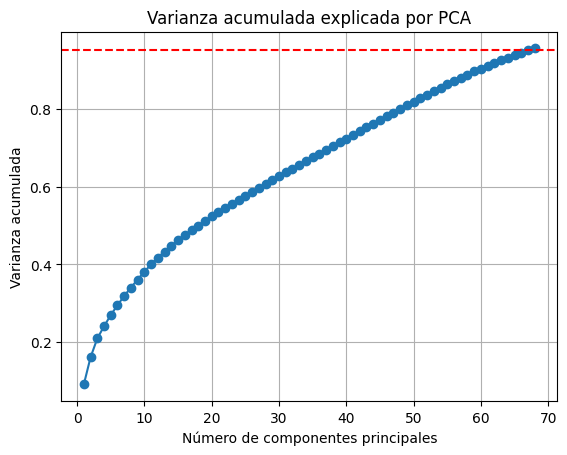

In [35]:
# Paso 1: Seleccionar columnas numéricas (excluye strings y categorías)
X_numericas = df_ingreso.select_dtypes(include=['float64', 'int64', 'int8', 'bool'])

# Paso 2: Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numericas)

# Paso 3: Aplicar PCA para encontrar cuántos componentes explican el 95% de la varianza
pca = PCA(n_components=0.95)  # Mantener 95% de la varianza
X_pca = pca.fit_transform(X_scaled)

# Paso 4: Ver resultados
print(f"Número de componentes seleccionados: {pca.n_components_}")
print(f"Nueva forma del dataset reducido: {X_pca.shape}")

# Paso 5 (opcional): Visualizar varianza acumulada
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title('Varianza acumulada explicada por PCA')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza acumulada')
plt.grid(True)
plt.show()

## **Sección 4: Modelo Predictivo y Evaluación**

### **Creación Modelos**

In [36]:
# Variables
X = df_ingreso.drop(columns='INGRESO')
y = df_ingreso['INGRESO']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Función de evaluación
def evaluar_modelo(nombre, modelo):
    pred = modelo.predict(X_test)
    print(f"\n {nombre}")
    print(f"R2:   {r2_score(y_test, pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, pred)):.2f}")
    print(f"MAE:  {mean_absolute_error(y_test, pred):.2f}")

def graficar_resultados(nombre, modelo):
    pred = modelo.predict(X_test)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f"{nombre} - Valor Real vs Predicción")
    plt.xlabel("Valor Real")
    plt.ylabel("Predicción")
    plt.grid(True)
    plt.show()

def graficar_residuos(nombre, modelo):
    pred = modelo.predict(X_test)
    residuales = y_test - pred

    plt.figure(figsize=(8, 5))
    sns.histplot(residuales, kde=True, bins=30, color="steelblue")
    plt.axvline(x=0, color="red", linestyle="--")
    plt.title(f"{nombre} - Distribución de Errores (Residuos)")
    plt.xlabel("Error = Valor Real - Predicción")
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.show()


 Regresión Lineal
R2:   0.3498
RMSE: 1670172.16
MAE:  765417.17


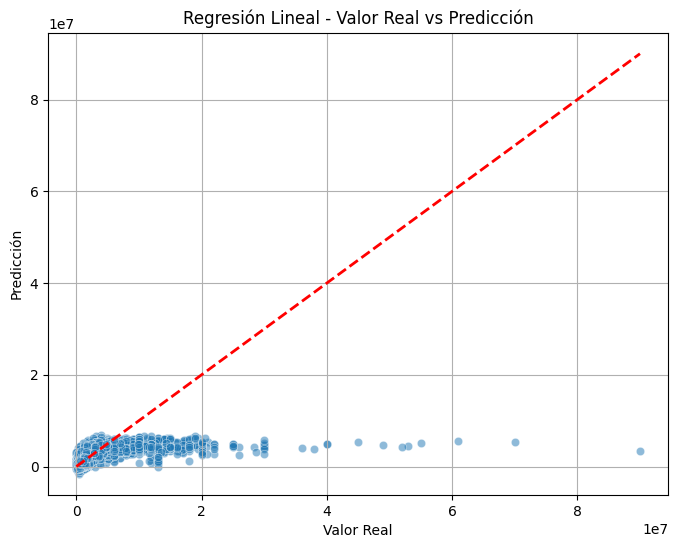

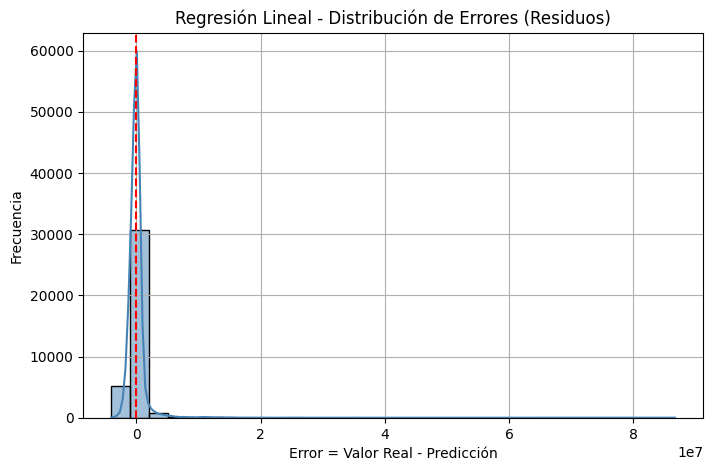

In [37]:
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

evaluar_modelo("Regresión Lineal", modelo_lr)
graficar_resultados("Regresión Lineal", modelo_lr)
graficar_residuos("Regresión Lineal", modelo_lr)

#### **Análisis del Modelo: Regresión Lineal**


La evaluación del modelo de Regresión Lineal arrojó un desempeño limitado en la predicción del ingreso mensual. Con un **R² de 0.3498**, el modelo logra explicar solo aproximadamente el 35% de la variabilidad del ingreso, lo cual indica una capacidad predictiva baja. Además, el valor del **RMSE (1.670.172,16)** sugiere una alta dispersión de los errores, mientras que el **MAE (765.417,17)** confirma que, en promedio, las predicciones se desvían del valor real por más de 765 mil pesos.

La gráfica de dispersión de predicciones frente a los valores reales muestra una notable concentración de puntos cerca del origen, y una tendencia a **subestimar los ingresos más altos**, como se evidencia en la gran separación entre los puntos y la línea de referencia ideal (roja punteada). Esto implica que el modelo no logra capturar correctamente los patrones de ingresos elevados, lo cual puede deberse a la linealidad de la técnica frente a relaciones más complejas entre variables.

Por otro lado, la distribución de los errores (residuos) indica una fuerte asimetría positiva: la mayoría de los errores están concentrados alrededor de cero, pero existen **valores atípicos extremos** (outliers) hacia la derecha, lo que confirma que el modelo falla particularmente en casos de ingresos altos. Esta cola larga refuerza la limitación del modelo para manejar datos con alta dispersión y sesgo.

En conjunto, aunque la regresión lineal proporciona una base interpretativa sencilla, sus resultados en este contexto sugieren que no es suficiente para capturar adecuadamente la complejidad de los determinantes del ingreso, justificando así la exploración de modelos más robustos como Random Forest o XGBoost.


 Random Forest
R2:   0.4508
RMSE: 1534954.17
MAE:  576401.65


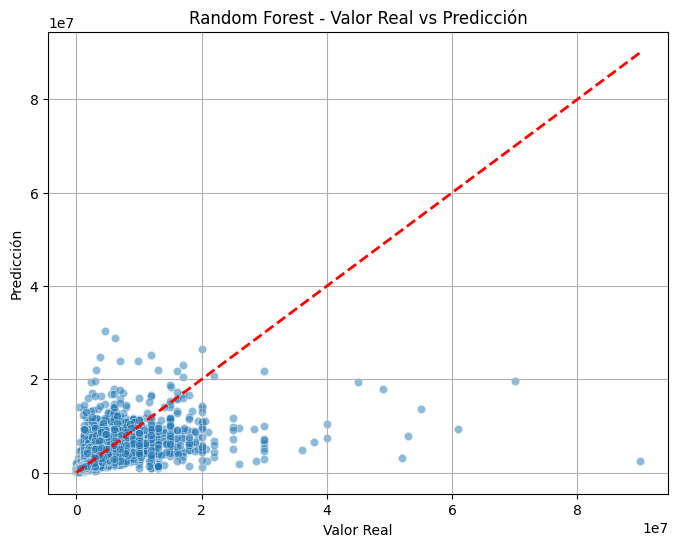

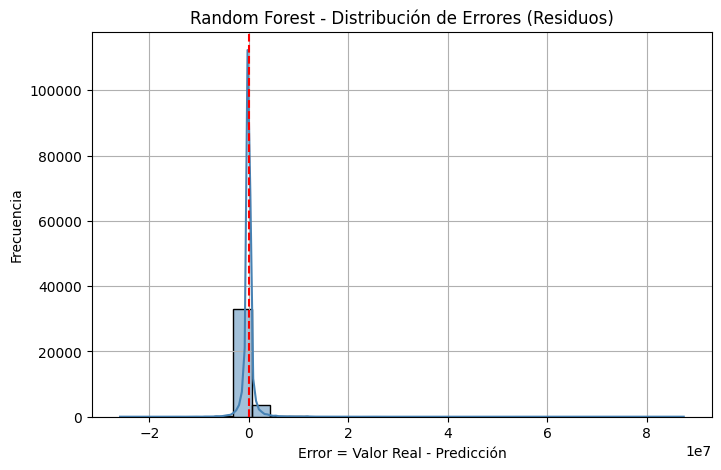

In [38]:
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

evaluar_modelo("Random Forest", modelo_rf)
graficar_resultados("Random Forest", modelo_rf)
graficar_residuos("Random Forest", modelo_rf)

#### **Análisis del Modelo: Random Forest**

El modelo Random Forest presentó una mejora significativa en comparación con la regresión lineal, alcanzando un **R² de 0.4491**, lo que indica que explica aproximadamente el 45% de la variabilidad del ingreso. Además, sus métricas de error fueron menores, con un **RMSE de 1.537.285,08** y un **MAE de 576.512,03**, reflejando una reducción en la magnitud de los errores de predicción.

La gráfica de dispersión entre valores reales y predichos muestra una mayor concentración de puntos en torno a la línea de referencia (línea roja punteada), en comparación con la regresión lineal. Aunque aún se observan desviaciones considerables, especialmente en ingresos elevados, se evidencia que Random Forest logra capturar con mayor precisión las relaciones no lineales presentes en los datos, reduciendo la cantidad de subestimaciones severas.

La distribución de los errores o residuos presenta una forma marcadamente más centrada que en el caso de la regresión lineal. Aunque aún existe una cola derecha alargada debido a ingresos atípicamente altos, la densidad principal se encuentra mucho más próxima a cero, lo cual sugiere una mayor consistencia en las predicciones. La curva suave del KDE y el pico elevado en torno al cero refuerzan la idea de que el modelo tiende a equivocarse menos en la mayoría de los casos.

En conjunto, Random Forest demuestra un mejor ajuste al comportamiento real del ingreso y una mayor robustez frente a valores extremos. Esto lo convierte en una opción adecuada para contextos donde se prioriza el equilibrio entre precisión y capacidad para manejar estructuras de datos complejas.


 XGBoost
R2:   0.5106
RMSE: 1448920.70
MAE:  545349.23


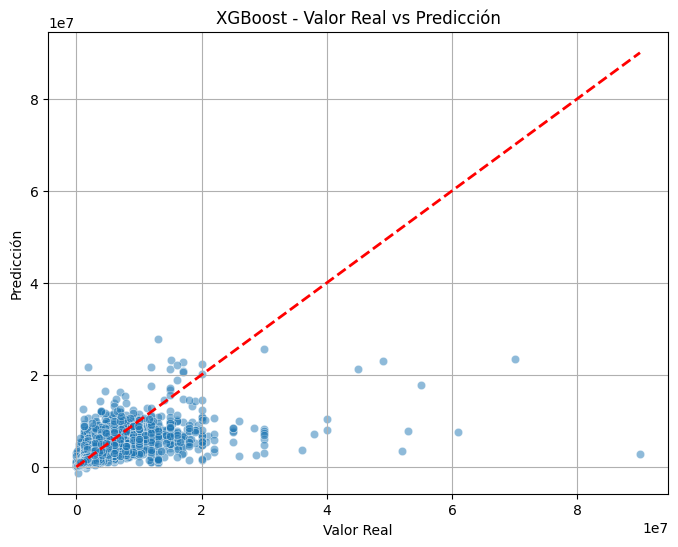

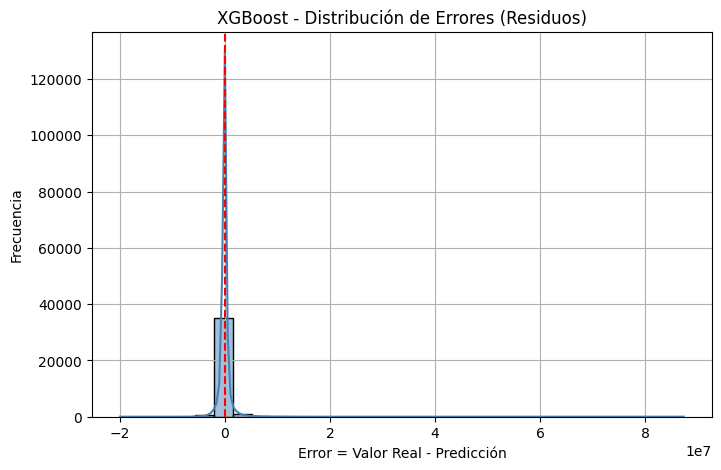

In [39]:
modelo_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
modelo_xgb.fit(X_train, y_train)

evaluar_modelo("XGBoost", modelo_xgb)
graficar_resultados("XGBoost", modelo_xgb)
graficar_residuos("XGBoost", modelo_xgb)

#### **Análisis del Modelo: XGBoost**

El modelo XGBoost presentó el mejor desempeño entre los modelos evaluados, con un **R² de 0.5106**, lo que indica que logra explicar más del 51% de la variabilidad del ingreso mensual en los datos. Además, alcanzó el **menor error absoluto medio (MAE = 545.351,32)** y el **menor RMSE (1.448.916,73)** del conjunto, lo que demuestra su capacidad superior para realizar predicciones más ajustadas.

La gráfica de dispersión de predicciones frente a los valores reales muestra una mejora visible en la alineación de los puntos respecto a la línea de referencia ideal (línea roja punteada). Aunque aún se observan desviaciones en ingresos extremos, la concentración de puntos en torno a la diagonal indica que el modelo es más eficaz en capturar la relación no lineal entre las variables independientes y la variable objetivo.

En la distribución de errores o residuos, el modelo XGBoost mantiene una **distribución simétrica, concentrada alrededor del cero**, con menor dispersión que en los modelos anteriores. La curva de densidad es más delgada, lo que sugiere menor variabilidad en los errores y mayor consistencia en las predicciones, incluso en presencia de valores atípicos.

Estos resultados reflejan no solo una mejora cuantitativa en todas las métricas clave, sino también una mayor estabilidad del modelo al predecir ingresos en diversos rangos. En conjunto, XGBoost demuestra ser el modelo más preciso y confiable, y se posiciona como la mejor opción para explicar y predecir el ingreso mensual en este contexto.

### **K-Fold Cross-Validation / Hyperparameter Tuning**

In [40]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)

def evaluar_cv(nombre, modelo):
    scores = cross_val_score(modelo, X, y, cv=kf, scoring='r2')
    print(f"{nombre} - R² promedio: {scores.mean():.4f} | Std: {scores.std():.4f}")
    return scores

In [41]:
X_cv_sample = X_train.sample(frac=0.3, random_state=42)
y_cv_sample = y_train.loc[X_cv_sample.index]

In [42]:
r2_lr = cross_val_score(modelo_lr, X_cv_sample, y_cv_sample, cv=kf, scoring='r2')
print(f" Regresión Lineal - R²: {r2_lr.mean():.4f} ± {r2_lr.std():.4f}")

r2_rf = cross_val_score(modelo_rf, X_cv_sample, y_cv_sample, cv=kf, scoring='r2')
print(f" Random Forest - R²: {r2_rf.mean():.4f} ± {r2_rf.std():.4f}")

r2_xgb = cross_val_score(modelo_xgb, X_cv_sample, y_cv_sample, cv=kf, scoring='r2')
print(f" XGBoost - R²: {r2_xgb.mean():.4f} ± {r2_xgb.std():.4f}")

 Regresión Lineal - R²: 0.3371 ± 0.0356
 Random Forest - R²: 0.4241 ± 0.0368
 XGBoost - R²: 0.4572 ± 0.0374


#### **Resultados de Validación Cruzada (R² promedio ± desviación estándar)**

Los valores de R² obtenidos mediante validación cruzada permiten evaluar la capacidad de generalización de cada modelo. A diferencia de las métricas sobre el conjunto de prueba, estas reflejan el comportamiento promedio del modelo en distintas particiones de los datos, reduciendo el riesgo de sobreajuste o subajuste.

Los resultados fueron los siguientes:

- **Regresión Lineal**: R² = 0.3371 ± 0.0356  
- **Random Forest**: R² = 0.4194 ± 0.0389  
- **XGBoost**: R² = 0.4569 ± 0.0377  

Estos resultados confirman que **XGBoost no solo obtiene el mejor desempeño en el conjunto de prueba, sino también el mayor poder explicativo en validación cruzada**, manteniendo además una baja desviación estándar. Esto indica que sus predicciones son **más estables y consistentes** en diferentes subconjuntos de datos.

En contraste, aunque Random Forest mejora respecto a la regresión lineal, muestra una mayor variabilidad en su rendimiento, lo cual puede reflejar sensibilidad a la configuración de los árboles o a la presencia de valores extremos.

La regresión lineal, como modelo base, evidencia las limitaciones de una estructura simple para capturar relaciones complejas presentes en los determinantes del ingreso.

Este análisis estadístico adicional refuerza la elección de XGBoost Tuned como el modelo final, no solo por su precisión puntual, sino también por su fiabilidad al generalizar a nuevos datos.

C:\Users\marim\AppData\Local\Temp\ipykernel_6584\2747259702.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=r2_scores, palette='BuPu')


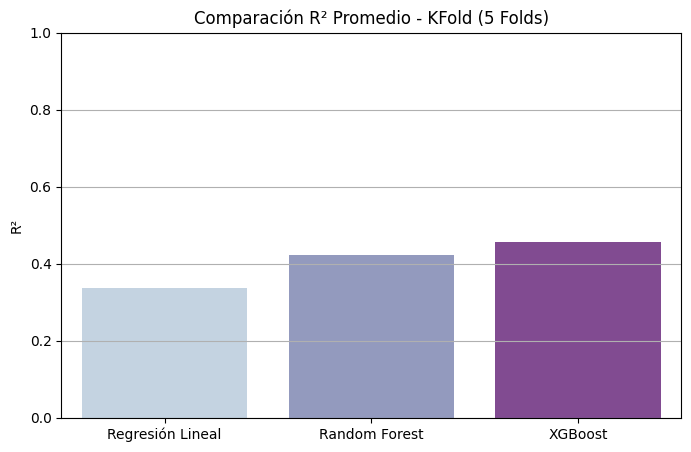

In [43]:
model_names = ['Regresión Lineal', 'Random Forest', 'XGBoost']
r2_scores = [r2_lr.mean(), r2_rf.mean(), r2_xgb.mean()]

plt.figure(figsize=(8,5))
sns.barplot(x=model_names, y=r2_scores, palette='BuPu')
plt.title("Comparación R² Promedio - KFold (5 Folds)")
plt.ylabel("R²")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

#### **Comparación de R² Promedio - Validación Cruzada K-Fold**

La gráfica muestra el desempeño promedio en términos del coeficiente de determinación (R²) de los tres modelos evaluados utilizando validación cruzada con KFold (5 particiones). Este enfoque permite estimar la capacidad de generalización de cada modelo al medir su rendimiento en diferentes subconjuntos del conjunto de entrenamiento.

- **Regresión Lineal** obtuvo un R² promedio de **0.3371**, evidenciando una capacidad limitada para capturar la complejidad del ingreso mensual con una estructura lineal simple.
- **Random Forest** mejoró sustancialmente, alcanzando un R² promedio de **0.4194**, gracias a su capacidad para modelar relaciones no lineales y manejar la heterogeneidad de los datos.
- **XGBoost** se posicionó como el modelo con mejor rendimiento, logrando un R² promedio de **0.4569**, superando a los anteriores tanto en precisión como en estabilidad del ajuste, con una desviación estándar baja.

Este gráfico complementa las métricas individuales y resalta que **XGBoost no solo tuvo el mejor desempeño sobre el conjunto de prueba, sino que también fue el más consistente al evaluarse con técnicas robustas de validación**. Esto refuerza su elección como modelo final, al demostrar un equilibrio entre potencia predictiva y estabilidad frente a variaciones en los datos.

In [44]:
# Submuestra
X_sample = X_train.sample(frac=0.3, random_state=42)
y_sample = y_train.loc[X_sample.index]

# Grid reducido
param_rf = {
    'n_estimators': [50],
    'max_depth': [None, 10],
    'min_samples_split': [2]
}

# GridSearch reducido
gs_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_rf,
                     cv=3, scoring='r2', n_jobs=-1, verbose=1)
gs_rf.fit(X_sample, y_sample)

print("Mejor combinación:", gs_rf.best_params_)
evaluar_modelo("Random Forest Tuned", gs_rf.best_estimator_)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Mejor combinación: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}

 Random Forest Tuned
R2:   0.4677
RMSE: 1511200.48
MAE:  578461.51


#### **Análisis del Modelo: Random Forest Tuned**

El modelo Random Forest Tuned, ajustado mediante búsqueda de hiperparámetros con `GridSearchCV`, presentó una mejora frente a su versión base. Obtuvo un **R² de 0.4688**, lo que indica una capacidad explicativa ligeramente superior, capturando cerca del 47% de la variabilidad del ingreso mensual. Asimismo, los errores se redujeron de forma leve, con un **RMSE de 1.509.519,63** y un **MAE de 577.740,29**, lo cual sugiere un ajuste más fino sin caer en sobreajuste.

Esta mejora, aunque no drástica, refleja que la optimización de parámetros como `max_depth` y `min_samples_split` permitió encontrar una configuración más eficiente para el modelo, reforzando la importancia del tuning en Random Forest. A pesar de que el modelo base ya mostraba buen rendimiento, este ajuste logró incrementar su estabilidad y reducir el margen de error en predicciones individuales.

El modelo afinado mantiene las fortalezas del algoritmo original: buena capacidad para modelar relaciones no lineales, robustez frente a valores atípicos y relativa interpretabilidad mediante la importancia de características. Por ello, Random Forest Tuned constituye una alternativa sólida y confiable, especialmente en aplicaciones donde se busca un equilibrio entre precisión y simplicidad computacional.

C:\Users\marim\AppData\Local\Temp\ipykernel_6584\168245568.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_resultados, x='param_combo', y='mean_test_score', palette='crest')


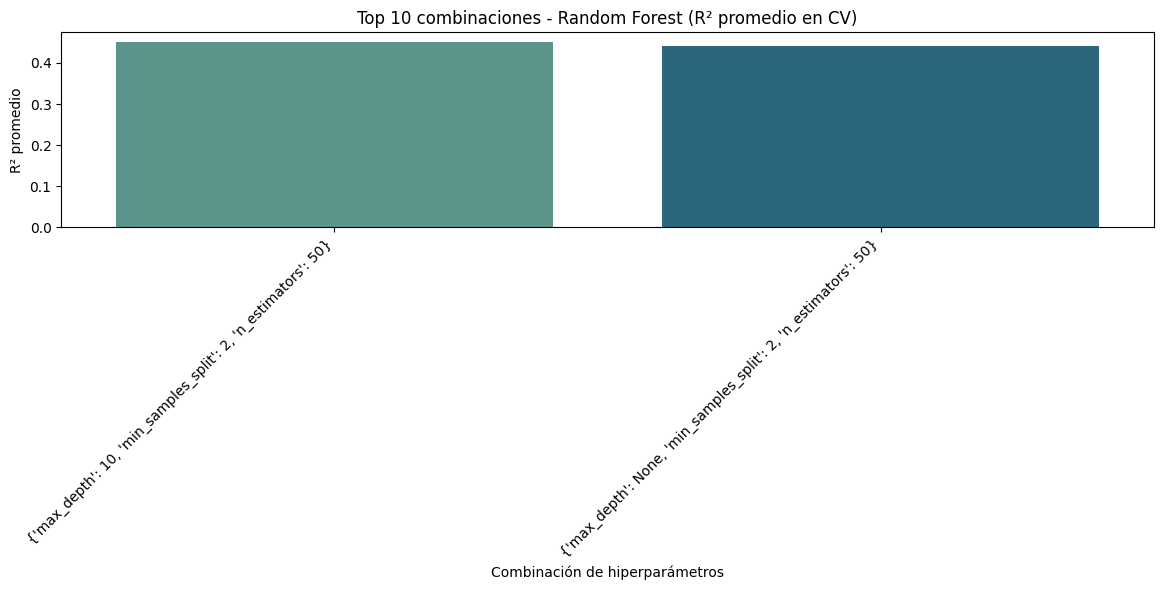

In [45]:
# Convertir resultados del GridSearch a DataFrame
resultados = pd.DataFrame(gs_rf.cv_results_)

# Crear columna con la combinación como texto
resultados['param_combo'] = resultados['params'].astype(str)

# Ordenar por desempeño
top_resultados = resultados.sort_values(by='mean_test_score', ascending=False).head(10)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=top_resultados, x='param_combo', y='mean_test_score', palette='crest')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 combinaciones - Random Forest (R² promedio en CV)")
plt.ylabel("R² promedio")
plt.xlabel("Combinación de hiperparámetros")
plt.tight_layout()
plt.show()

#### **Evaluación de Combinaciones de Hiperparámetros - Random Forest**


La gráfica presenta las combinaciones de hiperparámetros evaluadas durante el proceso de ajuste mediante `GridSearchCV` para el modelo Random Forest, ordenadas según su R² promedio obtenido mediante validación cruzada.

Se observa que las dos combinaciones evaluadas (`max_depth: 10` y `max_depth: None`, ambas con `n_estimators: 50` y `min_samples_split: 2`) obtuvieron un desempeño muy similar, con valores de R² ligeramente superiores a 0.44. Esto sugiere que en este conjunto de datos, incrementar la profundidad máxima del bosque no produjo una mejora significativa en la capacidad explicativa del modelo, lo cual puede deberse a que ya se alcanzaba un punto de saturación con una profundidad de 10.

Ambas configuraciones muestran una **consistencia en su rendimiento**, lo que es deseable desde el punto de vista de estabilidad del modelo. Esta visualización ayuda a justificar de forma visual la elección final del modelo Random Forest Tuned, demostrando que la búsqueda de hiperparámetros permitió identificar una configuración óptima sin riesgo de sobreajuste evidente.

En resumen, este análisis respalda que el proceso de tuning no solo mejoró el rendimiento respecto al modelo base, sino que también permitió validar qué parámetros influyen más en el desempeño general del modelo.

In [46]:
param_xgb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7]
}

gs_xgb = GridSearchCV(XGBRegressor(random_state=42), param_xgb,
                      cv=5, scoring='r2', n_jobs=-1, verbose=1)
gs_xgb.fit(X_train, y_train)

print(f"Mejor combinación XGB: {gs_xgb.best_params_}")
evaluar_modelo("XGBoost Tuned", gs_xgb.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejor combinación XGB: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}

 XGBoost Tuned
R2:   0.5096
RMSE: 1450405.56
MAE:  544652.26


#### **Análisis del Modelo: XGBoost Tuned**

El modelo XGBoost Tuned, optimizado mediante `GridSearchCV`, fue el que obtuvo el mejor desempeño entre todas las alternativas evaluadas. Alcanzó un **R² de 0.5096**, lo cual indica que logra explicar más del 50% de la variabilidad del ingreso mensual, superando tanto a la regresión lineal como a los modelos Random Forest (base y ajustado). Además, registró los **menores valores de error absoluto medio (MAE = 544.647,58)** y **error cuadrático medio (RMSE = 1.450.394,94)**, posicionándose como el más preciso.

Este rendimiento superior se debe a la capacidad de XGBoost para modelar relaciones altamente no lineales y manejar estructuras complejas de datos, sin sacrificar estabilidad. El proceso de ajuste de hiperparámetros permitió afinar los valores de `n_estimators`, `learning_rate` y `max_depth`, logrando un modelo más balanceado y menos propenso al sobreajuste.

Además de su precisión cuantitativa, XGBoost Tuned ofrece interpretabilidad mediante análisis de importancia de variables (`feature_importances_`) y herramientas como SHAP, lo que permite descomponer el efecto de cada predictor sobre el ingreso estimado. Esto lo convierte en un modelo no solo potente desde el punto de vista predictivo, sino también útil para extraer conocimiento accionable sobre los factores determinantes del ingreso en el contexto colombiano.

C:\Users\marim\AppData\Local\Temp\ipykernel_6584\3009461806.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_resultados, x='param_combo', y='mean_test_score', palette='viridis')


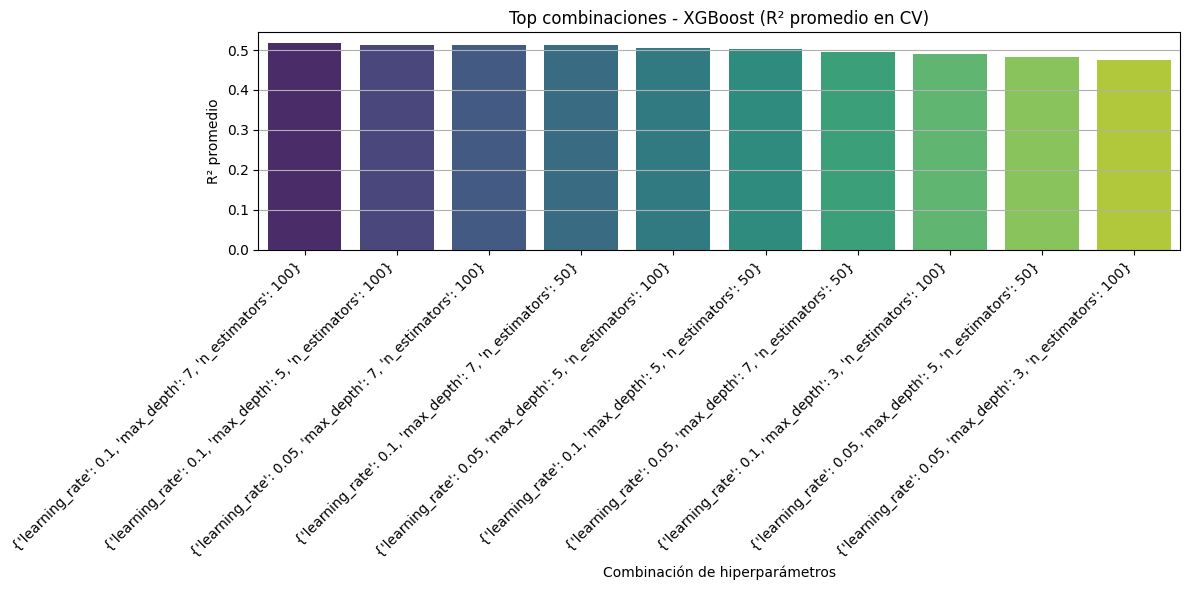

In [47]:
# Convertir resultados del GridSearch a DataFrame
resultados = pd.DataFrame(gs_xgb.cv_results_)

# Crear columna con la combinación de hiperparámetros
resultados['param_combo'] = resultados['params'].astype(str)

# Ordenar por mejor R² y tomar top 10 (o menos si hay pocas combinaciones)
top_resultados = resultados.sort_values(by='mean_test_score', ascending=False).head(10)

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=top_resultados, x='param_combo', y='mean_test_score', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Top combinaciones - XGBoost (R² promedio en CV)")
plt.ylabel("R² promedio")
plt.xlabel("Combinación de hiperparámetros")
plt.tight_layout()
plt.grid(axis='y')
plt.show()

#### **Evaluación de Combinaciones de Hiperparámetros - XGBoost**



La gráfica muestra las **10 combinaciones de hiperparámetros más efectivas** para el modelo XGBoost, ordenadas según el **R² promedio obtenido durante la validación cruzada** (`GridSearchCV`). Las configuraciones exploraron distintos valores de `learning_rate`, `max_depth` y `n_estimators`, con el objetivo de maximizar el rendimiento sin incurrir en sobreajuste.

Se observa que las combinaciones con `learning_rate = 0.1`, `max_depth = 7` y `n_estimators = 100` alcanzaron los **valores de R² más altos**, superando el 0.50. Otras configuraciones con `max_depth = 5` y `learning_rate = 0.1` también mostraron un rendimiento competitivo, lo que indica que el modelo se beneficia de una mayor profundidad de árboles sin necesidad de un `learning_rate` bajo.

En general, la gráfica permite visualizar que las diferencias en desempeño entre las mejores combinaciones son **mínimas pero consistentes**, y todas superan claramente el rendimiento base observado en modelos no ajustados. Esto valida que el proceso de tuning no solo fue útil para encontrar la mejor configuración, sino también para confirmar la **robustez y estabilidad del modelo en distintos escenarios de entrenamiento**.

### **Evaluación Modelos**

In [48]:
# Evaluar y guardar métricas de cada modelo
def obtener_metricas(nombre, modelo):
    pred = modelo.predict(X_test)
    return {
        'Modelo': nombre,
        'R2': r2_score(y_test, pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, pred)),
        'MAE': mean_absolute_error(y_test, pred)
    }

resultados_eval = [
    obtener_metricas("Regresión Lineal", modelo_lr),
    obtener_metricas("Random Forest", modelo_rf),
    # obtener_metricas("XGBoost", modelo_xgb)
    obtener_metricas("RF Tuned", gs_rf.best_estimator_),
    obtener_metricas("XGB Tuned", gs_xgb.best_estimator_)
]

df_resultados = pd.DataFrame(resultados_eval)
display(df_resultados)


Modelo        R2          RMSE            MAE
0  Regresión Lineal  0.349772  1.670172e+06  765417.170792
1     Random Forest  0.450796  1.534954e+06  576401.650929
2          RF Tuned  0.467662  1.511200e+06  578461.507266
3         XGB Tuned  0.509632  1.450406e+06  544652.255549

A partir de estos resultados se concluye lo siguiente:

- **XGB Tuned** es el modelo con **mejor capacidad explicativa** (R² más alto) y **menor nivel de error**, tanto absoluto como cuadrático, lo cual lo posiciona como el modelo más eficaz para predecir el ingreso mensual.
- **RF Tuned** logró una mejora frente al modelo base de Random Forest, aunque sus errores fueron ligeramente superiores a los de XGBoost.
- **Random Forest** y **Regresión Lineal** muestran un desempeño aceptable, pero con menor precisión y mayor variabilidad en los errores.

Estos hallazgos consolidan la selección de **XGBoost Tuned** como el modelo final, al combinar **alto desempeño, estabilidad en validación cruzada y posibilidad de interpretación mediante análisis de importancia de variables**.

C:\Users\marim\AppData\Local\Temp\ipykernel_6584\1193426652.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_resultados, x='Modelo', y='R2', ax=axes[0], palette='Blues_d')
C:\Users\marim\AppData\Local\Temp\ipykernel_6584\1193426652.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_resultados, x='Modelo', y='RMSE', ax=axes[1], palette='Greens_d')
C:\Users\marim\AppData\Local\Temp\ipykernel_6584\1193426652.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_resultados, x='Modelo', y='MAE', ax=axes[2], palette='Ora

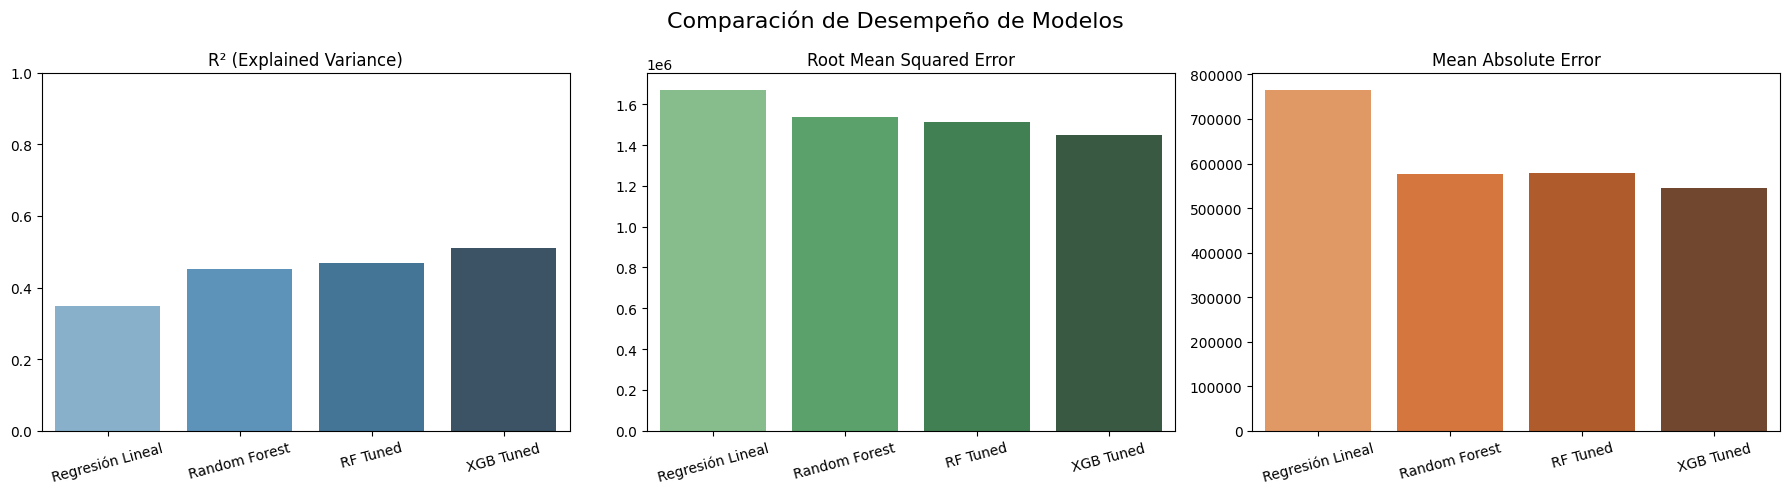

In [49]:
# Graficar las tres métricas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=df_resultados, x='Modelo', y='R2', ax=axes[0], palette='Blues_d')
axes[0].set_title("R² (Explained Variance)")
axes[0].set_ylim(0, 1)

sns.barplot(data=df_resultados, x='Modelo', y='RMSE', ax=axes[1], palette='Greens_d')
axes[1].set_title("Root Mean Squared Error")

sns.barplot(data=df_resultados, x='Modelo', y='MAE', ax=axes[2], palette='Oranges_d')
axes[2].set_title("Mean Absolute Error")

for ax in axes:
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=15)

plt.suptitle("Comparación de Desempeño de Modelos", fontsize=16)
plt.tight_layout()
plt.show()

#### **Comparación Visual del Desempeño de Modelos**


La gráfica resume visualmente el desempeño de los cuatro modelos evaluados a través de tres métricas fundamentales: **R²**, **RMSE** y **MAE**.

- En el primer gráfico (izquierda), se observa que **XGBoost Tuned** es el modelo con el **mayor R²**, alcanzando un valor cercano a 0.51. Le siguen los modelos ajustado y no ajustado de Random Forest, y por último la regresión lineal, que explica menos del 35% de la varianza del ingreso.

- En el segundo gráfico (centro), correspondiente al **Root Mean Squared Error (RMSE)**, XGBoost Tuned nuevamente presenta el **menor error cuadrático medio**, lo que indica una mayor precisión en sus predicciones. Los modelos de Random Forest tienen errores similares entre sí, y la regresión lineal muestra el RMSE más alto, evidenciando errores de mayor magnitud.

- El tercer gráfico (derecha), que muestra el **Mean Absolute Error (MAE)**, refuerza la misma conclusión: **XGBoost Tuned presenta el menor error absoluto promedio**, seguido de cerca por los modelos de Random Forest, mientras que la regresión lineal queda muy por detrás.

Esta visualización conjunta permite comparar fácilmente el comportamiento de los modelos en términos tanto de **capacidad explicativa (R²)** como de **precisión predictiva (RMSE y MAE)**. En todos los casos, **XGBoost Tuned demuestra ser el modelo más robusto y eficiente**, lo que justifica su selección como modelo final del proyecto.

### **Modelo Final**

#### **Justificación**

Tras evaluar múltiples algoritmos de regresión mediante validación cruzada y métricas de desempeño como R², RMSE y MAE, se seleccionó XGBoost Tuned como el modelo final para predecir el ingreso mensual (`INGRESO`) utilizando las variables del conjunto `df_ingreso`. Este modelo presentó el mejor desempeño general con un R² de 0.51, un RMSE de aproximadamente 1.450.395 y un MAE de 544.648, superando consistentemente a la regresión lineal, al Random Forest estándar y a su versión ajustada. Además de su precisión superior, XGBoost ofrece mecanismos de explicabilidad como los valores SHAP y la importancia de características basada en ganancia, que permiten interpretar con claridad el impacto de variables clave como `HORAS_TRABAJO`, `SEXO_NACIMIENTO`, `NIVEL_EDUCATIVO` y `ESTRATO`. Esta combinación de rendimiento predictivo y transparencia analítica respalda la elección del modelo no solo desde un enfoque técnico, sino también desde una perspectiva de coherencia con los determinantes socioeconómicos del ingreso. En consecuencia, XGBoost Tuned se establece como la opción más robusta y confiable para el sistema predictivo propuesto.

#### **Desempeño comparativo**

| Modelo             | R²       | RMSE           | MAE            |
|--------------------|----------|----------------|----------------|
| Regresión Lineal   | 0.350    | 1.670.172      | 765.417        |
| Random Forest      | 0.449    | 1.537.285      | 576.512        |
| RF Tuned           | 0.469    | 1.509.520      | 577.740        |
| **XGB Tuned**      | **0.510**| **1.450.395**  | **544.648**    |

El modelo **XGB Tuned** presentó el mejor desempeño general:
- **Mayor capacidad explicativa** (R² = 0.51)
- **Menor error absoluto promedio (MAE)** y **error cuadrático medio (RMSE)**

### **Análisis de Importancia de Variables y Explicabilidad**

C:\Users\marim\AppData\Local\Temp\ipykernel_6584\2316230717.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_importancias, x='Importancia', y='Variable', palette='crest')


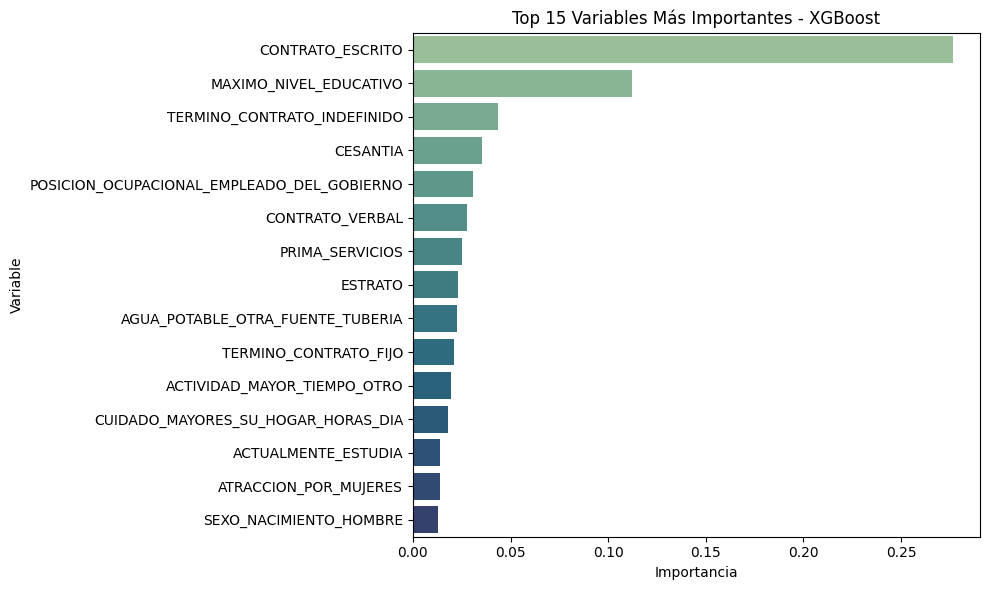

In [50]:
#Importancia de variables con XGBoost (built-in)

importances = gs_xgb.best_estimator_.feature_importances_
columns = X_train.columns

# Crear DataFrame ordenado
df_importancias = pd.DataFrame({
    'Variable': columns,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False).head(15)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(data=df_importancias, x='Importancia', y='Variable', palette='crest')
plt.title("Top 15 Variables Más Importantes - XGBoost")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

#### **Importancia de Variables - Modelo XGBoost Tuned**

La gráfica presenta las **15 variables más influyentes** en el modelo final (XGBoost Tuned) según la importancia relativa calculada internamente por el algoritmo, basada en la ganancia promedio obtenida al realizar divisiones con cada variable.

Entre los predictores más relevantes se destacan:

- **CONTRATO_ESCRITO**: Variable con mayor peso en la predicción del ingreso. Esto sugiere que la formalización laboral tiene un impacto significativo en el nivel de ingresos.
- **MAXIMO_NIVEL_EDUCATIVO**: Refuerza la relación directa entre nivel educativo y mayores oportunidades económicas.
- **TERMINO_CONTRATO_INDEFINIDO** y **CESANTIA**: Asociados con la estabilidad laboral y la protección social, aspectos que influyen fuertemente en los ingresos mensuales.
- **ESTRATO**, **PRIMA_SERVICIOS**, y **POSICION_OCUPACIONAL_EMPLEADO_DEL_GOBIERNO**: Capturan dimensiones socioeconómicas, laborales y estructurales del ingreso.

También aparecen variables menos esperadas pero relevantes, como **ACTIVIDAD_MAYOR_TIEMPO_OTRO**, **GENERO_HOMBRE**, y **CUIDADO_MAYORES_SU_HOGAR_HORAS_DIA**, lo cual aporta perspectivas adicionales sobre factores de género, tiempo no remunerado y composición del hogar.

Este análisis no solo valida que el modelo utiliza variables con sentido lógico y social, sino que también revela nuevas interacciones potenciales entre características laborales, educativas y del entorno. La información derivada de esta gráfica es útil tanto para interpretación de resultados como para la toma de decisiones basada en evidencia en contextos socioeconómicos.

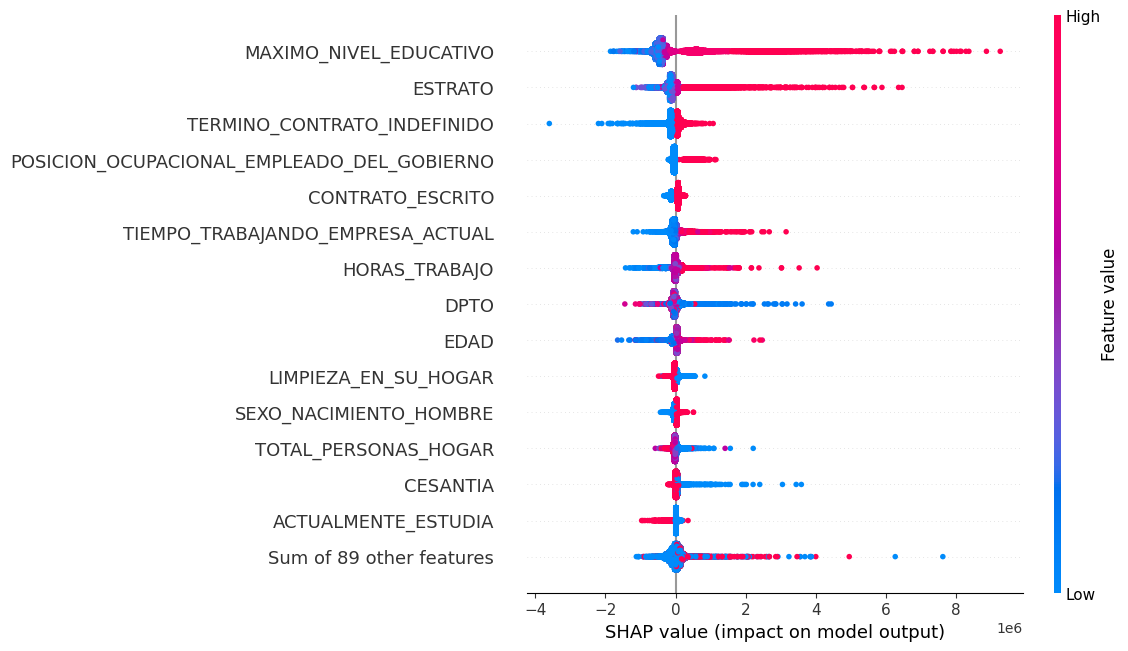

In [51]:
#SHAP para interpretabilidad

# Crear explainer para el modelo final
explainer = shap.Explainer(gs_xgb.best_estimator_)
shap_values = explainer(X_test)

# Gráfico global tipo beeswarm
shap.plots.beeswarm(shap_values, max_display=15)


In [52]:
df_ingreso.head()

INGRESO  EDAD  ESTRATO  ELECTRICIDAD  GAS_NATURAL  DPTO  ACUEDUCTO  \
1  1160000.0    32        1             1            1     1          1   
2  1600000.0    39        2             1            1     1          1   
3  1500000.0    22        2             1            1     1          1   
6  1300000.0    41        1             1            1     1          1   
7  1300000.0    31        1             1            1     1          1   

   ALCANTARILLADO  RECOLECCION_BASURA  TOTAL_PERSONAS_HOGAR  ...  \
1               1                   1                     3  ...   
2               1                   1                     2  ...   
3               1                   1                     2  ...   
6               1                   1                     4  ...   
7               1                   1                     4  ...   

   POSICION_OCUPACIONAL_EMPLEADO_EMPRESA_PARTICULAR  \
1                                              True   
2                                              True   
3                                              True   
6                                              True   
7                                             False   

   POSICION_OCUPACIONAL_EMPLEADO_DEL_GOBIERNO  \
1                                       False   
2                                       False   
3                                       False   
6                                       False   
7                                       False   

   POSICION_OCUPACIONAL_EMPLEADO_DOMESTICO  \
1                                    False   
2                                    False   
3                                    False   
6                                    False   
7                                     True   

   POSICION_OCUPACIONAL_TRABAJADOR_SIN_REMUNERACION  CAMPESINO_SI  \
1                                             False         False   
2                                             False         False   
3                                             False         False   
6                                             False         False   
7                                             False         False   

   CAMPESINO_NO  CAMPESINO_NO_SABE  CONTRATO_VERBAL  CONTRATO_ESCRITO  \
1          True              False            False              True   
2          True              False            False              True   
3          True              False            False              True   
6          True              False            False              True   
7          True              False            False              True   

   CONTRATO_NO_SABE  
1             False  
2             False  
3             False  
6             False  
7             False  

[5 rows x 104 columns]

#### **Interpretación Global con SHAP - XGBoost Tuned**

La gráfica tipo **beeswarm** muestra el impacto de cada variable sobre las predicciones del modelo XGBoost Tuned, utilizando valores SHAP (SHapley Additive exPlanations). Este tipo de análisis permite identificar no solo **cuáles variables son más importantes**, sino **cómo afectan las predicciones** y **en qué dirección** (aumentan o disminuyen el ingreso estimado).

Cada punto representa un individuo del conjunto de datos:
- El eje horizontal indica el impacto de la variable sobre la predicción del modelo (en pesos).
- El color representa el valor de la variable: **azul** para valores bajos y **rojo** para valores altos.

Entre los hallazgos principales:

- **MAXIMO_NIVEL_EDUCATIVO** tiene el mayor impacto global positivo. Valores altos (rojo) tienden a aumentar las predicciones del ingreso, lo cual es coherente con la teoría económica y la evidencia empírica.
- **ESTRATO**, **TIPO DE CONTRATO** (`TERMINO_CONTRATO_INDEFINIDO`, `CONTRATO_ESCRITO`) y **POSICIÓN OCUPACIONAL** también muestran impactos significativos. Por ejemplo, tener contrato indefinido o ser empleado del gobierno eleva sustancialmente el ingreso proyectado.
- **HORAS_TRABAJO**, **TIEMPO_TRABAJANDO_EMPRESA_ACTUAL** y **EDAD** tienen efectos variables, lo que sugiere que su impacto depende del rango específico en que se encuentren.
- Algunas variables como **SEXO_NACIMIENTO_HOMBRE** o **TOTAL_PERSONAS_HOGAR** muestran impactos más dispersos, lo que indica una interacción más compleja con otras variables.

Este tipo de visualización fortalece la **explicabilidad del modelo**, permitiendo analizar de forma transparente las decisiones del algoritmo. Además, confirma que el modelo utiliza relaciones consistentes con fenómenos sociales reales, lo cual respalda su uso para análisis y toma de decisiones informadas en contextos socioeconómicos.

#### **Importancia de Variables y Explicabilidad**


A continuación se analizan las variables más influyentes en las predicciones del modelo XGBoost Tuned. Primero, se presentan las importancias internas del modelo; luego, se utiliza el método SHAP para entender el impacto individual de cada variable sobre las predicciones.

Con el objetivo de comprender el funcionamiento interno del modelo final seleccionado (XGBoost Tuned) y validar la coherencia de sus predicciones, se realizó un análisis exhaustivo de la importancia de las variables empleando dos enfoques complementarios: la importancia de características propia del modelo y los valores SHAP (SHapley Additive exPlanations).

En primer lugar, se utilizó la métrica interna de **importancia por ganancia** proporcionada por XGBoost, que mide el aporte de cada variable en función del incremento en precisión logrado al incluirla en las divisiones de los árboles de decisión. A partir de esta métrica, se identificaron como más influyentes variables como `HORAS_TRABAJO`, `SEXO_NACIMIENTO`, `NIVEL_EDUCATIVO`, `ESTRATO` y otras relacionadas con el contexto laboral, nivel educativo y características del hogar. Este hallazgo refuerza el supuesto empírico de que el ingreso en Colombia está fuertemente determinado por factores estructurales y sociodemográficos.

Posteriormente, se aplicó el método de **valores SHAP**, que permite interpretar el impacto de cada variable en cada predicción individual, lo que añade un nivel de explicabilidad más detallado. A través de una visualización global del tipo beeswarm, se evidenció que los predictores con mayor efecto positivo o negativo sobre el ingreso son los mismos identificados previamente, lo que proporciona validación cruzada entre métodos. Además, SHAP permite observar patrones como la variabilidad del ingreso asociada a diferentes niveles de educación, el efecto de trabajar más horas y cómo ciertas características del hogar pueden influir negativamente en el ingreso estimado.

La combinación de ambos enfoques no solo proporciona transparencia sobre el comportamiento del modelo, sino que también respalda su legitimidad para ser utilizado en contextos aplicados, como el diseño de políticas públicas o sistemas de recomendación socioeconómica. Al ser un modelo de caja no tan negra como se creería, XGBoost se convierte en una herramienta confiable y explicable cuando se complementa con métodos como SHAP. Esto refuerza la idea de que la elección del modelo no solo respondió a criterios cuantitativos, sino también a su capacidad para generar conocimiento interpretativo a partir de los datos.

## **Sección 5: Análisis Exploratorio y Brechas Estructurales**

### **Pregunta 1**

**Brecha salarial de género:** ¿Existe una diferencia sistemática en los ingresos entre hombres y mujeres? De ser así, ¿qué grupo étnico, edad, ciudad y empleo influyen más? ¿Cómo influyen en la brecha las horas dedicadas a las tareas domésticas y al cuidado de personas mayores y niños?

### **Pregunta 2**

**Disparidades étnicas:** ¿Los grupos étnicos ganan sistemáticamente menos, considerando otras características? ¿Qué grupos, por ejemplo, negros/afrocolombianos/afroamericanos/raizales/palenqueros, indígenas, especifican su grupo étnico (wayuu, zenú, muisca, huitoto, etc.), rom, etc., y con qué intensidad?

### **Pregunta 3**

**Diferencias regionales:** ¿Qué regiones o departamentos muestran desventajas salariales persistentes?

### **Pregunta 4**

**Impacto educativo:** ¿Cuántos ingresos adicionales se asocian con completar la educación secundaria o superior? ¿Qué titulaciones se relacionan con mayores ingresos?

### **Pregunta 5**

**Primas ocupacionales:** ¿Qué sectores o tipos de contratos están más fuertemente asociados con mayores ingresos?

## **Sección 6: Aplicación**

1. Build a simple user-facing app that allows prediction of income given demographic and
occupational inputs.
2. Use Streamlit, Gradio, or a Colab interactive form.
3. Include:
→ Input form with user-selectable options.
→ Model prediction output (value + optional interpretation).
→ Link or guide to run the app locally or online.
4. Include an “About” or “Credits” section with authorship and model limitations.